# Homework 2

## Author: Marusic Diana (331)

## Problem statement

This notebook is based on analyzing fragments from books writtern by various authors.
 
 
The first problem to solve is to compare the writing style of various authors by predicting each text's author.
 
 
The second problem consists in analyzing text, extracting information and corelation between texts and grouping them in various clusters using unsupervised learning

### Import files 

In [1]:
# Some IPython magic
# Put these at the top of every notebook, here nbagg is used for interactive plots
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# Check python version
# import sys
# print(sys.version)
# print(sys.version_info)

## Task 1: Text classification (by authors)

**TODO:**

- use SVM Classifier(SVC) to predict author. 

 * hyperparameters:  (kernel,  C,  gamma) 
 
 
- apply PCA to reduce dimensionality and retrain

**TODO:** remove __ and other symbols from text

### Read data

In [2]:
FILE_NAME = "Marusic I Diana.csv"
dataset = pd.read_csv(FILE_NAME)

FileNotFoundError: File b'Marusic I Diana.csv' does not exist

### For IBM cloud only - read data (TODO: delete)

In [3]:

import sys
import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_898ccf2a654d4ce5b8e7983b938e35cd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4EJ1DA4KQJ99lcyOoVmsxWRJ0OWzDDpEQd8f0vNqT0cS',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_898ccf2a654d4ce5b8e7983b938e35cd.get_object(Bucket='machinelearninghomework-donotdelete-pr-qitsopbn14vamp',Key='Marusic I Diana.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()



Unnamed: 0                             Sir Arthur Conan Doyle  \
0           0  efforts of old Gilray in the interests of law ...   
1           1  of accepting the inevitable.  A flat Arab loaf...   
2           2  Commons with an energy of hatred that one woul...   
3           3  to breathe. There it was again! And again! Now...   
4           4  chair, he brewed himself a glass of grog, in w...   

                                    Sir Walter Scott  \
0  wood or stone, but only as emblems of the holy...   
1  was burned alive. Her name was Alison Pearson,...   
2  the assertion, that a king might take a lesson...   
3  I have this day learned more of Duke Charles t...   
4  murdered Countess, while at the same time he d...   

                                   Louisa May Alcott  \
0  of penitence and thankfulness.  "Call them now...   
1  and there was no time to ask leave, but it was...   
2  locks powdered the dark ones.  "A heavenly wal...   
3  let us help you if we can. Are you ill, in wan...   
4  thoughts swept through his mind during a brief...   

                                        Edmund Burke  \
0  formerly received from the Vizier. _But a copy...   
1  for traders and manufacturers of every denomin...   
2  honorable and advantageous to the India Compan...   
3  understand, to be sure, that I speak of Charle...   
4  Dowlah Bahadur, do agree that      the jaghire...   

                                        Daniel Defoe  \
0  musket, I sat down myself to load all the rest...   
1  substantial Matter, which tho' it is full of S...   
2  would not accept of it alone, but would have m...   
3  the slip both together, and never heard more o...   
4  itself, I thought it seemed to lie higher out ...   

                                         John Ruskin  \
0  a stone-mason's yard; and its rooms whitewashe...   
1  instance, the Gothic foliage, of which one ess...   
2  God. To these alone we have to look; in these ...   
3  issue is not understood by the people, and the...   
4  thus to secure a portion of it than none: but ...   

                                     Rudyard Kipling  \
0  once with a Bank of England director; wish I'd...   
1  way. _Time_: The edge of sunset. Single room i...   
2  them. "Fitz is right. I'm dead; only I don't s...   
3  twisted into knots, riven with rents and diamo...   
4  bush-tailed thieves!'  Mother Wolf threw herse...   

                                 Nathaniel Hawthorne  \
0  commander-in-chief of all the British forces i...   
1  feeling of an intruder, I walked towards Goat ...   
2  suppose, and in the winter and spring it will ...   
3  in a religious calm; recollections of many a h...   
4  place of study and retirement.  There was a fa...   

                         William Makepeace Thackeray  \
0  hard-heartedness in order to try those people ...   
1  out blaggerd names at you, and takes his pewny...   
2  those of Parson Thwackum, or Miss Seagrim. But...   
3  papa. I am Number 46 in the Exhibition of the ...   
4  Course! the Course is at Calcutta, papa!" crie...   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                           Edward Phillips Oppenheim  \
0  say, I should have expected to have found her ...   
1  the blowing away of the window was merely a ru...   
2  you, wouldn't it?" Philip remarked.  "Five hun...   
3  making that speech he had departed a great dea...   
4  read a little more of the New Testament and a ...   

                                       P G Wodehouse  \
0  Mr. Peters? Don't you think there is danger he...   
1  cereal and a shirred egg? Now, for the love of...   
2  more about your unfortunate affair with that g...   


### Visualize data

In [4]:
dataset.head()
# print(dataset)

Unnamed: 0                             Sir Arthur Conan Doyle  \
0           0  efforts of old Gilray in the interests of law ...   
1           1  of accepting the inevitable.  A flat Arab loaf...   
2           2  Commons with an energy of hatred that one woul...   
3           3  to breathe. There it was again! And again! Now...   
4           4  chair, he brewed himself a glass of grog, in w...   

                                    Sir Walter Scott  \
0  wood or stone, but only as emblems of the holy...   
1  was burned alive. Her name was Alison Pearson,...   
2  the assertion, that a king might take a lesson...   
3  I have this day learned more of Duke Charles t...   
4  murdered Countess, while at the same time he d...   

                                   Louisa May Alcott  \
0  of penitence and thankfulness.  "Call them now...   
1  and there was no time to ask leave, but it was...   
2  locks powdered the dark ones.  "A heavenly wal...   
3  let us help you if we can. Are you ill, in wan...   
4  thoughts swept through his mind during a brief...   

                                        Edmund Burke  \
0  formerly received from the Vizier. _But a copy...   
1  for traders and manufacturers of every denomin...   
2  honorable and advantageous to the India Compan...   
3  understand, to be sure, that I speak of Charle...   
4  Dowlah Bahadur, do agree that      the jaghire...   

                                        Daniel Defoe  \
0  musket, I sat down myself to load all the rest...   
1  substantial Matter, which tho' it is full of S...   
2  would not accept of it alone, but would have m...   
3  the slip both together, and never heard more o...   
4  itself, I thought it seemed to lie higher out ...   

                                         John Ruskin  \
0  a stone-mason's yard; and its rooms whitewashe...   
1  instance, the Gothic foliage, of which one ess...   
2  God. To these alone we have to look; in these ...   
3  issue is not understood by the people, and the...   
4  thus to secure a portion of it than none: but ...   

                                     Rudyard Kipling  \
0  once with a Bank of England director; wish I'd...   
1  way. _Time_: The edge of sunset. Single room i...   
2  them. "Fitz is right. I'm dead; only I don't s...   
3  twisted into knots, riven with rents and diamo...   
4  bush-tailed thieves!'  Mother Wolf threw herse...   

                                 Nathaniel Hawthorne  \
0  commander-in-chief of all the British forces i...   
1  feeling of an intruder, I walked towards Goat ...   
2  suppose, and in the winter and spring it will ...   
3  in a religious calm; recollections of many a h...   
4  place of study and retirement.  There was a fa...   

                         William Makepeace Thackeray  \
0  hard-heartedness in order to try those people ...   
1  out blaggerd names at you, and takes his pewny...   
2  those of Parson Thwackum, or Miss Seagrim. But...   
3  papa. I am Number 46 in the Exhibition of the ...   
4  Course! the Course is at Calcutta, papa!" crie...   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                           Edward Phillips Oppenheim  \
0  say, I should have expected to have found her ...   
1  the blowing away of the window was merely a ru...   
2  you, wouldn't it?" Philip remarked.  "Five hun...   
3  making that speech he had departed a great dea...   
4  read a little more of the New Testament and a ...   

                                       P G Wodehouse  \
0  Mr. Peters? Don't you think there is danger he...   
1  cereal and a shirred egg? Now, for the love of...   
2  more about your unfortunate affair with that g...   


Dataset contains samples  of  text  from  20 different  authors and one useless column (Unnamed:0).  Each sample  has  50.000  characters  and  there  are  20  samples  for  each  author.

In [5]:
print(dataset.columns)

Index(['Unnamed: 0', 'Sir Arthur Conan Doyle', 'Sir Walter Scott',
       'Louisa May Alcott', 'Edmund Burke', 'Daniel Defoe', 'John Ruskin',
       'Rudyard Kipling', 'Nathaniel Hawthorne', 'William Makepeace Thackeray',
       'Lord Byron', 'Edward Phillips Oppenheim', 'P G Wodehouse',
       'Jack London', 'Jacob Abbott', 'Andrew Lang', 'Herbert George Wells',
       'Thomas Carlyle', 'Joseph Conrad', 'Henry Rider Haggard',
       'Frank Richard Stockton'],
      dtype='object')


### Drop unused column ('Unnamed: 0')

In [6]:
dataset = dataset.drop('Unnamed: 0', axis=1)

In [7]:
dataset.head()


Sir Arthur Conan Doyle  \
0  efforts of old Gilray in the interests of law ...   
1  of accepting the inevitable.  A flat Arab loaf...   
2  Commons with an energy of hatred that one woul...   
3  to breathe. There it was again! And again! Now...   
4  chair, he brewed himself a glass of grog, in w...   

                                    Sir Walter Scott  \
0  wood or stone, but only as emblems of the holy...   
1  was burned alive. Her name was Alison Pearson,...   
2  the assertion, that a king might take a lesson...   
3  I have this day learned more of Duke Charles t...   
4  murdered Countess, while at the same time he d...   

                                   Louisa May Alcott  \
0  of penitence and thankfulness.  "Call them now...   
1  and there was no time to ask leave, but it was...   
2  locks powdered the dark ones.  "A heavenly wal...   
3  let us help you if we can. Are you ill, in wan...   
4  thoughts swept through his mind during a brief...   

                                        Edmund Burke  \
0  formerly received from the Vizier. _But a copy...   
1  for traders and manufacturers of every denomin...   
2  honorable and advantageous to the India Compan...   
3  understand, to be sure, that I speak of Charle...   
4  Dowlah Bahadur, do agree that      the jaghire...   

                                        Daniel Defoe  \
0  musket, I sat down myself to load all the rest...   
1  substantial Matter, which tho' it is full of S...   
2  would not accept of it alone, but would have m...   
3  the slip both together, and never heard more o...   
4  itself, I thought it seemed to lie higher out ...   

                                         John Ruskin  \
0  a stone-mason's yard; and its rooms whitewashe...   
1  instance, the Gothic foliage, of which one ess...   
2  God. To these alone we have to look; in these ...   
3  issue is not understood by the people, and the...   
4  thus to secure a portion of it than none: but ...   

                                     Rudyard Kipling  \
0  once with a Bank of England director; wish I'd...   
1  way. _Time_: The edge of sunset. Single room i...   
2  them. "Fitz is right. I'm dead; only I don't s...   
3  twisted into knots, riven with rents and diamo...   
4  bush-tailed thieves!'  Mother Wolf threw herse...   

                                 Nathaniel Hawthorne  \
0  commander-in-chief of all the British forces i...   
1  feeling of an intruder, I walked towards Goat ...   
2  suppose, and in the winter and spring it will ...   
3  in a religious calm; recollections of many a h...   
4  place of study and retirement.  There was a fa...   

                         William Makepeace Thackeray  \
0  hard-heartedness in order to try those people ...   
1  out blaggerd names at you, and takes his pewny...   
2  those of Parson Thwackum, or Miss Seagrim. But...   
3  papa. I am Number 46 in the Exhibition of the ...   
4  Course! the Course is at Calcutta, papa!" crie...   

                                          Lord Byron  \
0  metaphor.]  [387] {335} The answer of the moth...   
1   THE WORKS  OF  LORD BYRON.        A NEW, REVI...   
2  scrubby paper to write on--excuse it. I am cer...   
3  marble where her feet                         ...   
4  but sure and slow:     He faded, and so calm a...   

                           Edward Phillips Oppenheim  \
0  say, I should have expected to have found her ...   
1  the blowing away of the window was merely a ru...   
2  you, wouldn't it?" Philip remarked.  "Five hun...   
3  making that speech he had departed a great dea...   
4  read a little more of the New Testament and a ...   

                                       P G Wodehouse  \
0  Mr. Peters? Don't you think there is danger he...   
1  cereal and a shirred egg? Now, for the love of...   
2  more about your unfortunate affair with that g...   
3  person who thanked goodness that he was not al...   
4  suddenly pulled into the conversation, a

In [7]:
for i in range(0, len(dataset)):
    print("Author:" + dataset.iloc[:,i].name)
    print(dataset.iloc[:,i])
    print("i=", i+1)
    print()

Author:Sir Arthur Conan Doyle
0     efforts of old Gilray in the interests of law ...
1     of accepting the inevitable.  A flat Arab loaf...
2     Commons with an energy of hatred that one woul...
3     to breathe. There it was again! And again! Now...
4     chair, he brewed himself a glass of grog, in w...
5     places, I had forgotten about that spot upon t...
6     rather complex, and therefore interesting.  Hi...
7     wanting When the farmer comes to count them in...
8     vituperation.  In one of his outbursts he thre...
9     fact that in the year 1865 a picture by Greuze...
10    in the country. They would suffice to break of...
11    Averroes?"  "No, I have not.  But the appointm...
12    foraging parties which had never returned.  Th...
13    them to the light as he did so. He was clearly...
14    one great brown wrinkled cliff succeeding anot...
15    best."  "I perceive," said the prince, "that y...
16    by immigrants who are far more highly educated...
17    the Royal st

0     hard-heartedness in order to try those people ...
1     out blaggerd names at you, and takes his pewny...
2     those of Parson Thwackum, or Miss Seagrim. But...
3     papa. I am Number 46 in the Exhibition of the ...
4     Course! the Course is at Calcutta, papa!" crie...
5     Square.           Both beer and sperrits he ab...
6     love, duty, the family, were the French lady's...
7     G——d! Mohun is the best fellow in England; and...
8     and famous wines selected, regardless of cost,...
9     thine now as erst, and my first love was ever-...
10    abominable cold glances, that run through me, ...
11    her own fingers, and ere she uttered the above...
12    tallow; in Sir Hokey Walker's clerk's room, wh...
13    ladies, we do believe their information not to...
14    a large picture might have been painted out of...
15    ha!" within.  "It's Sir Derby Oaks taking his ...
16    hardy and obedient subaltern, as resolute capt...
17    RAMBLE, and presently A STRUT. When George

0     changes in our notions, informations, in our r...
1     the Nightmares shall, to all time, be welcome ...
2     regular steps; then a friendly knocking: "We a...
3     Authorities, and consequent Real-Anarchies bas...
4     into the current epigrammatic redaction; the a...
5     be. Getting no written answer, or distinct ver...
6     here, on the very threshold, protest against i...
7     216; Buddaei LEXICON, i. 853.]--who, what was ...
8     years past; Mecklenburg the most anarchic of c...
9     plaster comfits, from which people guard their...
10    somewhat;--and so (as the Abbe Georgel, in wor...
11    subject, is worth hearing, and credible every ...
12    wore on his breast the form of a Star, with it...
13    which the Publishers can circulate the most   ...
14    the warmest friendship and admiration. We cann...
15    was, he waited a good time for speaking of it,...
16    Collot d'Herbois, pleading for the Forty Swiss...
17    strong brisk-going undershot wheel, sunk i

### Create dataset of texts

In [12]:
data = []
for i in range(0, len(dataset)):
    print("Author:" + dataset.iloc[:,i].name)
    print(dataset.iloc[:,i])
    print("i=", i+1)
    print()

Author:Sir Arthur Conan Doyle
0     efforts of old Gilray in the interests of law ...
1     of accepting the inevitable.  A flat Arab loaf...
2     Commons with an energy of hatred that one woul...
3     to breathe. There it was again! And again! Now...
4     chair, he brewed himself a glass of grog, in w...
5     places, I had forgotten about that spot upon t...
6     rather complex, and therefore interesting.  Hi...
7     wanting When the farmer comes to count them in...
8     vituperation.  In one of his outbursts he thre...
9     fact that in the year 1865 a picture by Greuze...
10    in the country. They would suffice to break of...
11    Averroes?"  "No, I have not.  But the appointm...
12    foraging parties which had never returned.  Th...
13    them to the light as he did so. He was clearly...
14    one great brown wrinkled cliff succeeding anot...
15    best."  "I perceive," said the prince, "that y...
16    by immigrants who are far more highly educated...
17    the Royal st

0     say, I should have expected to have found her ...
1     the blowing away of the window was merely a ru...
2     you, wouldn't it?" Philip remarked.  "Five hun...
3     making that speech he had departed a great dea...
4     read a little more of the New Testament and a ...
5     smiled quietly. She was content to let him esc...
6     a beautiful setting, you know."  "The people w...
7     simple answer: What are your views as to Woman...
8     with the plowman by his side, but without any ...
9     grimly.  "Got you into a kind of hornets' nest...
10    many, Prince," she said softly, "who will be s...
11    it."  He was already dragging his companion do...
12    out of the back of the house, carrying their w...
13     THE DEVIL'S PAW  By E. Phillips Oppenheim    ...
14    private assignation of my own. Since then even...
15    leaned forward in her chair, gazing steadily i...
16    "except this--that you speak the truth."  He w...
17    drew his revolver and advanced into the ce

### Remove useless characters

Remove parantheses and numbers from text

In [8]:
import re

regexes = [r"\[*{*\(*\)*}*\]*[0-9]*"]
regex = regexes[0]

for column in list(dataset):
    dataset[column] = dataset[column].str.replace("_", "")
    dataset[column] = dataset[column].str.replace(regex, "")
    
dataset.head()

Sir Arthur Conan Doyle  \
0  efforts of old Gilray in the interests of law ...   
1  of accepting the inevitable.  A flat Arab loaf...   
2  Commons with an energy of hatred that one woul...   
3  to breathe. There it was again! And again! Now...   
4  chair, he brewed himself a glass of grog, in w...   

                                    Sir Walter Scott  \
0  wood or stone, but only as emblems of the holy...   
1  was burned alive. Her name was Alison Pearson,...   
2  the assertion, that a king might take a lesson...   
3  I have this day learned more of Duke Charles t...   
4  murdered Countess, while at the same time he d...   

                                   Louisa May Alcott  \
0  of penitence and thankfulness.  "Call them now...   
1  and there was no time to ask leave, but it was...   
2  locks powdered the dark ones.  "A heavenly wal...   
3  let us help you if we can. Are you ill, in wan...   
4  thoughts swept through his mind during a brief...   

                                        Edmund Burke  \
0  formerly received from the Vizier. But a copy ...   
1  for traders and manufacturers of every denomin...   
2  honorable and advantageous to the India Compan...   
3  understand, to be sure, that I speak of Charle...   
4  Dowlah Bahadur, do agree that      the jaghire...   

                                        Daniel Defoe  \
0  musket, I sat down myself to load all the rest...   
1  substantial Matter, which tho' it is full of S...   
2  would not accept of it alone, but would have m...   
3  the slip both together, and never heard more o...   
4  itself, I thought it seemed to lie higher out ...   

                                         John Ruskin  \
0  a stone-mason's yard; and its rooms whitewashe...   
1  instance, the Gothic foliage, of which one ess...   
2  God. To these alone we have to look; in these ...   
3  issue is not understood by the people, and the...   
4  thus to secure a portion of it than none: but ...   

                                     Rudyard Kipling  \
0  once with a Bank of England director; wish I'd...   
1  way. Time: The edge of sunset. Single room in ...   
2  them. "Fitz is right. I'm dead; only I don't s...   
3  twisted into knots, riven with rents and diamo...   
4  bush-tailed thieves!'  Mother Wolf threw herse...   

                                 Nathaniel Hawthorne  \
0  commander-in-chief of all the British forces i...   
1  feeling of an intruder, I walked towards Goat ...   
2  suppose, and in the winter and spring it will ...   
3  in a religious calm; recollections of many a h...   
4  place of study and retirement.  There was a fa...   

                         William Makepeace Thackeray  \
0  hard-heartedness in order to try those people ...   
1  out blaggerd names at you, and takes his pewny...   
2  those of Parson Thwackum, or Miss Seagrim. But...   
3  papa. I am Number  in the Exhibition of the Ga...   
4  Course! the Course is at Calcutta, papa!" crie...   

                                          Lord Byron  \
0  metaphor.    The answer of the mother of Brasi...   
1   THE WORKS  OF  LORD BYRON.        A NEW, REVI...   
2  scrubby paper to write on--excuse it. I am cer...   
3  marble where her feet                         ...   
4  but sure and slow:     He faded, and so calm a...   

                           Edward Phillips Oppenheim  \
0  say, I should have expected to have found her ...   
1  the blowing away of the window was merely a ru...   
2  you, wouldn't it?" Philip remarked.  "Five hun...   
3  making that speech he had departed a great dea...   
4  read a little more of the New Testament and a ...   

                                       P G Wodehouse  \
0  Mr. Peters? Don't you think there is danger he...   
1  cereal and a shirred egg? Now, for the love of...   
2  more about your unfortunate affair with that g...   
3  person who thanked goodness that he was not al...   
4  suddenly pulled into the conversation, a

In [14]:
# dataset_transp = dataset.transpose()

In [15]:
# dataset_transp.head()

In [16]:
# X = dataset_transp

In [9]:
data_flat = dataset.values.flatten()

In [18]:
# data_flat = dataset.values.ravel()


In [10]:
print(len(data_flat))

400


In [19]:
# Don't do this!!! (It will crash memory)
# print(data_flat)
# print(data_flat[0])

efforts of old Gilray in the interests of law and order.  The sanctum of Mr. John Girdlestone was approached by two doors, one of oak with ground-glass panels, and the other covered with green baize. The room itself was small, but lofty, and the walls were ornamented by numerous sections of ships stuck upon long flat boards, very much as the remains of fossil fish are exhibited in museums, together with maps, charts, photographs, and lists of sailings innumerable.  Above the fire-place was a large water-colour painting of the barque _Belinda_ as she appeared when on a reef to the north of Cape Palmas.  An inscription beneath this work of art announced that it had been painted by the second officer and presented by him to the head of the firm.  It was generally rumoured that the merchants had lost heavily over this disaster, and there were some who quoted it as an instance of Girdlestone's habitual strength of mind that he should decorate his wall with so melancholy a souvenir.  This vi

In [21]:
# print(data_flat[1:2])

## Targets


Create list with all author namesx20 for the targets

In [11]:
# print(dataset.columns)
author_targets = list(dataset)
print(author_targets)

['Sir Arthur Conan Doyle', 'Sir Walter Scott', 'Louisa May Alcott', 'Edmund Burke', 'Daniel Defoe', 'John Ruskin', 'Rudyard Kipling', 'Nathaniel Hawthorne', 'William Makepeace Thackeray', 'Lord Byron', 'Edward Phillips Oppenheim', 'P G Wodehouse', 'Jack London', 'Jacob Abbott', 'Andrew Lang', 'Herbert George Wells', 'Thomas Carlyle', 'Joseph Conrad', 'Henry Rider Haggard', 'Frank Richard Stockton']


In [12]:
le = preprocessing.LabelEncoder()
le.fit(author_targets)
print(author_targets)
numeric_targets = le.transform(author_targets)
print(numeric_targets)

# numeric_targets = np.repeat(numeric_targets,20)
numeric_targets = np.tile(numeric_targets,20)

print(numeric_targets)
print(len(numeric_targets))
    

['Sir Arthur Conan Doyle', 'Sir Walter Scott', 'Louisa May Alcott', 'Edmund Burke', 'Daniel Defoe', 'John Ruskin', 'Rudyard Kipling', 'Nathaniel Hawthorne', 'William Makepeace Thackeray', 'Lord Byron', 'Edward Phillips Oppenheim', 'P G Wodehouse', 'Jack London', 'Jacob Abbott', 'Andrew Lang', 'Herbert George Wells', 'Thomas Carlyle', 'Joseph Conrad', 'Henry Rider Haggard', 'Frank Richard Stockton']
[16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4]
[16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2  1
  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2  1  9 15 13 19 11
  3 14  7  8  0  6 18 10  5  4 16 17 12  2  1  9 15 13 19 11  3 14  7  8  0
  6 18 10  5  4 16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4
 16 17 12  2  1  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2  1
  9 15 13 19 11  3 14  7  8  0  6 18 10  5  4 16 17 12  2  1  9 15 13 19 11
  3 14  7  8  0  6 18 10  5  4 16 17 12  2  1  9 15 13 19 11  3 14  7  8  0
  6 

### Using CountVectorizer

In [24]:
# print(dataset.values.flatten())
# print(data)
# data = []
# for i in range(0, len(dataset)):
#     print(dataset.iloc[:,i].tolist())
#     data.append(dataset.iloc[:,i].tolist())
# print(data)

In [25]:
# # print(X)

# data = []
# # data = pd.DataFrame()
# print(data)
# for i in range(0, len(dataset)):
#     data.append(dataset.iloc[:,i])
# #     print(dataset.iloc[:,i].values.list())

# print(data)
# data.head()
# # print(dataset.iloc[:,0])

In [26]:
# data.head()

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data_flat)
print(X)

  (0, 146351)	1
  (0, 152055)	1
  (0, 147223)	1
  (0, 18412)	1
  (0, 40080)	1
  (0, 68735)	1
  (0, 143371)	1
  (0, 37714)	1
  (0, 35216)	1
  (0, 127267)	1
  (0, 122077)	1
  (0, 128704)	1
  (0, 151695)	1
  (0, 163787)	1
  (0, 77787)	1
  (0, 103252)	1
  (0, 56454)	1
  (0, 55228)	1
  (0, 27991)	1
  (0, 84528)	1
  (0, 158208)	1
  (0, 79628)	1
  (0, 125466)	1
  (0, 152060)	1
  (0, 68174)	1
  :	:
  (399, 136066)	44
  (399, 78000)	17
  (399, 126060)	30
  (399, 64074)	7
  (399, 33866)	14
  (399, 104801)	170
  (399, 62123)	11
  (399, 64676)	49
  (399, 164415)	600
  (399, 103611)	335
  (399, 43466)	4
  (399, 152602)	211
  (399, 21058)	313
  (399, 6672)	10
  (399, 161850)	1380
  (399, 79272)	5
  (399, 97669)	40
  (399, 104203)	15
  (399, 5068)	3181
  (399, 84381)	4
  (399, 146837)	5474
  (399, 74154)	1423
  (399, 103323)	37
  (399, 102996)	2528
  (399, 46706)	2


### Using TfidfVectorizer

**TODO:** use TFIDF vectorizer on test set

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data_flat)
print(X)

  (0, 46706)	0.00040337912593
  (0, 102996)	0.286516225323
  (0, 103323)	0.0208155709879
  (0, 61731)	0.0134680233774
  (0, 74154)	0.172605726024
  (0, 146837)	0.636367616243
  (0, 76589)	0.00129599282126
  (0, 84381)	0.00140944715613
  (0, 5068)	0.300436041938
  (0, 104203)	0.00151552004965
  (0, 128403)	0.00226634924131
  (0, 97669)	0.0111898801973
  (0, 79272)	0.00905584526703
  (0, 61879)	0.156601991383
  (0, 161850)	0.127366322026
  (0, 6672)	0.00058642407719
  (0, 21058)	0.0385114926345
  (0, 152602)	0.0152337418962
  (0, 43466)	0.000609665958286
  (0, 103611)	0.039323481937
  (0, 102278)	0.000171739528449
  (0, 164415)	0.0921027866018
  (0, 64676)	0.00397356481115
  (0, 62123)	0.00188468189334
  (0, 106709)	0.000315202103166
  :	:
  (399, 101833)	0.00198357701044
  (399, 129654)	0.00198357701044
  (399, 9429)	0.0052895386945
  (399, 129653)	0.000661192336813
  (399, 120506)	0.000661192336813
  (399, 131311)	0.000661192336813
  (399, 127328)	0.021158154778
  (399, 124556)	0.00066

### Split data in train, test, validation

In [14]:
# Split data into train set and test set

from sklearn.model_selection import StratifiedShuffleSplit

# sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss = StratifiedShuffleSplit()
y = numeric_targets

for train_index, test_index in sss.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# # X_data, X_test, y_data, y_test = train_test_split(X, numeric_targets)
# X_data, X_test, y_data, y_test = StratifiedShuffleSplit(X, numeric_targets)

# # Using KFold to further split training data into train and validation
# kf = KFold(n_splits=2)

# for train_index, validation_index in kf.split(X_data):
#     X_train, X_validation = X_data[train_index], X_data[validation_index]
#     y_train, y_validation = y_data[train_index], y_data[validation_index]

# print(X_train)


### Set hyperparameters for  SVC (using gridsearch)

In [15]:
# TODO: test with all parameters
# hyperparams = {"gamma": ["auto", "scale"],
#                "kernel": ["linear", "poly", "rbf", "sigmoid" ],
#                "C": [0.25, 0.5, 0.75, 1] }

hyperparams = {"gamma": [0.0, 0.1],
               "kernel": ["linear", "poly" ],
               "C": [float(0.5)] }
#                "C": [float(0.5), float(0.75)] }

### Set scores

### Train

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# # X = X.toarray()

# y = numeric_targets

# TODO: uncomment
# X = X.toarray()

def trainSVM(X_train, y_train, X_test=None, y_test=None):
    cl = SVC()


    # run grid search
    # cv = pentru cross validation, default 3 (train, validation, test)
    # TODO: test with 5 folds
    # grid_search = GridSearchCV(cl, param_grid=hyperparams, cv=5, verbose=3)

    grid_search = GridSearchCV(cl, param_grid=hyperparams, cv=3, verbose=3, 
                               return_train_score=True)

    # start = time()
    print(grid_search.fit(X_train, y_train))
    
    return grid_search



In [17]:
grid_search = trainSVM(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] gamma=0.0, kernel=linear, C=0.5 .................................
[CV] ....... gamma=0.0, kernel=linear, C=0.5, score=0.8, total=  15.6s
[CV] gamma=0.0, kernel=linear, C=0.5 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.2s remaining:    0.0s


[CV]  gamma=0.0, kernel=linear, C=0.5, score=0.7583333333333333, total=  15.5s
[CV] gamma=0.0, kernel=linear, C=0.5 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.3s remaining:    0.0s


[CV]  gamma=0.0, kernel=linear, C=0.5, score=0.7166666666666667, total=  15.6s
[CV] gamma=0.0, kernel=poly, C=0.5 ...................................
[CV] ........ gamma=0.0, kernel=poly, C=0.5, score=0.05, total=  15.5s
[CV] gamma=0.0, kernel=poly, C=0.5 ...................................
[CV] ........ gamma=0.0, kernel=poly, C=0.5, score=0.05, total=  15.4s
[CV] gamma=0.0, kernel=poly, C=0.5 ...................................
[CV] ........ gamma=0.0, kernel=poly, C=0.5, score=0.05, total=  15.6s
[CV] gamma=0.1, kernel=linear, C=0.5 .................................
[CV] ....... gamma=0.1, kernel=linear, C=0.5, score=0.8, total=  15.6s
[CV] gamma=0.1, kernel=linear, C=0.5 .................................
[CV]  gamma=0.1, kernel=linear, C=0.5, score=0.7583333333333333, total=  15.5s
[CV] gamma=0.1, kernel=linear, C=0.5 .................................
[CV]  gamma=0.1, kernel=linear, C=0.5, score=0.7166666666666667, total=  15.6s
[CV] gamma=0.1, kernel=poly, C=0.5 ..................

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  4.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.0, 0.1], 'kernel': ['linear', 'poly'], 'C': [0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)


In [18]:
results = grid_search.cv_results_
print(results)

{'param_kernel': masked_array(data = ['linear' 'poly' 'linear' 'poly'],
             mask = [False False False False],
       fill_value = ?)
, 'split2_train_score': array([ 0.8375    ,  0.05      ,  0.8375    ,  0.86666667]), 'mean_fit_time': array([ 12.16017111,  12.14370282,  12.15181653,  12.12873006]), 'split2_test_score': array([ 0.71666667,  0.05      ,  0.71666667,  0.74166667]), 'std_train_score': array([  1.87371355e-02,   6.93889390e-18,   1.87371355e-02,
         2.21352465e-02]), 'mean_score_time': array([ 3.40701437,  3.37993646,  3.41195615,  3.41181795]), 'params': [{'gamma': 0.0, 'kernel': 'linear', 'C': 0.5}, {'gamma': 0.0, 'kernel': 'poly', 'C': 0.5}, {'gamma': 0.1, 'kernel': 'linear', 'C': 0.5}, {'gamma': 0.1, 'kernel': 'poly', 'C': 0.5}], 'mean_test_score': array([ 0.75833333,  0.05      ,  0.75833333,  0.76666667]), 'mean_train_score': array([ 0.83611111,  0.05      ,  0.83611111,  0.86527778]), 'split1_test_score': array([ 0.75833333,  0.05      ,  0.75833333,  0

In [39]:
print("Grid best score:")
print (grid_search.best_score_)



Grid scores on development set:


Grid best score:

0.961111111111


### Display results

In [73]:
from IPython.display import HTML, display

# Build table header
tableHeader = '<tr>'    
for item in ["Nr", "Model name", "Parameters", "Silhouette score", "Homogeneity score", "Completeness score"]:
    tableHeader += '<th>' + item  + '</th>'
tableHeader += '</tr>'

data_rows = ''   
    
model_names = ["DBSCAN", "KMeans", "Aglomerative"]

nr = 0
best_model_indices = [0, 0, 0]
nr_models = 1
for j in range(0, nr_models):
    for i in range(0, len(lp[j])):
        data_row = '<tr>'
        
        if silhouette_scores[j][i]==max(silhouette_scores[j]):
            data_row = '<tr style="font-weight:bold; color:green;">'
            best_model_indices[j] = i
        data_row += '<td>' + str(nr) + '</td>'
        data_row += '<td>' + model_names[j] + '</td>'
        data_row += '<td>' + str(lp[j][i]) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(silhouette_scores[j][i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(homogeneity_scores[j][i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(completeness_scores[j][i]))) + '</td>'
        
        data_row += '</td>'
        data_rows += data_row
        nr += 1

HTML_code = '<table style="border: 1px solid black">'+tableHeader+ data_rows + '</table>' 

display(HTML(HTML_code))

In [44]:
dispResults(results)

*** {'C': 0.5, 'kernel': 'linear', 'gamma': 0.0} ***
{'C': 0.5, 'kernel': 'poly', 'gamma': 0.0}
{'C': 0.5, 'kernel': 'linear', 'gamma': 0.1}
{'C': 0.5, 'kernel': 'poly', 'gamma': 0.1}


**TODO:** ploturi din tema1 cu algoritm vs performance, parameter vs performance

## Using PCA

### Plot

### Transform data to array

TODO: fix problems or delete

In [45]:
X_train = X_train.toarray()

In [46]:
X_test = X_test.toarray()

### Apply PCA 

In [51]:
from sklearn.decomposition import PCA

def applyPCA(X, n_components=None, svd_solver=None):
    pca = PCA(n_components=n_compoments, svd_solver=svd_solver)
    
    X = pca.fit_transform(X)
    print(pca.singular_values_) 
    return X

In [38]:
X_train_PCA = applyPCA(X_train, 2)

NameError: name 'applyPCA' is not defined

In [53]:
# print(X_train_PCA)

[[  1.07923218e+02  -7.57269770e+02]
 [  4.73051732e+02   1.43126585e+02]
 [  8.38800557e+01   1.61662084e+03]
 [  3.57965133e+02   5.11606343e+02]
 [  7.44042220e+02  -7.17957195e+02]
 [ -1.16883530e+03  -8.35395484e+02]
 [ -9.15538768e+02   2.04103638e+02]
 [  3.63573729e+02  -1.44165899e+02]
 [  4.27796666e+02   1.56434061e+03]
 [  1.41185056e+02   1.56230760e+03]
 [ -4.06800830e+02  -9.71866665e+01]
 [  3.92409248e+02   1.56192647e+03]
 [  2.18335153e+02  -1.18590756e+01]
 [  2.18134229e+02   4.75659595e+02]
 [  2.35300433e+02  -2.88334283e+02]
 [ -9.12383792e+02   5.17961918e+02]
 [  1.07861058e+03  -3.15087938e+02]
 [  5.38430704e+02   7.22160944e+02]
 [ -9.85468256e+02  -3.48412766e+02]
 [  1.21140273e+03  -9.11722420e+02]
 [  1.18363980e+03   1.94010180e+03]
 [  4.64841183e+03   5.15297712e+03]
 [  9.85817381e+02   1.79071854e+03]
 [ -2.35153425e+03   4.32208672e+02]
 [  2.29436414e+02  -3.40161308e+02]
 [ -1.81146786e+03  -1.11944656e+03]
 [  6.81009612e+01  -4.49964756e+02]
 

In [54]:
X_test_PCA = applyPCA(X_test)

[ 13448.31783346   8152.11142738]


In [146]:
# print(X_test_PCA, y_test_PCA)

[[0.         0.00039963 0.         ... 0.         0.         0.        ]
 [0.         0.00168559 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0134586  0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] [ 9  0  6 18  3 14  5  2 16  1  2 13  4 12  3 16  4 19  6 18 11  9  0  7
 15 15  5 13  8  8  7 17 14 19 10 17 11 10  1 12]


#### Plot

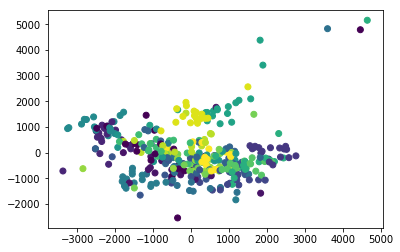

In [55]:
plt.scatter(X_train_PCA[:,0], X_train_PCA[:,1], c=y_train)


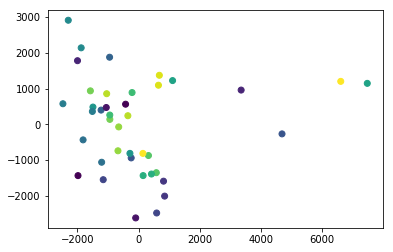

In [56]:
plt.scatter(X_test_PCA[:,0], X_test_PCA[:,1], c=y_test)


### Apply TSNE

In [172]:
from sklearn.manifold import TSNE

def applyTSNE(X):
    X = TSNE(n_components=2).fit_transform(X)
    return X

In [174]:
X_train_TSNE = applyTSNE(X_train)
X_test_TSNE = applyTSNE(X_test)

**Plot:**

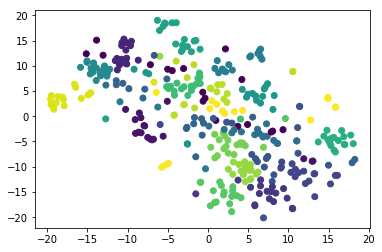

In [175]:
plt.scatter(X_train_TSNE[:,0], X_train_TSNE[:,1], c=y_train)

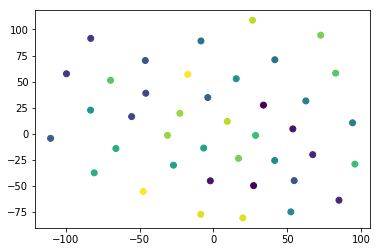

In [176]:
plt.scatter(X_test_TSNE[:,0], X_test_TSNE[:,1], c=y_test)

## TODO: train with PCA and show results (use functions where possible)

In [ ]:
grid_search = trainSVM(X_train_PCA, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=0.5, kernel=linear, gamma=0.0 .................................
[CV]  C=0.5, kernel=linear, gamma=0.0, score=0.39166666666666666, total= 2.1min
[CV] C=0.5, kernel=linear, gamma=0.0 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s


[CV]  C=0.5, kernel=linear, gamma=0.0, score=0.30833333333333335, total= 1.9min
[CV] C=0.5, kernel=linear, gamma=0.0 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.0min remaining:    0.0s


[CV]  C=0.5, kernel=linear, gamma=0.0, score=0.39166666666666666, total=  53.0s
[CV] C=0.5, kernel=poly, gamma=0.0 ...................................
[CV] ........ C=0.5, kernel=poly, gamma=0.0, score=0.05, total=   0.0s
[CV] C=0.5, kernel=poly, gamma=0.0 ...................................
[CV] ........ C=0.5, kernel=poly, gamma=0.0, score=0.05, total=   0.0s
[CV] C=0.5, kernel=poly, gamma=0.0 ...................................
[CV] ........ C=0.5, kernel=poly, gamma=0.0, score=0.05, total=   0.0s
[CV] C=0.5, kernel=linear, gamma=0.1 .................................
[CV]  C=0.5, kernel=linear, gamma=0.1, score=0.39166666666666666, total= 2.1min
[CV] C=0.5, kernel=linear, gamma=0.1 .................................
[CV]  C=0.5, kernel=linear, gamma=0.1, score=0.30833333333333335, total= 2.0min
[CV] C=0.5, kernel=linear, gamma=0.1 .................................
[CV]  C=0.5, kernel=linear, gamma=0.1, score=0.39166666666666666, total=  53.7s
[CV] C=0.5, kernel=poly, gamma=0.1 ......

In [183]:
results = grid_search.cv_results_
print(results)

{'mean_fit_time': array([0.01300097, 0.00906046, 0.01019216, 0.00945441, 0.00839082,
       0.01157204, 0.00814064, 0.01032241]), 'std_fit_time': array([3.56137767e-03, 5.43194525e-05, 1.45544017e-03, 2.91897723e-04,
       4.12594233e-04, 3.15893648e-03, 1.05229029e-04, 5.45023840e-04]), 'mean_score_time': array([0.00374746, 0.00464392, 0.00563677, 0.00325267, 0.00286945,
       0.00318416, 0.00286659, 0.00313457]), 'std_score_time': array([9.91848875e-04, 2.05975837e-03, 3.08673618e-03, 6.05790703e-05,
       1.30708092e-05, 4.97346464e-05, 9.15215470e-06, 1.07947608e-04]), 'param_C': masked_array(data=[0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=['auto', 'auto', 'scale', 'scale', 'auto', 'auto',
                   'scale', 'scale'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
       

In [ ]:
dispResults(results)

### Conclusions

**TODO**
+ in 2 dim e mai prost
+ timp de antrenare - mult mai 

**TODO:** 
- train PCA with more dimensions? Gasit greseala / de ce 2 dim nu e ok?
- PCA() fara parametri, apoi PCA()
- ? de incercat cu n_components == 'mle' and svd_solver == 'full'
If n_components == 'mle' and svd_solver == 'full', Minka’s MLE is used to guess the dimension. Use of n_components == 'mle' will interpret svd_solver == 'auto' as svd_solver == 'full'.

## Task 2: Text clustering

**TODO:** Does  the  clustering  gives  you  back  the  books  clustered  by  author?Are  the  books  grouped  differently?  Can  you  find  what  authors  have  similar  writing  styles?Or  are  the  books  grouped  by  genre? 

Unsupervised learning => will need to find something in the dataset and explain what found

**TODO:**
- DBCAN ( *eps*  and  *minsamples* hyperparams)
- KMeans ( *nclusters*  and  *init* hyperparams)
- Hierarchical(Agglomerative)  ( *nclusters* hyperparams)

- compare + metrics:
    *  *silhouette  score*
    * *homogeneityscore*
    * *completness  score*. 

## Data analysis

### Sentiment analysis

In [23]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import MWETokenizer
import string
  
texts = data_flat

# def processText(text):
#     printable = set(text.printable)
#     filter(lambda x: x in printable, text)
  
#     return text.replace("\n", " ")


sid = SentimentIntensityAnalyzer()

def analyzeText(text):
#     print(text)
    
    ss = sid.polarity_scores(text)
    # print("Neg:", ss["neg"])
    # print("Pos:", ss["pos"])
#     print("Neu:", ss["neu"])
#     print('Compound:', ss["compound"])
# #     print("Compund:", ss[0])
# #     for k in sorted(ss):
# #         print('{0}: {1}, '.format(k, ss[k]))
#     print()
    return ss["neg"], ss["pos"], ss["neu"], ss["compound"] 

# test_sentences1 = ["Do you work hard?Do you work hard?You don't!You don't!You don't! Chicago, now!Do you work hard?Do you try hard?You don't. Chicago, now!All is commission timeCommission C.T. timeSet down, setting downC.T C.T. timeChicago, now!Work hard.Do you try hard?Dear crewTry hard.Chicago, now!That's it: you don't.That's it: you don't.Chicago, now!Chicago, now!Step downSetting down, just setting downSee their butt all over the streetYou just go up and meetJust setting down.Chicago now.Hi-de-hi-de-hi-de-ho."]


neg_avgs = []
neu_avgs = []
pos_avgs = []
comp_avgs = []

for text in texts:
# text = processText(lyric)  

    lines_list = tokenize.sent_tokenize(text)

    neg_sum = 0
    pos_sum = 0
    neu_sum = 0
    comp_sum = 0
    nr_comp = 0

    i = 0


    for sentence in lines_list:
        print("Data > ", i)
        i+=1
        neg, pos, neu, compound = analyzeText(sentence)
        if not (neu==1.0 and neg==0.0 and pos==0.0):
            neg_sum += neg
            pos_sum += pos
            neu_sum += neu
            comp_sum += compound
            nr_comp +=1

    #   TODO: process neutral data
    if(nr_comp == 0):
        nr_comp = 1

    neg_avg = round(neg_sum / nr_comp, 2)
    pos_avg = round(pos_sum / nr_comp, 2)
    neu_avg = round(neu_sum / nr_comp, 2)
    comp_avg = round(comp_sum / nr_comp, 2)


#     print("Neg avg:", neg_avg)
#     print("Pos avg:", pos_avg)
#     print("Neu avg:", neu_avg)
#     print("Compound avg:", comp_avg)

    neg_avgs.append(neg_avg)
    neu_avgs.append(neu_avg)
    pos_avgs.append(pos_avg)
    comp_avgs.append(comp_avg)

    
print("Neg avgs:", neg_avgs)
print("Pos avgs:", pos_avgs)
print("Neu avgs:", neu_avgs)
print("Compound avgs:", comp_avgs)

    # print("----------------")
    # tokenizer = MWETokenizer(text)

# dataset["Neg"] = pd.Series(neg_avgs)
# dataset["Pos"] = pd.Series(pos_avgs)
# dataset["Neutral"] = pd.Series(neu_avgs)
# dataset["Compound sentiment"] = pd.Series(comp_avgs)
# # dataset = dataset.drop(["Unnamed: 0"], axis=1)
# dataset.head()

# print(dataset.head())
# dataset.to_csv(OUTPUT_FILE_NAME)

Requirement not upgraded as not directly required: nltk in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from nltk)
[nltk_data] Downloading package punkt to /home/dsxuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dsxuser/nltk_data...
Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50


Data >  954
Data >  955
Data >  956
Data >  957
Data >  958
Data >  959
Data >  960
Data >  961
Data >  962
Data >  963
Data >  964
Data >  965
Data >  966
Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  1008
Data >  1009
Data >  1010
Data >  1011
Data >  1012
Data >  1013
Data >  1014
Data >  1015
Data >  1016
Data >  1017
Data >  1018
Data >  1019
Data >  1020
Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027
Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  1032
Data >  1033
Data >

Data >  1773
Data >  1774
Data >  1775
Data >  1776
Data >  1777
Data >  1778
Data >  1779
Data >  1780
Data >  1781
Data >  1782
Data >  1783
Data >  1784
Data >  1785
Data >  1786
Data >  1787
Data >  1788
Data >  1789
Data >  1790
Data >  1791
Data >  1792
Data >  1793
Data >  1794
Data >  1795
Data >  1796
Data >  1797
Data >  1798
Data >  1799
Data >  1800
Data >  1801
Data >  1802
Data >  1803
Data >  1804
Data >  1805
Data >  1806
Data >  1807
Data >  1808
Data >  1809
Data >  1810
Data >  1811
Data >  1812
Data >  1813
Data >  1814
Data >  1815
Data >  1816
Data >  1817
Data >  1818
Data >  1819
Data >  1820
Data >  1821
Data >  1822
Data >  1823
Data >  1824
Data >  1825
Data >  1826
Data >  1827
Data >  1828
Data >  1829
Data >  1830
Data >  1831
Data >  1832
Data >  1833
Data >  1834
Data >  1835
Data >  1836
Data >  1837
Data >  1838
Data >  1839
Data >  1840
Data >  1841
Data >  1842
Data >  1843
Data >  1844
Data >  1845
Data >  1846
Data >  1847
Data >  1848
Data >  1849

Data >  2626
Data >  2627
Data >  2628
Data >  2629
Data >  2630
Data >  2631
Data >  2632
Data >  2633
Data >  2634
Data >  2635
Data >  2636
Data >  2637
Data >  2638
Data >  2639
Data >  2640
Data >  2641
Data >  2642
Data >  2643
Data >  2644
Data >  2645
Data >  2646
Data >  2647
Data >  2648
Data >  2649
Data >  2650
Data >  2651
Data >  2652
Data >  2653
Data >  2654
Data >  2655
Data >  2656
Data >  2657
Data >  2658
Data >  2659
Data >  2660
Data >  2661
Data >  2662
Data >  2663
Data >  2664
Data >  2665
Data >  2666
Data >  2667
Data >  2668
Data >  2669
Data >  2670
Data >  2671
Data >  2672
Data >  2673
Data >  2674
Data >  2675
Data >  2676
Data >  2677
Data >  2678
Data >  2679
Data >  2680
Data >  2681
Data >  2682
Data >  2683
Data >  2684
Data >  2685
Data >  2686
Data >  2687
Data >  2688
Data >  2689
Data >  2690
Data >  2691
Data >  2692
Data >  2693
Data >  2694
Data >  2695
Data >  2696
Data >  2697
Data >  2698
Data >  2699
Data >  2700
Data >  2701
Data >  2702

Data >  3501
Data >  3502
Data >  3503
Data >  3504
Data >  3505
Data >  3506
Data >  3507
Data >  3508
Data >  3509
Data >  3510
Data >  3511
Data >  3512
Data >  3513
Data >  3514
Data >  3515
Data >  3516
Data >  3517
Data >  3518
Data >  3519
Data >  3520
Data >  3521
Data >  3522
Data >  3523
Data >  3524
Data >  3525
Data >  3526
Data >  3527
Data >  3528
Data >  3529
Data >  3530
Data >  3531
Data >  3532
Data >  3533
Data >  3534
Data >  3535
Data >  3536
Data >  3537
Data >  3538
Data >  3539
Data >  3540
Data >  3541
Data >  3542
Data >  3543
Data >  3544
Data >  3545
Data >  3546
Data >  3547
Data >  3548
Data >  3549
Data >  3550
Data >  3551
Data >  3552
Data >  3553
Data >  3554
Data >  3555
Data >  3556
Data >  3557
Data >  3558
Data >  3559
Data >  3560
Data >  3561
Data >  3562
Data >  3563
Data >  3564
Data >  3565
Data >  3566
Data >  3567
Data >  3568
Data >  3569
Data >  3570
Data >  3571
Data >  3572
Data >  3573
Data >  3574
Data >  3575
Data >  3576
Data >  3577

Data >  4345
Data >  4346
Data >  4347
Data >  4348
Data >  4349
Data >  4350
Data >  4351
Data >  4352
Data >  4353
Data >  4354
Data >  4355
Data >  4356
Data >  4357
Data >  4358
Data >  4359
Data >  4360
Data >  4361
Data >  4362
Data >  4363
Data >  4364
Data >  4365
Data >  4366
Data >  4367
Data >  4368
Data >  4369
Data >  4370
Data >  4371
Data >  4372
Data >  4373
Data >  4374
Data >  4375
Data >  4376
Data >  4377
Data >  4378
Data >  4379
Data >  4380
Data >  4381
Data >  4382
Data >  4383
Data >  4384
Data >  4385
Data >  4386
Data >  4387
Data >  4388
Data >  4389
Data >  4390
Data >  4391
Data >  4392
Data >  4393
Data >  4394
Data >  4395
Data >  4396
Data >  4397
Data >  4398
Data >  4399
Data >  4400
Data >  4401
Data >  4402
Data >  4403
Data >  4404
Data >  4405
Data >  4406
Data >  4407
Data >  4408
Data >  4409
Data >  4410
Data >  4411
Data >  4412
Data >  4413
Data >  4414
Data >  4415
Data >  4416
Data >  4417
Data >  4418
Data >  4419
Data >  4420
Data >  4421

Data >  5107
Data >  5108
Data >  5109
Data >  5110
Data >  5111
Data >  5112
Data >  5113
Data >  5114
Data >  5115
Data >  5116
Data >  5117
Data >  5118
Data >  5119
Data >  5120
Data >  5121
Data >  5122
Data >  5123
Data >  5124
Data >  5125
Data >  5126
Data >  5127
Data >  5128
Data >  5129
Data >  5130
Data >  5131
Data >  5132
Data >  5133
Data >  5134
Data >  5135
Data >  5136
Data >  5137
Data >  5138
Data >  5139
Data >  5140
Data >  5141
Data >  5142
Data >  5143
Data >  5144
Data >  5145
Data >  5146
Data >  5147
Data >  5148
Data >  5149
Data >  5150
Data >  5151
Data >  5152
Data >  5153
Data >  5154
Data >  5155
Data >  5156
Data >  5157
Data >  5158
Data >  5159
Data >  5160
Data >  5161
Data >  5162
Data >  5163
Data >  5164
Data >  5165
Data >  5166
Data >  5167
Data >  5168
Data >  5169
Data >  5170
Data >  5171
Data >  5172
Data >  5173
Data >  5174
Data >  5175
Data >  5176
Data >  5177
Data >  5178
Data >  5179
Data >  5180
Data >  5181
Data >  5182
Data >  5183

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  869
Data >  870
Data >  871
Data >  872
Data >  873
Data >  874
Data >  875
Data >  876
Data >  877
Data >  878
Data >  879
Data >  880
Data >  881
Data >  882
Data >  883
Data >  884
Data >  885
Data >  886
Data >  887
Data >  888
Data >  889
Data >  890
Data >  891
Data >  892
Data >  893
Data >  894
Data >  895
Data >  896
Data >  897
Data >  898
Data >  899
Data >  900
Data >  901
Data >  902
Data >  903
Data >  904
Data >  905
Data >  906
Data >  907
Data >  908
Data >  909
Data >  910
Data >  911
Data >  912
Data >  913
Data >  914
Data >  915
Data >  916
Data >  917
Data >  918
Data >  919
Data >  920
Data >  921
Data >  922
Data >  923
Data >  924
Data >  925
Data >  926
Data >  927
Data >  928
Data >  929
Data >  930
Data >  931
Data >  932
Data >  933
Data >  934
Data >  935
Data >  936
Data >  937
Data >  938
Data >  939
Data >  940
Data >  941
Data >  942
Data >  943
Data >  944
Data >  945
Data >  946
Data >  947
Data >  948
Data >  949
Data >  950
Data >  951
Data

Data >  1760
Data >  1761
Data >  1762
Data >  1763
Data >  1764
Data >  1765
Data >  1766
Data >  1767
Data >  1768
Data >  1769
Data >  1770
Data >  1771
Data >  1772
Data >  1773
Data >  1774
Data >  1775
Data >  1776
Data >  1777
Data >  1778
Data >  1779
Data >  1780
Data >  1781
Data >  1782
Data >  1783
Data >  1784
Data >  1785
Data >  1786
Data >  1787
Data >  1788
Data >  1789
Data >  1790
Data >  1791
Data >  1792
Data >  1793
Data >  1794
Data >  1795
Data >  1796
Data >  1797
Data >  1798
Data >  1799
Data >  1800
Data >  1801
Data >  1802
Data >  1803
Data >  1804
Data >  1805
Data >  1806
Data >  1807
Data >  1808
Data >  1809
Data >  1810
Data >  1811
Data >  1812
Data >  1813
Data >  1814
Data >  1815
Data >  1816
Data >  1817
Data >  1818
Data >  1819
Data >  1820
Data >  1821
Data >  1822
Data >  1823
Data >  1824
Data >  1825
Data >  1826
Data >  1827
Data >  1828
Data >  1829
Data >  1830
Data >  1831
Data >  1832
Data >  1833
Data >  1834
Data >  1835
Data >  1836

Data >  2684
Data >  2685
Data >  2686
Data >  2687
Data >  2688
Data >  2689
Data >  2690
Data >  2691
Data >  2692
Data >  2693
Data >  2694
Data >  2695
Data >  2696
Data >  2697
Data >  2698
Data >  2699
Data >  2700
Data >  2701
Data >  2702
Data >  2703
Data >  2704
Data >  2705
Data >  2706
Data >  2707
Data >  2708
Data >  2709
Data >  2710
Data >  2711
Data >  2712
Data >  2713
Data >  2714
Data >  2715
Data >  2716
Data >  2717
Data >  2718
Data >  2719
Data >  2720
Data >  2721
Data >  2722
Data >  2723
Data >  2724
Data >  2725
Data >  2726
Data >  2727
Data >  2728
Data >  2729
Data >  2730
Data >  2731
Data >  2732
Data >  2733
Data >  2734
Data >  2735
Data >  2736
Data >  2737
Data >  2738
Data >  2739
Data >  2740
Data >  2741
Data >  2742
Data >  2743
Data >  2744
Data >  2745
Data >  2746
Data >  2747
Data >  2748
Data >  2749
Data >  2750
Data >  2751
Data >  2752
Data >  2753
Data >  2754
Data >  2755
Data >  2756
Data >  2757
Data >  2758
Data >  2759
Data >  2760

Data >  771
Data >  772
Data >  773
Data >  774
Data >  775
Data >  776
Data >  777
Data >  778
Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data >  821
Data >  822
Data >  823
Data >  824
Data >  825
Data >  826
Data >  827
Data >  828
Data >  829
Data >  830
Data >  831
Data >  832
Data >  833
Data >  834
Data >  835
Data >  836
Data >  837
Data >  838
Data >  839
Data >  840
Data >  841
Data >  842
Data >  843
Data >  844
Data >  845
Data >  846
Data >  847
Data >  848
Data >  849
Data >  850
Data >  851
Data >  852
Data >  853
Data

Data >  1469
Data >  1470
Data >  1471
Data >  1472
Data >  1473
Data >  1474
Data >  1475
Data >  1476
Data >  1477
Data >  1478
Data >  1479
Data >  1480
Data >  1481
Data >  1482
Data >  1483
Data >  1484
Data >  1485
Data >  1486
Data >  1487
Data >  1488
Data >  1489
Data >  1490
Data >  1491
Data >  1492
Data >  1493
Data >  1494
Data >  1495
Data >  1496
Data >  1497
Data >  1498
Data >  1499
Data >  1500
Data >  1501
Data >  1502
Data >  1503
Data >  1504
Data >  1505
Data >  1506
Data >  1507
Data >  1508
Data >  1509
Data >  1510
Data >  1511
Data >  1512
Data >  1513
Data >  1514
Data >  1515
Data >  1516
Data >  1517
Data >  1518
Data >  1519
Data >  1520
Data >  1521
Data >  1522
Data >  1523
Data >  1524
Data >  1525
Data >  1526
Data >  1527
Data >  1528
Data >  1529
Data >  1530
Data >  1531
Data >  1532
Data >  1533
Data >  1534
Data >  1535
Data >  1536
Data >  1537
Data >  1538
Data >  1539
Data >  1540
Data >  1541
Data >  1542
Data >  1543
Data >  1544
Data >  1545

Data >  2205
Data >  2206
Data >  2207
Data >  2208
Data >  2209
Data >  2210
Data >  2211
Data >  2212
Data >  2213
Data >  2214
Data >  2215
Data >  2216
Data >  2217
Data >  2218
Data >  2219
Data >  2220
Data >  2221
Data >  2222
Data >  2223
Data >  2224
Data >  2225
Data >  2226
Data >  2227
Data >  2228
Data >  2229
Data >  2230
Data >  2231
Data >  2232
Data >  2233
Data >  2234
Data >  2235
Data >  2236
Data >  2237
Data >  2238
Data >  2239
Data >  2240
Data >  2241
Data >  2242
Data >  2243
Data >  2244
Data >  2245
Data >  2246
Data >  2247
Data >  2248
Data >  2249
Data >  2250
Data >  2251
Data >  2252
Data >  2253
Data >  2254
Data >  2255
Data >  2256
Data >  2257
Data >  2258
Data >  2259
Data >  2260
Data >  2261
Data >  2262
Data >  2263
Data >  2264
Data >  2265
Data >  2266
Data >  2267
Data >  2268
Data >  2269
Data >  2270
Data >  2271
Data >  2272
Data >  2273
Data >  2274
Data >  2275
Data >  2276
Data >  2277
Data >  2278
Data >  2279
Data >  2280
Data >  2281

Data >  2893
Data >  2894
Data >  2895
Data >  2896
Data >  2897
Data >  2898
Data >  2899
Data >  2900
Data >  2901
Data >  2902
Data >  2903
Data >  2904
Data >  2905
Data >  2906
Data >  2907
Data >  2908
Data >  2909
Data >  2910
Data >  2911
Data >  2912
Data >  2913
Data >  2914
Data >  2915
Data >  2916
Data >  2917
Data >  2918
Data >  2919
Data >  2920
Data >  2921
Data >  2922
Data >  2923
Data >  2924
Data >  2925
Data >  2926
Data >  2927
Data >  2928
Data >  2929
Data >  2930
Data >  2931
Data >  2932
Data >  2933
Data >  2934
Data >  2935
Data >  2936
Data >  2937
Data >  2938
Data >  2939
Data >  2940
Data >  2941
Data >  2942
Data >  2943
Data >  2944
Data >  2945
Data >  2946
Data >  2947
Data >  2948
Data >  2949
Data >  2950
Data >  2951
Data >  2952
Data >  2953
Data >  2954
Data >  2955
Data >  2956
Data >  2957
Data >  2958
Data >  2959
Data >  2960
Data >  2961
Data >  2962
Data >  2963
Data >  2964
Data >  2965
Data >  2966
Data >  2967
Data >  2968
Data >  2969

Data >  3527
Data >  3528
Data >  3529
Data >  3530
Data >  3531
Data >  3532
Data >  3533
Data >  3534
Data >  3535
Data >  3536
Data >  3537
Data >  3538
Data >  3539
Data >  3540
Data >  3541
Data >  3542
Data >  3543
Data >  3544
Data >  3545
Data >  3546
Data >  3547
Data >  3548
Data >  3549
Data >  3550
Data >  3551
Data >  3552
Data >  3553
Data >  3554
Data >  3555
Data >  3556
Data >  3557
Data >  3558
Data >  3559
Data >  3560
Data >  3561
Data >  3562
Data >  3563
Data >  3564
Data >  3565
Data >  3566
Data >  3567
Data >  3568
Data >  3569
Data >  3570
Data >  3571
Data >  3572
Data >  3573
Data >  3574
Data >  3575
Data >  3576
Data >  3577
Data >  3578
Data >  3579
Data >  3580
Data >  3581
Data >  3582
Data >  3583
Data >  3584
Data >  3585
Data >  3586
Data >  3587
Data >  3588
Data >  3589
Data >  3590
Data >  3591
Data >  3592
Data >  3593
Data >  3594
Data >  3595
Data >  3596
Data >  3597
Data >  3598
Data >  3599
Data >  3600
Data >  3601
Data >  3602
Data >  3603

Data >  181
Data >  182
Data >  183
Data >  184
Data >  185
Data >  186
Data >  187
Data >  188
Data >  189
Data >  190
Data >  191
Data >  192
Data >  193
Data >  194
Data >  195
Data >  196
Data >  197
Data >  198
Data >  199
Data >  200
Data >  201
Data >  202
Data >  203
Data >  204
Data >  205
Data >  206
Data >  207
Data >  208
Data >  209
Data >  210
Data >  211
Data >  212
Data >  213
Data >  214
Data >  215
Data >  216
Data >  217
Data >  218
Data >  219
Data >  220
Data >  221
Data >  222
Data >  223
Data >  224
Data >  225
Data >  226
Data >  227
Data >  228
Data >  229
Data >  230
Data >  231
Data >  232
Data >  233
Data >  234
Data >  235
Data >  236
Data >  237
Data >  238
Data >  239
Data >  240
Data >  241
Data >  242
Data >  243
Data >  244
Data >  245
Data >  246
Data >  247
Data >  248
Data >  249
Data >  250
Data >  251
Data >  252
Data >  253
Data >  254
Data >  255
Data >  256
Data >  257
Data >  258
Data >  259
Data >  260
Data >  261
Data >  262
Data >  263
Data

Data >  1185
Data >  1186
Data >  1187
Data >  1188
Data >  1189
Data >  1190
Data >  1191
Data >  1192
Data >  1193
Data >  1194
Data >  1195
Data >  1196
Data >  1197
Data >  1198
Data >  1199
Data >  1200
Data >  1201
Data >  1202
Data >  1203
Data >  1204
Data >  1205
Data >  1206
Data >  1207
Data >  1208
Data >  1209
Data >  1210
Data >  1211
Data >  1212
Data >  1213
Data >  1214
Data >  1215
Data >  1216
Data >  1217
Data >  1218
Data >  1219
Data >  1220
Data >  1221
Data >  1222
Data >  1223
Data >  1224
Data >  1225
Data >  1226
Data >  1227
Data >  1228
Data >  1229
Data >  1230
Data >  1231
Data >  1232
Data >  1233
Data >  1234
Data >  1235
Data >  1236
Data >  1237
Data >  1238
Data >  1239
Data >  1240
Data >  1241
Data >  1242
Data >  1243
Data >  1244
Data >  1245
Data >  1246
Data >  1247
Data >  1248
Data >  1249
Data >  1250
Data >  1251
Data >  1252
Data >  1253
Data >  1254
Data >  1255
Data >  1256
Data >  1257
Data >  1258
Data >  1259
Data >  1260
Data >  1261

Data >  1825
Data >  1826
Data >  1827
Data >  1828
Data >  1829
Data >  1830
Data >  1831
Data >  1832
Data >  1833
Data >  1834
Data >  1835
Data >  1836
Data >  1837
Data >  1838
Data >  1839
Data >  1840
Data >  1841
Data >  1842
Data >  1843
Data >  1844
Data >  1845
Data >  1846
Data >  1847
Data >  1848
Data >  1849
Data >  1850
Data >  1851
Data >  1852
Data >  1853
Data >  1854
Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862
Data >  1863
Data >  1864
Data >  1865
Data >  1866
Data >  1867
Data >  1868
Data >  1869
Data >  1870
Data >  1871
Data >  1872
Data >  1873
Data >  1874
Data >  1875
Data >  1876
Data >  1877
Data >  1878
Data >  1879
Data >  1880
Data >  1881
Data >  1882
Data >  1883
Data >  1884
Data >  1885
Data >  1886
Data >  1887
Data >  1888
Data >  1889
Data >  1890
Data >  1891
Data >  1892
Data >  1893
Data >  1894
Data >  1895
Data >  1896
Data >  1897
Data >  1898
Data >  1899
Data >  1900
Data >  1901

Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data >  455
Data >  456
Data >  457
Data >  458
Data >  459
Data >  460
Data >  461
Data >  462
Data >  463
Data >  464
Data >  465
Data >  466
Data >  467
Data >  468
Data >  469
Data >  470
Data >  471
Data >  472
Data >  473
Data >  474
Data >  475
Data >  476
Data >  477
Data >  478
Data >  479
Data >  480
Data >  481
Data >  482
Data >  483
Data >  484
Data >  485
Data >  486
Data

Data >  1263
Data >  1264
Data >  1265
Data >  1266
Data >  1267
Data >  1268
Data >  1269
Data >  1270
Data >  1271
Data >  1272
Data >  1273
Data >  1274
Data >  1275
Data >  1276
Data >  1277
Data >  1278
Data >  1279
Data >  1280
Data >  1281
Data >  1282
Data >  1283
Data >  1284
Data >  1285
Data >  1286
Data >  1287
Data >  1288
Data >  1289
Data >  1290
Data >  1291
Data >  1292
Data >  1293
Data >  1294
Data >  1295
Data >  1296
Data >  1297
Data >  1298
Data >  1299
Data >  1300
Data >  1301
Data >  1302
Data >  1303
Data >  1304
Data >  1305
Data >  1306
Data >  1307
Data >  1308
Data >  1309
Data >  1310
Data >  1311
Data >  1312
Data >  1313
Data >  1314
Data >  1315
Data >  1316
Data >  1317
Data >  1318
Data >  1319
Data >  1320
Data >  1321
Data >  1322
Data >  1323
Data >  1324
Data >  1325
Data >  1326
Data >  1327
Data >  1328
Data >  1329
Data >  1330
Data >  1331
Data >  1332
Data >  1333
Data >  1334
Data >  1335
Data >  1336
Data >  1337
Data >  1338
Data >  1339

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  738
Data >  739
Data >  740
Data >  741
Data >  742
Data >  743
Data >  744
Data >  745
Data >  746
Data >  747
Data >  748
Data >  749
Data >  750
Data >  751
Data >  752
Data >  753
Data >  754
Data >  755
Data >  756
Data >  757
Data >  758
Data >  759
Data >  760
Data >  761
Data >  762
Data >  763
Data >  764
Data >  765
Data >  766
Data >  767
Data >  768
Data >  769
Data >  770
Data >  771
Data >  772
Data >  773
Data >  774
Data >  775
Data >  776
Data >  777
Data >  778
Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data

Data >  1603
Data >  1604
Data >  1605
Data >  1606
Data >  1607
Data >  1608
Data >  1609
Data >  1610
Data >  1611
Data >  1612
Data >  1613
Data >  1614
Data >  1615
Data >  1616
Data >  1617
Data >  1618
Data >  1619
Data >  1620
Data >  1621
Data >  1622
Data >  1623
Data >  1624
Data >  1625
Data >  1626
Data >  1627
Data >  1628
Data >  1629
Data >  1630
Data >  1631
Data >  1632
Data >  1633
Data >  1634
Data >  1635
Data >  1636
Data >  1637
Data >  1638
Data >  1639
Data >  1640
Data >  1641
Data >  1642
Data >  1643
Data >  1644
Data >  1645
Data >  1646
Data >  1647
Data >  1648
Data >  1649
Data >  1650
Data >  1651
Data >  1652
Data >  1653
Data >  1654
Data >  1655
Data >  1656
Data >  1657
Data >  1658
Data >  1659
Data >  1660
Data >  1661
Data >  1662
Data >  1663
Data >  1664
Data >  1665
Data >  1666
Data >  1667
Data >  1668
Data >  1669
Data >  1670
Data >  1671
Data >  1672
Data >  1673
Data >  1674
Data >  1675
Data >  1676
Data >  1677
Data >  1678
Data >  1679

Data >  2398
Data >  2399
Data >  2400
Data >  2401
Data >  2402
Data >  2403
Data >  2404
Data >  2405
Data >  2406
Data >  2407
Data >  2408
Data >  2409
Data >  2410
Data >  2411
Data >  2412
Data >  2413
Data >  2414
Data >  2415
Data >  2416
Data >  2417
Data >  2418
Data >  2419
Data >  2420
Data >  2421
Data >  2422
Data >  2423
Data >  2424
Data >  2425
Data >  2426
Data >  2427
Data >  2428
Data >  2429
Data >  2430
Data >  2431
Data >  2432
Data >  2433
Data >  2434
Data >  2435
Data >  2436
Data >  2437
Data >  2438
Data >  2439
Data >  2440
Data >  2441
Data >  2442
Data >  2443
Data >  2444
Data >  2445
Data >  2446
Data >  2447
Data >  2448
Data >  2449
Data >  2450
Data >  2451
Data >  2452
Data >  2453
Data >  2454
Data >  2455
Data >  2456
Data >  2457
Data >  2458
Data >  2459
Data >  2460
Data >  2461
Data >  2462
Data >  2463
Data >  2464
Data >  2465
Data >  2466
Data >  2467
Data >  2468
Data >  2469
Data >  2470
Data >  2471
Data >  2472
Data >  2473
Data >  2474

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  740
Data >  741
Data >  742
Data >  743
Data >  744
Data >  745
Data >  746
Data >  747
Data >  748
Data >  749
Data >  750
Data >  751
Data >  752
Data >  753
Data >  754
Data >  755
Data >  756
Data >  757
Data >  758
Data >  759
Data >  760
Data >  761
Data >  762
Data >  763
Data >  764
Data >  765
Data >  766
Data >  767
Data >  768
Data >  769
Data >  770
Data >  771
Data >  772
Data >  773
Data >  774
Data >  775
Data >  776
Data >  777
Data >  778
Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data >  821
Data >  822
Data

Data >  1567
Data >  1568
Data >  1569
Data >  1570
Data >  1571
Data >  1572
Data >  1573
Data >  1574
Data >  1575
Data >  1576
Data >  1577
Data >  1578
Data >  1579
Data >  1580
Data >  1581
Data >  1582
Data >  1583
Data >  1584
Data >  1585
Data >  1586
Data >  1587
Data >  1588
Data >  1589
Data >  1590
Data >  1591
Data >  1592
Data >  1593
Data >  1594
Data >  1595
Data >  1596
Data >  1597
Data >  1598
Data >  1599
Data >  1600
Data >  1601
Data >  1602
Data >  1603
Data >  1604
Data >  1605
Data >  1606
Data >  1607
Data >  1608
Data >  1609
Data >  1610
Data >  1611
Data >  1612
Data >  1613
Data >  1614
Data >  1615
Data >  1616
Data >  1617
Data >  1618
Data >  1619
Data >  1620
Data >  1621
Data >  1622
Data >  1623
Data >  1624
Data >  1625
Data >  1626
Data >  1627
Data >  1628
Data >  1629
Data >  1630
Data >  1631
Data >  1632
Data >  1633
Data >  1634
Data >  1635
Data >  1636
Data >  1637
Data >  1638
Data >  1639
Data >  1640
Data >  1641
Data >  1642
Data >  1643

Data >  2358
Data >  2359
Data >  2360
Data >  2361
Data >  2362
Data >  2363
Data >  2364
Data >  2365
Data >  2366
Data >  2367
Data >  2368
Data >  2369
Data >  2370
Data >  2371
Data >  2372
Data >  2373
Data >  2374
Data >  2375
Data >  2376
Data >  2377
Data >  2378
Data >  2379
Data >  2380
Data >  2381
Data >  2382
Data >  2383
Data >  2384
Data >  2385
Data >  2386
Data >  2387
Data >  2388
Data >  2389
Data >  2390
Data >  2391
Data >  2392
Data >  2393
Data >  2394
Data >  2395
Data >  2396
Data >  2397
Data >  2398
Data >  2399
Data >  2400
Data >  2401
Data >  2402
Data >  2403
Data >  2404
Data >  2405
Data >  2406
Data >  2407
Data >  2408
Data >  2409
Data >  2410
Data >  2411
Data >  2412
Data >  2413
Data >  2414
Data >  2415
Data >  2416
Data >  2417
Data >  2418
Data >  2419
Data >  2420
Data >  2421
Data >  2422
Data >  2423
Data >  2424
Data >  2425
Data >  2426
Data >  2427
Data >  2428
Data >  2429
Data >  2430
Data >  2431
Data >  2432
Data >  2433
Data >  2434

Data >  3207
Data >  3208
Data >  3209
Data >  3210
Data >  3211
Data >  3212
Data >  3213
Data >  3214
Data >  3215
Data >  3216
Data >  3217
Data >  3218
Data >  3219
Data >  3220
Data >  3221
Data >  3222
Data >  3223
Data >  3224
Data >  3225
Data >  3226
Data >  3227
Data >  3228
Data >  3229
Data >  3230
Data >  3231
Data >  3232
Data >  3233
Data >  3234
Data >  3235
Data >  3236
Data >  3237
Data >  3238
Data >  3239
Data >  3240
Data >  3241
Data >  3242
Data >  3243
Data >  3244
Data >  3245
Data >  3246
Data >  3247
Data >  3248
Data >  3249
Data >  3250
Data >  3251
Data >  3252
Data >  3253
Data >  3254
Data >  3255
Data >  3256
Data >  3257
Data >  3258
Data >  3259
Data >  3260
Data >  3261
Data >  3262
Data >  3263
Data >  3264
Data >  3265
Data >  3266
Data >  3267
Data >  3268
Data >  3269
Data >  3270
Data >  3271
Data >  3272
Data >  3273
Data >  3274
Data >  3275
Data >  3276
Data >  3277
Data >  3278
Data >  3279
Data >  3280
Data >  3281
Data >  3282
Data >  3283

Data >  4169
Data >  4170
Data >  4171
Data >  4172
Data >  4173
Data >  4174
Data >  4175
Data >  4176
Data >  4177
Data >  4178
Data >  4179
Data >  4180
Data >  4181
Data >  4182
Data >  4183
Data >  4184
Data >  4185
Data >  4186
Data >  4187
Data >  4188
Data >  4189
Data >  4190
Data >  4191
Data >  4192
Data >  4193
Data >  4194
Data >  4195
Data >  4196
Data >  4197
Data >  4198
Data >  4199
Data >  4200
Data >  4201
Data >  4202
Data >  4203
Data >  4204
Data >  4205
Data >  4206
Data >  4207
Data >  4208
Data >  4209
Data >  4210
Data >  4211
Data >  4212
Data >  4213
Data >  4214
Data >  4215
Data >  4216
Data >  4217
Data >  4218
Data >  4219
Data >  4220
Data >  4221
Data >  4222
Data >  4223
Data >  4224
Data >  4225
Data >  4226
Data >  4227
Data >  4228
Data >  4229
Data >  4230
Data >  4231
Data >  4232
Data >  4233
Data >  4234
Data >  4235
Data >  4236
Data >  4237
Data >  4238
Data >  4239
Data >  4240
Data >  4241
Data >  4242
Data >  4243
Data >  4244
Data >  4245

Data >  317
Data >  318
Data >  319
Data >  320
Data >  321
Data >  322
Data >  323
Data >  324
Data >  325
Data >  326
Data >  327
Data >  328
Data >  329
Data >  330
Data >  331
Data >  332
Data >  333
Data >  334
Data >  335
Data >  336
Data >  337
Data >  338
Data >  339
Data >  340
Data >  341
Data >  342
Data >  343
Data >  344
Data >  345
Data >  346
Data >  347
Data >  348
Data >  349
Data >  350
Data >  351
Data >  352
Data >  353
Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data

Data >  1190
Data >  1191
Data >  1192
Data >  1193
Data >  1194
Data >  1195
Data >  1196
Data >  1197
Data >  1198
Data >  1199
Data >  1200
Data >  1201
Data >  1202
Data >  1203
Data >  1204
Data >  1205
Data >  1206
Data >  1207
Data >  1208
Data >  1209
Data >  1210
Data >  1211
Data >  1212
Data >  1213
Data >  1214
Data >  1215
Data >  1216
Data >  1217
Data >  1218
Data >  1219
Data >  1220
Data >  1221
Data >  1222
Data >  1223
Data >  1224
Data >  1225
Data >  1226
Data >  1227
Data >  1228
Data >  1229
Data >  1230
Data >  1231
Data >  1232
Data >  1233
Data >  1234
Data >  1235
Data >  1236
Data >  1237
Data >  1238
Data >  1239
Data >  1240
Data >  1241
Data >  1242
Data >  1243
Data >  1244
Data >  1245
Data >  1246
Data >  1247
Data >  1248
Data >  1249
Data >  1250
Data >  1251
Data >  1252
Data >  1253
Data >  1254
Data >  1255
Data >  1256
Data >  1257
Data >  1258
Data >  1259
Data >  1260
Data >  1261
Data >  1262
Data >  1263
Data >  1264
Data >  1265
Data >  1266

Data >  2148
Data >  2149
Data >  2150
Data >  2151
Data >  2152
Data >  2153
Data >  2154
Data >  2155
Data >  2156
Data >  2157
Data >  2158
Data >  2159
Data >  2160
Data >  2161
Data >  2162
Data >  2163
Data >  2164
Data >  2165
Data >  2166
Data >  2167
Data >  2168
Data >  2169
Data >  2170
Data >  2171
Data >  2172
Data >  2173
Data >  2174
Data >  2175
Data >  2176
Data >  2177
Data >  2178
Data >  2179
Data >  2180
Data >  2181
Data >  2182
Data >  2183
Data >  2184
Data >  2185
Data >  2186
Data >  2187
Data >  2188
Data >  2189
Data >  2190
Data >  2191
Data >  2192
Data >  2193
Data >  2194
Data >  2195
Data >  2196
Data >  2197
Data >  2198
Data >  2199
Data >  2200
Data >  2201
Data >  2202
Data >  2203
Data >  2204
Data >  2205
Data >  2206
Data >  2207
Data >  2208
Data >  2209
Data >  2210
Data >  2211
Data >  2212
Data >  2213
Data >  2214
Data >  2215
Data >  2216
Data >  2217
Data >  2218
Data >  2219
Data >  2220
Data >  2221
Data >  2222
Data >  2223
Data >  2224

Data >  2908
Data >  2909
Data >  2910
Data >  2911
Data >  2912
Data >  2913
Data >  2914
Data >  2915
Data >  2916
Data >  2917
Data >  2918
Data >  2919
Data >  2920
Data >  2921
Data >  2922
Data >  2923
Data >  2924
Data >  2925
Data >  2926
Data >  2927
Data >  2928
Data >  2929
Data >  2930
Data >  2931
Data >  2932
Data >  2933
Data >  2934
Data >  2935
Data >  2936
Data >  2937
Data >  2938
Data >  2939
Data >  2940
Data >  2941
Data >  2942
Data >  2943
Data >  2944
Data >  2945
Data >  2946
Data >  2947
Data >  2948
Data >  2949
Data >  2950
Data >  2951
Data >  2952
Data >  2953
Data >  2954
Data >  2955
Data >  2956
Data >  2957
Data >  2958
Data >  2959
Data >  2960
Data >  2961
Data >  2962
Data >  2963
Data >  2964
Data >  2965
Data >  2966
Data >  2967
Data >  2968
Data >  2969
Data >  2970
Data >  2971
Data >  2972
Data >  2973
Data >  2974
Data >  2975
Data >  2976
Data >  2977
Data >  2978
Data >  2979
Data >  2980
Data >  2981
Data >  2982
Data >  2983
Data >  2984

Data >  872
Data >  873
Data >  874
Data >  875
Data >  876
Data >  877
Data >  878
Data >  879
Data >  880
Data >  881
Data >  882
Data >  883
Data >  884
Data >  885
Data >  886
Data >  887
Data >  888
Data >  889
Data >  890
Data >  891
Data >  892
Data >  893
Data >  894
Data >  895
Data >  896
Data >  897
Data >  898
Data >  899
Data >  900
Data >  901
Data >  902
Data >  903
Data >  904
Data >  905
Data >  906
Data >  907
Data >  908
Data >  909
Data >  910
Data >  911
Data >  912
Data >  913
Data >  914
Data >  915
Data >  916
Data >  917
Data >  918
Data >  919
Data >  920
Data >  921
Data >  922
Data >  923
Data >  924
Data >  925
Data >  926
Data >  927
Data >  928
Data >  929
Data >  930
Data >  931
Data >  932
Data >  933
Data >  934
Data >  935
Data >  936
Data >  937
Data >  938
Data >  939
Data >  940
Data >  941
Data >  942
Data >  943
Data >  944
Data >  945
Data >  946
Data >  947
Data >  948
Data >  949
Data >  950
Data >  951
Data >  952
Data >  953
Data >  954
Data

Data >  1743
Data >  1744
Data >  1745
Data >  1746
Data >  1747
Data >  1748
Data >  1749
Data >  1750
Data >  1751
Data >  1752
Data >  1753
Data >  1754
Data >  1755
Data >  1756
Data >  1757
Data >  1758
Data >  1759
Data >  1760
Data >  1761
Data >  1762
Data >  1763
Data >  1764
Data >  1765
Data >  1766
Data >  1767
Data >  1768
Data >  1769
Data >  1770
Data >  1771
Data >  1772
Data >  1773
Data >  1774
Data >  1775
Data >  1776
Data >  1777
Data >  1778
Data >  1779
Data >  1780
Data >  1781
Data >  1782
Data >  1783
Data >  1784
Data >  1785
Data >  1786
Data >  1787
Data >  1788
Data >  1789
Data >  1790
Data >  1791
Data >  1792
Data >  1793
Data >  1794
Data >  1795
Data >  1796
Data >  1797
Data >  1798
Data >  1799
Data >  1800
Data >  1801
Data >  1802
Data >  1803
Data >  1804
Data >  1805
Data >  1806
Data >  1807
Data >  1808
Data >  1809
Data >  1810
Data >  1811
Data >  1812
Data >  1813
Data >  1814
Data >  1815
Data >  1816
Data >  1817
Data >  1818
Data >  1819

Data >  2449
Data >  2450
Data >  2451
Data >  2452
Data >  2453
Data >  2454
Data >  2455
Data >  2456
Data >  2457
Data >  2458
Data >  2459
Data >  2460
Data >  2461
Data >  2462
Data >  2463
Data >  2464
Data >  2465
Data >  2466
Data >  2467
Data >  2468
Data >  2469
Data >  2470
Data >  2471
Data >  2472
Data >  2473
Data >  2474
Data >  2475
Data >  2476
Data >  2477
Data >  2478
Data >  2479
Data >  2480
Data >  2481
Data >  2482
Data >  2483
Data >  2484
Data >  2485
Data >  2486
Data >  2487
Data >  2488
Data >  2489
Data >  2490
Data >  2491
Data >  2492
Data >  2493
Data >  2494
Data >  2495
Data >  2496
Data >  2497
Data >  2498
Data >  2499
Data >  2500
Data >  2501
Data >  2502
Data >  2503
Data >  2504
Data >  2505
Data >  2506
Data >  2507
Data >  2508
Data >  2509
Data >  2510
Data >  2511
Data >  2512
Data >  2513
Data >  2514
Data >  2515
Data >  2516
Data >  2517
Data >  2518
Data >  2519
Data >  2520
Data >  2521
Data >  2522
Data >  2523
Data >  2524
Data >  2525

Data >  3158
Data >  3159
Data >  3160
Data >  3161
Data >  3162
Data >  3163
Data >  3164
Data >  3165
Data >  3166
Data >  3167
Data >  3168
Data >  3169
Data >  3170
Data >  3171
Data >  3172
Data >  3173
Data >  3174
Data >  3175
Data >  3176
Data >  3177
Data >  3178
Data >  3179
Data >  3180
Data >  3181
Data >  3182
Data >  3183
Data >  3184
Data >  3185
Data >  3186
Data >  3187
Data >  3188
Data >  3189
Data >  3190
Data >  3191
Data >  3192
Data >  3193
Data >  3194
Data >  3195
Data >  3196
Data >  3197
Data >  3198
Data >  3199
Data >  3200
Data >  3201
Data >  3202
Data >  3203
Data >  3204
Data >  3205
Data >  3206
Data >  3207
Data >  3208
Data >  3209
Data >  3210
Data >  3211
Data >  3212
Data >  3213
Data >  3214
Data >  3215
Data >  3216
Data >  3217
Data >  3218
Data >  3219
Data >  3220
Data >  3221
Data >  3222
Data >  3223
Data >  3224
Data >  3225
Data >  3226
Data >  3227
Data >  3228
Data >  3229
Data >  3230
Data >  3231
Data >  3232
Data >  3233
Data >  3234

Data >  3886
Data >  3887
Data >  3888
Data >  3889
Data >  3890
Data >  3891
Data >  3892
Data >  3893
Data >  3894
Data >  3895
Data >  3896
Data >  3897
Data >  3898
Data >  3899
Data >  3900
Data >  3901
Data >  3902
Data >  3903
Data >  3904
Data >  3905
Data >  3906
Data >  3907
Data >  3908
Data >  3909
Data >  3910
Data >  3911
Data >  3912
Data >  3913
Data >  3914
Data >  3915
Data >  3916
Data >  3917
Data >  3918
Data >  3919
Data >  3920
Data >  3921
Data >  3922
Data >  3923
Data >  3924
Data >  3925
Data >  3926
Data >  3927
Data >  3928
Data >  3929
Data >  3930
Data >  3931
Data >  3932
Data >  3933
Data >  3934
Data >  3935
Data >  3936
Data >  3937
Data >  3938
Data >  3939
Data >  3940
Data >  3941
Data >  3942
Data >  3943
Data >  3944
Data >  3945
Data >  3946
Data >  3947
Data >  3948
Data >  3949
Data >  3950
Data >  3951
Data >  3952
Data >  3953
Data >  3954
Data >  3955
Data >  3956
Data >  3957
Data >  3958
Data >  3959
Data >  3960
Data >  3961
Data >  3962

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data >  821
Data >  822
Data >  823
Data >  824
Data >  825
Data >  826
Data >  827
Data >  828
Data >  829
Data >  830
Data >  831
Data >  832
Data >  833
Data >  834
Data >  835
Data >  836
Data >  837
Data >  838
Data >  839
Data >  840
Data >  841
Data >  842
Data >  843
Data >  844
Data >  845
Data >  846
Data >  847
Data >  848
Data >  849
Data >  850
Data >  851
Data >  852
Data >  853
Data >  854
Data >  855
Data >  856
Data >  857
Data >  858
Data >  859
Data >  860
Data >  861
Data >  862
Data >  863
Data >  864
Data >  865
Data

Data >  1630
Data >  1631
Data >  1632
Data >  1633
Data >  1634
Data >  1635
Data >  1636
Data >  1637
Data >  1638
Data >  1639
Data >  1640
Data >  1641
Data >  1642
Data >  1643
Data >  1644
Data >  1645
Data >  1646
Data >  1647
Data >  1648
Data >  1649
Data >  1650
Data >  1651
Data >  1652
Data >  1653
Data >  1654
Data >  1655
Data >  1656
Data >  1657
Data >  1658
Data >  1659
Data >  1660
Data >  1661
Data >  1662
Data >  1663
Data >  1664
Data >  1665
Data >  1666
Data >  1667
Data >  1668
Data >  1669
Data >  1670
Data >  1671
Data >  1672
Data >  1673
Data >  1674
Data >  1675
Data >  1676
Data >  1677
Data >  1678
Data >  1679
Data >  1680
Data >  1681
Data >  1682
Data >  1683
Data >  1684
Data >  1685
Data >  1686
Data >  1687
Data >  1688
Data >  1689
Data >  1690
Data >  1691
Data >  1692
Data >  1693
Data >  1694
Data >  1695
Data >  1696
Data >  1697
Data >  1698
Data >  1699
Data >  1700
Data >  1701
Data >  1702
Data >  1703
Data >  1704
Data >  1705
Data >  1706

Data >  2373
Data >  2374
Data >  2375
Data >  2376
Data >  2377
Data >  2378
Data >  2379
Data >  2380
Data >  2381
Data >  2382
Data >  2383
Data >  2384
Data >  2385
Data >  2386
Data >  2387
Data >  2388
Data >  2389
Data >  2390
Data >  2391
Data >  2392
Data >  2393
Data >  2394
Data >  2395
Data >  2396
Data >  2397
Data >  2398
Data >  2399
Data >  2400
Data >  2401
Data >  2402
Data >  2403
Data >  2404
Data >  2405
Data >  2406
Data >  2407
Data >  2408
Data >  2409
Data >  2410
Data >  2411
Data >  2412
Data >  2413
Data >  2414
Data >  2415
Data >  2416
Data >  2417
Data >  2418
Data >  2419
Data >  2420
Data >  2421
Data >  2422
Data >  2423
Data >  2424
Data >  2425
Data >  2426
Data >  2427
Data >  2428
Data >  2429
Data >  2430
Data >  2431
Data >  2432
Data >  2433
Data >  2434
Data >  2435
Data >  2436
Data >  2437
Data >  2438
Data >  2439
Data >  2440
Data >  2441
Data >  2442
Data >  2443
Data >  2444
Data >  2445
Data >  2446
Data >  2447
Data >  2448
Data >  2449

Data >  3339
Data >  3340
Data >  3341
Data >  3342
Data >  3343
Data >  3344
Data >  3345
Data >  3346
Data >  3347
Data >  3348
Data >  3349
Data >  3350
Data >  3351
Data >  3352
Data >  3353
Data >  3354
Data >  3355
Data >  3356
Data >  3357
Data >  3358
Data >  3359
Data >  3360
Data >  3361
Data >  3362
Data >  3363
Data >  3364
Data >  3365
Data >  3366
Data >  3367
Data >  3368
Data >  3369
Data >  3370
Data >  3371
Data >  3372
Data >  3373
Data >  3374
Data >  3375
Data >  3376
Data >  3377
Data >  3378
Data >  3379
Data >  3380
Data >  3381
Data >  3382
Data >  3383
Data >  3384
Data >  3385
Data >  3386
Data >  3387
Data >  3388
Data >  3389
Data >  3390
Data >  3391
Data >  3392
Data >  3393
Data >  3394
Data >  3395
Data >  3396
Data >  3397
Data >  3398
Data >  3399
Data >  3400
Data >  3401
Data >  3402
Data >  3403
Data >  3404
Data >  3405
Data >  3406
Data >  3407
Data >  3408
Data >  3409
Data >  3410
Data >  3411
Data >  3412
Data >  3413
Data >  3414
Data >  3415

Data >  4347
Data >  4348
Data >  4349
Data >  4350
Data >  4351
Data >  4352
Data >  4353
Data >  4354
Data >  4355
Data >  4356
Data >  4357
Data >  4358
Data >  4359
Data >  4360
Data >  4361
Data >  4362
Data >  4363
Data >  4364
Data >  4365
Data >  4366
Data >  4367
Data >  4368
Data >  4369
Data >  4370
Data >  4371
Data >  4372
Data >  4373
Data >  4374
Data >  4375
Data >  4376
Data >  4377
Data >  4378
Data >  4379
Data >  4380
Data >  4381
Data >  4382
Data >  4383
Data >  4384
Data >  4385
Data >  4386
Data >  4387
Data >  4388
Data >  4389
Data >  4390
Data >  4391
Data >  4392
Data >  4393
Data >  4394
Data >  4395
Data >  4396
Data >  4397
Data >  4398
Data >  4399
Data >  4400
Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27


Data >  961
Data >  962
Data >  963
Data >  964
Data >  965
Data >  966
Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  1008
Data >  1009
Data >  1010
Data >  1011
Data >  1012
Data >  1013
Data >  1014
Data >  1015
Data >  1016
Data >  1017
Data >  1018
Data >  1019
Data >  1020
Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027
Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  1032
Data >  1033
Data >  1034
Data >  1035
Data >  1036
Data >  1037
Data >  1038
Data >  1039
Data >  1040

Data >  1616
Data >  1617
Data >  1618
Data >  1619
Data >  1620
Data >  1621
Data >  1622
Data >  1623
Data >  1624
Data >  1625
Data >  1626
Data >  1627
Data >  1628
Data >  1629
Data >  1630
Data >  1631
Data >  1632
Data >  1633
Data >  1634
Data >  1635
Data >  1636
Data >  1637
Data >  1638
Data >  1639
Data >  1640
Data >  1641
Data >  1642
Data >  1643
Data >  1644
Data >  1645
Data >  1646
Data >  1647
Data >  1648
Data >  1649
Data >  1650
Data >  1651
Data >  1652
Data >  1653
Data >  1654
Data >  1655
Data >  1656
Data >  1657
Data >  1658
Data >  1659
Data >  1660
Data >  1661
Data >  1662
Data >  1663
Data >  1664
Data >  1665
Data >  1666
Data >  1667
Data >  1668
Data >  1669
Data >  1670
Data >  1671
Data >  1672
Data >  1673
Data >  1674
Data >  1675
Data >  1676
Data >  1677
Data >  1678
Data >  1679
Data >  1680
Data >  1681
Data >  1682
Data >  1683
Data >  1684
Data >  1685
Data >  1686
Data >  1687
Data >  1688
Data >  1689
Data >  1690
Data >  1691
Data >  1692

Data >  2609
Data >  2610
Data >  2611
Data >  2612
Data >  2613
Data >  2614
Data >  2615
Data >  2616
Data >  2617
Data >  2618
Data >  2619
Data >  2620
Data >  2621
Data >  2622
Data >  2623
Data >  2624
Data >  2625
Data >  2626
Data >  2627
Data >  2628
Data >  2629
Data >  2630
Data >  2631
Data >  2632
Data >  2633
Data >  2634
Data >  2635
Data >  2636
Data >  2637
Data >  2638
Data >  2639
Data >  2640
Data >  2641
Data >  2642
Data >  2643
Data >  2644
Data >  2645
Data >  2646
Data >  2647
Data >  2648
Data >  2649
Data >  2650
Data >  2651
Data >  2652
Data >  2653
Data >  2654
Data >  2655
Data >  2656
Data >  2657
Data >  2658
Data >  2659
Data >  2660
Data >  2661
Data >  2662
Data >  2663
Data >  2664
Data >  2665
Data >  2666
Data >  2667
Data >  2668
Data >  2669
Data >  2670
Data >  2671
Data >  2672
Data >  2673
Data >  2674
Data >  2675
Data >  2676
Data >  2677
Data >  2678
Data >  2679
Data >  2680
Data >  2681
Data >  2682
Data >  2683
Data >  2684
Data >  2685

Data >  3442
Data >  3443
Data >  3444
Data >  3445
Data >  3446
Data >  3447
Data >  3448
Data >  3449
Data >  3450
Data >  3451
Data >  3452
Data >  3453
Data >  3454
Data >  3455
Data >  3456
Data >  3457
Data >  3458
Data >  3459
Data >  3460
Data >  3461
Data >  3462
Data >  3463
Data >  3464
Data >  3465
Data >  3466
Data >  3467
Data >  3468
Data >  3469
Data >  3470
Data >  3471
Data >  3472
Data >  3473
Data >  3474
Data >  3475
Data >  3476
Data >  3477
Data >  3478
Data >  3479
Data >  3480
Data >  3481
Data >  3482
Data >  3483
Data >  3484
Data >  3485
Data >  3486
Data >  3487
Data >  3488
Data >  3489
Data >  3490
Data >  3491
Data >  3492
Data >  3493
Data >  3494
Data >  3495
Data >  3496
Data >  3497
Data >  3498
Data >  3499
Data >  3500
Data >  3501
Data >  3502
Data >  3503
Data >  3504
Data >  3505
Data >  3506
Data >  3507
Data >  3508
Data >  3509
Data >  3510
Data >  3511
Data >  3512
Data >  3513
Data >  3514
Data >  3515
Data >  3516
Data >  3517
Data >  3518

Data >  4466
Data >  4467
Data >  4468
Data >  4469
Data >  4470
Data >  4471
Data >  4472
Data >  4473
Data >  4474
Data >  4475
Data >  4476
Data >  4477
Data >  4478
Data >  4479
Data >  4480
Data >  4481
Data >  4482
Data >  4483
Data >  4484
Data >  4485
Data >  4486
Data >  4487
Data >  4488
Data >  4489
Data >  4490
Data >  4491
Data >  4492
Data >  4493
Data >  4494
Data >  4495
Data >  4496
Data >  4497
Data >  4498
Data >  4499
Data >  4500
Data >  4501
Data >  4502
Data >  4503
Data >  4504
Data >  4505
Data >  4506
Data >  4507
Data >  4508
Data >  4509
Data >  4510
Data >  4511
Data >  4512
Data >  4513
Data >  4514
Data >  4515
Data >  4516
Data >  4517
Data >  4518
Data >  4519
Data >  4520
Data >  4521
Data >  4522
Data >  4523
Data >  4524
Data >  4525
Data >  4526
Data >  4527
Data >  4528
Data >  4529
Data >  4530
Data >  4531
Data >  4532
Data >  4533
Data >  4534
Data >  4535
Data >  4536
Data >  4537
Data >  4538
Data >  4539
Data >  4540
Data >  4541
Data >  4542

Data >  5458
Data >  5459
Data >  5460
Data >  5461
Data >  5462
Data >  5463
Data >  5464
Data >  5465
Data >  5466
Data >  5467
Data >  5468
Data >  5469
Data >  5470
Data >  5471
Data >  5472
Data >  5473
Data >  5474
Data >  5475
Data >  5476
Data >  5477
Data >  5478
Data >  5479
Data >  5480
Data >  5481
Data >  5482
Data >  5483
Data >  5484
Data >  5485
Data >  5486
Data >  5487
Data >  5488
Data >  5489
Data >  5490
Data >  5491
Data >  5492
Data >  5493
Data >  5494
Data >  5495
Data >  5496
Data >  5497
Data >  5498
Data >  5499
Data >  5500
Data >  5501
Data >  5502
Data >  5503
Data >  5504
Data >  5505
Data >  5506
Data >  5507
Data >  5508
Data >  5509
Data >  5510
Data >  5511
Data >  5512
Data >  5513
Data >  5514
Data >  5515
Data >  5516
Data >  5517
Data >  5518
Data >  5519
Data >  5520
Data >  5521
Data >  5522
Data >  5523
Data >  5524
Data >  5525
Data >  5526
Data >  5527
Data >  5528
Data >  5529
Data >  5530
Data >  5531
Data >  5532
Data >  5533
Data >  5534

Data >  6119
Data >  6120
Data >  6121
Data >  6122
Data >  6123
Data >  6124
Data >  6125
Data >  6126
Data >  6127
Data >  6128
Data >  6129
Data >  6130
Data >  6131
Data >  6132
Data >  6133
Data >  6134
Data >  6135
Data >  6136
Data >  6137
Data >  6138
Data >  6139
Data >  6140
Data >  6141
Data >  6142
Data >  6143
Data >  6144
Data >  6145
Data >  6146
Data >  6147
Data >  6148
Data >  6149
Data >  6150
Data >  6151
Data >  6152
Data >  6153
Data >  6154
Data >  6155
Data >  6156
Data >  6157
Data >  6158
Data >  6159
Data >  6160
Data >  6161
Data >  6162
Data >  6163
Data >  6164
Data >  6165
Data >  6166
Data >  6167
Data >  6168
Data >  6169
Data >  6170
Data >  6171
Data >  6172
Data >  6173
Data >  6174
Data >  6175
Data >  6176
Data >  6177
Data >  6178
Data >  6179
Data >  6180
Data >  6181
Data >  6182
Data >  6183
Data >  6184
Data >  6185
Data >  6186
Data >  6187
Data >  6188
Data >  6189
Data >  6190
Data >  6191
Data >  6192
Data >  6193
Data >  6194
Data >  6195

Data >  7174
Data >  7175
Data >  7176
Data >  7177
Data >  7178
Data >  7179
Data >  7180
Data >  7181
Data >  7182
Data >  7183
Data >  7184
Data >  7185
Data >  7186
Data >  7187
Data >  7188
Data >  7189
Data >  7190
Data >  7191
Data >  7192
Data >  7193
Data >  7194
Data >  7195
Data >  7196
Data >  7197
Data >  7198
Data >  7199
Data >  7200
Data >  7201
Data >  7202
Data >  7203
Data >  7204
Data >  7205
Data >  7206
Data >  7207
Data >  7208
Data >  7209
Data >  7210
Data >  7211
Data >  7212
Data >  7213
Data >  7214
Data >  7215
Data >  7216
Data >  7217
Data >  7218
Data >  7219
Data >  7220
Data >  7221
Data >  7222
Data >  7223
Data >  7224
Data >  7225
Data >  7226
Data >  7227
Data >  7228
Data >  7229
Data >  7230
Data >  7231
Data >  7232
Data >  7233
Data >  7234
Data >  7235
Data >  7236
Data >  7237
Data >  7238
Data >  7239
Data >  7240
Data >  7241
Data >  7242
Data >  7243
Data >  7244
Data >  7245
Data >  7246
Data >  7247
Data >  7248
Data >  7249
Data >  7250

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  1008
Data >  1009
Data >  1010
Data >  1011
Data >  1012
Data >  1013
Data >  1014
Data >  1015
Data >  1016
Data >  1017
Data >  1018
Data >  1019
Data >  1020
Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027
Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  1032
Data >  1033
Data >  1034
Data >  1035
Data >  1036
Data >  1037
Data >  1038
Data >  1039
Data >  1040
Data >  1041
Data >  1042
Data >  1043
Data >  1044
Data >  1045
Data >  1046
Data >  1047
Data >  1048
Data >  1049
Data >  1050
Data >  1051
Data >  1052
Data >  1053
Data >  1054
Data >  1055
Data >  1056
Data >  1057
Data >  1058
Data >  1059
Data >  1060
Data >  1061
Data >  1062
Data >  1063
Data >  1064
Data >  1065
Data >  1066
Data >  1067
Data >  1068
Data >  1069
Data >  1070
Data >  1071
Data >  1072
Dat

Data >  2034
Data >  2035
Data >  2036
Data >  2037
Data >  2038
Data >  2039
Data >  2040
Data >  2041
Data >  2042
Data >  2043
Data >  2044
Data >  2045
Data >  2046
Data >  2047
Data >  2048
Data >  2049
Data >  2050
Data >  2051
Data >  2052
Data >  2053
Data >  2054
Data >  2055
Data >  2056
Data >  2057
Data >  2058
Data >  2059
Data >  2060
Data >  2061
Data >  2062
Data >  2063
Data >  2064
Data >  2065
Data >  2066
Data >  2067
Data >  2068
Data >  2069
Data >  2070
Data >  2071
Data >  2072
Data >  2073
Data >  2074
Data >  2075
Data >  2076
Data >  2077
Data >  2078
Data >  2079
Data >  2080
Data >  2081
Data >  2082
Data >  2083
Data >  2084
Data >  2085
Data >  2086
Data >  2087
Data >  2088
Data >  2089
Data >  2090
Data >  2091
Data >  2092
Data >  2093
Data >  2094
Data >  2095
Data >  2096
Data >  2097
Data >  2098
Data >  2099
Data >  2100
Data >  2101
Data >  2102
Data >  2103
Data >  2104
Data >  2105
Data >  2106
Data >  2107
Data >  2108
Data >  2109
Data >  2110

Data >  3017
Data >  3018
Data >  3019
Data >  3020
Data >  3021
Data >  3022
Data >  3023
Data >  3024
Data >  3025
Data >  3026
Data >  3027
Data >  3028
Data >  3029
Data >  3030
Data >  3031
Data >  3032
Data >  3033
Data >  3034
Data >  3035
Data >  3036
Data >  3037
Data >  3038
Data >  3039
Data >  3040
Data >  3041
Data >  3042
Data >  3043
Data >  3044
Data >  3045
Data >  3046
Data >  3047
Data >  3048
Data >  3049
Data >  3050
Data >  3051
Data >  3052
Data >  3053
Data >  3054
Data >  3055
Data >  3056
Data >  3057
Data >  3058
Data >  3059
Data >  3060
Data >  3061
Data >  3062
Data >  3063
Data >  3064
Data >  3065
Data >  3066
Data >  3067
Data >  3068
Data >  3069
Data >  3070
Data >  3071
Data >  3072
Data >  3073
Data >  3074
Data >  3075
Data >  3076
Data >  3077
Data >  3078
Data >  3079
Data >  3080
Data >  3081
Data >  3082
Data >  3083
Data >  3084
Data >  3085
Data >  3086
Data >  3087
Data >  3088
Data >  3089
Data >  3090
Data >  3091
Data >  3092
Data >  3093

Data >  4040
Data >  4041
Data >  4042
Data >  4043
Data >  4044
Data >  4045
Data >  4046
Data >  4047
Data >  4048
Data >  4049
Data >  4050
Data >  4051
Data >  4052
Data >  4053
Data >  4054
Data >  4055
Data >  4056
Data >  4057
Data >  4058
Data >  4059
Data >  4060
Data >  4061
Data >  4062
Data >  4063
Data >  4064
Data >  4065
Data >  4066
Data >  4067
Data >  4068
Data >  4069
Data >  4070
Data >  4071
Data >  4072
Data >  4073
Data >  4074
Data >  4075
Data >  4076
Data >  4077
Data >  4078
Data >  4079
Data >  4080
Data >  4081
Data >  4082
Data >  4083
Data >  4084
Data >  4085
Data >  4086
Data >  4087
Data >  4088
Data >  4089
Data >  4090
Data >  4091
Data >  4092
Data >  4093
Data >  4094
Data >  4095
Data >  4096
Data >  4097
Data >  4098
Data >  4099
Data >  4100
Data >  4101
Data >  4102
Data >  4103
Data >  4104
Data >  4105
Data >  4106
Data >  4107
Data >  4108
Data >  4109
Data >  4110
Data >  4111
Data >  4112
Data >  4113
Data >  4114
Data >  4115
Data >  4116

Data >  5055
Data >  5056
Data >  5057
Data >  5058
Data >  5059
Data >  5060
Data >  5061
Data >  5062
Data >  5063
Data >  5064
Data >  5065
Data >  5066
Data >  5067
Data >  5068
Data >  5069
Data >  5070
Data >  5071
Data >  5072
Data >  5073
Data >  5074
Data >  5075
Data >  5076
Data >  5077
Data >  5078
Data >  5079
Data >  5080
Data >  5081
Data >  5082
Data >  5083
Data >  5084
Data >  5085
Data >  5086
Data >  5087
Data >  5088
Data >  5089
Data >  5090
Data >  5091
Data >  5092
Data >  5093
Data >  5094
Data >  5095
Data >  5096
Data >  5097
Data >  5098
Data >  5099
Data >  5100
Data >  5101
Data >  5102
Data >  5103
Data >  5104
Data >  5105
Data >  5106
Data >  5107
Data >  5108
Data >  5109
Data >  5110
Data >  5111
Data >  5112
Data >  5113
Data >  5114
Data >  5115
Data >  5116
Data >  5117
Data >  5118
Data >  5119
Data >  5120
Data >  5121
Data >  5122
Data >  5123
Data >  5124
Data >  5125
Data >  5126
Data >  5127
Data >  5128
Data >  5129
Data >  5130
Data >  5131

Data >  6055
Data >  6056
Data >  6057
Data >  6058
Data >  6059
Data >  6060
Data >  6061
Data >  6062
Data >  6063
Data >  6064
Data >  6065
Data >  6066
Data >  6067
Data >  6068
Data >  6069
Data >  6070
Data >  6071
Data >  6072
Data >  6073
Data >  6074
Data >  6075
Data >  6076
Data >  6077
Data >  6078
Data >  6079
Data >  6080
Data >  6081
Data >  6082
Data >  6083
Data >  6084
Data >  6085
Data >  6086
Data >  6087
Data >  6088
Data >  6089
Data >  6090
Data >  6091
Data >  6092
Data >  6093
Data >  6094
Data >  6095
Data >  6096
Data >  6097
Data >  6098
Data >  6099
Data >  6100
Data >  6101
Data >  6102
Data >  6103
Data >  6104
Data >  6105
Data >  6106
Data >  6107
Data >  6108
Data >  6109
Data >  6110
Data >  6111
Data >  6112
Data >  6113
Data >  6114
Data >  6115
Data >  6116
Data >  6117
Data >  6118
Data >  6119
Data >  6120
Data >  6121
Data >  6122
Data >  6123
Data >  6124
Data >  6125
Data >  6126
Data >  6127
Data >  6128
Data >  6129
Data >  6130
Data >  6131

Data >  7156
Data >  7157
Data >  7158
Data >  7159
Data >  7160
Data >  7161
Data >  7162
Data >  7163
Data >  7164
Data >  7165
Data >  7166
Data >  7167
Data >  7168
Data >  7169
Data >  7170
Data >  7171
Data >  7172
Data >  7173
Data >  7174
Data >  7175
Data >  7176
Data >  7177
Data >  7178
Data >  7179
Data >  7180
Data >  7181
Data >  7182
Data >  7183
Data >  7184
Data >  7185
Data >  7186
Data >  7187
Data >  7188
Data >  7189
Data >  7190
Data >  7191
Data >  7192
Data >  7193
Data >  7194
Data >  7195
Data >  7196
Data >  7197
Data >  7198
Data >  7199
Data >  7200
Data >  7201
Data >  7202
Data >  7203
Data >  7204
Data >  7205
Data >  7206
Data >  7207
Data >  7208
Data >  7209
Data >  7210
Data >  7211
Data >  7212
Data >  7213
Data >  7214
Data >  7215
Data >  7216
Data >  7217
Data >  7218
Data >  7219
Data >  7220
Data >  7221
Data >  7222
Data >  7223
Data >  7224
Data >  7225
Data >  7226
Data >  7227
Data >  7228
Data >  7229
Data >  7230
Data >  7231
Data >  7232

Data >  926
Data >  927
Data >  928
Data >  929
Data >  930
Data >  931
Data >  932
Data >  933
Data >  934
Data >  935
Data >  936
Data >  937
Data >  938
Data >  939
Data >  940
Data >  941
Data >  942
Data >  943
Data >  944
Data >  945
Data >  946
Data >  947
Data >  948
Data >  949
Data >  950
Data >  951
Data >  952
Data >  953
Data >  954
Data >  955
Data >  956
Data >  957
Data >  958
Data >  959
Data >  960
Data >  961
Data >  962
Data >  963
Data >  964
Data >  965
Data >  966
Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  

Data >  1910
Data >  1911
Data >  1912
Data >  1913
Data >  1914
Data >  1915
Data >  1916
Data >  1917
Data >  1918
Data >  1919
Data >  1920
Data >  1921
Data >  1922
Data >  1923
Data >  1924
Data >  1925
Data >  1926
Data >  1927
Data >  1928
Data >  1929
Data >  1930
Data >  1931
Data >  1932
Data >  1933
Data >  1934
Data >  1935
Data >  1936
Data >  1937
Data >  1938
Data >  1939
Data >  1940
Data >  1941
Data >  1942
Data >  1943
Data >  1944
Data >  1945
Data >  1946
Data >  1947
Data >  1948
Data >  1949
Data >  1950
Data >  1951
Data >  1952
Data >  1953
Data >  1954
Data >  1955
Data >  1956
Data >  1957
Data >  1958
Data >  1959
Data >  1960
Data >  1961
Data >  1962
Data >  1963
Data >  1964
Data >  1965
Data >  1966
Data >  1967
Data >  1968
Data >  1969
Data >  1970
Data >  1971
Data >  1972
Data >  1973
Data >  1974
Data >  1975
Data >  1976
Data >  1977
Data >  1978
Data >  1979
Data >  1980
Data >  1981
Data >  1982
Data >  1983
Data >  1984
Data >  1985
Data >  1986

Data >  2899
Data >  2900
Data >  2901
Data >  2902
Data >  2903
Data >  2904
Data >  2905
Data >  2906
Data >  2907
Data >  2908
Data >  2909
Data >  2910
Data >  2911
Data >  2912
Data >  2913
Data >  2914
Data >  2915
Data >  2916
Data >  2917
Data >  2918
Data >  2919
Data >  2920
Data >  2921
Data >  2922
Data >  2923
Data >  2924
Data >  2925
Data >  2926
Data >  2927
Data >  2928
Data >  2929
Data >  2930
Data >  2931
Data >  2932
Data >  2933
Data >  2934
Data >  2935
Data >  2936
Data >  2937
Data >  2938
Data >  2939
Data >  2940
Data >  2941
Data >  2942
Data >  2943
Data >  2944
Data >  2945
Data >  2946
Data >  2947
Data >  2948
Data >  2949
Data >  2950
Data >  2951
Data >  2952
Data >  2953
Data >  2954
Data >  2955
Data >  2956
Data >  2957
Data >  2958
Data >  2959
Data >  2960
Data >  2961
Data >  2962
Data >  2963
Data >  2964
Data >  2965
Data >  2966
Data >  2967
Data >  2968
Data >  2969
Data >  2970
Data >  2971
Data >  2972
Data >  2973
Data >  2974
Data >  2975

Data >  3774
Data >  3775
Data >  3776
Data >  3777
Data >  3778
Data >  3779
Data >  3780
Data >  3781
Data >  3782
Data >  3783
Data >  3784
Data >  3785
Data >  3786
Data >  3787
Data >  3788
Data >  3789
Data >  3790
Data >  3791
Data >  3792
Data >  3793
Data >  3794
Data >  3795
Data >  3796
Data >  3797
Data >  3798
Data >  3799
Data >  3800
Data >  3801
Data >  3802
Data >  3803
Data >  3804
Data >  3805
Data >  3806
Data >  3807
Data >  3808
Data >  3809
Data >  3810
Data >  3811
Data >  3812
Data >  3813
Data >  3814
Data >  3815
Data >  3816
Data >  3817
Data >  3818
Data >  3819
Data >  3820
Data >  3821
Data >  3822
Data >  3823
Data >  3824
Data >  3825
Data >  3826
Data >  3827
Data >  3828
Data >  3829
Data >  3830
Data >  3831
Data >  3832
Data >  3833
Data >  3834
Data >  3835
Data >  3836
Data >  3837
Data >  3838
Data >  3839
Data >  3840
Data >  3841
Data >  3842
Data >  3843
Data >  3844
Data >  3845
Data >  3846
Data >  3847
Data >  3848
Data >  3849
Data >  3850

Data >  4831
Data >  4832
Data >  4833
Data >  4834
Data >  4835
Data >  4836
Data >  4837
Data >  4838
Data >  4839
Data >  4840
Data >  4841
Data >  4842
Data >  4843
Data >  4844
Data >  4845
Data >  4846
Data >  4847
Data >  4848
Data >  4849
Data >  4850
Data >  4851
Data >  4852
Data >  4853
Data >  4854
Data >  4855
Data >  4856
Data >  4857
Data >  4858
Data >  4859
Data >  4860
Data >  4861
Data >  4862
Data >  4863
Data >  4864
Data >  4865
Data >  4866
Data >  4867
Data >  4868
Data >  4869
Data >  4870
Data >  4871
Data >  4872
Data >  4873
Data >  4874
Data >  4875
Data >  4876
Data >  4877
Data >  4878
Data >  4879
Data >  4880
Data >  4881
Data >  4882
Data >  4883
Data >  4884
Data >  4885
Data >  4886
Data >  4887
Data >  4888
Data >  4889
Data >  4890
Data >  4891
Data >  4892
Data >  4893
Data >  4894
Data >  4895
Data >  4896
Data >  4897
Data >  4898
Data >  4899
Data >  4900
Data >  4901
Data >  4902
Data >  4903
Data >  4904
Data >  4905
Data >  4906
Data >  4907

Data >  5686
Data >  5687
Data >  5688
Data >  5689
Data >  5690
Data >  5691
Data >  5692
Data >  5693
Data >  5694
Data >  5695
Data >  5696
Data >  5697
Data >  5698
Data >  5699
Data >  5700
Data >  5701
Data >  5702
Data >  5703
Data >  5704
Data >  5705
Data >  5706
Data >  5707
Data >  5708
Data >  5709
Data >  5710
Data >  5711
Data >  5712
Data >  5713
Data >  5714
Data >  5715
Data >  5716
Data >  5717
Data >  5718
Data >  5719
Data >  5720
Data >  5721
Data >  5722
Data >  5723
Data >  5724
Data >  5725
Data >  5726
Data >  5727
Data >  5728
Data >  5729
Data >  5730
Data >  5731
Data >  5732
Data >  5733
Data >  5734
Data >  5735
Data >  5736
Data >  5737
Data >  5738
Data >  5739
Data >  5740
Data >  5741
Data >  5742
Data >  5743
Data >  5744
Data >  5745
Data >  5746
Data >  5747
Data >  5748
Data >  5749
Data >  5750
Data >  5751
Data >  5752
Data >  5753
Data >  5754
Data >  5755
Data >  5756
Data >  5757
Data >  5758
Data >  5759
Data >  5760
Data >  5761
Data >  5762

Data >  6466
Data >  6467
Data >  6468
Data >  6469
Data >  6470
Data >  6471
Data >  6472
Data >  6473
Data >  6474
Data >  6475
Data >  6476
Data >  6477
Data >  6478
Data >  6479
Data >  6480
Data >  6481
Data >  6482
Data >  6483
Data >  6484
Data >  6485
Data >  6486
Data >  6487
Data >  6488
Data >  6489
Data >  6490
Data >  6491
Data >  6492
Data >  6493
Data >  6494
Data >  6495
Data >  6496
Data >  6497
Data >  6498
Data >  6499
Data >  6500
Data >  6501
Data >  6502
Data >  6503
Data >  6504
Data >  6505
Data >  6506
Data >  6507
Data >  6508
Data >  6509
Data >  6510
Data >  6511
Data >  6512
Data >  6513
Data >  6514
Data >  6515
Data >  6516
Data >  6517
Data >  6518
Data >  6519
Data >  6520
Data >  6521
Data >  6522
Data >  6523
Data >  6524
Data >  6525
Data >  6526
Data >  6527
Data >  6528
Data >  6529
Data >  6530
Data >  6531
Data >  6532
Data >  6533
Data >  6534
Data >  6535
Data >  6536
Data >  6537
Data >  6538
Data >  6539
Data >  6540
Data >  6541
Data >  6542

Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data >  821
Data >  822
Data >  823
Data >  824
Data >  825
Data >  826
Data >  827
Data >  828
Data >  829
Data >  830
Data >  831
Data >  832
Data >  833
Data >  834
Data >  835
Data >  836
Data >  837
Data >  838
Data >  839
Data >  840
Data >  841
Data >  842
Data >  843
Data >  844
Data >  845
Data >  846
Data >  847
Data >  848
Data >  849
Data >  850
Data >  851
Data >  852
Data >  853
Data >  854
Data >  855
Data >  856
Data >  857
Data >  858
Data >  859
Data >  860
Data >  861
Data >  862
Data >  863
Data >  864
Data >  865
Data >  866
Data >  867
Data >  868
Data >  869
Data

Data >  1570
Data >  1571
Data >  1572
Data >  1573
Data >  1574
Data >  1575
Data >  1576
Data >  1577
Data >  1578
Data >  1579
Data >  1580
Data >  1581
Data >  1582
Data >  1583
Data >  1584
Data >  1585
Data >  1586
Data >  1587
Data >  1588
Data >  1589
Data >  1590
Data >  1591
Data >  1592
Data >  1593
Data >  1594
Data >  1595
Data >  1596
Data >  1597
Data >  1598
Data >  1599
Data >  1600
Data >  1601
Data >  1602
Data >  1603
Data >  1604
Data >  1605
Data >  1606
Data >  1607
Data >  1608
Data >  1609
Data >  1610
Data >  1611
Data >  1612
Data >  1613
Data >  1614
Data >  1615
Data >  1616
Data >  1617
Data >  1618
Data >  1619
Data >  1620
Data >  1621
Data >  1622
Data >  1623
Data >  1624
Data >  1625
Data >  1626
Data >  1627
Data >  1628
Data >  1629
Data >  1630
Data >  1631
Data >  1632
Data >  1633
Data >  1634
Data >  1635
Data >  1636
Data >  1637
Data >  1638
Data >  1639
Data >  1640
Data >  1641
Data >  1642
Data >  1643
Data >  1644
Data >  1645
Data >  1646

Data >  2385
Data >  2386
Data >  2387
Data >  2388
Data >  2389
Data >  2390
Data >  2391
Data >  2392
Data >  2393
Data >  2394
Data >  2395
Data >  2396
Data >  2397
Data >  2398
Data >  2399
Data >  2400
Data >  2401
Data >  2402
Data >  2403
Data >  2404
Data >  2405
Data >  2406
Data >  2407
Data >  2408
Data >  2409
Data >  2410
Data >  2411
Data >  2412
Data >  2413
Data >  2414
Data >  2415
Data >  2416
Data >  2417
Data >  2418
Data >  2419
Data >  2420
Data >  2421
Data >  2422
Data >  2423
Data >  2424
Data >  2425
Data >  2426
Data >  2427
Data >  2428
Data >  2429
Data >  2430
Data >  2431
Data >  2432
Data >  2433
Data >  2434
Data >  2435
Data >  2436
Data >  2437
Data >  2438
Data >  2439
Data >  2440
Data >  2441
Data >  2442
Data >  2443
Data >  2444
Data >  2445
Data >  2446
Data >  2447
Data >  2448
Data >  2449
Data >  2450
Data >  2451
Data >  2452
Data >  2453
Data >  2454
Data >  2455
Data >  2456
Data >  2457
Data >  2458
Data >  2459
Data >  2460
Data >  2461

Data >  3152
Data >  3153
Data >  3154
Data >  3155
Data >  3156
Data >  3157
Data >  3158
Data >  3159
Data >  3160
Data >  3161
Data >  3162
Data >  3163
Data >  3164
Data >  3165
Data >  3166
Data >  3167
Data >  3168
Data >  3169
Data >  3170
Data >  3171
Data >  3172
Data >  3173
Data >  3174
Data >  3175
Data >  3176
Data >  3177
Data >  3178
Data >  3179
Data >  3180
Data >  3181
Data >  3182
Data >  3183
Data >  3184
Data >  3185
Data >  3186
Data >  3187
Data >  3188
Data >  3189
Data >  3190
Data >  3191
Data >  3192
Data >  3193
Data >  3194
Data >  3195
Data >  3196
Data >  3197
Data >  3198
Data >  3199
Data >  3200
Data >  3201
Data >  3202
Data >  3203
Data >  3204
Data >  3205
Data >  3206
Data >  3207
Data >  3208
Data >  3209
Data >  3210
Data >  3211
Data >  3212
Data >  3213
Data >  3214
Data >  3215
Data >  3216
Data >  3217
Data >  3218
Data >  3219
Data >  3220
Data >  3221
Data >  3222
Data >  3223
Data >  3224
Data >  3225
Data >  3226
Data >  3227
Data >  3228

Data >  4041
Data >  4042
Data >  4043
Data >  4044
Data >  4045
Data >  4046
Data >  4047
Data >  4048
Data >  4049
Data >  4050
Data >  4051
Data >  4052
Data >  4053
Data >  4054
Data >  4055
Data >  4056
Data >  4057
Data >  4058
Data >  4059
Data >  4060
Data >  4061
Data >  4062
Data >  4063
Data >  4064
Data >  4065
Data >  4066
Data >  4067
Data >  4068
Data >  4069
Data >  4070
Data >  4071
Data >  4072
Data >  4073
Data >  4074
Data >  4075
Data >  4076
Data >  4077
Data >  4078
Data >  4079
Data >  4080
Data >  4081
Data >  4082
Data >  4083
Data >  4084
Data >  4085
Data >  4086
Data >  4087
Data >  4088
Data >  4089
Data >  4090
Data >  4091
Data >  4092
Data >  4093
Data >  4094
Data >  4095
Data >  4096
Data >  4097
Data >  4098
Data >  4099
Data >  4100
Data >  4101
Data >  4102
Data >  4103
Data >  4104
Data >  4105
Data >  4106
Data >  4107
Data >  4108
Data >  4109
Data >  4110
Data >  4111
Data >  4112
Data >  4113
Data >  4114
Data >  4115
Data >  4116
Data >  4117

Data >  344
Data >  345
Data >  346
Data >  347
Data >  348
Data >  349
Data >  350
Data >  351
Data >  352
Data >  353
Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data

Data >  1084
Data >  1085
Data >  1086
Data >  1087
Data >  1088
Data >  1089
Data >  1090
Data >  1091
Data >  1092
Data >  1093
Data >  1094
Data >  1095
Data >  1096
Data >  1097
Data >  1098
Data >  1099
Data >  1100
Data >  1101
Data >  1102
Data >  1103
Data >  1104
Data >  1105
Data >  1106
Data >  1107
Data >  1108
Data >  1109
Data >  1110
Data >  1111
Data >  1112
Data >  1113
Data >  1114
Data >  1115
Data >  1116
Data >  1117
Data >  1118
Data >  1119
Data >  1120
Data >  1121
Data >  1122
Data >  1123
Data >  1124
Data >  1125
Data >  1126
Data >  1127
Data >  1128
Data >  1129
Data >  1130
Data >  1131
Data >  1132
Data >  1133
Data >  1134
Data >  1135
Data >  1136
Data >  1137
Data >  1138
Data >  1139
Data >  1140
Data >  1141
Data >  1142
Data >  1143
Data >  1144
Data >  1145
Data >  1146
Data >  1147
Data >  1148
Data >  1149
Data >  1150
Data >  1151
Data >  1152
Data >  1153
Data >  1154
Data >  1155
Data >  1156
Data >  1157
Data >  1158
Data >  1159
Data >  1160

Data >  1849
Data >  1850
Data >  1851
Data >  1852
Data >  1853
Data >  1854
Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862
Data >  1863
Data >  1864
Data >  1865
Data >  1866
Data >  1867
Data >  1868
Data >  1869
Data >  1870
Data >  1871
Data >  1872
Data >  1873
Data >  1874
Data >  1875
Data >  1876
Data >  1877
Data >  1878
Data >  1879
Data >  1880
Data >  1881
Data >  1882
Data >  1883
Data >  1884
Data >  1885
Data >  1886
Data >  1887
Data >  1888
Data >  1889
Data >  1890
Data >  1891
Data >  1892
Data >  1893
Data >  1894
Data >  1895
Data >  1896
Data >  1897
Data >  1898
Data >  1899
Data >  1900
Data >  1901
Data >  1902
Data >  1903
Data >  1904
Data >  1905
Data >  1906
Data >  1907
Data >  1908
Data >  1909
Data >  1910
Data >  1911
Data >  1912
Data >  1913
Data >  1914
Data >  1915
Data >  1916
Data >  1917
Data >  1918
Data >  1919
Data >  1920
Data >  1921
Data >  1922
Data >  1923
Data >  1924
Data >  1925

Data >  2635
Data >  2636
Data >  2637
Data >  2638
Data >  2639
Data >  2640
Data >  2641
Data >  2642
Data >  2643
Data >  2644
Data >  2645
Data >  2646
Data >  2647
Data >  2648
Data >  2649
Data >  2650
Data >  2651
Data >  2652
Data >  2653
Data >  2654
Data >  2655
Data >  2656
Data >  2657
Data >  2658
Data >  2659
Data >  2660
Data >  2661
Data >  2662
Data >  2663
Data >  2664
Data >  2665
Data >  2666
Data >  2667
Data >  2668
Data >  2669
Data >  2670
Data >  2671
Data >  2672
Data >  2673
Data >  2674
Data >  2675
Data >  2676
Data >  2677
Data >  2678
Data >  2679
Data >  2680
Data >  2681
Data >  2682
Data >  2683
Data >  2684
Data >  2685
Data >  2686
Data >  2687
Data >  2688
Data >  2689
Data >  2690
Data >  2691
Data >  2692
Data >  2693
Data >  2694
Data >  2695
Data >  2696
Data >  2697
Data >  2698
Data >  2699
Data >  2700
Data >  2701
Data >  2702
Data >  2703
Data >  2704
Data >  2705
Data >  2706
Data >  2707
Data >  2708
Data >  2709
Data >  2710
Data >  2711

Data >  3428
Data >  3429
Data >  3430
Data >  3431
Data >  3432
Data >  3433
Data >  3434
Data >  3435
Data >  3436
Data >  3437
Data >  3438
Data >  3439
Data >  3440
Data >  3441
Data >  3442
Data >  3443
Data >  3444
Data >  3445
Data >  3446
Data >  3447
Data >  3448
Data >  3449
Data >  3450
Data >  3451
Data >  3452
Data >  3453
Data >  3454
Data >  3455
Data >  3456
Data >  3457
Data >  3458
Data >  3459
Data >  3460
Data >  3461
Data >  3462
Data >  3463
Data >  3464
Data >  3465
Data >  3466
Data >  3467
Data >  3468
Data >  3469
Data >  3470
Data >  3471
Data >  3472
Data >  3473
Data >  3474
Data >  3475
Data >  3476
Data >  3477
Data >  3478
Data >  3479
Data >  3480
Data >  3481
Data >  3482
Data >  3483
Data >  3484
Data >  3485
Data >  3486
Data >  3487
Data >  3488
Data >  3489
Data >  3490
Data >  3491
Data >  3492
Data >  3493
Data >  3494
Data >  3495
Data >  3496
Data >  3497
Data >  3498
Data >  3499
Data >  3500
Data >  3501
Data >  3502
Data >  3503
Data >  3504

Data >  4179
Data >  4180
Data >  4181
Data >  4182
Data >  4183
Data >  4184
Data >  4185
Data >  4186
Data >  4187
Data >  4188
Data >  4189
Data >  4190
Data >  4191
Data >  4192
Data >  4193
Data >  4194
Data >  4195
Data >  4196
Data >  4197
Data >  4198
Data >  4199
Data >  4200
Data >  4201
Data >  4202
Data >  4203
Data >  4204
Data >  4205
Data >  4206
Data >  4207
Data >  4208
Data >  4209
Data >  4210
Data >  4211
Data >  4212
Data >  4213
Data >  4214
Data >  4215
Data >  4216
Data >  4217
Data >  4218
Data >  4219
Data >  4220
Data >  4221
Data >  4222
Data >  4223
Data >  4224
Data >  4225
Data >  4226
Data >  4227
Data >  4228
Data >  4229
Data >  4230
Data >  4231
Data >  4232
Data >  4233
Data >  4234
Data >  4235
Data >  4236
Data >  4237
Data >  4238
Data >  4239
Data >  4240
Data >  4241
Data >  4242
Data >  4243
Data >  4244
Data >  4245
Data >  4246
Data >  4247
Data >  4248
Data >  4249
Data >  4250
Data >  4251
Data >  4252
Data >  4253
Data >  4254
Data >  4255

Data >  347
Data >  348
Data >  349
Data >  350
Data >  351
Data >  352
Data >  353
Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data

Data >  1357
Data >  1358
Data >  1359
Data >  1360
Data >  1361
Data >  1362
Data >  1363
Data >  1364
Data >  1365
Data >  1366
Data >  1367
Data >  1368
Data >  1369
Data >  1370
Data >  1371
Data >  1372
Data >  1373
Data >  1374
Data >  1375
Data >  1376
Data >  1377
Data >  1378
Data >  1379
Data >  1380
Data >  1381
Data >  1382
Data >  1383
Data >  1384
Data >  1385
Data >  1386
Data >  1387
Data >  1388
Data >  1389
Data >  1390
Data >  1391
Data >  1392
Data >  1393
Data >  1394
Data >  1395
Data >  1396
Data >  1397
Data >  1398
Data >  1399
Data >  1400
Data >  1401
Data >  1402
Data >  1403
Data >  1404
Data >  1405
Data >  1406
Data >  1407
Data >  1408
Data >  1409
Data >  1410
Data >  1411
Data >  1412
Data >  1413
Data >  1414
Data >  1415
Data >  1416
Data >  1417
Data >  1418
Data >  1419
Data >  1420
Data >  1421
Data >  1422
Data >  1423
Data >  1424
Data >  1425
Data >  1426
Data >  1427
Data >  1428
Data >  1429
Data >  1430
Data >  1431
Data >  1432
Data >  1433

Data >  2077
Data >  2078
Data >  2079
Data >  2080
Data >  2081
Data >  2082
Data >  2083
Data >  2084
Data >  2085
Data >  2086
Data >  2087
Data >  2088
Data >  2089
Data >  2090
Data >  2091
Data >  2092
Data >  2093
Data >  2094
Data >  2095
Data >  2096
Data >  2097
Data >  2098
Data >  2099
Data >  2100
Data >  2101
Data >  2102
Data >  2103
Data >  2104
Data >  2105
Data >  2106
Data >  2107
Data >  2108
Data >  2109
Data >  2110
Data >  2111
Data >  2112
Data >  2113
Data >  2114
Data >  2115
Data >  2116
Data >  2117
Data >  2118
Data >  2119
Data >  2120
Data >  2121
Data >  2122
Data >  2123
Data >  2124
Data >  2125
Data >  2126
Data >  2127
Data >  2128
Data >  2129
Data >  2130
Data >  2131
Data >  2132
Data >  2133
Data >  2134
Data >  2135
Data >  2136
Data >  2137
Data >  2138
Data >  2139
Data >  2140
Data >  2141
Data >  2142
Data >  2143
Data >  2144
Data >  2145
Data >  2146
Data >  2147
Data >  2148
Data >  2149
Data >  2150
Data >  2151
Data >  2152
Data >  2153

Data >  2771
Data >  2772
Data >  2773
Data >  2774
Data >  2775
Data >  2776
Data >  2777
Data >  2778
Data >  2779
Data >  2780
Data >  2781
Data >  2782
Data >  2783
Data >  2784
Data >  2785
Data >  2786
Data >  2787
Data >  2788
Data >  2789
Data >  2790
Data >  2791
Data >  2792
Data >  2793
Data >  2794
Data >  2795
Data >  2796
Data >  2797
Data >  2798
Data >  2799
Data >  2800
Data >  2801
Data >  2802
Data >  2803
Data >  2804
Data >  2805
Data >  2806
Data >  2807
Data >  2808
Data >  2809
Data >  2810
Data >  2811
Data >  2812
Data >  2813
Data >  2814
Data >  2815
Data >  2816
Data >  2817
Data >  2818
Data >  2819
Data >  2820
Data >  2821
Data >  2822
Data >  2823
Data >  2824
Data >  2825
Data >  2826
Data >  2827
Data >  2828
Data >  2829
Data >  2830
Data >  2831
Data >  2832
Data >  2833
Data >  2834
Data >  2835
Data >  2836
Data >  2837
Data >  2838
Data >  2839
Data >  2840
Data >  2841
Data >  2842
Data >  2843
Data >  2844
Data >  2845
Data >  2846
Data >  2847

Data >  3431
Data >  3432
Data >  3433
Data >  3434
Data >  3435
Data >  3436
Data >  3437
Data >  3438
Data >  3439
Data >  3440
Data >  3441
Data >  3442
Data >  3443
Data >  3444
Data >  3445
Data >  3446
Data >  3447
Data >  3448
Data >  3449
Data >  3450
Data >  3451
Data >  3452
Data >  3453
Data >  3454
Data >  3455
Data >  3456
Data >  3457
Data >  3458
Data >  3459
Data >  3460
Data >  3461
Data >  3462
Data >  3463
Data >  3464
Data >  3465
Data >  3466
Data >  3467
Data >  3468
Data >  3469
Data >  3470
Data >  3471
Data >  3472
Data >  3473
Data >  3474
Data >  3475
Data >  3476
Data >  3477
Data >  3478
Data >  3479
Data >  3480
Data >  3481
Data >  3482
Data >  3483
Data >  3484
Data >  3485
Data >  3486
Data >  3487
Data >  3488
Data >  3489
Data >  3490
Data >  3491
Data >  3492
Data >  3493
Data >  3494
Data >  3495
Data >  3496
Data >  3497
Data >  3498
Data >  3499
Data >  3500
Data >  3501
Data >  3502
Data >  3503
Data >  3504
Data >  3505
Data >  3506
Data >  3507

Data >  544
Data >  545
Data >  546
Data >  547
Data >  548
Data >  549
Data >  550
Data >  551
Data >  552
Data >  553
Data >  554
Data >  555
Data >  556
Data >  557
Data >  558
Data >  559
Data >  560
Data >  561
Data >  562
Data >  563
Data >  564
Data >  565
Data >  566
Data >  567
Data >  568
Data >  569
Data >  570
Data >  571
Data >  572
Data >  573
Data >  574
Data >  575
Data >  576
Data >  577
Data >  578
Data >  579
Data >  580
Data >  581
Data >  582
Data >  583
Data >  584
Data >  585
Data >  586
Data >  587
Data >  588
Data >  589
Data >  590
Data >  591
Data >  592
Data >  593
Data >  594
Data >  595
Data >  596
Data >  597
Data >  598
Data >  599
Data >  600
Data >  601
Data >  602
Data >  603
Data >  604
Data >  605
Data >  606
Data >  607
Data >  608
Data >  609
Data >  610
Data >  611
Data >  612
Data >  613
Data >  614
Data >  615
Data >  616
Data >  617
Data >  618
Data >  619
Data >  620
Data >  621
Data >  622
Data >  623
Data >  624
Data >  625
Data >  626
Data

Data >  1488
Data >  1489
Data >  1490
Data >  1491
Data >  1492
Data >  1493
Data >  1494
Data >  1495
Data >  1496
Data >  1497
Data >  1498
Data >  1499
Data >  1500
Data >  1501
Data >  1502
Data >  1503
Data >  1504
Data >  1505
Data >  1506
Data >  1507
Data >  1508
Data >  1509
Data >  1510
Data >  1511
Data >  1512
Data >  1513
Data >  1514
Data >  1515
Data >  1516
Data >  1517
Data >  1518
Data >  1519
Data >  1520
Data >  1521
Data >  1522
Data >  1523
Data >  1524
Data >  1525
Data >  1526
Data >  1527
Data >  1528
Data >  1529
Data >  1530
Data >  1531
Data >  1532
Data >  1533
Data >  1534
Data >  1535
Data >  1536
Data >  1537
Data >  1538
Data >  1539
Data >  1540
Data >  1541
Data >  1542
Data >  1543
Data >  1544
Data >  1545
Data >  1546
Data >  1547
Data >  1548
Data >  1549
Data >  1550
Data >  1551
Data >  1552
Data >  1553
Data >  1554
Data >  1555
Data >  1556
Data >  1557
Data >  1558
Data >  1559
Data >  1560
Data >  1561
Data >  1562
Data >  1563
Data >  1564

Data >  2160
Data >  2161
Data >  2162
Data >  2163
Data >  2164
Data >  2165
Data >  2166
Data >  2167
Data >  2168
Data >  2169
Data >  2170
Data >  2171
Data >  2172
Data >  2173
Data >  2174
Data >  2175
Data >  2176
Data >  2177
Data >  2178
Data >  2179
Data >  2180
Data >  2181
Data >  2182
Data >  2183
Data >  2184
Data >  2185
Data >  2186
Data >  2187
Data >  2188
Data >  2189
Data >  2190
Data >  2191
Data >  2192
Data >  2193
Data >  2194
Data >  2195
Data >  2196
Data >  2197
Data >  2198
Data >  2199
Data >  2200
Data >  2201
Data >  2202
Data >  2203
Data >  2204
Data >  2205
Data >  2206
Data >  2207
Data >  2208
Data >  2209
Data >  2210
Data >  2211
Data >  2212
Data >  2213
Data >  2214
Data >  2215
Data >  2216
Data >  2217
Data >  2218
Data >  2219
Data >  2220
Data >  2221
Data >  2222
Data >  2223
Data >  2224
Data >  2225
Data >  2226
Data >  2227
Data >  2228
Data >  2229
Data >  2230
Data >  2231
Data >  2232
Data >  2233
Data >  2234
Data >  2235
Data >  2236

Data >  3024
Data >  3025
Data >  3026
Data >  3027
Data >  3028
Data >  3029
Data >  3030
Data >  3031
Data >  3032
Data >  3033
Data >  3034
Data >  3035
Data >  3036
Data >  3037
Data >  3038
Data >  3039
Data >  3040
Data >  3041
Data >  3042
Data >  3043
Data >  3044
Data >  3045
Data >  3046
Data >  3047
Data >  3048
Data >  3049
Data >  3050
Data >  3051
Data >  3052
Data >  3053
Data >  3054
Data >  3055
Data >  3056
Data >  3057
Data >  3058
Data >  3059
Data >  3060
Data >  3061
Data >  3062
Data >  3063
Data >  3064
Data >  3065
Data >  3066
Data >  3067
Data >  3068
Data >  3069
Data >  3070
Data >  3071
Data >  3072
Data >  3073
Data >  3074
Data >  3075
Data >  3076
Data >  3077
Data >  3078
Data >  3079
Data >  3080
Data >  3081
Data >  3082
Data >  3083
Data >  3084
Data >  3085
Data >  3086
Data >  3087
Data >  3088
Data >  3089
Data >  3090
Data >  3091
Data >  3092
Data >  3093
Data >  3094
Data >  3095
Data >  3096
Data >  3097
Data >  3098
Data >  3099
Data >  3100

Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data >  455
Data >  456
Data >  457
Data >  458
Data >  459
Data >  460
Data >  461
Data >  462
Data

Data >  1196
Data >  1197
Data >  1198
Data >  1199
Data >  1200
Data >  1201
Data >  1202
Data >  1203
Data >  1204
Data >  1205
Data >  1206
Data >  1207
Data >  1208
Data >  1209
Data >  1210
Data >  1211
Data >  1212
Data >  1213
Data >  1214
Data >  1215
Data >  1216
Data >  1217
Data >  1218
Data >  1219
Data >  1220
Data >  1221
Data >  1222
Data >  1223
Data >  1224
Data >  1225
Data >  1226
Data >  1227
Data >  1228
Data >  1229
Data >  1230
Data >  1231
Data >  1232
Data >  1233
Data >  1234
Data >  1235
Data >  1236
Data >  1237
Data >  1238
Data >  1239
Data >  1240
Data >  1241
Data >  1242
Data >  1243
Data >  1244
Data >  1245
Data >  1246
Data >  1247
Data >  1248
Data >  1249
Data >  1250
Data >  1251
Data >  1252
Data >  1253
Data >  1254
Data >  1255
Data >  1256
Data >  1257
Data >  1258
Data >  1259
Data >  1260
Data >  1261
Data >  1262
Data >  1263
Data >  1264
Data >  1265
Data >  1266
Data >  1267
Data >  1268
Data >  1269
Data >  1270
Data >  1271
Data >  1272

Data >  2070
Data >  2071
Data >  2072
Data >  2073
Data >  2074
Data >  2075
Data >  2076
Data >  2077
Data >  2078
Data >  2079
Data >  2080
Data >  2081
Data >  2082
Data >  2083
Data >  2084
Data >  2085
Data >  2086
Data >  2087
Data >  2088
Data >  2089
Data >  2090
Data >  2091
Data >  2092
Data >  2093
Data >  2094
Data >  2095
Data >  2096
Data >  2097
Data >  2098
Data >  2099
Data >  2100
Data >  2101
Data >  2102
Data >  2103
Data >  2104
Data >  2105
Data >  2106
Data >  2107
Data >  2108
Data >  2109
Data >  2110
Data >  2111
Data >  2112
Data >  2113
Data >  2114
Data >  2115
Data >  2116
Data >  2117
Data >  2118
Data >  2119
Data >  2120
Data >  2121
Data >  2122
Data >  2123
Data >  2124
Data >  2125
Data >  2126
Data >  2127
Data >  2128
Data >  2129
Data >  2130
Data >  2131
Data >  2132
Data >  2133
Data >  2134
Data >  2135
Data >  2136
Data >  2137
Data >  2138
Data >  2139
Data >  2140
Data >  2141
Data >  2142
Data >  2143
Data >  2144
Data >  2145
Data >  2146

Data >  2819
Data >  2820
Data >  2821
Data >  2822
Data >  2823
Data >  2824
Data >  2825
Data >  2826
Data >  2827
Data >  2828
Data >  2829
Data >  2830
Data >  2831
Data >  2832
Data >  2833
Data >  2834
Data >  2835
Data >  2836
Data >  2837
Data >  2838
Data >  2839
Data >  2840
Data >  2841
Data >  2842
Data >  2843
Data >  2844
Data >  2845
Data >  2846
Data >  2847
Data >  2848
Data >  2849
Data >  2850
Data >  2851
Data >  2852
Data >  2853
Data >  2854
Data >  2855
Data >  2856
Data >  2857
Data >  2858
Data >  2859
Data >  2860
Data >  2861
Data >  2862
Data >  2863
Data >  2864
Data >  2865
Data >  2866
Data >  2867
Data >  2868
Data >  2869
Data >  2870
Data >  2871
Data >  2872
Data >  2873
Data >  2874
Data >  2875
Data >  2876
Data >  2877
Data >  2878
Data >  2879
Data >  2880
Data >  2881
Data >  2882
Data >  2883
Data >  2884
Data >  2885
Data >  2886
Data >  2887
Data >  2888
Data >  2889
Data >  2890
Data >  2891
Data >  2892
Data >  2893
Data >  2894
Data >  2895

Data >  3600
Data >  3601
Data >  3602
Data >  3603
Data >  3604
Data >  3605
Data >  3606
Data >  3607
Data >  3608
Data >  3609
Data >  3610
Data >  3611
Data >  3612
Data >  3613
Data >  3614
Data >  3615
Data >  3616
Data >  3617
Data >  3618
Data >  3619
Data >  3620
Data >  3621
Data >  3622
Data >  3623
Data >  3624
Data >  3625
Data >  3626
Data >  3627
Data >  3628
Data >  3629
Data >  3630
Data >  3631
Data >  3632
Data >  3633
Data >  3634
Data >  3635
Data >  3636
Data >  3637
Data >  3638
Data >  3639
Data >  3640
Data >  3641
Data >  3642
Data >  3643
Data >  3644
Data >  3645
Data >  3646
Data >  3647
Data >  3648
Data >  3649
Data >  3650
Data >  3651
Data >  3652
Data >  3653
Data >  3654
Data >  3655
Data >  3656
Data >  3657
Data >  3658
Data >  3659
Data >  3660
Data >  3661
Data >  3662
Data >  3663
Data >  3664
Data >  3665
Data >  3666
Data >  3667
Data >  3668
Data >  3669
Data >  3670
Data >  3671
Data >  3672
Data >  3673
Data >  3674
Data >  3675
Data >  3676

Data >  4505
Data >  4506
Data >  4507
Data >  4508
Data >  4509
Data >  4510
Data >  4511
Data >  4512
Data >  4513
Data >  4514
Data >  4515
Data >  4516
Data >  4517
Data >  4518
Data >  4519
Data >  4520
Data >  4521
Data >  4522
Data >  4523
Data >  4524
Data >  4525
Data >  4526
Data >  4527
Data >  4528
Data >  4529
Data >  4530
Data >  4531
Data >  4532
Data >  4533
Data >  4534
Data >  4535
Data >  4536
Data >  4537
Data >  4538
Data >  4539
Data >  4540
Data >  4541
Data >  4542
Data >  4543
Data >  4544
Data >  4545
Data >  4546
Data >  4547
Data >  4548
Data >  4549
Data >  4550
Data >  4551
Data >  4552
Data >  4553
Data >  4554
Data >  4555
Data >  4556
Data >  4557
Data >  4558
Data >  4559
Data >  4560
Data >  4561
Data >  4562
Data >  4563
Data >  4564
Data >  4565
Data >  4566
Data >  4567
Data >  4568
Data >  4569
Data >  4570
Data >  4571
Data >  4572
Data >  4573
Data >  4574
Data >  4575
Data >  4576
Data >  4577
Data >  4578
Data >  4579
Data >  4580
Data >  4581

Data >  5325
Data >  5326
Data >  5327
Data >  5328
Data >  5329
Data >  5330
Data >  5331
Data >  5332
Data >  5333
Data >  5334
Data >  5335
Data >  5336
Data >  5337
Data >  5338
Data >  5339
Data >  5340
Data >  5341
Data >  5342
Data >  5343
Data >  5344
Data >  5345
Data >  5346
Data >  5347
Data >  5348
Data >  5349
Data >  5350
Data >  5351
Data >  5352
Data >  5353
Data >  5354
Data >  5355
Data >  5356
Data >  5357
Data >  5358
Data >  5359
Data >  5360
Data >  5361
Data >  5362
Data >  5363
Data >  5364
Data >  5365
Data >  5366
Data >  5367
Data >  5368
Data >  5369
Data >  5370
Data >  5371
Data >  5372
Data >  5373
Data >  5374
Data >  5375
Data >  5376
Data >  5377
Data >  5378
Data >  5379
Data >  5380
Data >  5381
Data >  5382
Data >  5383
Data >  5384
Data >  5385
Data >  5386
Data >  5387
Data >  5388
Data >  5389
Data >  5390
Data >  5391
Data >  5392
Data >  5393
Data >  5394
Data >  5395
Data >  5396
Data >  5397
Data >  5398
Data >  5399
Data >  5400
Data >  5401

Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data

Data >  1200
Data >  1201
Data >  1202
Data >  1203
Data >  1204
Data >  1205
Data >  1206
Data >  1207
Data >  1208
Data >  1209
Data >  1210
Data >  1211
Data >  1212
Data >  1213
Data >  1214
Data >  1215
Data >  1216
Data >  1217
Data >  1218
Data >  1219
Data >  1220
Data >  1221
Data >  1222
Data >  1223
Data >  1224
Data >  1225
Data >  1226
Data >  1227
Data >  1228
Data >  1229
Data >  1230
Data >  1231
Data >  1232
Data >  1233
Data >  1234
Data >  1235
Data >  1236
Data >  1237
Data >  1238
Data >  1239
Data >  1240
Data >  1241
Data >  1242
Data >  1243
Data >  1244
Data >  1245
Data >  1246
Data >  1247
Data >  1248
Data >  1249
Data >  1250
Data >  1251
Data >  1252
Data >  1253
Data >  1254
Data >  1255
Data >  1256
Data >  1257
Data >  1258
Data >  1259
Data >  1260
Data >  1261
Data >  1262
Data >  1263
Data >  1264
Data >  1265
Data >  1266
Data >  1267
Data >  1268
Data >  1269
Data >  1270
Data >  1271
Data >  1272
Data >  1273
Data >  1274
Data >  1275
Data >  1276

Data >  2051
Data >  2052
Data >  2053
Data >  2054
Data >  2055
Data >  2056
Data >  2057
Data >  2058
Data >  2059
Data >  2060
Data >  2061
Data >  2062
Data >  2063
Data >  2064
Data >  2065
Data >  2066
Data >  2067
Data >  2068
Data >  2069
Data >  2070
Data >  2071
Data >  2072
Data >  2073
Data >  2074
Data >  2075
Data >  2076
Data >  2077
Data >  2078
Data >  2079
Data >  2080
Data >  2081
Data >  2082
Data >  2083
Data >  2084
Data >  2085
Data >  2086
Data >  2087
Data >  2088
Data >  2089
Data >  2090
Data >  2091
Data >  2092
Data >  2093
Data >  2094
Data >  2095
Data >  2096
Data >  2097
Data >  2098
Data >  2099
Data >  2100
Data >  2101
Data >  2102
Data >  2103
Data >  2104
Data >  2105
Data >  2106
Data >  2107
Data >  2108
Data >  2109
Data >  2110
Data >  2111
Data >  2112
Data >  2113
Data >  2114
Data >  2115
Data >  2116
Data >  2117
Data >  2118
Data >  2119
Data >  2120
Data >  2121
Data >  2122
Data >  2123
Data >  2124
Data >  2125
Data >  2126
Data >  2127

Data >  2788
Data >  2789
Data >  2790
Data >  2791
Data >  2792
Data >  2793
Data >  2794
Data >  2795
Data >  2796
Data >  2797
Data >  2798
Data >  2799
Data >  2800
Data >  2801
Data >  2802
Data >  2803
Data >  2804
Data >  2805
Data >  2806
Data >  2807
Data >  2808
Data >  2809
Data >  2810
Data >  2811
Data >  2812
Data >  2813
Data >  2814
Data >  2815
Data >  2816
Data >  2817
Data >  2818
Data >  2819
Data >  2820
Data >  2821
Data >  2822
Data >  2823
Data >  2824
Data >  2825
Data >  2826
Data >  2827
Data >  2828
Data >  2829
Data >  2830
Data >  2831
Data >  2832
Data >  2833
Data >  2834
Data >  2835
Data >  2836
Data >  2837
Data >  2838
Data >  2839
Data >  2840
Data >  2841
Data >  2842
Data >  2843
Data >  2844
Data >  2845
Data >  2846
Data >  2847
Data >  2848
Data >  2849
Data >  2850
Data >  2851
Data >  2852
Data >  2853
Data >  2854
Data >  2855
Data >  2856
Data >  2857
Data >  2858
Data >  2859
Data >  2860
Data >  2861
Data >  2862
Data >  2863
Data >  2864

Data >  3514
Data >  3515
Data >  3516
Data >  3517
Data >  3518
Data >  3519
Data >  3520
Data >  3521
Data >  3522
Data >  3523
Data >  3524
Data >  3525
Data >  3526
Data >  3527
Data >  3528
Data >  3529
Data >  3530
Data >  3531
Data >  3532
Data >  3533
Data >  3534
Data >  3535
Data >  3536
Data >  3537
Data >  3538
Data >  3539
Data >  3540
Data >  3541
Data >  3542
Data >  3543
Data >  3544
Data >  3545
Data >  3546
Data >  3547
Data >  3548
Data >  3549
Data >  3550
Data >  3551
Data >  3552
Data >  3553
Data >  3554
Data >  3555
Data >  3556
Data >  3557
Data >  3558
Data >  3559
Data >  3560
Data >  3561
Data >  3562
Data >  3563
Data >  3564
Data >  3565
Data >  3566
Data >  3567
Data >  3568
Data >  3569
Data >  3570
Data >  3571
Data >  3572
Data >  3573
Data >  3574
Data >  3575
Data >  3576
Data >  3577
Data >  3578
Data >  3579
Data >  3580
Data >  3581
Data >  3582
Data >  3583
Data >  3584
Data >  3585
Data >  3586
Data >  3587
Data >  3588
Data >  3589
Data >  3590

Data >  4246
Data >  4247
Data >  4248
Data >  4249
Data >  4250
Data >  4251
Data >  4252
Data >  4253
Data >  4254
Data >  4255
Data >  4256
Data >  4257
Data >  4258
Data >  4259
Data >  4260
Data >  4261
Data >  4262
Data >  4263
Data >  4264
Data >  4265
Data >  4266
Data >  4267
Data >  4268
Data >  4269
Data >  4270
Data >  4271
Data >  4272
Data >  4273
Data >  4274
Data >  4275
Data >  4276
Data >  4277
Data >  4278
Data >  4279
Data >  4280
Data >  4281
Data >  4282
Data >  4283
Data >  4284
Data >  4285
Data >  4286
Data >  4287
Data >  4288
Data >  4289
Data >  4290
Data >  4291
Data >  4292
Data >  4293
Data >  4294
Data >  4295
Data >  4296
Data >  4297
Data >  4298
Data >  4299
Data >  4300
Data >  4301
Data >  4302
Data >  4303
Data >  4304
Data >  4305
Data >  4306
Data >  4307
Data >  4308
Data >  4309
Data >  4310
Data >  4311
Data >  4312
Data >  4313
Data >  4314
Data >  4315
Data >  4316
Data >  4317
Data >  4318
Data >  4319
Data >  4320
Data >  4321
Data >  4322

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  778
Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data >  821
Data >  822
Data >  823
Data >  824
Data >  825
Data >  826
Data >  827
Data >  828
Data >  829
Data >  830
Data >  831
Data >  832
Data >  833
Data >  834
Data >  835
Data >  836
Data >  837
Data >  838
Data >  839
Data >  840
Data >  841
Data >  842
Data >  843
Data >  844
Data >  845
Data >  846
Data >  847
Data >  848
Data >  849
Data >  850
Data >  851
Data >  852
Data >  853
Data >  854
Data >  855
Data >  856
Data >  857
Data >  858
Data >  859
Data >  860
Data

Data >  1484
Data >  1485
Data >  1486
Data >  1487
Data >  1488
Data >  1489
Data >  1490
Data >  1491
Data >  1492
Data >  1493
Data >  1494
Data >  1495
Data >  1496
Data >  1497
Data >  1498
Data >  1499
Data >  1500
Data >  1501
Data >  1502
Data >  1503
Data >  1504
Data >  1505
Data >  1506
Data >  1507
Data >  1508
Data >  1509
Data >  1510
Data >  1511
Data >  1512
Data >  1513
Data >  1514
Data >  1515
Data >  1516
Data >  1517
Data >  1518
Data >  1519
Data >  1520
Data >  1521
Data >  1522
Data >  1523
Data >  1524
Data >  1525
Data >  1526
Data >  1527
Data >  1528
Data >  1529
Data >  1530
Data >  1531
Data >  1532
Data >  1533
Data >  1534
Data >  1535
Data >  1536
Data >  1537
Data >  1538
Data >  1539
Data >  1540
Data >  1541
Data >  1542
Data >  1543
Data >  1544
Data >  1545
Data >  1546
Data >  1547
Data >  1548
Data >  1549
Data >  1550
Data >  1551
Data >  1552
Data >  1553
Data >  1554
Data >  1555
Data >  1556
Data >  1557
Data >  1558
Data >  1559
Data >  1560

Data >  2255
Data >  2256
Data >  2257
Data >  2258
Data >  2259
Data >  2260
Data >  2261
Data >  2262
Data >  2263
Data >  2264
Data >  2265
Data >  2266
Data >  2267
Data >  2268
Data >  2269
Data >  2270
Data >  2271
Data >  2272
Data >  2273
Data >  2274
Data >  2275
Data >  2276
Data >  2277
Data >  2278
Data >  2279
Data >  2280
Data >  2281
Data >  2282
Data >  2283
Data >  2284
Data >  2285
Data >  2286
Data >  2287
Data >  2288
Data >  2289
Data >  2290
Data >  2291
Data >  2292
Data >  2293
Data >  2294
Data >  2295
Data >  2296
Data >  2297
Data >  2298
Data >  2299
Data >  2300
Data >  2301
Data >  2302
Data >  2303
Data >  2304
Data >  2305
Data >  2306
Data >  2307
Data >  2308
Data >  2309
Data >  2310
Data >  2311
Data >  2312
Data >  2313
Data >  2314
Data >  2315
Data >  2316
Data >  2317
Data >  2318
Data >  2319
Data >  2320
Data >  2321
Data >  2322
Data >  2323
Data >  2324
Data >  2325
Data >  2326
Data >  2327
Data >  2328
Data >  2329
Data >  2330
Data >  2331

Data >  3047
Data >  3048
Data >  3049
Data >  3050
Data >  3051
Data >  3052
Data >  3053
Data >  3054
Data >  3055
Data >  3056
Data >  3057
Data >  3058
Data >  3059
Data >  3060
Data >  3061
Data >  3062
Data >  3063
Data >  3064
Data >  3065
Data >  3066
Data >  3067
Data >  3068
Data >  3069
Data >  3070
Data >  3071
Data >  3072
Data >  3073
Data >  3074
Data >  3075
Data >  3076
Data >  3077
Data >  3078
Data >  3079
Data >  3080
Data >  3081
Data >  3082
Data >  3083
Data >  3084
Data >  3085
Data >  3086
Data >  3087
Data >  3088
Data >  3089
Data >  3090
Data >  3091
Data >  3092
Data >  3093
Data >  3094
Data >  3095
Data >  3096
Data >  3097
Data >  3098
Data >  3099
Data >  3100
Data >  3101
Data >  3102
Data >  3103
Data >  3104
Data >  3105
Data >  3106
Data >  3107
Data >  3108
Data >  3109
Data >  3110
Data >  3111
Data >  3112
Data >  3113
Data >  3114
Data >  3115
Data >  3116
Data >  3117
Data >  3118
Data >  3119
Data >  3120
Data >  3121
Data >  3122
Data >  3123

Data >  3807
Data >  3808
Data >  3809
Data >  3810
Data >  3811
Data >  3812
Data >  3813
Data >  3814
Data >  3815
Data >  3816
Data >  3817
Data >  3818
Data >  3819
Data >  3820
Data >  3821
Data >  3822
Data >  3823
Data >  3824
Data >  3825
Data >  3826
Data >  3827
Data >  3828
Data >  3829
Data >  3830
Data >  3831
Data >  3832
Data >  3833
Data >  3834
Data >  3835
Data >  3836
Data >  3837
Data >  3838
Data >  3839
Data >  3840
Data >  3841
Data >  3842
Data >  3843
Data >  3844
Data >  3845
Data >  3846
Data >  3847
Data >  3848
Data >  3849
Data >  3850
Data >  3851
Data >  3852
Data >  3853
Data >  3854
Data >  3855
Data >  3856
Data >  3857
Data >  3858
Data >  3859
Data >  3860
Data >  3861
Data >  3862
Data >  3863
Data >  3864
Data >  3865
Data >  3866
Data >  3867
Data >  3868
Data >  3869
Data >  3870
Data >  3871
Data >  3872
Data >  3873
Data >  3874
Data >  3875
Data >  3876
Data >  3877
Data >  3878
Data >  3879
Data >  3880
Data >  3881
Data >  3882
Data >  3883

Data >  4579
Data >  4580
Data >  4581
Data >  4582
Data >  4583
Data >  4584
Data >  4585
Data >  4586
Data >  4587
Data >  4588
Data >  4589
Data >  4590
Data >  4591
Data >  4592
Data >  4593
Data >  4594
Data >  4595
Data >  4596
Data >  4597
Data >  4598
Data >  4599
Data >  4600
Data >  4601
Data >  4602
Data >  4603
Data >  4604
Data >  4605
Data >  4606
Data >  4607
Data >  4608
Data >  4609
Data >  4610
Data >  4611
Data >  4612
Data >  4613
Data >  4614
Data >  4615
Data >  4616
Data >  4617
Data >  4618
Data >  4619
Data >  4620
Data >  4621
Data >  4622
Data >  4623
Data >  4624
Data >  4625
Data >  4626
Data >  4627
Data >  4628
Data >  4629
Data >  4630
Data >  4631
Data >  4632
Data >  4633
Data >  4634
Data >  4635
Data >  4636
Data >  4637
Data >  4638
Data >  4639
Data >  4640
Data >  4641
Data >  4642
Data >  4643
Data >  4644
Data >  4645
Data >  4646
Data >  4647
Data >  4648
Data >  4649
Data >  4650
Data >  4651
Data >  4652
Data >  4653
Data >  4654
Data >  4655

Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data >  455
Data >  456
Data >  457
Data >  458
Data >  459
Data >  460
Data >  461
Data >  462
Data >  463
Data >  464
Data >  465
Data >  466
Data >  467
Data >  468
Data >  469
Data >  470
Data >  471
Data >  472
Data >  473
Data >  474
Data >  475
Data >  476
Data >  477
Data >  478
Data >  479
Data >  480
Data >  481
Data >  482
Data >  483
Data >  484
Data >  485
Data >  486
Data >  487
Data >  488
Data >  489
Data >  490
Data >  491
Data >  492
Data >  493
Data >  494
Data >  495
Data

Data >  1228
Data >  1229
Data >  1230
Data >  1231
Data >  1232
Data >  1233
Data >  1234
Data >  1235
Data >  1236
Data >  1237
Data >  1238
Data >  1239
Data >  1240
Data >  1241
Data >  1242
Data >  1243
Data >  1244
Data >  1245
Data >  1246
Data >  1247
Data >  1248
Data >  1249
Data >  1250
Data >  1251
Data >  1252
Data >  1253
Data >  1254
Data >  1255
Data >  1256
Data >  1257
Data >  1258
Data >  1259
Data >  1260
Data >  1261
Data >  1262
Data >  1263
Data >  1264
Data >  1265
Data >  1266
Data >  1267
Data >  1268
Data >  1269
Data >  1270
Data >  1271
Data >  1272
Data >  1273
Data >  1274
Data >  1275
Data >  1276
Data >  1277
Data >  1278
Data >  1279
Data >  1280
Data >  1281
Data >  1282
Data >  1283
Data >  1284
Data >  1285
Data >  1286
Data >  1287
Data >  1288
Data >  1289
Data >  1290
Data >  1291
Data >  1292
Data >  1293
Data >  1294
Data >  1295
Data >  1296
Data >  1297
Data >  1298
Data >  1299
Data >  1300
Data >  1301
Data >  1302
Data >  1303
Data >  1304

Data >  2075
Data >  2076
Data >  2077
Data >  2078
Data >  2079
Data >  2080
Data >  2081
Data >  2082
Data >  2083
Data >  2084
Data >  2085
Data >  2086
Data >  2087
Data >  2088
Data >  2089
Data >  2090
Data >  2091
Data >  2092
Data >  2093
Data >  2094
Data >  2095
Data >  2096
Data >  2097
Data >  2098
Data >  2099
Data >  2100
Data >  2101
Data >  2102
Data >  2103
Data >  2104
Data >  2105
Data >  2106
Data >  2107
Data >  2108
Data >  2109
Data >  2110
Data >  2111
Data >  2112
Data >  2113
Data >  2114
Data >  2115
Data >  2116
Data >  2117
Data >  2118
Data >  2119
Data >  2120
Data >  2121
Data >  2122
Data >  2123
Data >  2124
Data >  2125
Data >  2126
Data >  2127
Data >  2128
Data >  2129
Data >  2130
Data >  2131
Data >  2132
Data >  2133
Data >  2134
Data >  2135
Data >  2136
Data >  2137
Data >  2138
Data >  2139
Data >  2140
Data >  2141
Data >  2142
Data >  2143
Data >  2144
Data >  2145
Data >  2146
Data >  2147
Data >  2148
Data >  2149
Data >  2150
Data >  2151

Data >  2896
Data >  2897
Data >  2898
Data >  2899
Data >  2900
Data >  2901
Data >  2902
Data >  2903
Data >  2904
Data >  2905
Data >  2906
Data >  2907
Data >  2908
Data >  2909
Data >  2910
Data >  2911
Data >  2912
Data >  2913
Data >  2914
Data >  2915
Data >  2916
Data >  2917
Data >  2918
Data >  2919
Data >  2920
Data >  2921
Data >  2922
Data >  2923
Data >  2924
Data >  2925
Data >  2926
Data >  2927
Data >  2928
Data >  2929
Data >  2930
Data >  2931
Data >  2932
Data >  2933
Data >  2934
Data >  2935
Data >  2936
Data >  2937
Data >  2938
Data >  2939
Data >  2940
Data >  2941
Data >  2942
Data >  2943
Data >  2944
Data >  2945
Data >  2946
Data >  2947
Data >  2948
Data >  2949
Data >  2950
Data >  2951
Data >  2952
Data >  2953
Data >  2954
Data >  2955
Data >  2956
Data >  2957
Data >  2958
Data >  2959
Data >  2960
Data >  2961
Data >  2962
Data >  2963
Data >  2964
Data >  2965
Data >  2966
Data >  2967
Data >  2968
Data >  2969
Data >  2970
Data >  2971
Data >  2972

Data >  3742
Data >  3743
Data >  3744
Data >  3745
Data >  3746
Data >  3747
Data >  3748
Data >  3749
Data >  3750
Data >  3751
Data >  3752
Data >  3753
Data >  3754
Data >  3755
Data >  3756
Data >  3757
Data >  3758
Data >  3759
Data >  3760
Data >  3761
Data >  3762
Data >  3763
Data >  3764
Data >  3765
Data >  3766
Data >  3767
Data >  3768
Data >  3769
Data >  3770
Data >  3771
Data >  3772
Data >  3773
Data >  3774
Data >  3775
Data >  3776
Data >  3777
Data >  3778
Data >  3779
Data >  3780
Data >  3781
Data >  3782
Data >  3783
Data >  3784
Data >  3785
Data >  3786
Data >  3787
Data >  3788
Data >  3789
Data >  3790
Data >  3791
Data >  3792
Data >  3793
Data >  3794
Data >  3795
Data >  3796
Data >  3797
Data >  3798
Data >  3799
Data >  3800
Data >  3801
Data >  3802
Data >  3803
Data >  3804
Data >  3805
Data >  3806
Data >  3807
Data >  3808
Data >  3809
Data >  3810
Data >  3811
Data >  3812
Data >  3813
Data >  3814
Data >  3815
Data >  3816
Data >  3817
Data >  3818

Data >  4585
Data >  4586
Data >  4587
Data >  4588
Data >  4589
Data >  4590
Data >  4591
Data >  4592
Data >  4593
Data >  4594
Data >  4595
Data >  4596
Data >  4597
Data >  4598
Data >  4599
Data >  4600
Data >  4601
Data >  4602
Data >  4603
Data >  4604
Data >  4605
Data >  4606
Data >  4607
Data >  4608
Data >  4609
Data >  4610
Data >  4611
Data >  4612
Data >  4613
Data >  4614
Data >  4615
Data >  4616
Data >  4617
Data >  4618
Data >  4619
Data >  4620
Data >  4621
Data >  4622
Data >  4623
Data >  4624
Data >  4625
Data >  4626
Data >  4627
Data >  4628
Data >  4629
Data >  4630
Data >  4631
Data >  4632
Data >  4633
Data >  4634
Data >  4635
Data >  4636
Data >  4637
Data >  4638
Data >  4639
Data >  4640
Data >  4641
Data >  4642
Data >  4643
Data >  4644
Data >  4645
Data >  4646
Data >  4647
Data >  4648
Data >  4649
Data >  4650
Data >  4651
Data >  4652
Data >  4653
Data >  4654
Data >  4655
Data >  4656
Data >  4657
Data >  4658
Data >  4659
Data >  4660
Data >  4661

Data >  5367
Data >  5368
Data >  5369
Data >  5370
Data >  5371
Data >  5372
Data >  5373
Data >  5374
Data >  5375
Data >  5376
Data >  5377
Data >  5378
Data >  5379
Data >  5380
Data >  5381
Data >  5382
Data >  5383
Data >  5384
Data >  5385
Data >  5386
Data >  5387
Data >  5388
Data >  5389
Data >  5390
Data >  5391
Data >  5392
Data >  5393
Data >  5394
Data >  5395
Data >  5396
Data >  5397
Data >  5398
Data >  5399
Data >  5400
Data >  5401
Data >  5402
Data >  5403
Data >  5404
Data >  5405
Data >  5406
Data >  5407
Data >  5408
Data >  5409
Data >  5410
Data >  5411
Data >  5412
Data >  5413
Data >  5414
Data >  5415
Data >  5416
Data >  5417
Data >  5418
Data >  5419
Data >  5420
Data >  5421
Data >  5422
Data >  5423
Data >  5424
Data >  5425
Data >  5426
Data >  5427
Data >  5428
Data >  5429
Data >  5430
Data >  5431
Data >  5432
Data >  5433
Data >  5434
Data >  5435
Data >  5436
Data >  5437
Data >  5438
Data >  5439
Data >  5440
Data >  5441
Data >  5442
Data >  5443

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  963
Data >  964
Data >  965
Data >  966
Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  1008
Data >  1009
Data >  1010
Data >  1011
Data >  1012
Data >  1013
Data >  1014
Data >  1015
Data >  1016
Data >  1017
Data >  1018
Data >  1019
Data >  1020
Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027
Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  1032
Data >  1033
Data >  1034
Data >  1035
Data >  1036
Data >  1037
Data >  1038
Data >  1039
Data >  1040
Data >  1041
Data >  10

Data >  1683
Data >  1684
Data >  1685
Data >  1686
Data >  1687
Data >  1688
Data >  1689
Data >  1690
Data >  1691
Data >  1692
Data >  1693
Data >  1694
Data >  1695
Data >  1696
Data >  1697
Data >  1698
Data >  1699
Data >  1700
Data >  1701
Data >  1702
Data >  1703
Data >  1704
Data >  1705
Data >  1706
Data >  1707
Data >  1708
Data >  1709
Data >  1710
Data >  1711
Data >  1712
Data >  1713
Data >  1714
Data >  1715
Data >  1716
Data >  1717
Data >  1718
Data >  1719
Data >  1720
Data >  1721
Data >  1722
Data >  1723
Data >  1724
Data >  1725
Data >  1726
Data >  1727
Data >  1728
Data >  1729
Data >  1730
Data >  1731
Data >  1732
Data >  1733
Data >  1734
Data >  1735
Data >  1736
Data >  1737
Data >  1738
Data >  1739
Data >  1740
Data >  1741
Data >  1742
Data >  1743
Data >  1744
Data >  1745
Data >  1746
Data >  1747
Data >  1748
Data >  1749
Data >  1750
Data >  1751
Data >  1752
Data >  1753
Data >  1754
Data >  1755
Data >  1756
Data >  1757
Data >  1758
Data >  1759

Data >  2566
Data >  2567
Data >  2568
Data >  2569
Data >  2570
Data >  2571
Data >  2572
Data >  2573
Data >  2574
Data >  2575
Data >  2576
Data >  2577
Data >  2578
Data >  2579
Data >  2580
Data >  2581
Data >  2582
Data >  2583
Data >  2584
Data >  2585
Data >  2586
Data >  2587
Data >  2588
Data >  2589
Data >  2590
Data >  2591
Data >  2592
Data >  2593
Data >  2594
Data >  2595
Data >  2596
Data >  2597
Data >  2598
Data >  2599
Data >  2600
Data >  2601
Data >  2602
Data >  2603
Data >  2604
Data >  2605
Data >  2606
Data >  2607
Data >  2608
Data >  2609
Data >  2610
Data >  2611
Data >  2612
Data >  2613
Data >  2614
Data >  2615
Data >  2616
Data >  2617
Data >  2618
Data >  2619
Data >  2620
Data >  2621
Data >  2622
Data >  2623
Data >  2624
Data >  2625
Data >  2626
Data >  2627
Data >  2628
Data >  2629
Data >  2630
Data >  2631
Data >  2632
Data >  2633
Data >  2634
Data >  2635
Data >  2636
Data >  2637
Data >  2638
Data >  2639
Data >  2640
Data >  2641
Data >  2642

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  952
Data >  953
Data >  954
Data >  955
Data >  956
Data >  957
Data >  958
Data >  959
Data >  960
Data >  961
Data >  962
Data >  963
Data >  964
Data >  965
Data >  966
Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  1008
Data >  1009
Data >  1010
Data >  1011
Data >  1012
Data >  1013
Data >  1014
Data >  1015
Data >  1016
Data >  1017
Data >  1018
Data >  1019
Data >  1020
Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027
Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  

Data >  1606
Data >  1607
Data >  1608
Data >  1609
Data >  1610
Data >  1611
Data >  1612
Data >  1613
Data >  1614
Data >  1615
Data >  1616
Data >  1617
Data >  1618
Data >  1619
Data >  1620
Data >  1621
Data >  1622
Data >  1623
Data >  1624
Data >  1625
Data >  1626
Data >  1627
Data >  1628
Data >  1629
Data >  1630
Data >  1631
Data >  1632
Data >  1633
Data >  1634
Data >  1635
Data >  1636
Data >  1637
Data >  1638
Data >  1639
Data >  1640
Data >  1641
Data >  1642
Data >  1643
Data >  1644
Data >  1645
Data >  1646
Data >  1647
Data >  1648
Data >  1649
Data >  1650
Data >  1651
Data >  1652
Data >  1653
Data >  1654
Data >  1655
Data >  1656
Data >  1657
Data >  1658
Data >  1659
Data >  1660
Data >  1661
Data >  1662
Data >  1663
Data >  1664
Data >  1665
Data >  1666
Data >  1667
Data >  1668
Data >  1669
Data >  1670
Data >  1671
Data >  1672
Data >  1673
Data >  1674
Data >  1675
Data >  1676
Data >  1677
Data >  1678
Data >  1679
Data >  1680
Data >  1681
Data >  1682

Data >  2316
Data >  2317
Data >  2318
Data >  2319
Data >  2320
Data >  2321
Data >  2322
Data >  2323
Data >  2324
Data >  2325
Data >  2326
Data >  2327
Data >  2328
Data >  2329
Data >  2330
Data >  2331
Data >  2332
Data >  2333
Data >  2334
Data >  2335
Data >  2336
Data >  2337
Data >  2338
Data >  2339
Data >  2340
Data >  2341
Data >  2342
Data >  2343
Data >  2344
Data >  2345
Data >  2346
Data >  2347
Data >  2348
Data >  2349
Data >  2350
Data >  2351
Data >  2352
Data >  2353
Data >  2354
Data >  2355
Data >  2356
Data >  2357
Data >  2358
Data >  2359
Data >  2360
Data >  2361
Data >  2362
Data >  2363
Data >  2364
Data >  2365
Data >  2366
Data >  2367
Data >  2368
Data >  2369
Data >  2370
Data >  2371
Data >  2372
Data >  2373
Data >  2374
Data >  2375
Data >  2376
Data >  2377
Data >  2378
Data >  2379
Data >  2380
Data >  2381
Data >  2382
Data >  2383
Data >  2384
Data >  2385
Data >  2386
Data >  2387
Data >  2388
Data >  2389
Data >  2390
Data >  2391
Data >  2392

Data >  2965
Data >  2966
Data >  2967
Data >  2968
Data >  2969
Data >  2970
Data >  2971
Data >  2972
Data >  2973
Data >  2974
Data >  2975
Data >  2976
Data >  2977
Data >  2978
Data >  2979
Data >  2980
Data >  2981
Data >  2982
Data >  2983
Data >  2984
Data >  2985
Data >  2986
Data >  2987
Data >  2988
Data >  2989
Data >  2990
Data >  2991
Data >  2992
Data >  2993
Data >  2994
Data >  2995
Data >  2996
Data >  2997
Data >  2998
Data >  2999
Data >  3000
Data >  3001
Data >  3002
Data >  3003
Data >  3004
Data >  3005
Data >  3006
Data >  3007
Data >  3008
Data >  3009
Data >  3010
Data >  3011
Data >  3012
Data >  3013
Data >  3014
Data >  3015
Data >  3016
Data >  3017
Data >  3018
Data >  3019
Data >  3020
Data >  3021
Data >  3022
Data >  3023
Data >  3024
Data >  3025
Data >  3026
Data >  3027
Data >  3028
Data >  3029
Data >  3030
Data >  3031
Data >  3032
Data >  3033
Data >  3034
Data >  3035
Data >  3036
Data >  3037
Data >  3038
Data >  3039
Data >  3040
Data >  3041

Data >  3608
Data >  3609
Data >  3610
Data >  3611
Data >  3612
Data >  3613
Data >  3614
Data >  3615
Data >  3616
Data >  3617
Data >  3618
Data >  3619
Data >  3620
Data >  3621
Data >  3622
Data >  3623
Data >  3624
Data >  3625
Data >  3626
Data >  3627
Data >  3628
Data >  3629
Data >  3630
Data >  3631
Data >  3632
Data >  3633
Data >  3634
Data >  3635
Data >  3636
Data >  3637
Data >  3638
Data >  3639
Data >  3640
Data >  3641
Data >  3642
Data >  3643
Data >  3644
Data >  3645
Data >  3646
Data >  3647
Data >  3648
Data >  3649
Data >  3650
Data >  3651
Data >  3652
Data >  3653
Data >  3654
Data >  3655
Data >  3656
Data >  3657
Data >  3658
Data >  3659
Data >  3660
Data >  3661
Data >  3662
Data >  3663
Data >  3664
Data >  3665
Data >  3666
Data >  3667
Data >  3668
Data >  3669
Data >  3670
Data >  3671
Data >  3672
Data >  3673
Data >  3674
Data >  3675
Data >  3676
Data >  3677
Data >  3678
Data >  3679
Data >  3680
Data >  3681
Data >  3682
Data >  3683
Data >  3684

Data >  334
Data >  335
Data >  336
Data >  337
Data >  338
Data >  339
Data >  340
Data >  341
Data >  342
Data >  343
Data >  344
Data >  345
Data >  346
Data >  347
Data >  348
Data >  349
Data >  350
Data >  351
Data >  352
Data >  353
Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data

Data >  1250
Data >  1251
Data >  1252
Data >  1253
Data >  1254
Data >  1255
Data >  1256
Data >  1257
Data >  1258
Data >  1259
Data >  1260
Data >  1261
Data >  1262
Data >  1263
Data >  1264
Data >  1265
Data >  1266
Data >  1267
Data >  1268
Data >  1269
Data >  1270
Data >  1271
Data >  1272
Data >  1273
Data >  1274
Data >  1275
Data >  1276
Data >  1277
Data >  1278
Data >  1279
Data >  1280
Data >  1281
Data >  1282
Data >  1283
Data >  1284
Data >  1285
Data >  1286
Data >  1287
Data >  1288
Data >  1289
Data >  1290
Data >  1291
Data >  1292
Data >  1293
Data >  1294
Data >  1295
Data >  1296
Data >  1297
Data >  1298
Data >  1299
Data >  1300
Data >  1301
Data >  1302
Data >  1303
Data >  1304
Data >  1305
Data >  1306
Data >  1307
Data >  1308
Data >  1309
Data >  1310
Data >  1311
Data >  1312
Data >  1313
Data >  1314
Data >  1315
Data >  1316
Data >  1317
Data >  1318
Data >  1319
Data >  1320
Data >  1321
Data >  1322
Data >  1323
Data >  1324
Data >  1325
Data >  1326

Data >  2172
Data >  2173
Data >  2174
Data >  2175
Data >  2176
Data >  2177
Data >  2178
Data >  2179
Data >  2180
Data >  2181
Data >  2182
Data >  2183
Data >  2184
Data >  2185
Data >  2186
Data >  2187
Data >  2188
Data >  2189
Data >  2190
Data >  2191
Data >  2192
Data >  2193
Data >  2194
Data >  2195
Data >  2196
Data >  2197
Data >  2198
Data >  2199
Data >  2200
Data >  2201
Data >  2202
Data >  2203
Data >  2204
Data >  2205
Data >  2206
Data >  2207
Data >  2208
Data >  2209
Data >  2210
Data >  2211
Data >  2212
Data >  2213
Data >  2214
Data >  2215
Data >  2216
Data >  2217
Data >  2218
Data >  2219
Data >  2220
Data >  2221
Data >  2222
Data >  2223
Data >  2224
Data >  2225
Data >  2226
Data >  2227
Data >  2228
Data >  2229
Data >  2230
Data >  2231
Data >  2232
Data >  2233
Data >  2234
Data >  2235
Data >  2236
Data >  2237
Data >  2238
Data >  2239
Data >  2240
Data >  2241
Data >  2242
Data >  2243
Data >  2244
Data >  2245
Data >  2246
Data >  2247
Data >  2248

Data >  3076
Data >  3077
Data >  3078
Data >  3079
Data >  3080
Data >  3081
Data >  3082
Data >  3083
Data >  3084
Data >  3085
Data >  3086
Data >  3087
Data >  3088
Data >  3089
Data >  3090
Data >  3091
Data >  3092
Data >  3093
Data >  3094
Data >  3095
Data >  3096
Data >  3097
Data >  3098
Data >  3099
Data >  3100
Data >  3101
Data >  3102
Data >  3103
Data >  3104
Data >  3105
Data >  3106
Data >  3107
Data >  3108
Data >  3109
Data >  3110
Data >  3111
Data >  3112
Data >  3113
Data >  3114
Data >  3115
Data >  3116
Data >  3117
Data >  3118
Data >  3119
Data >  3120
Data >  3121
Data >  3122
Data >  3123
Data >  3124
Data >  3125
Data >  3126
Data >  3127
Data >  3128
Data >  3129
Data >  3130
Data >  3131
Data >  3132
Data >  3133
Data >  3134
Data >  3135
Data >  3136
Data >  3137
Data >  3138
Data >  3139
Data >  3140
Data >  3141
Data >  3142
Data >  3143
Data >  3144
Data >  3145
Data >  3146
Data >  3147
Data >  3148
Data >  3149
Data >  3150
Data >  3151
Data >  3152

Data >  579
Data >  580
Data >  581
Data >  582
Data >  583
Data >  584
Data >  585
Data >  586
Data >  587
Data >  588
Data >  589
Data >  590
Data >  591
Data >  592
Data >  593
Data >  594
Data >  595
Data >  596
Data >  597
Data >  598
Data >  599
Data >  600
Data >  601
Data >  602
Data >  603
Data >  604
Data >  605
Data >  606
Data >  607
Data >  608
Data >  609
Data >  610
Data >  611
Data >  612
Data >  613
Data >  614
Data >  615
Data >  616
Data >  617
Data >  618
Data >  619
Data >  620
Data >  621
Data >  622
Data >  623
Data >  624
Data >  625
Data >  626
Data >  627
Data >  628
Data >  629
Data >  630
Data >  631
Data >  632
Data >  633
Data >  634
Data >  635
Data >  636
Data >  637
Data >  638
Data >  639
Data >  640
Data >  641
Data >  642
Data >  643
Data >  644
Data >  645
Data >  646
Data >  647
Data >  648
Data >  649
Data >  650
Data >  651
Data >  652
Data >  653
Data >  654
Data >  655
Data >  656
Data >  657
Data >  658
Data >  659
Data >  660
Data >  661
Data

Data >  293
Data >  294
Data >  295
Data >  296
Data >  297
Data >  298
Data >  299
Data >  300
Data >  301
Data >  302
Data >  303
Data >  304
Data >  305
Data >  306
Data >  307
Data >  308
Data >  309
Data >  310
Data >  311
Data >  312
Data >  313
Data >  314
Data >  315
Data >  316
Data >  317
Data >  318
Data >  319
Data >  320
Data >  321
Data >  322
Data >  323
Data >  324
Data >  325
Data >  326
Data >  327
Data >  328
Data >  329
Data >  330
Data >  331
Data >  332
Data >  333
Data >  334
Data >  335
Data >  336
Data >  337
Data >  338
Data >  339
Data >  340
Data >  341
Data >  342
Data >  343
Data >  344
Data >  345
Data >  346
Data >  347
Data >  348
Data >  349
Data >  350
Data >  351
Data >  352
Data >  353
Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data

Data >  1182
Data >  1183
Data >  1184
Data >  1185
Data >  1186
Data >  1187
Data >  1188
Data >  1189
Data >  1190
Data >  1191
Data >  1192
Data >  1193
Data >  1194
Data >  1195
Data >  1196
Data >  1197
Data >  1198
Data >  1199
Data >  1200
Data >  1201
Data >  1202
Data >  1203
Data >  1204
Data >  1205
Data >  1206
Data >  1207
Data >  1208
Data >  1209
Data >  1210
Data >  1211
Data >  1212
Data >  1213
Data >  1214
Data >  1215
Data >  1216
Data >  1217
Data >  1218
Data >  1219
Data >  1220
Data >  1221
Data >  1222
Data >  1223
Data >  1224
Data >  1225
Data >  1226
Data >  1227
Data >  1228
Data >  1229
Data >  1230
Data >  1231
Data >  1232
Data >  1233
Data >  1234
Data >  1235
Data >  1236
Data >  1237
Data >  1238
Data >  1239
Data >  1240
Data >  1241
Data >  1242
Data >  1243
Data >  1244
Data >  1245
Data >  1246
Data >  1247
Data >  1248
Data >  1249
Data >  1250
Data >  1251
Data >  1252
Data >  1253
Data >  1254
Data >  1255
Data >  1256
Data >  1257
Data >  1258

Data >  2074
Data >  2075
Data >  2076
Data >  2077
Data >  2078
Data >  2079
Data >  2080
Data >  2081
Data >  2082
Data >  2083
Data >  2084
Data >  2085
Data >  2086
Data >  2087
Data >  2088
Data >  2089
Data >  2090
Data >  2091
Data >  2092
Data >  2093
Data >  2094
Data >  2095
Data >  2096
Data >  2097
Data >  2098
Data >  2099
Data >  2100
Data >  2101
Data >  2102
Data >  2103
Data >  2104
Data >  2105
Data >  2106
Data >  2107
Data >  2108
Data >  2109
Data >  2110
Data >  2111
Data >  2112
Data >  2113
Data >  2114
Data >  2115
Data >  2116
Data >  2117
Data >  2118
Data >  2119
Data >  2120
Data >  2121
Data >  2122
Data >  2123
Data >  2124
Data >  2125
Data >  2126
Data >  2127
Data >  2128
Data >  2129
Data >  2130
Data >  2131
Data >  2132
Data >  2133
Data >  2134
Data >  2135
Data >  2136
Data >  2137
Data >  2138
Data >  2139
Data >  2140
Data >  2141
Data >  2142
Data >  2143
Data >  2144
Data >  2145
Data >  2146
Data >  2147
Data >  2148
Data >  2149
Data >  2150

Data >  2715
Data >  2716
Data >  2717
Data >  2718
Data >  2719
Data >  2720
Data >  2721
Data >  2722
Data >  2723
Data >  2724
Data >  2725
Data >  2726
Data >  2727
Data >  2728
Data >  2729
Data >  2730
Data >  2731
Data >  2732
Data >  2733
Data >  2734
Data >  2735
Data >  2736
Data >  2737
Data >  2738
Data >  2739
Data >  2740
Data >  2741
Data >  2742
Data >  2743
Data >  2744
Data >  2745
Data >  2746
Data >  2747
Data >  2748
Data >  2749
Data >  2750
Data >  2751
Data >  2752
Data >  2753
Data >  2754
Data >  2755
Data >  2756
Data >  2757
Data >  2758
Data >  2759
Data >  2760
Data >  2761
Data >  2762
Data >  2763
Data >  2764
Data >  2765
Data >  2766
Data >  2767
Data >  2768
Data >  2769
Data >  2770
Data >  2771
Data >  2772
Data >  2773
Data >  2774
Data >  2775
Data >  2776
Data >  2777
Data >  2778
Data >  2779
Data >  2780
Data >  2781
Data >  2782
Data >  2783
Data >  2784
Data >  2785
Data >  2786
Data >  2787
Data >  2788
Data >  2789
Data >  2790
Data >  2791

Data >  3622
Data >  3623
Data >  3624
Data >  3625
Data >  3626
Data >  3627
Data >  3628
Data >  3629
Data >  3630
Data >  3631
Data >  3632
Data >  3633
Data >  3634
Data >  3635
Data >  3636
Data >  3637
Data >  3638
Data >  3639
Data >  3640
Data >  3641
Data >  3642
Data >  3643
Data >  3644
Data >  3645
Data >  3646
Data >  3647
Data >  3648
Data >  3649
Data >  3650
Data >  3651
Data >  3652
Data >  3653
Data >  3654
Data >  3655
Data >  3656
Data >  3657
Data >  3658
Data >  3659
Data >  3660
Data >  3661
Data >  3662
Data >  3663
Data >  3664
Data >  3665
Data >  3666
Data >  3667
Data >  3668
Data >  3669
Data >  3670
Data >  3671
Data >  3672
Data >  3673
Data >  3674
Data >  3675
Data >  3676
Data >  3677
Data >  3678
Data >  3679
Data >  3680
Data >  3681
Data >  3682
Data >  3683
Data >  3684
Data >  3685
Data >  3686
Data >  3687
Data >  3688
Data >  3689
Data >  3690
Data >  3691
Data >  3692
Data >  3693
Data >  3694
Data >  3695
Data >  3696
Data >  3697
Data >  3698

Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  1032
Data >  1033
Data >  1034
Data >  1035
Data >  1036
Data >  1037
Data >  1038
Data >  1039
Data >  1040
Data >  1041
Data >  1042
Data >  1043
Data >  1044
Data >  1045
Data >  1046
Data >  1047
Data >  1048
Data >  1049
Data >  1050
Data >  1051
Data >  1052
Data >  1053
Data >  1054
Data >  1055
Data >  1056
Data >  1057
Data >  1058
Data >  1059
Data >  1060
Data >  1061
Data >  1062
Data >  1063
Data >  1064
Data >  1065
Data >  1066
Data >  1067
Data >  1068
Data >  1069
Data >  1070
Data >  1071
Data >  1072
Data >  1073
Data >  1074
Data >  1075
Data >  1076
Data >  1077
Data >  1078
Data >  1079
Data >  1080
Data >  1081
Data >  1082
Data >  1083
Data >  1084
Data >  1085
Data >  1086
Data >  1087
Data >  1088
Data >  1089
Data >  1090
Data >  1091
Data >  1092
Data >  1093
Data >  1094
Data >  1095
Data >  1096
Data >  1097
Data >  1098
Data >  1099
Data >  1100
Data >  1101
Data >  1102
Data >  1103
Data >  1104

Data >  1762
Data >  1763
Data >  1764
Data >  1765
Data >  1766
Data >  1767
Data >  1768
Data >  1769
Data >  1770
Data >  1771
Data >  1772
Data >  1773
Data >  1774
Data >  1775
Data >  1776
Data >  1777
Data >  1778
Data >  1779
Data >  1780
Data >  1781
Data >  1782
Data >  1783
Data >  1784
Data >  1785
Data >  1786
Data >  1787
Data >  1788
Data >  1789
Data >  1790
Data >  1791
Data >  1792
Data >  1793
Data >  1794
Data >  1795
Data >  1796
Data >  1797
Data >  1798
Data >  1799
Data >  1800
Data >  1801
Data >  1802
Data >  1803
Data >  1804
Data >  1805
Data >  1806
Data >  1807
Data >  1808
Data >  1809
Data >  1810
Data >  1811
Data >  1812
Data >  1813
Data >  1814
Data >  1815
Data >  1816
Data >  1817
Data >  1818
Data >  1819
Data >  1820
Data >  1821
Data >  1822
Data >  1823
Data >  1824
Data >  1825
Data >  1826
Data >  1827
Data >  1828
Data >  1829
Data >  1830
Data >  1831
Data >  1832
Data >  1833
Data >  1834
Data >  1835
Data >  1836
Data >  1837
Data >  1838

Data >  2542
Data >  2543
Data >  2544
Data >  2545
Data >  2546
Data >  2547
Data >  2548
Data >  2549
Data >  2550
Data >  2551
Data >  2552
Data >  2553
Data >  2554
Data >  2555
Data >  2556
Data >  2557
Data >  2558
Data >  2559
Data >  2560
Data >  2561
Data >  2562
Data >  2563
Data >  2564
Data >  2565
Data >  2566
Data >  2567
Data >  2568
Data >  2569
Data >  2570
Data >  2571
Data >  2572
Data >  2573
Data >  2574
Data >  2575
Data >  2576
Data >  2577
Data >  2578
Data >  2579
Data >  2580
Data >  2581
Data >  2582
Data >  2583
Data >  2584
Data >  2585
Data >  2586
Data >  2587
Data >  2588
Data >  2589
Data >  2590
Data >  2591
Data >  2592
Data >  2593
Data >  2594
Data >  2595
Data >  2596
Data >  2597
Data >  2598
Data >  2599
Data >  2600
Data >  2601
Data >  2602
Data >  2603
Data >  2604
Data >  2605
Data >  2606
Data >  2607
Data >  2608
Data >  2609
Data >  2610
Data >  2611
Data >  2612
Data >  2613
Data >  2614
Data >  2615
Data >  2616
Data >  2617
Data >  2618

Data >  3613
Data >  3614
Data >  3615
Data >  3616
Data >  3617
Data >  3618
Data >  3619
Data >  3620
Data >  3621
Data >  3622
Data >  3623
Data >  3624
Data >  3625
Data >  3626
Data >  3627
Data >  3628
Data >  3629
Data >  3630
Data >  3631
Data >  3632
Data >  3633
Data >  3634
Data >  3635
Data >  3636
Data >  3637
Data >  3638
Data >  3639
Data >  3640
Data >  3641
Data >  3642
Data >  3643
Data >  3644
Data >  3645
Data >  3646
Data >  3647
Data >  3648
Data >  3649
Data >  3650
Data >  3651
Data >  3652
Data >  3653
Data >  3654
Data >  3655
Data >  3656
Data >  3657
Data >  3658
Data >  3659
Data >  3660
Data >  3661
Data >  3662
Data >  3663
Data >  3664
Data >  3665
Data >  3666
Data >  3667
Data >  3668
Data >  3669
Data >  3670
Data >  3671
Data >  3672
Data >  3673
Data >  3674
Data >  3675
Data >  3676
Data >  3677
Data >  3678
Data >  3679
Data >  3680
Data >  3681
Data >  3682
Data >  3683
Data >  3684
Data >  3685
Data >  3686
Data >  3687
Data >  3688
Data >  3689

Data >  4555
Data >  4556
Data >  4557
Data >  4558
Data >  4559
Data >  4560
Data >  4561
Data >  4562
Data >  4563
Data >  4564
Data >  4565
Data >  4566
Data >  4567
Data >  4568
Data >  4569
Data >  4570
Data >  4571
Data >  4572
Data >  4573
Data >  4574
Data >  4575
Data >  4576
Data >  4577
Data >  4578
Data >  4579
Data >  4580
Data >  4581
Data >  4582
Data >  4583
Data >  4584
Data >  4585
Data >  4586
Data >  4587
Data >  4588
Data >  4589
Data >  4590
Data >  4591
Data >  4592
Data >  4593
Data >  4594
Data >  4595
Data >  4596
Data >  4597
Data >  4598
Data >  4599
Data >  4600
Data >  4601
Data >  4602
Data >  4603
Data >  4604
Data >  4605
Data >  4606
Data >  4607
Data >  4608
Data >  4609
Data >  4610
Data >  4611
Data >  4612
Data >  4613
Data >  4614
Data >  4615
Data >  4616
Data >  4617
Data >  4618
Data >  4619
Data >  4620
Data >  4621
Data >  4622
Data >  4623
Data >  4624
Data >  4625
Data >  4626
Data >  4627
Data >  4628
Data >  4629
Data >  4630
Data >  4631

Data >  5437
Data >  5438
Data >  5439
Data >  5440
Data >  5441
Data >  5442
Data >  5443
Data >  5444
Data >  5445
Data >  5446
Data >  5447
Data >  5448
Data >  5449
Data >  5450
Data >  5451
Data >  5452
Data >  5453
Data >  5454
Data >  5455
Data >  5456
Data >  5457
Data >  5458
Data >  5459
Data >  5460
Data >  5461
Data >  5462
Data >  5463
Data >  5464
Data >  5465
Data >  5466
Data >  5467
Data >  5468
Data >  5469
Data >  5470
Data >  5471
Data >  5472
Data >  5473
Data >  5474
Data >  5475
Data >  5476
Data >  5477
Data >  5478
Data >  5479
Data >  5480
Data >  5481
Data >  5482
Data >  5483
Data >  5484
Data >  5485
Data >  5486
Data >  5487
Data >  5488
Data >  5489
Data >  5490
Data >  5491
Data >  5492
Data >  5493
Data >  5494
Data >  5495
Data >  5496
Data >  5497
Data >  5498
Data >  5499
Data >  5500
Data >  5501
Data >  5502
Data >  5503
Data >  5504
Data >  5505
Data >  5506
Data >  5507
Data >  5508
Data >  5509
Data >  5510
Data >  5511
Data >  5512
Data >  5513

Data >  6341
Data >  6342
Data >  6343
Data >  6344
Data >  6345
Data >  6346
Data >  6347
Data >  6348
Data >  6349
Data >  6350
Data >  6351
Data >  6352
Data >  6353
Data >  6354
Data >  6355
Data >  6356
Data >  6357
Data >  6358
Data >  6359
Data >  6360
Data >  6361
Data >  6362
Data >  6363
Data >  6364
Data >  6365
Data >  6366
Data >  6367
Data >  6368
Data >  6369
Data >  6370
Data >  6371
Data >  6372
Data >  6373
Data >  6374
Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data > 

Data >  694
Data >  695
Data >  696
Data >  697
Data >  698
Data >  699
Data >  700
Data >  701
Data >  702
Data >  703
Data >  704
Data >  705
Data >  706
Data >  707
Data >  708
Data >  709
Data >  710
Data >  711
Data >  712
Data >  713
Data >  714
Data >  715
Data >  716
Data >  717
Data >  718
Data >  719
Data >  720
Data >  721
Data >  722
Data >  723
Data >  724
Data >  725
Data >  726
Data >  727
Data >  728
Data >  729
Data >  730
Data >  731
Data >  732
Data >  733
Data >  734
Data >  735
Data >  736
Data >  737
Data >  738
Data >  739
Data >  740
Data >  741
Data >  742
Data >  743
Data >  744
Data >  745
Data >  746
Data >  747
Data >  748
Data >  749
Data >  750
Data >  751
Data >  752
Data >  753
Data >  754
Data >  755
Data >  756
Data >  757
Data >  758
Data >  759
Data >  760
Data >  761
Data >  762
Data >  763
Data >  764
Data >  765
Data >  766
Data >  767
Data >  768
Data >  769
Data >  770
Data >  771
Data >  772
Data >  773
Data >  774
Data >  775
Data >  776
Data

Data >  1416
Data >  1417
Data >  1418
Data >  1419
Data >  1420
Data >  1421
Data >  1422
Data >  1423
Data >  1424
Data >  1425
Data >  1426
Data >  1427
Data >  1428
Data >  1429
Data >  1430
Data >  1431
Data >  1432
Data >  1433
Data >  1434
Data >  1435
Data >  1436
Data >  1437
Data >  1438
Data >  1439
Data >  1440
Data >  1441
Data >  1442
Data >  1443
Data >  1444
Data >  1445
Data >  1446
Data >  1447
Data >  1448
Data >  1449
Data >  1450
Data >  1451
Data >  1452
Data >  1453
Data >  1454
Data >  1455
Data >  1456
Data >  1457
Data >  1458
Data >  1459
Data >  1460
Data >  1461
Data >  1462
Data >  1463
Data >  1464
Data >  1465
Data >  1466
Data >  1467
Data >  1468
Data >  1469
Data >  1470
Data >  1471
Data >  1472
Data >  1473
Data >  1474
Data >  1475
Data >  1476
Data >  1477
Data >  1478
Data >  1479
Data >  1480
Data >  1481
Data >  1482
Data >  1483
Data >  1484
Data >  1485
Data >  1486
Data >  1487
Data >  1488
Data >  1489
Data >  1490
Data >  1491
Data >  1492

Data >  2133
Data >  2134
Data >  2135
Data >  2136
Data >  2137
Data >  2138
Data >  2139
Data >  2140
Data >  2141
Data >  2142
Data >  2143
Data >  2144
Data >  2145
Data >  2146
Data >  2147
Data >  2148
Data >  2149
Data >  2150
Data >  2151
Data >  2152
Data >  2153
Data >  2154
Data >  2155
Data >  2156
Data >  2157
Data >  2158
Data >  2159
Data >  2160
Data >  2161
Data >  2162
Data >  2163
Data >  2164
Data >  2165
Data >  2166
Data >  2167
Data >  2168
Data >  2169
Data >  2170
Data >  2171
Data >  2172
Data >  2173
Data >  2174
Data >  2175
Data >  2176
Data >  2177
Data >  2178
Data >  2179
Data >  2180
Data >  2181
Data >  2182
Data >  2183
Data >  2184
Data >  2185
Data >  2186
Data >  2187
Data >  2188
Data >  2189
Data >  2190
Data >  2191
Data >  2192
Data >  2193
Data >  2194
Data >  2195
Data >  2196
Data >  2197
Data >  2198
Data >  2199
Data >  2200
Data >  2201
Data >  2202
Data >  2203
Data >  2204
Data >  2205
Data >  2206
Data >  2207
Data >  2208
Data >  2209

Data >  2878
Data >  2879
Data >  2880
Data >  2881
Data >  2882
Data >  2883
Data >  2884
Data >  2885
Data >  2886
Data >  2887
Data >  2888
Data >  2889
Data >  2890
Data >  2891
Data >  2892
Data >  2893
Data >  2894
Data >  2895
Data >  2896
Data >  2897
Data >  2898
Data >  2899
Data >  2900
Data >  2901
Data >  2902
Data >  2903
Data >  2904
Data >  2905
Data >  2906
Data >  2907
Data >  2908
Data >  2909
Data >  2910
Data >  2911
Data >  2912
Data >  2913
Data >  2914
Data >  2915
Data >  2916
Data >  2917
Data >  2918
Data >  2919
Data >  2920
Data >  2921
Data >  2922
Data >  2923
Data >  2924
Data >  2925
Data >  2926
Data >  2927
Data >  2928
Data >  2929
Data >  2930
Data >  2931
Data >  2932
Data >  2933
Data >  2934
Data >  2935
Data >  2936
Data >  2937
Data >  2938
Data >  2939
Data >  2940
Data >  2941
Data >  2942
Data >  2943
Data >  2944
Data >  2945
Data >  2946
Data >  2947
Data >  2948
Data >  2949
Data >  2950
Data >  2951
Data >  2952
Data >  2953
Data >  2954

Data >  3632
Data >  3633
Data >  3634
Data >  3635
Data >  3636
Data >  3637
Data >  3638
Data >  3639
Data >  3640
Data >  3641
Data >  3642
Data >  3643
Data >  3644
Data >  3645
Data >  3646
Data >  3647
Data >  3648
Data >  3649
Data >  3650
Data >  3651
Data >  3652
Data >  3653
Data >  3654
Data >  3655
Data >  3656
Data >  3657
Data >  3658
Data >  3659
Data >  3660
Data >  3661
Data >  3662
Data >  3663
Data >  3664
Data >  3665
Data >  3666
Data >  3667
Data >  3668
Data >  3669
Data >  3670
Data >  3671
Data >  3672
Data >  3673
Data >  3674
Data >  3675
Data >  3676
Data >  3677
Data >  3678
Data >  3679
Data >  3680
Data >  3681
Data >  3682
Data >  3683
Data >  3684
Data >  3685
Data >  3686
Data >  3687
Data >  3688
Data >  3689
Data >  3690
Data >  3691
Data >  3692
Data >  3693
Data >  3694
Data >  3695
Data >  3696
Data >  3697
Data >  3698
Data >  3699
Data >  3700
Data >  3701
Data >  3702
Data >  3703
Data >  3704
Data >  3705
Data >  3706
Data >  3707
Data >  3708

Data >  4532
Data >  4533
Data >  4534
Data >  4535
Data >  4536
Data >  4537
Data >  4538
Data >  4539
Data >  4540
Data >  4541
Data >  4542
Data >  4543
Data >  4544
Data >  4545
Data >  4546
Data >  4547
Data >  4548
Data >  4549
Data >  4550
Data >  4551
Data >  4552
Data >  4553
Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  6

Data >  866
Data >  867
Data >  868
Data >  869
Data >  870
Data >  871
Data >  872
Data >  873
Data >  874
Data >  875
Data >  876
Data >  877
Data >  878
Data >  879
Data >  880
Data >  881
Data >  882
Data >  883
Data >  884
Data >  885
Data >  886
Data >  887
Data >  888
Data >  889
Data >  890
Data >  891
Data >  892
Data >  893
Data >  894
Data >  895
Data >  896
Data >  897
Data >  898
Data >  899
Data >  900
Data >  901
Data >  902
Data >  903
Data >  904
Data >  905
Data >  906
Data >  907
Data >  908
Data >  909
Data >  910
Data >  911
Data >  912
Data >  913
Data >  914
Data >  915
Data >  916
Data >  917
Data >  918
Data >  919
Data >  920
Data >  921
Data >  922
Data >  923
Data >  924
Data >  925
Data >  926
Data >  927
Data >  928
Data >  929
Data >  930
Data >  931
Data >  932
Data >  933
Data >  934
Data >  935
Data >  936
Data >  937
Data >  938
Data >  939
Data >  940
Data >  941
Data >  942
Data >  943
Data >  944
Data >  945
Data >  946
Data >  947
Data >  948
Data

Data >  1786
Data >  1787
Data >  1788
Data >  1789
Data >  1790
Data >  1791
Data >  1792
Data >  1793
Data >  1794
Data >  1795
Data >  1796
Data >  1797
Data >  1798
Data >  1799
Data >  1800
Data >  1801
Data >  1802
Data >  1803
Data >  1804
Data >  1805
Data >  1806
Data >  1807
Data >  1808
Data >  1809
Data >  1810
Data >  1811
Data >  1812
Data >  1813
Data >  1814
Data >  1815
Data >  1816
Data >  1817
Data >  1818
Data >  1819
Data >  1820
Data >  1821
Data >  1822
Data >  1823
Data >  1824
Data >  1825
Data >  1826
Data >  1827
Data >  1828
Data >  1829
Data >  1830
Data >  1831
Data >  1832
Data >  1833
Data >  1834
Data >  1835
Data >  1836
Data >  1837
Data >  1838
Data >  1839
Data >  1840
Data >  1841
Data >  1842
Data >  1843
Data >  1844
Data >  1845
Data >  1846
Data >  1847
Data >  1848
Data >  1849
Data >  1850
Data >  1851
Data >  1852
Data >  1853
Data >  1854
Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862

Data >  2581
Data >  2582
Data >  2583
Data >  2584
Data >  2585
Data >  2586
Data >  2587
Data >  2588
Data >  2589
Data >  2590
Data >  2591
Data >  2592
Data >  2593
Data >  2594
Data >  2595
Data >  2596
Data >  2597
Data >  2598
Data >  2599
Data >  2600
Data >  2601
Data >  2602
Data >  2603
Data >  2604
Data >  2605
Data >  2606
Data >  2607
Data >  2608
Data >  2609
Data >  2610
Data >  2611
Data >  2612
Data >  2613
Data >  2614
Data >  2615
Data >  2616
Data >  2617
Data >  2618
Data >  2619
Data >  2620
Data >  2621
Data >  2622
Data >  2623
Data >  2624
Data >  2625
Data >  2626
Data >  2627
Data >  2628
Data >  2629
Data >  2630
Data >  2631
Data >  2632
Data >  2633
Data >  2634
Data >  2635
Data >  2636
Data >  2637
Data >  2638
Data >  2639
Data >  2640
Data >  2641
Data >  2642
Data >  2643
Data >  2644
Data >  2645
Data >  2646
Data >  2647
Data >  2648
Data >  2649
Data >  2650
Data >  2651
Data >  2652
Data >  2653
Data >  2654
Data >  2655
Data >  2656
Data >  2657

Data >  3226
Data >  3227
Data >  3228
Data >  3229
Data >  3230
Data >  3231
Data >  3232
Data >  3233
Data >  3234
Data >  3235
Data >  3236
Data >  3237
Data >  3238
Data >  3239
Data >  3240
Data >  3241
Data >  3242
Data >  3243
Data >  3244
Data >  3245
Data >  3246
Data >  3247
Data >  3248
Data >  3249
Data >  3250
Data >  3251
Data >  3252
Data >  3253
Data >  3254
Data >  3255
Data >  3256
Data >  3257
Data >  3258
Data >  3259
Data >  3260
Data >  3261
Data >  3262
Data >  3263
Data >  3264
Data >  3265
Data >  3266
Data >  3267
Data >  3268
Data >  3269
Data >  3270
Data >  3271
Data >  3272
Data >  3273
Data >  3274
Data >  3275
Data >  3276
Data >  3277
Data >  3278
Data >  3279
Data >  3280
Data >  3281
Data >  3282
Data >  3283
Data >  3284
Data >  3285
Data >  3286
Data >  3287
Data >  3288
Data >  3289
Data >  3290
Data >  3291
Data >  3292
Data >  3293
Data >  3294
Data >  3295
Data >  3296
Data >  3297
Data >  3298
Data >  3299
Data >  3300
Data >  3301
Data >  3302

Data >  4107
Data >  4108
Data >  4109
Data >  4110
Data >  4111
Data >  4112
Data >  4113
Data >  4114
Data >  4115
Data >  4116
Data >  4117
Data >  4118
Data >  4119
Data >  4120
Data >  4121
Data >  4122
Data >  4123
Data >  4124
Data >  4125
Data >  4126
Data >  4127
Data >  4128
Data >  4129
Data >  4130
Data >  4131
Data >  4132
Data >  4133
Data >  4134
Data >  4135
Data >  4136
Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data

Data >  1054
Data >  1055
Data >  1056
Data >  1057
Data >  1058
Data >  1059
Data >  1060
Data >  1061
Data >  1062
Data >  1063
Data >  1064
Data >  1065
Data >  1066
Data >  1067
Data >  1068
Data >  1069
Data >  1070
Data >  1071
Data >  1072
Data >  1073
Data >  1074
Data >  1075
Data >  1076
Data >  1077
Data >  1078
Data >  1079
Data >  1080
Data >  1081
Data >  1082
Data >  1083
Data >  1084
Data >  1085
Data >  1086
Data >  1087
Data >  1088
Data >  1089
Data >  1090
Data >  1091
Data >  1092
Data >  1093
Data >  1094
Data >  1095
Data >  1096
Data >  1097
Data >  1098
Data >  1099
Data >  1100
Data >  1101
Data >  1102
Data >  1103
Data >  1104
Data >  1105
Data >  1106
Data >  1107
Data >  1108
Data >  1109
Data >  1110
Data >  1111
Data >  1112
Data >  1113
Data >  1114
Data >  1115
Data >  1116
Data >  1117
Data >  1118
Data >  1119
Data >  1120
Data >  1121
Data >  1122
Data >  1123
Data >  1124
Data >  1125
Data >  1126
Data >  1127
Data >  1128
Data >  1129
Data >  1130

Data >  1958
Data >  1959
Data >  1960
Data >  1961
Data >  1962
Data >  1963
Data >  1964
Data >  1965
Data >  1966
Data >  1967
Data >  1968
Data >  1969
Data >  1970
Data >  1971
Data >  1972
Data >  1973
Data >  1974
Data >  1975
Data >  1976
Data >  1977
Data >  1978
Data >  1979
Data >  1980
Data >  1981
Data >  1982
Data >  1983
Data >  1984
Data >  1985
Data >  1986
Data >  1987
Data >  1988
Data >  1989
Data >  1990
Data >  1991
Data >  1992
Data >  1993
Data >  1994
Data >  1995
Data >  1996
Data >  1997
Data >  1998
Data >  1999
Data >  2000
Data >  2001
Data >  2002
Data >  2003
Data >  2004
Data >  2005
Data >  2006
Data >  2007
Data >  2008
Data >  2009
Data >  2010
Data >  2011
Data >  2012
Data >  2013
Data >  2014
Data >  2015
Data >  2016
Data >  2017
Data >  2018
Data >  2019
Data >  2020
Data >  2021
Data >  2022
Data >  2023
Data >  2024
Data >  2025
Data >  2026
Data >  2027
Data >  2028
Data >  2029
Data >  2030
Data >  2031
Data >  2032
Data >  2033
Data >  2034

Data >  2917
Data >  2918
Data >  2919
Data >  2920
Data >  2921
Data >  2922
Data >  2923
Data >  2924
Data >  2925
Data >  2926
Data >  2927
Data >  2928
Data >  2929
Data >  2930
Data >  2931
Data >  2932
Data >  2933
Data >  2934
Data >  2935
Data >  2936
Data >  2937
Data >  2938
Data >  2939
Data >  2940
Data >  2941
Data >  2942
Data >  2943
Data >  2944
Data >  2945
Data >  2946
Data >  2947
Data >  2948
Data >  2949
Data >  2950
Data >  2951
Data >  2952
Data >  2953
Data >  2954
Data >  2955
Data >  2956
Data >  2957
Data >  2958
Data >  2959
Data >  2960
Data >  2961
Data >  2962
Data >  2963
Data >  2964
Data >  2965
Data >  2966
Data >  2967
Data >  2968
Data >  2969
Data >  2970
Data >  2971
Data >  2972
Data >  2973
Data >  2974
Data >  2975
Data >  2976
Data >  2977
Data >  2978
Data >  2979
Data >  2980
Data >  2981
Data >  2982
Data >  2983
Data >  2984
Data >  2985
Data >  2986
Data >  2987
Data >  2988
Data >  2989
Data >  2990
Data >  2991
Data >  2992
Data >  2993

Data >  3850
Data >  3851
Data >  3852
Data >  3853
Data >  3854
Data >  3855
Data >  3856
Data >  3857
Data >  3858
Data >  3859
Data >  3860
Data >  3861
Data >  3862
Data >  3863
Data >  3864
Data >  3865
Data >  3866
Data >  3867
Data >  3868
Data >  3869
Data >  3870
Data >  3871
Data >  3872
Data >  3873
Data >  3874
Data >  3875
Data >  3876
Data >  3877
Data >  3878
Data >  3879
Data >  3880
Data >  3881
Data >  3882
Data >  3883
Data >  3884
Data >  3885
Data >  3886
Data >  3887
Data >  3888
Data >  3889
Data >  3890
Data >  3891
Data >  3892
Data >  3893
Data >  3894
Data >  3895
Data >  3896
Data >  3897
Data >  3898
Data >  3899
Data >  3900
Data >  3901
Data >  3902
Data >  3903
Data >  3904
Data >  3905
Data >  3906
Data >  3907
Data >  3908
Data >  3909
Data >  3910
Data >  3911
Data >  3912
Data >  3913
Data >  3914
Data >  3915
Data >  3916
Data >  3917
Data >  3918
Data >  3919
Data >  3920
Data >  3921
Data >  3922
Data >  3923
Data >  3924
Data >  3925
Data >  3926

Data >  4692
Data >  4693
Data >  4694
Data >  4695
Data >  4696
Data >  4697
Data >  4698
Data >  4699
Data >  4700
Data >  4701
Data >  4702
Data >  4703
Data >  4704
Data >  4705
Data >  4706
Data >  4707
Data >  4708
Data >  4709
Data >  4710
Data >  4711
Data >  4712
Data >  4713
Data >  4714
Data >  4715
Data >  4716
Data >  4717
Data >  4718
Data >  4719
Data >  4720
Data >  4721
Data >  4722
Data >  4723
Data >  4724
Data >  4725
Data >  4726
Data >  4727
Data >  4728
Data >  4729
Data >  4730
Data >  4731
Data >  4732
Data >  4733
Data >  4734
Data >  4735
Data >  4736
Data >  4737
Data >  4738
Data >  4739
Data >  4740
Data >  4741
Data >  4742
Data >  4743
Data >  4744
Data >  4745
Data >  4746
Data >  4747
Data >  4748
Data >  4749
Data >  4750
Data >  4751
Data >  4752
Data >  4753
Data >  4754
Data >  4755
Data >  4756
Data >  4757
Data >  4758
Data >  4759
Data >  4760
Data >  4761
Data >  4762
Data >  4763
Data >  4764
Data >  4765
Data >  4766
Data >  4767
Data >  4768

Data >  586
Data >  587
Data >  588
Data >  589
Data >  590
Data >  591
Data >  592
Data >  593
Data >  594
Data >  595
Data >  596
Data >  597
Data >  598
Data >  599
Data >  600
Data >  601
Data >  602
Data >  603
Data >  604
Data >  605
Data >  606
Data >  607
Data >  608
Data >  609
Data >  610
Data >  611
Data >  612
Data >  613
Data >  614
Data >  615
Data >  616
Data >  617
Data >  618
Data >  619
Data >  620
Data >  621
Data >  622
Data >  623
Data >  624
Data >  625
Data >  626
Data >  627
Data >  628
Data >  629
Data >  630
Data >  631
Data >  632
Data >  633
Data >  634
Data >  635
Data >  636
Data >  637
Data >  638
Data >  639
Data >  640
Data >  641
Data >  642
Data >  643
Data >  644
Data >  645
Data >  646
Data >  647
Data >  648
Data >  649
Data >  650
Data >  651
Data >  652
Data >  653
Data >  654
Data >  655
Data >  656
Data >  657
Data >  658
Data >  659
Data >  660
Data >  661
Data >  662
Data >  663
Data >  664
Data >  665
Data >  666
Data >  667
Data >  668
Data

Data >  1796
Data >  1797
Data >  1798
Data >  1799
Data >  1800
Data >  1801
Data >  1802
Data >  1803
Data >  1804
Data >  1805
Data >  1806
Data >  1807
Data >  1808
Data >  1809
Data >  1810
Data >  1811
Data >  1812
Data >  1813
Data >  1814
Data >  1815
Data >  1816
Data >  1817
Data >  1818
Data >  1819
Data >  1820
Data >  1821
Data >  1822
Data >  1823
Data >  1824
Data >  1825
Data >  1826
Data >  1827
Data >  1828
Data >  1829
Data >  1830
Data >  1831
Data >  1832
Data >  1833
Data >  1834
Data >  1835
Data >  1836
Data >  1837
Data >  1838
Data >  1839
Data >  1840
Data >  1841
Data >  1842
Data >  1843
Data >  1844
Data >  1845
Data >  1846
Data >  1847
Data >  1848
Data >  1849
Data >  1850
Data >  1851
Data >  1852
Data >  1853
Data >  1854
Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862
Data >  1863
Data >  1864
Data >  1865
Data >  1866
Data >  1867
Data >  1868
Data >  1869
Data >  1870
Data >  1871
Data >  1872

Data >  2988
Data >  2989
Data >  2990
Data >  2991
Data >  2992
Data >  2993
Data >  2994
Data >  2995
Data >  2996
Data >  2997
Data >  2998
Data >  2999
Data >  3000
Data >  3001
Data >  3002
Data >  3003
Data >  3004
Data >  3005
Data >  3006
Data >  3007
Data >  3008
Data >  3009
Data >  3010
Data >  3011
Data >  3012
Data >  3013
Data >  3014
Data >  3015
Data >  3016
Data >  3017
Data >  3018
Data >  3019
Data >  3020
Data >  3021
Data >  3022
Data >  3023
Data >  3024
Data >  3025
Data >  3026
Data >  3027
Data >  3028
Data >  3029
Data >  3030
Data >  3031
Data >  3032
Data >  3033
Data >  3034
Data >  3035
Data >  3036
Data >  3037
Data >  3038
Data >  3039
Data >  3040
Data >  3041
Data >  3042
Data >  3043
Data >  3044
Data >  3045
Data >  3046
Data >  3047
Data >  3048
Data >  3049
Data >  3050
Data >  3051
Data >  3052
Data >  3053
Data >  3054
Data >  3055
Data >  3056
Data >  3057
Data >  3058
Data >  3059
Data >  3060
Data >  3061
Data >  3062
Data >  3063
Data >  3064

Data >  4128
Data >  4129
Data >  4130
Data >  4131
Data >  4132
Data >  4133
Data >  4134
Data >  4135
Data >  4136
Data >  4137
Data >  4138
Data >  4139
Data >  4140
Data >  4141
Data >  4142
Data >  4143
Data >  4144
Data >  4145
Data >  4146
Data >  4147
Data >  4148
Data >  4149
Data >  4150
Data >  4151
Data >  4152
Data >  4153
Data >  4154
Data >  4155
Data >  4156
Data >  4157
Data >  4158
Data >  4159
Data >  4160
Data >  4161
Data >  4162
Data >  4163
Data >  4164
Data >  4165
Data >  4166
Data >  4167
Data >  4168
Data >  4169
Data >  4170
Data >  4171
Data >  4172
Data >  4173
Data >  4174
Data >  4175
Data >  4176
Data >  4177
Data >  4178
Data >  4179
Data >  4180
Data >  4181
Data >  4182
Data >  4183
Data >  4184
Data >  4185
Data >  4186
Data >  4187
Data >  4188
Data >  4189
Data >  4190
Data >  4191
Data >  4192
Data >  4193
Data >  4194
Data >  4195
Data >  4196
Data >  4197
Data >  4198
Data >  4199
Data >  4200
Data >  4201
Data >  4202
Data >  4203
Data >  4204

Data >  5322
Data >  5323
Data >  5324
Data >  5325
Data >  5326
Data >  5327
Data >  5328
Data >  5329
Data >  5330
Data >  5331
Data >  5332
Data >  5333
Data >  5334
Data >  5335
Data >  5336
Data >  5337
Data >  5338
Data >  5339
Data >  5340
Data >  5341
Data >  5342
Data >  5343
Data >  5344
Data >  5345
Data >  5346
Data >  5347
Data >  5348
Data >  5349
Data >  5350
Data >  5351
Data >  5352
Data >  5353
Data >  5354
Data >  5355
Data >  5356
Data >  5357
Data >  5358
Data >  5359
Data >  5360
Data >  5361
Data >  5362
Data >  5363
Data >  5364
Data >  5365
Data >  5366
Data >  5367
Data >  5368
Data >  5369
Data >  5370
Data >  5371
Data >  5372
Data >  5373
Data >  5374
Data >  5375
Data >  5376
Data >  5377
Data >  5378
Data >  5379
Data >  5380
Data >  5381
Data >  5382
Data >  5383
Data >  5384
Data >  5385
Data >  5386
Data >  5387
Data >  5388
Data >  5389
Data >  5390
Data >  5391
Data >  5392
Data >  5393
Data >  5394
Data >  5395
Data >  5396
Data >  5397
Data >  5398

Data >  6479
Data >  6480
Data >  6481
Data >  6482
Data >  6483
Data >  6484
Data >  6485
Data >  6486
Data >  6487
Data >  6488
Data >  6489
Data >  6490
Data >  6491
Data >  6492
Data >  6493
Data >  6494
Data >  6495
Data >  6496
Data >  6497
Data >  6498
Data >  6499
Data >  6500
Data >  6501
Data >  6502
Data >  6503
Data >  6504
Data >  6505
Data >  6506
Data >  6507
Data >  6508
Data >  6509
Data >  6510
Data >  6511
Data >  6512
Data >  6513
Data >  6514
Data >  6515
Data >  6516
Data >  6517
Data >  6518
Data >  6519
Data >  6520
Data >  6521
Data >  6522
Data >  6523
Data >  6524
Data >  6525
Data >  6526
Data >  6527
Data >  6528
Data >  6529
Data >  6530
Data >  6531
Data >  6532
Data >  6533
Data >  6534
Data >  6535
Data >  6536
Data >  6537
Data >  6538
Data >  6539
Data >  6540
Data >  6541
Data >  6542
Data >  6543
Data >  6544
Data >  6545
Data >  6546
Data >  6547
Data >  6548
Data >  6549
Data >  6550
Data >  6551
Data >  6552
Data >  6553
Data >  6554
Data >  6555

Data >  7126
Data >  7127
Data >  7128
Data >  7129
Data >  7130
Data >  7131
Data >  7132
Data >  7133
Data >  7134
Data >  7135
Data >  7136
Data >  7137
Data >  7138
Data >  7139
Data >  7140
Data >  7141
Data >  7142
Data >  7143
Data >  7144
Data >  7145
Data >  7146
Data >  7147
Data >  7148
Data >  7149
Data >  7150
Data >  7151
Data >  7152
Data >  7153
Data >  7154
Data >  7155
Data >  7156
Data >  7157
Data >  7158
Data >  7159
Data >  7160
Data >  7161
Data >  7162
Data >  7163
Data >  7164
Data >  7165
Data >  7166
Data >  7167
Data >  7168
Data >  7169
Data >  7170
Data >  7171
Data >  7172
Data >  7173
Data >  7174
Data >  7175
Data >  7176
Data >  7177
Data >  7178
Data >  7179
Data >  7180
Data >  7181
Data >  7182
Data >  7183
Data >  7184
Data >  7185
Data >  7186
Data >  7187
Data >  7188
Data >  7189
Data >  7190
Data >  7191
Data >  7192
Data >  7193
Data >  7194
Data >  7195
Data >  7196
Data >  7197
Data >  7198
Data >  7199
Data >  7200
Data >  7201
Data >  7202

Data >  647
Data >  648
Data >  649
Data >  650
Data >  651
Data >  652
Data >  653
Data >  654
Data >  655
Data >  656
Data >  657
Data >  658
Data >  659
Data >  660
Data >  661
Data >  662
Data >  663
Data >  664
Data >  665
Data >  666
Data >  667
Data >  668
Data >  669
Data >  670
Data >  671
Data >  672
Data >  673
Data >  674
Data >  675
Data >  676
Data >  677
Data >  678
Data >  679
Data >  680
Data >  681
Data >  682
Data >  683
Data >  684
Data >  685
Data >  686
Data >  687
Data >  688
Data >  689
Data >  690
Data >  691
Data >  692
Data >  693
Data >  694
Data >  695
Data >  696
Data >  697
Data >  698
Data >  699
Data >  700
Data >  701
Data >  702
Data >  703
Data >  704
Data >  705
Data >  706
Data >  707
Data >  708
Data >  709
Data >  710
Data >  711
Data >  712
Data >  713
Data >  714
Data >  715
Data >  716
Data >  717
Data >  718
Data >  719
Data >  720
Data >  721
Data >  722
Data >  723
Data >  724
Data >  725
Data >  726
Data >  727
Data >  728
Data >  729
Data

Data >  1896
Data >  1897
Data >  1898
Data >  1899
Data >  1900
Data >  1901
Data >  1902
Data >  1903
Data >  1904
Data >  1905
Data >  1906
Data >  1907
Data >  1908
Data >  1909
Data >  1910
Data >  1911
Data >  1912
Data >  1913
Data >  1914
Data >  1915
Data >  1916
Data >  1917
Data >  1918
Data >  1919
Data >  1920
Data >  1921
Data >  1922
Data >  1923
Data >  1924
Data >  1925
Data >  1926
Data >  1927
Data >  1928
Data >  1929
Data >  1930
Data >  1931
Data >  1932
Data >  1933
Data >  1934
Data >  1935
Data >  1936
Data >  1937
Data >  1938
Data >  1939
Data >  1940
Data >  1941
Data >  1942
Data >  1943
Data >  1944
Data >  1945
Data >  1946
Data >  1947
Data >  1948
Data >  1949
Data >  1950
Data >  1951
Data >  1952
Data >  1953
Data >  1954
Data >  1955
Data >  1956
Data >  1957
Data >  1958
Data >  1959
Data >  1960
Data >  1961
Data >  1962
Data >  1963
Data >  1964
Data >  1965
Data >  1966
Data >  1967
Data >  1968
Data >  1969
Data >  1970
Data >  1971
Data >  1972

Data >  2547
Data >  2548
Data >  2549
Data >  2550
Data >  2551
Data >  2552
Data >  2553
Data >  2554
Data >  2555
Data >  2556
Data >  2557
Data >  2558
Data >  2559
Data >  2560
Data >  2561
Data >  2562
Data >  2563
Data >  2564
Data >  2565
Data >  2566
Data >  2567
Data >  2568
Data >  2569
Data >  2570
Data >  2571
Data >  2572
Data >  2573
Data >  2574
Data >  2575
Data >  2576
Data >  2577
Data >  2578
Data >  2579
Data >  2580
Data >  2581
Data >  2582
Data >  2583
Data >  2584
Data >  2585
Data >  2586
Data >  2587
Data >  2588
Data >  2589
Data >  2590
Data >  2591
Data >  2592
Data >  2593
Data >  2594
Data >  2595
Data >  2596
Data >  2597
Data >  2598
Data >  2599
Data >  2600
Data >  2601
Data >  2602
Data >  2603
Data >  2604
Data >  2605
Data >  2606
Data >  2607
Data >  2608
Data >  2609
Data >  2610
Data >  2611
Data >  2612
Data >  2613
Data >  2614
Data >  2615
Data >  2616
Data >  2617
Data >  2618
Data >  2619
Data >  2620
Data >  2621
Data >  2622
Data >  2623

Data >  3714
Data >  3715
Data >  3716
Data >  3717
Data >  3718
Data >  3719
Data >  3720
Data >  3721
Data >  3722
Data >  3723
Data >  3724
Data >  3725
Data >  3726
Data >  3727
Data >  3728
Data >  3729
Data >  3730
Data >  3731
Data >  3732
Data >  3733
Data >  3734
Data >  3735
Data >  3736
Data >  3737
Data >  3738
Data >  3739
Data >  3740
Data >  3741
Data >  3742
Data >  3743
Data >  3744
Data >  3745
Data >  3746
Data >  3747
Data >  3748
Data >  3749
Data >  3750
Data >  3751
Data >  3752
Data >  3753
Data >  3754
Data >  3755
Data >  3756
Data >  3757
Data >  3758
Data >  3759
Data >  3760
Data >  3761
Data >  3762
Data >  3763
Data >  3764
Data >  3765
Data >  3766
Data >  3767
Data >  3768
Data >  3769
Data >  3770
Data >  3771
Data >  3772
Data >  3773
Data >  3774
Data >  3775
Data >  3776
Data >  3777
Data >  3778
Data >  3779
Data >  3780
Data >  3781
Data >  3782
Data >  3783
Data >  3784
Data >  3785
Data >  3786
Data >  3787
Data >  3788
Data >  3789
Data >  3790

Data >  4895
Data >  4896
Data >  4897
Data >  4898
Data >  4899
Data >  4900
Data >  4901
Data >  4902
Data >  4903
Data >  4904
Data >  4905
Data >  4906
Data >  4907
Data >  4908
Data >  4909
Data >  4910
Data >  4911
Data >  4912
Data >  4913
Data >  4914
Data >  4915
Data >  4916
Data >  4917
Data >  4918
Data >  4919
Data >  4920
Data >  4921
Data >  4922
Data >  4923
Data >  4924
Data >  4925
Data >  4926
Data >  4927
Data >  4928
Data >  4929
Data >  4930
Data >  4931
Data >  4932
Data >  4933
Data >  4934
Data >  4935
Data >  4936
Data >  4937
Data >  4938
Data >  4939
Data >  4940
Data >  4941
Data >  4942
Data >  4943
Data >  4944
Data >  4945
Data >  4946
Data >  4947
Data >  4948
Data >  4949
Data >  4950
Data >  4951
Data >  4952
Data >  4953
Data >  4954
Data >  4955
Data >  4956
Data >  4957
Data >  4958
Data >  4959
Data >  4960
Data >  4961
Data >  4962
Data >  4963
Data >  4964
Data >  4965
Data >  4966
Data >  4967
Data >  4968
Data >  4969
Data >  4970
Data >  4971

Data >  6134
Data >  6135
Data >  6136
Data >  6137
Data >  6138
Data >  6139
Data >  6140
Data >  6141
Data >  6142
Data >  6143
Data >  6144
Data >  6145
Data >  6146
Data >  6147
Data >  6148
Data >  6149
Data >  6150
Data >  6151
Data >  6152
Data >  6153
Data >  6154
Data >  6155
Data >  6156
Data >  6157
Data >  6158
Data >  6159
Data >  6160
Data >  6161
Data >  6162
Data >  6163
Data >  6164
Data >  6165
Data >  6166
Data >  6167
Data >  6168
Data >  6169
Data >  6170
Data >  6171
Data >  6172
Data >  6173
Data >  6174
Data >  6175
Data >  6176
Data >  6177
Data >  6178
Data >  6179
Data >  6180
Data >  6181
Data >  6182
Data >  6183
Data >  6184
Data >  6185
Data >  6186
Data >  6187
Data >  6188
Data >  6189
Data >  6190
Data >  6191
Data >  6192
Data >  6193
Data >  6194
Data >  6195
Data >  6196
Data >  6197
Data >  6198
Data >  6199
Data >  6200
Data >  6201
Data >  6202
Data >  6203
Data >  6204
Data >  6205
Data >  6206
Data >  6207
Data >  6208
Data >  6209
Data >  6210

Data >  7231
Data >  7232
Data >  7233
Data >  7234
Data >  7235
Data >  7236
Data >  7237
Data >  7238
Data >  7239
Data >  7240
Data >  7241
Data >  7242
Data >  7243
Data >  7244
Data >  7245
Data >  7246
Data >  7247
Data >  7248
Data >  7249
Data >  7250
Data >  7251
Data >  7252
Data >  7253
Data >  7254
Data >  7255
Data >  7256
Data >  7257
Data >  7258
Data >  7259
Data >  7260
Data >  7261
Data >  7262
Data >  7263
Data >  7264
Data >  7265
Data >  7266
Data >  7267
Data >  7268
Data >  7269
Data >  7270
Data >  7271
Data >  7272
Data >  7273
Data >  7274
Data >  7275
Data >  7276
Data >  7277
Data >  7278
Data >  7279
Data >  7280
Data >  7281
Data >  7282
Data >  7283
Data >  7284
Data >  7285
Data >  7286
Data >  7287
Data >  7288
Data >  7289
Data >  7290
Data >  7291
Data >  7292
Data >  7293
Data >  7294
Data >  7295
Data >  7296
Data >  7297
Data >  7298
Data >  7299
Data >  7300
Data >  7301
Data >  7302
Data >  7303
Data >  7304
Data >  7305
Data >  7306
Data >  7307

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  1008
Data >  1009
Data >  1010
Data >  1011
Data >  1012
Data >  1013
Data >  1014
Data >  1015
Data >  1016
Data >  1017
Data >  1018
Data >  1019
Data >  1020
Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027
Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  1032
Data >  1033
Data >  1034
Data >  1035
Data >  1036
Data >  1037
Data >  1038
Data >  1039
Data >  1040
Data >  1041
Data >  1042
Data >  1043
Data >  1044
Data >  1045
Data >  1046
Data >  1047
Data >  1048
Data >  1049
Data >  1050
Data >  1051
Data >  1052
Data >  1053
Data >  10

Data >  2026
Data >  2027
Data >  2028
Data >  2029
Data >  2030
Data >  2031
Data >  2032
Data >  2033
Data >  2034
Data >  2035
Data >  2036
Data >  2037
Data >  2038
Data >  2039
Data >  2040
Data >  2041
Data >  2042
Data >  2043
Data >  2044
Data >  2045
Data >  2046
Data >  2047
Data >  2048
Data >  2049
Data >  2050
Data >  2051
Data >  2052
Data >  2053
Data >  2054
Data >  2055
Data >  2056
Data >  2057
Data >  2058
Data >  2059
Data >  2060
Data >  2061
Data >  2062
Data >  2063
Data >  2064
Data >  2065
Data >  2066
Data >  2067
Data >  2068
Data >  2069
Data >  2070
Data >  2071
Data >  2072
Data >  2073
Data >  2074
Data >  2075
Data >  2076
Data >  2077
Data >  2078
Data >  2079
Data >  2080
Data >  2081
Data >  2082
Data >  2083
Data >  2084
Data >  2085
Data >  2086
Data >  2087
Data >  2088
Data >  2089
Data >  2090
Data >  2091
Data >  2092
Data >  2093
Data >  2094
Data >  2095
Data >  2096
Data >  2097
Data >  2098
Data >  2099
Data >  2100
Data >  2101
Data >  2102

Data >  2897
Data >  2898
Data >  2899
Data >  2900
Data >  2901
Data >  2902
Data >  2903
Data >  2904
Data >  2905
Data >  2906
Data >  2907
Data >  2908
Data >  2909
Data >  2910
Data >  2911
Data >  2912
Data >  2913
Data >  2914
Data >  2915
Data >  2916
Data >  2917
Data >  2918
Data >  2919
Data >  2920
Data >  2921
Data >  2922
Data >  2923
Data >  2924
Data >  2925
Data >  2926
Data >  2927
Data >  2928
Data >  2929
Data >  2930
Data >  2931
Data >  2932
Data >  2933
Data >  2934
Data >  2935
Data >  2936
Data >  2937
Data >  2938
Data >  2939
Data >  2940
Data >  2941
Data >  2942
Data >  2943
Data >  2944
Data >  2945
Data >  2946
Data >  2947
Data >  2948
Data >  2949
Data >  2950
Data >  2951
Data >  2952
Data >  2953
Data >  2954
Data >  2955
Data >  2956
Data >  2957
Data >  2958
Data >  2959
Data >  2960
Data >  2961
Data >  2962
Data >  2963
Data >  2964
Data >  2965
Data >  2966
Data >  2967
Data >  2968
Data >  2969
Data >  2970
Data >  2971
Data >  2972
Data >  2973

Data >  3773
Data >  3774
Data >  3775
Data >  3776
Data >  3777
Data >  3778
Data >  3779
Data >  3780
Data >  3781
Data >  3782
Data >  3783
Data >  3784
Data >  3785
Data >  3786
Data >  3787
Data >  3788
Data >  3789
Data >  3790
Data >  3791
Data >  3792
Data >  3793
Data >  3794
Data >  3795
Data >  3796
Data >  3797
Data >  3798
Data >  3799
Data >  3800
Data >  3801
Data >  3802
Data >  3803
Data >  3804
Data >  3805
Data >  3806
Data >  3807
Data >  3808
Data >  3809
Data >  3810
Data >  3811
Data >  3812
Data >  3813
Data >  3814
Data >  3815
Data >  3816
Data >  3817
Data >  3818
Data >  3819
Data >  3820
Data >  3821
Data >  3822
Data >  3823
Data >  3824
Data >  3825
Data >  3826
Data >  3827
Data >  3828
Data >  3829
Data >  3830
Data >  3831
Data >  3832
Data >  3833
Data >  3834
Data >  3835
Data >  3836
Data >  3837
Data >  3838
Data >  3839
Data >  3840
Data >  3841
Data >  3842
Data >  3843
Data >  3844
Data >  3845
Data >  3846
Data >  3847
Data >  3848
Data >  3849

Data >  4548
Data >  4549
Data >  4550
Data >  4551
Data >  4552
Data >  4553
Data >  4554
Data >  4555
Data >  4556
Data >  4557
Data >  4558
Data >  4559
Data >  4560
Data >  4561
Data >  4562
Data >  4563
Data >  4564
Data >  4565
Data >  4566
Data >  4567
Data >  4568
Data >  4569
Data >  4570
Data >  4571
Data >  4572
Data >  4573
Data >  4574
Data >  4575
Data >  4576
Data >  4577
Data >  4578
Data >  4579
Data >  4580
Data >  4581
Data >  4582
Data >  4583
Data >  4584
Data >  4585
Data >  4586
Data >  4587
Data >  4588
Data >  4589
Data >  4590
Data >  4591
Data >  4592
Data >  4593
Data >  4594
Data >  4595
Data >  4596
Data >  4597
Data >  4598
Data >  4599
Data >  4600
Data >  4601
Data >  4602
Data >  4603
Data >  4604
Data >  4605
Data >  4606
Data >  4607
Data >  4608
Data >  4609
Data >  4610
Data >  4611
Data >  4612
Data >  4613
Data >  4614
Data >  4615
Data >  4616
Data >  4617
Data >  4618
Data >  4619
Data >  4620
Data >  4621
Data >  4622
Data >  4623
Data >  4624

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  722
Data >  723
Data >  724
Data >  725
Data >  726
Data >  727
Data >  728
Data >  729
Data >  730
Data >  731
Data >  732
Data >  733
Data >  734
Data >  735
Data >  736
Data >  737
Data >  738
Data >  739
Data >  740
Data >  741
Data >  742
Data >  743
Data >  744
Data >  745
Data >  746
Data >  747
Data >  748
Data >  749
Data >  750
Data >  751
Data >  752
Data >  753
Data >  754
Data >  755
Data >  756
Data >  757
Data >  758
Data >  759
Data >  760
Data >  761
Data >  762
Data >  763
Data >  764
Data >  765
Data >  766
Data >  767
Data >  768
Data >  769
Data >  770
Data >  771
Data >  772
Data >  773
Data >  774
Data >  775
Data >  776
Data >  777
Data >  778
Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data

Data >  1648
Data >  1649
Data >  1650
Data >  1651
Data >  1652
Data >  1653
Data >  1654
Data >  1655
Data >  1656
Data >  1657
Data >  1658
Data >  1659
Data >  1660
Data >  1661
Data >  1662
Data >  1663
Data >  1664
Data >  1665
Data >  1666
Data >  1667
Data >  1668
Data >  1669
Data >  1670
Data >  1671
Data >  1672
Data >  1673
Data >  1674
Data >  1675
Data >  1676
Data >  1677
Data >  1678
Data >  1679
Data >  1680
Data >  1681
Data >  1682
Data >  1683
Data >  1684
Data >  1685
Data >  1686
Data >  1687
Data >  1688
Data >  1689
Data >  1690
Data >  1691
Data >  1692
Data >  1693
Data >  1694
Data >  1695
Data >  1696
Data >  1697
Data >  1698
Data >  1699
Data >  1700
Data >  1701
Data >  1702
Data >  1703
Data >  1704
Data >  1705
Data >  1706
Data >  1707
Data >  1708
Data >  1709
Data >  1710
Data >  1711
Data >  1712
Data >  1713
Data >  1714
Data >  1715
Data >  1716
Data >  1717
Data >  1718
Data >  1719
Data >  1720
Data >  1721
Data >  1722
Data >  1723
Data >  1724

Data >  2307
Data >  2308
Data >  2309
Data >  2310
Data >  2311
Data >  2312
Data >  2313
Data >  2314
Data >  2315
Data >  2316
Data >  2317
Data >  2318
Data >  2319
Data >  2320
Data >  2321
Data >  2322
Data >  2323
Data >  2324
Data >  2325
Data >  2326
Data >  2327
Data >  2328
Data >  2329
Data >  2330
Data >  2331
Data >  2332
Data >  2333
Data >  2334
Data >  2335
Data >  2336
Data >  2337
Data >  2338
Data >  2339
Data >  2340
Data >  2341
Data >  2342
Data >  2343
Data >  2344
Data >  2345
Data >  2346
Data >  2347
Data >  2348
Data >  2349
Data >  2350
Data >  2351
Data >  2352
Data >  2353
Data >  2354
Data >  2355
Data >  2356
Data >  2357
Data >  2358
Data >  2359
Data >  2360
Data >  2361
Data >  2362
Data >  2363
Data >  2364
Data >  2365
Data >  2366
Data >  2367
Data >  2368
Data >  2369
Data >  2370
Data >  2371
Data >  2372
Data >  2373
Data >  2374
Data >  2375
Data >  2376
Data >  2377
Data >  2378
Data >  2379
Data >  2380
Data >  2381
Data >  2382
Data >  2383

Data >  2993
Data >  2994
Data >  2995
Data >  2996
Data >  2997
Data >  2998
Data >  2999
Data >  3000
Data >  3001
Data >  3002
Data >  3003
Data >  3004
Data >  3005
Data >  3006
Data >  3007
Data >  3008
Data >  3009
Data >  3010
Data >  3011
Data >  3012
Data >  3013
Data >  3014
Data >  3015
Data >  3016
Data >  3017
Data >  3018
Data >  3019
Data >  3020
Data >  3021
Data >  3022
Data >  3023
Data >  3024
Data >  3025
Data >  3026
Data >  3027
Data >  3028
Data >  3029
Data >  3030
Data >  3031
Data >  3032
Data >  3033
Data >  3034
Data >  3035
Data >  3036
Data >  3037
Data >  3038
Data >  3039
Data >  3040
Data >  3041
Data >  3042
Data >  3043
Data >  3044
Data >  3045
Data >  3046
Data >  3047
Data >  3048
Data >  3049
Data >  3050
Data >  3051
Data >  3052
Data >  3053
Data >  3054
Data >  3055
Data >  3056
Data >  3057
Data >  3058
Data >  3059
Data >  3060
Data >  3061
Data >  3062
Data >  3063
Data >  3064
Data >  3065
Data >  3066
Data >  3067
Data >  3068
Data >  3069

Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data

Data >  1164
Data >  1165
Data >  1166
Data >  1167
Data >  1168
Data >  1169
Data >  1170
Data >  1171
Data >  1172
Data >  1173
Data >  1174
Data >  1175
Data >  1176
Data >  1177
Data >  1178
Data >  1179
Data >  1180
Data >  1181
Data >  1182
Data >  1183
Data >  1184
Data >  1185
Data >  1186
Data >  1187
Data >  1188
Data >  1189
Data >  1190
Data >  1191
Data >  1192
Data >  1193
Data >  1194
Data >  1195
Data >  1196
Data >  1197
Data >  1198
Data >  1199
Data >  1200
Data >  1201
Data >  1202
Data >  1203
Data >  1204
Data >  1205
Data >  1206
Data >  1207
Data >  1208
Data >  1209
Data >  1210
Data >  1211
Data >  1212
Data >  1213
Data >  1214
Data >  1215
Data >  1216
Data >  1217
Data >  1218
Data >  1219
Data >  1220
Data >  1221
Data >  1222
Data >  1223
Data >  1224
Data >  1225
Data >  1226
Data >  1227
Data >  1228
Data >  1229
Data >  1230
Data >  1231
Data >  1232
Data >  1233
Data >  1234
Data >  1235
Data >  1236
Data >  1237
Data >  1238
Data >  1239
Data >  1240

Data >  1878
Data >  1879
Data >  1880
Data >  1881
Data >  1882
Data >  1883
Data >  1884
Data >  1885
Data >  1886
Data >  1887
Data >  1888
Data >  1889
Data >  1890
Data >  1891
Data >  1892
Data >  1893
Data >  1894
Data >  1895
Data >  1896
Data >  1897
Data >  1898
Data >  1899
Data >  1900
Data >  1901
Data >  1902
Data >  1903
Data >  1904
Data >  1905
Data >  1906
Data >  1907
Data >  1908
Data >  1909
Data >  1910
Data >  1911
Data >  1912
Data >  1913
Data >  1914
Data >  1915
Data >  1916
Data >  1917
Data >  1918
Data >  1919
Data >  1920
Data >  1921
Data >  1922
Data >  1923
Data >  1924
Data >  1925
Data >  1926
Data >  1927
Data >  1928
Data >  1929
Data >  1930
Data >  1931
Data >  1932
Data >  1933
Data >  1934
Data >  1935
Data >  1936
Data >  1937
Data >  1938
Data >  1939
Data >  1940
Data >  1941
Data >  1942
Data >  1943
Data >  1944
Data >  1945
Data >  1946
Data >  1947
Data >  1948
Data >  1949
Data >  1950
Data >  1951
Data >  1952
Data >  1953
Data >  1954

Data >  2645
Data >  2646
Data >  2647
Data >  2648
Data >  2649
Data >  2650
Data >  2651
Data >  2652
Data >  2653
Data >  2654
Data >  2655
Data >  2656
Data >  2657
Data >  2658
Data >  2659
Data >  2660
Data >  2661
Data >  2662
Data >  2663
Data >  2664
Data >  2665
Data >  2666
Data >  2667
Data >  2668
Data >  2669
Data >  2670
Data >  2671
Data >  2672
Data >  2673
Data >  2674
Data >  2675
Data >  2676
Data >  2677
Data >  2678
Data >  2679
Data >  2680
Data >  2681
Data >  2682
Data >  2683
Data >  2684
Data >  2685
Data >  2686
Data >  2687
Data >  2688
Data >  2689
Data >  2690
Data >  2691
Data >  2692
Data >  2693
Data >  2694
Data >  2695
Data >  2696
Data >  2697
Data >  2698
Data >  2699
Data >  2700
Data >  2701
Data >  2702
Data >  2703
Data >  2704
Data >  2705
Data >  2706
Data >  2707
Data >  2708
Data >  2709
Data >  2710
Data >  2711
Data >  2712
Data >  2713
Data >  2714
Data >  2715
Data >  2716
Data >  2717
Data >  2718
Data >  2719
Data >  2720
Data >  2721

Data >  3364
Data >  3365
Data >  3366
Data >  3367
Data >  3368
Data >  3369
Data >  3370
Data >  3371
Data >  3372
Data >  3373
Data >  3374
Data >  3375
Data >  3376
Data >  3377
Data >  3378
Data >  3379
Data >  3380
Data >  3381
Data >  3382
Data >  3383
Data >  3384
Data >  3385
Data >  3386
Data >  3387
Data >  3388
Data >  3389
Data >  3390
Data >  3391
Data >  3392
Data >  3393
Data >  3394
Data >  3395
Data >  3396
Data >  3397
Data >  3398
Data >  3399
Data >  3400
Data >  3401
Data >  3402
Data >  3403
Data >  3404
Data >  3405
Data >  3406
Data >  3407
Data >  3408
Data >  3409
Data >  3410
Data >  3411
Data >  3412
Data >  3413
Data >  3414
Data >  3415
Data >  3416
Data >  3417
Data >  3418
Data >  3419
Data >  3420
Data >  3421
Data >  3422
Data >  3423
Data >  3424
Data >  3425
Data >  3426
Data >  3427
Data >  3428
Data >  3429
Data >  3430
Data >  3431
Data >  3432
Data >  3433
Data >  3434
Data >  3435
Data >  3436
Data >  3437
Data >  3438
Data >  3439
Data >  3440

Data >  4124
Data >  4125
Data >  4126
Data >  4127
Data >  4128
Data >  4129
Data >  4130
Data >  4131
Data >  4132
Data >  4133
Data >  4134
Data >  4135
Data >  4136
Data >  4137
Data >  4138
Data >  4139
Data >  4140
Data >  4141
Data >  4142
Data >  4143
Data >  4144
Data >  4145
Data >  4146
Data >  4147
Data >  4148
Data >  4149
Data >  4150
Data >  4151
Data >  4152
Data >  4153
Data >  4154
Data >  4155
Data >  4156
Data >  4157
Data >  4158
Data >  4159
Data >  4160
Data >  4161
Data >  4162
Data >  4163
Data >  4164
Data >  4165
Data >  4166
Data >  4167
Data >  4168
Data >  4169
Data >  4170
Data >  4171
Data >  4172
Data >  4173
Data >  4174
Data >  4175
Data >  4176
Data >  4177
Data >  4178
Data >  4179
Data >  4180
Data >  4181
Data >  4182
Data >  4183
Data >  4184
Data >  4185
Data >  4186
Data >  4187
Data >  4188
Data >  4189
Data >  4190
Data >  4191
Data >  4192
Data >  4193
Data >  4194
Data >  4195
Data >  4196
Data >  4197
Data >  4198
Data >  4199
Data >  4200

Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data >  455
Data >  456
Data >  457
Data >  458
Data >  459
Data >  460
Data >  461
Data >  462
Data >  463
Data >  464
Data >  465
Data

Data >  1204
Data >  1205
Data >  1206
Data >  1207
Data >  1208
Data >  1209
Data >  1210
Data >  1211
Data >  1212
Data >  1213
Data >  1214
Data >  1215
Data >  1216
Data >  1217
Data >  1218
Data >  1219
Data >  1220
Data >  1221
Data >  1222
Data >  1223
Data >  1224
Data >  1225
Data >  1226
Data >  1227
Data >  1228
Data >  1229
Data >  1230
Data >  1231
Data >  1232
Data >  1233
Data >  1234
Data >  1235
Data >  1236
Data >  1237
Data >  1238
Data >  1239
Data >  1240
Data >  1241
Data >  1242
Data >  1243
Data >  1244
Data >  1245
Data >  1246
Data >  1247
Data >  1248
Data >  1249
Data >  1250
Data >  1251
Data >  1252
Data >  1253
Data >  1254
Data >  1255
Data >  1256
Data >  1257
Data >  1258
Data >  1259
Data >  1260
Data >  1261
Data >  1262
Data >  1263
Data >  1264
Data >  1265
Data >  1266
Data >  1267
Data >  1268
Data >  1269
Data >  1270
Data >  1271
Data >  1272
Data >  1273
Data >  1274
Data >  1275
Data >  1276
Data >  1277
Data >  1278
Data >  1279
Data >  1280

Data >  1943
Data >  1944
Data >  1945
Data >  1946
Data >  1947
Data >  1948
Data >  1949
Data >  1950
Data >  1951
Data >  1952
Data >  1953
Data >  1954
Data >  1955
Data >  1956
Data >  1957
Data >  1958
Data >  1959
Data >  1960
Data >  1961
Data >  1962
Data >  1963
Data >  1964
Data >  1965
Data >  1966
Data >  1967
Data >  1968
Data >  1969
Data >  1970
Data >  1971
Data >  1972
Data >  1973
Data >  1974
Data >  1975
Data >  1976
Data >  1977
Data >  1978
Data >  1979
Data >  1980
Data >  1981
Data >  1982
Data >  1983
Data >  1984
Data >  1985
Data >  1986
Data >  1987
Data >  1988
Data >  1989
Data >  1990
Data >  1991
Data >  1992
Data >  1993
Data >  1994
Data >  1995
Data >  1996
Data >  1997
Data >  1998
Data >  1999
Data >  2000
Data >  2001
Data >  2002
Data >  2003
Data >  2004
Data >  2005
Data >  2006
Data >  2007
Data >  2008
Data >  2009
Data >  2010
Data >  2011
Data >  2012
Data >  2013
Data >  2014
Data >  2015
Data >  2016
Data >  2017
Data >  2018
Data >  2019

Data >  2773
Data >  2774
Data >  2775
Data >  2776
Data >  2777
Data >  2778
Data >  2779
Data >  2780
Data >  2781
Data >  2782
Data >  2783
Data >  2784
Data >  2785
Data >  2786
Data >  2787
Data >  2788
Data >  2789
Data >  2790
Data >  2791
Data >  2792
Data >  2793
Data >  2794
Data >  2795
Data >  2796
Data >  2797
Data >  2798
Data >  2799
Data >  2800
Data >  2801
Data >  2802
Data >  2803
Data >  2804
Data >  2805
Data >  2806
Data >  2807
Data >  2808
Data >  2809
Data >  2810
Data >  2811
Data >  2812
Data >  2813
Data >  2814
Data >  2815
Data >  2816
Data >  2817
Data >  2818
Data >  2819
Data >  2820
Data >  2821
Data >  2822
Data >  2823
Data >  2824
Data >  2825
Data >  2826
Data >  2827
Data >  2828
Data >  2829
Data >  2830
Data >  2831
Data >  2832
Data >  2833
Data >  2834
Data >  2835
Data >  2836
Data >  2837
Data >  2838
Data >  2839
Data >  2840
Data >  2841
Data >  2842
Data >  2843
Data >  2844
Data >  2845
Data >  2846
Data >  2847
Data >  2848
Data >  2849

Data >  3635
Data >  3636
Data >  3637
Data >  3638
Data >  3639
Data >  3640
Data >  3641
Data >  3642
Data >  3643
Data >  3644
Data >  3645
Data >  3646
Data >  3647
Data >  3648
Data >  3649
Data >  3650
Data >  3651
Data >  3652
Data >  3653
Data >  3654
Data >  3655
Data >  3656
Data >  3657
Data >  3658
Data >  3659
Data >  3660
Data >  3661
Data >  3662
Data >  3663
Data >  3664
Data >  3665
Data >  3666
Data >  3667
Data >  3668
Data >  3669
Data >  3670
Data >  3671
Data >  3672
Data >  3673
Data >  3674
Data >  3675
Data >  3676
Data >  3677
Data >  3678
Data >  3679
Data >  3680
Data >  3681
Data >  3682
Data >  3683
Data >  3684
Data >  3685
Data >  3686
Data >  3687
Data >  3688
Data >  3689
Data >  3690
Data >  3691
Data >  3692
Data >  3693
Data >  3694
Data >  3695
Data >  3696
Data >  3697
Data >  3698
Data >  3699
Data >  3700
Data >  3701
Data >  3702
Data >  3703
Data >  3704
Data >  3705
Data >  3706
Data >  3707
Data >  3708
Data >  3709
Data >  3710
Data >  3711

Data >  4546
Data >  4547
Data >  4548
Data >  4549
Data >  4550
Data >  4551
Data >  4552
Data >  4553
Data >  4554
Data >  4555
Data >  4556
Data >  4557
Data >  4558
Data >  4559
Data >  4560
Data >  4561
Data >  4562
Data >  4563
Data >  4564
Data >  4565
Data >  4566
Data >  4567
Data >  4568
Data >  4569
Data >  4570
Data >  4571
Data >  4572
Data >  4573
Data >  4574
Data >  4575
Data >  4576
Data >  4577
Data >  4578
Data >  4579
Data >  4580
Data >  4581
Data >  4582
Data >  4583
Data >  4584
Data >  4585
Data >  4586
Data >  4587
Data >  4588
Data >  4589
Data >  4590
Data >  4591
Data >  4592
Data >  4593
Data >  4594
Data >  4595
Data >  4596
Data >  4597
Data >  4598
Data >  4599
Data >  4600
Data >  4601
Data >  4602
Data >  4603
Data >  4604
Data >  4605
Data >  4606
Data >  4607
Data >  4608
Data >  4609
Data >  4610
Data >  4611
Data >  4612
Data >  4613
Data >  4614
Data >  4615
Data >  4616
Data >  4617
Data >  4618
Data >  4619
Data >  4620
Data >  4621
Data >  4622

Data >  5406
Data >  5407
Data >  5408
Data >  5409
Data >  5410
Data >  5411
Data >  5412
Data >  5413
Data >  5414
Data >  5415
Data >  5416
Data >  5417
Data >  5418
Data >  5419
Data >  5420
Data >  5421
Data >  5422
Data >  5423
Data >  5424
Data >  5425
Data >  5426
Data >  5427
Data >  5428
Data >  5429
Data >  5430
Data >  5431
Data >  5432
Data >  5433
Data >  5434
Data >  5435
Data >  5436
Data >  5437
Data >  5438
Data >  5439
Data >  5440
Data >  5441
Data >  5442
Data >  5443
Data >  5444
Data >  5445
Data >  5446
Data >  5447
Data >  5448
Data >  5449
Data >  5450
Data >  5451
Data >  5452
Data >  5453
Data >  5454
Data >  5455
Data >  5456
Data >  5457
Data >  5458
Data >  5459
Data >  5460
Data >  5461
Data >  5462
Data >  5463
Data >  5464
Data >  5465
Data >  5466
Data >  5467
Data >  5468
Data >  5469
Data >  5470
Data >  5471
Data >  5472
Data >  5473
Data >  5474
Data >  5475
Data >  5476
Data >  5477
Data >  5478
Data >  5479
Data >  5480
Data >  5481
Data >  5482

Data >  582
Data >  583
Data >  584
Data >  585
Data >  586
Data >  587
Data >  588
Data >  589
Data >  590
Data >  591
Data >  592
Data >  593
Data >  594
Data >  595
Data >  596
Data >  597
Data >  598
Data >  599
Data >  600
Data >  601
Data >  602
Data >  603
Data >  604
Data >  605
Data >  606
Data >  607
Data >  608
Data >  609
Data >  610
Data >  611
Data >  612
Data >  613
Data >  614
Data >  615
Data >  616
Data >  617
Data >  618
Data >  619
Data >  620
Data >  621
Data >  622
Data >  623
Data >  624
Data >  625
Data >  626
Data >  627
Data >  628
Data >  629
Data >  630
Data >  631
Data >  632
Data >  633
Data >  634
Data >  635
Data >  636
Data >  637
Data >  638
Data >  639
Data >  640
Data >  641
Data >  642
Data >  643
Data >  644
Data >  645
Data >  646
Data >  647
Data >  648
Data >  649
Data >  650
Data >  651
Data >  652
Data >  653
Data >  654
Data >  655
Data >  656
Data >  657
Data >  658
Data >  659
Data >  660
Data >  661
Data >  662
Data >  663
Data >  664
Data

Data >  1456
Data >  1457
Data >  1458
Data >  1459
Data >  1460
Data >  1461
Data >  1462
Data >  1463
Data >  1464
Data >  1465
Data >  1466
Data >  1467
Data >  1468
Data >  1469
Data >  1470
Data >  1471
Data >  1472
Data >  1473
Data >  1474
Data >  1475
Data >  1476
Data >  1477
Data >  1478
Data >  1479
Data >  1480
Data >  1481
Data >  1482
Data >  1483
Data >  1484
Data >  1485
Data >  1486
Data >  1487
Data >  1488
Data >  1489
Data >  1490
Data >  1491
Data >  1492
Data >  1493
Data >  1494
Data >  1495
Data >  1496
Data >  1497
Data >  1498
Data >  1499
Data >  1500
Data >  1501
Data >  1502
Data >  1503
Data >  1504
Data >  1505
Data >  1506
Data >  1507
Data >  1508
Data >  1509
Data >  1510
Data >  1511
Data >  1512
Data >  1513
Data >  1514
Data >  1515
Data >  1516
Data >  1517
Data >  1518
Data >  1519
Data >  1520
Data >  1521
Data >  1522
Data >  1523
Data >  1524
Data >  1525
Data >  1526
Data >  1527
Data >  1528
Data >  1529
Data >  1530
Data >  1531
Data >  1532

Data >  2124
Data >  2125
Data >  2126
Data >  2127
Data >  2128
Data >  2129
Data >  2130
Data >  2131
Data >  2132
Data >  2133
Data >  2134
Data >  2135
Data >  2136
Data >  2137
Data >  2138
Data >  2139
Data >  2140
Data >  2141
Data >  2142
Data >  2143
Data >  2144
Data >  2145
Data >  2146
Data >  2147
Data >  2148
Data >  2149
Data >  2150
Data >  2151
Data >  2152
Data >  2153
Data >  2154
Data >  2155
Data >  2156
Data >  2157
Data >  2158
Data >  2159
Data >  2160
Data >  2161
Data >  2162
Data >  2163
Data >  2164
Data >  2165
Data >  2166
Data >  2167
Data >  2168
Data >  2169
Data >  2170
Data >  2171
Data >  2172
Data >  2173
Data >  2174
Data >  2175
Data >  2176
Data >  2177
Data >  2178
Data >  2179
Data >  2180
Data >  2181
Data >  2182
Data >  2183
Data >  2184
Data >  2185
Data >  2186
Data >  2187
Data >  2188
Data >  2189
Data >  2190
Data >  2191
Data >  2192
Data >  2193
Data >  2194
Data >  2195
Data >  2196
Data >  2197
Data >  2198
Data >  2199
Data >  2200

Data >  2854
Data >  2855
Data >  2856
Data >  2857
Data >  2858
Data >  2859
Data >  2860
Data >  2861
Data >  2862
Data >  2863
Data >  2864
Data >  2865
Data >  2866
Data >  2867
Data >  2868
Data >  2869
Data >  2870
Data >  2871
Data >  2872
Data >  2873
Data >  2874
Data >  2875
Data >  2876
Data >  2877
Data >  2878
Data >  2879
Data >  2880
Data >  2881
Data >  2882
Data >  2883
Data >  2884
Data >  2885
Data >  2886
Data >  2887
Data >  2888
Data >  2889
Data >  2890
Data >  2891
Data >  2892
Data >  2893
Data >  2894
Data >  2895
Data >  2896
Data >  2897
Data >  2898
Data >  2899
Data >  2900
Data >  2901
Data >  2902
Data >  2903
Data >  2904
Data >  2905
Data >  2906
Data >  2907
Data >  2908
Data >  2909
Data >  2910
Data >  2911
Data >  2912
Data >  2913
Data >  2914
Data >  2915
Data >  2916
Data >  2917
Data >  2918
Data >  2919
Data >  2920
Data >  2921
Data >  2922
Data >  2923
Data >  2924
Data >  2925
Data >  2926
Data >  2927
Data >  2928
Data >  2929
Data >  2930

Data >  753
Data >  754
Data >  755
Data >  756
Data >  757
Data >  758
Data >  759
Data >  760
Data >  761
Data >  762
Data >  763
Data >  764
Data >  765
Data >  766
Data >  767
Data >  768
Data >  769
Data >  770
Data >  771
Data >  772
Data >  773
Data >  774
Data >  775
Data >  776
Data >  777
Data >  778
Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data >  821
Data >  822
Data >  823
Data >  824
Data >  825
Data >  826
Data >  827
Data >  828
Data >  829
Data >  830
Data >  831
Data >  832
Data >  833
Data >  834
Data >  835
Data

Data >  1446
Data >  1447
Data >  1448
Data >  1449
Data >  1450
Data >  1451
Data >  1452
Data >  1453
Data >  1454
Data >  1455
Data >  1456
Data >  1457
Data >  1458
Data >  1459
Data >  1460
Data >  1461
Data >  1462
Data >  1463
Data >  1464
Data >  1465
Data >  1466
Data >  1467
Data >  1468
Data >  1469
Data >  1470
Data >  1471
Data >  1472
Data >  1473
Data >  1474
Data >  1475
Data >  1476
Data >  1477
Data >  1478
Data >  1479
Data >  1480
Data >  1481
Data >  1482
Data >  1483
Data >  1484
Data >  1485
Data >  1486
Data >  1487
Data >  1488
Data >  1489
Data >  1490
Data >  1491
Data >  1492
Data >  1493
Data >  1494
Data >  1495
Data >  1496
Data >  1497
Data >  1498
Data >  1499
Data >  1500
Data >  1501
Data >  1502
Data >  1503
Data >  1504
Data >  1505
Data >  1506
Data >  1507
Data >  1508
Data >  1509
Data >  1510
Data >  1511
Data >  1512
Data >  1513
Data >  1514
Data >  1515
Data >  1516
Data >  1517
Data >  1518
Data >  1519
Data >  1520
Data >  1521
Data >  1522

Data >  2113
Data >  2114
Data >  2115
Data >  2116
Data >  2117
Data >  2118
Data >  2119
Data >  2120
Data >  2121
Data >  2122
Data >  2123
Data >  2124
Data >  2125
Data >  2126
Data >  2127
Data >  2128
Data >  2129
Data >  2130
Data >  2131
Data >  2132
Data >  2133
Data >  2134
Data >  2135
Data >  2136
Data >  2137
Data >  2138
Data >  2139
Data >  2140
Data >  2141
Data >  2142
Data >  2143
Data >  2144
Data >  2145
Data >  2146
Data >  2147
Data >  2148
Data >  2149
Data >  2150
Data >  2151
Data >  2152
Data >  2153
Data >  2154
Data >  2155
Data >  2156
Data >  2157
Data >  2158
Data >  2159
Data >  2160
Data >  2161
Data >  2162
Data >  2163
Data >  2164
Data >  2165
Data >  2166
Data >  2167
Data >  2168
Data >  2169
Data >  2170
Data >  2171
Data >  2172
Data >  2173
Data >  2174
Data >  2175
Data >  2176
Data >  2177
Data >  2178
Data >  2179
Data >  2180
Data >  2181
Data >  2182
Data >  2183
Data >  2184
Data >  2185
Data >  2186
Data >  2187
Data >  2188
Data >  2189

Data >  2844
Data >  2845
Data >  2846
Data >  2847
Data >  2848
Data >  2849
Data >  2850
Data >  2851
Data >  2852
Data >  2853
Data >  2854
Data >  2855
Data >  2856
Data >  2857
Data >  2858
Data >  2859
Data >  2860
Data >  2861
Data >  2862
Data >  2863
Data >  2864
Data >  2865
Data >  2866
Data >  2867
Data >  2868
Data >  2869
Data >  2870
Data >  2871
Data >  2872
Data >  2873
Data >  2874
Data >  2875
Data >  2876
Data >  2877
Data >  2878
Data >  2879
Data >  2880
Data >  2881
Data >  2882
Data >  2883
Data >  2884
Data >  2885
Data >  2886
Data >  2887
Data >  2888
Data >  2889
Data >  2890
Data >  2891
Data >  2892
Data >  2893
Data >  2894
Data >  2895
Data >  2896
Data >  2897
Data >  2898
Data >  2899
Data >  2900
Data >  2901
Data >  2902
Data >  2903
Data >  2904
Data >  2905
Data >  2906
Data >  2907
Data >  2908
Data >  2909
Data >  2910
Data >  2911
Data >  2912
Data >  2913
Data >  2914
Data >  2915
Data >  2916
Data >  2917
Data >  2918
Data >  2919
Data >  2920

Data >  3585
Data >  3586
Data >  3587
Data >  3588
Data >  3589
Data >  3590
Data >  3591
Data >  3592
Data >  3593
Data >  3594
Data >  3595
Data >  3596
Data >  3597
Data >  3598
Data >  3599
Data >  3600
Data >  3601
Data >  3602
Data >  3603
Data >  3604
Data >  3605
Data >  3606
Data >  3607
Data >  3608
Data >  3609
Data >  3610
Data >  3611
Data >  3612
Data >  3613
Data >  3614
Data >  3615
Data >  3616
Data >  3617
Data >  3618
Data >  3619
Data >  3620
Data >  3621
Data >  3622
Data >  3623
Data >  3624
Data >  3625
Data >  3626
Data >  3627
Data >  3628
Data >  3629
Data >  3630
Data >  3631
Data >  3632
Data >  3633
Data >  3634
Data >  3635
Data >  3636
Data >  3637
Data >  3638
Data >  3639
Data >  3640
Data >  3641
Data >  3642
Data >  3643
Data >  3644
Data >  3645
Data >  3646
Data >  3647
Data >  3648
Data >  3649
Data >  3650
Data >  3651
Data >  3652
Data >  3653
Data >  3654
Data >  3655
Data >  3656
Data >  3657
Data >  3658
Data >  3659
Data >  3660
Data >  3661

Data >  321
Data >  322
Data >  323
Data >  324
Data >  325
Data >  326
Data >  327
Data >  328
Data >  329
Data >  330
Data >  331
Data >  332
Data >  333
Data >  334
Data >  335
Data >  336
Data >  337
Data >  338
Data >  339
Data >  340
Data >  341
Data >  342
Data >  343
Data >  344
Data >  345
Data >  346
Data >  347
Data >  348
Data >  349
Data >  350
Data >  351
Data >  352
Data >  353
Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data

Data >  1059
Data >  1060
Data >  1061
Data >  1062
Data >  1063
Data >  1064
Data >  1065
Data >  1066
Data >  1067
Data >  1068
Data >  1069
Data >  1070
Data >  1071
Data >  1072
Data >  1073
Data >  1074
Data >  1075
Data >  1076
Data >  1077
Data >  1078
Data >  1079
Data >  1080
Data >  1081
Data >  1082
Data >  1083
Data >  1084
Data >  1085
Data >  1086
Data >  1087
Data >  1088
Data >  1089
Data >  1090
Data >  1091
Data >  1092
Data >  1093
Data >  1094
Data >  1095
Data >  1096
Data >  1097
Data >  1098
Data >  1099
Data >  1100
Data >  1101
Data >  1102
Data >  1103
Data >  1104
Data >  1105
Data >  1106
Data >  1107
Data >  1108
Data >  1109
Data >  1110
Data >  1111
Data >  1112
Data >  1113
Data >  1114
Data >  1115
Data >  1116
Data >  1117
Data >  1118
Data >  1119
Data >  1120
Data >  1121
Data >  1122
Data >  1123
Data >  1124
Data >  1125
Data >  1126
Data >  1127
Data >  1128
Data >  1129
Data >  1130
Data >  1131
Data >  1132
Data >  1133
Data >  1134
Data >  1135

Data >  1734
Data >  1735
Data >  1736
Data >  1737
Data >  1738
Data >  1739
Data >  1740
Data >  1741
Data >  1742
Data >  1743
Data >  1744
Data >  1745
Data >  1746
Data >  1747
Data >  1748
Data >  1749
Data >  1750
Data >  1751
Data >  1752
Data >  1753
Data >  1754
Data >  1755
Data >  1756
Data >  1757
Data >  1758
Data >  1759
Data >  1760
Data >  1761
Data >  1762
Data >  1763
Data >  1764
Data >  1765
Data >  1766
Data >  1767
Data >  1768
Data >  1769
Data >  1770
Data >  1771
Data >  1772
Data >  1773
Data >  1774
Data >  1775
Data >  1776
Data >  1777
Data >  1778
Data >  1779
Data >  1780
Data >  1781
Data >  1782
Data >  1783
Data >  1784
Data >  1785
Data >  1786
Data >  1787
Data >  1788
Data >  1789
Data >  1790
Data >  1791
Data >  1792
Data >  1793
Data >  1794
Data >  1795
Data >  1796
Data >  1797
Data >  1798
Data >  1799
Data >  1800
Data >  1801
Data >  1802
Data >  1803
Data >  1804
Data >  1805
Data >  1806
Data >  1807
Data >  1808
Data >  1809
Data >  1810

Data >  2470
Data >  2471
Data >  2472
Data >  2473
Data >  2474
Data >  2475
Data >  2476
Data >  2477
Data >  2478
Data >  2479
Data >  2480
Data >  2481
Data >  2482
Data >  2483
Data >  2484
Data >  2485
Data >  2486
Data >  2487
Data >  2488
Data >  2489
Data >  2490
Data >  2491
Data >  2492
Data >  2493
Data >  2494
Data >  2495
Data >  2496
Data >  2497
Data >  2498
Data >  2499
Data >  2500
Data >  2501
Data >  2502
Data >  2503
Data >  2504
Data >  2505
Data >  2506
Data >  2507
Data >  2508
Data >  2509
Data >  2510
Data >  2511
Data >  2512
Data >  2513
Data >  2514
Data >  2515
Data >  2516
Data >  2517
Data >  2518
Data >  2519
Data >  2520
Data >  2521
Data >  2522
Data >  2523
Data >  2524
Data >  2525
Data >  2526
Data >  2527
Data >  2528
Data >  2529
Data >  2530
Data >  2531
Data >  2532
Data >  2533
Data >  2534
Data >  2535
Data >  2536
Data >  2537
Data >  2538
Data >  2539
Data >  2540
Data >  2541
Data >  2542
Data >  2543
Data >  2544
Data >  2545
Data >  2546

Data >  3152
Data >  3153
Data >  3154
Data >  3155
Data >  3156
Data >  3157
Data >  3158
Data >  3159
Data >  3160
Data >  3161
Data >  3162
Data >  3163
Data >  3164
Data >  3165
Data >  3166
Data >  3167
Data >  3168
Data >  3169
Data >  3170
Data >  3171
Data >  3172
Data >  3173
Data >  3174
Data >  3175
Data >  3176
Data >  3177
Data >  3178
Data >  3179
Data >  3180
Data >  3181
Data >  3182
Data >  3183
Data >  3184
Data >  3185
Data >  3186
Data >  3187
Data >  3188
Data >  3189
Data >  3190
Data >  3191
Data >  3192
Data >  3193
Data >  3194
Data >  3195
Data >  3196
Data >  3197
Data >  3198
Data >  3199
Data >  3200
Data >  3201
Data >  3202
Data >  3203
Data >  3204
Data >  3205
Data >  3206
Data >  3207
Data >  3208
Data >  3209
Data >  3210
Data >  3211
Data >  3212
Data >  3213
Data >  3214
Data >  3215
Data >  3216
Data >  3217
Data >  3218
Data >  3219
Data >  3220
Data >  3221
Data >  3222
Data >  3223
Data >  3224
Data >  3225
Data >  3226
Data >  3227
Data >  3228

Data >  3879
Data >  3880
Data >  3881
Data >  3882
Data >  3883
Data >  3884
Data >  3885
Data >  3886
Data >  3887
Data >  3888
Data >  3889
Data >  3890
Data >  3891
Data >  3892
Data >  3893
Data >  3894
Data >  3895
Data >  3896
Data >  3897
Data >  3898
Data >  3899
Data >  3900
Data >  3901
Data >  3902
Data >  3903
Data >  3904
Data >  3905
Data >  3906
Data >  3907
Data >  3908
Data >  3909
Data >  3910
Data >  3911
Data >  3912
Data >  3913
Data >  3914
Data >  3915
Data >  3916
Data >  3917
Data >  3918
Data >  3919
Data >  3920
Data >  3921
Data >  3922
Data >  3923
Data >  3924
Data >  3925
Data >  3926
Data >  3927
Data >  3928
Data >  3929
Data >  3930
Data >  3931
Data >  3932
Data >  3933
Data >  3934
Data >  3935
Data >  3936
Data >  3937
Data >  3938
Data >  3939
Data >  3940
Data >  3941
Data >  3942
Data >  3943
Data >  3944
Data >  3945
Data >  3946
Data >  3947
Data >  3948
Data >  3949
Data >  3950
Data >  3951
Data >  3952
Data >  3953
Data >  3954
Data >  3955

Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data >  455
Data >  456
Data >  457
Data >  458
Data >  459
Data >  460
Data >  461
Data

Data >  1114
Data >  1115
Data >  1116
Data >  1117
Data >  1118
Data >  1119
Data >  1120
Data >  1121
Data >  1122
Data >  1123
Data >  1124
Data >  1125
Data >  1126
Data >  1127
Data >  1128
Data >  1129
Data >  1130
Data >  1131
Data >  1132
Data >  1133
Data >  1134
Data >  1135
Data >  1136
Data >  1137
Data >  1138
Data >  1139
Data >  1140
Data >  1141
Data >  1142
Data >  1143
Data >  1144
Data >  1145
Data >  1146
Data >  1147
Data >  1148
Data >  1149
Data >  1150
Data >  1151
Data >  1152
Data >  1153
Data >  1154
Data >  1155
Data >  1156
Data >  1157
Data >  1158
Data >  1159
Data >  1160
Data >  1161
Data >  1162
Data >  1163
Data >  1164
Data >  1165
Data >  1166
Data >  1167
Data >  1168
Data >  1169
Data >  1170
Data >  1171
Data >  1172
Data >  1173
Data >  1174
Data >  1175
Data >  1176
Data >  1177
Data >  1178
Data >  1179
Data >  1180
Data >  1181
Data >  1182
Data >  1183
Data >  1184
Data >  1185
Data >  1186
Data >  1187
Data >  1188
Data >  1189
Data >  1190

Data >  1839
Data >  1840
Data >  1841
Data >  1842
Data >  1843
Data >  1844
Data >  1845
Data >  1846
Data >  1847
Data >  1848
Data >  1849
Data >  1850
Data >  1851
Data >  1852
Data >  1853
Data >  1854
Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862
Data >  1863
Data >  1864
Data >  1865
Data >  1866
Data >  1867
Data >  1868
Data >  1869
Data >  1870
Data >  1871
Data >  1872
Data >  1873
Data >  1874
Data >  1875
Data >  1876
Data >  1877
Data >  1878
Data >  1879
Data >  1880
Data >  1881
Data >  1882
Data >  1883
Data >  1884
Data >  1885
Data >  1886
Data >  1887
Data >  1888
Data >  1889
Data >  1890
Data >  1891
Data >  1892
Data >  1893
Data >  1894
Data >  1895
Data >  1896
Data >  1897
Data >  1898
Data >  1899
Data >  1900
Data >  1901
Data >  1902
Data >  1903
Data >  1904
Data >  1905
Data >  1906
Data >  1907
Data >  1908
Data >  1909
Data >  1910
Data >  1911
Data >  1912
Data >  1913
Data >  1914
Data >  1915

Data >  2547
Data >  2548
Data >  2549
Data >  2550
Data >  2551
Data >  2552
Data >  2553
Data >  2554
Data >  2555
Data >  2556
Data >  2557
Data >  2558
Data >  2559
Data >  2560
Data >  2561
Data >  2562
Data >  2563
Data >  2564
Data >  2565
Data >  2566
Data >  2567
Data >  2568
Data >  2569
Data >  2570
Data >  2571
Data >  2572
Data >  2573
Data >  2574
Data >  2575
Data >  2576
Data >  2577
Data >  2578
Data >  2579
Data >  2580
Data >  2581
Data >  2582
Data >  2583
Data >  2584
Data >  2585
Data >  2586
Data >  2587
Data >  2588
Data >  2589
Data >  2590
Data >  2591
Data >  2592
Data >  2593
Data >  2594
Data >  2595
Data >  2596
Data >  2597
Data >  2598
Data >  2599
Data >  2600
Data >  2601
Data >  2602
Data >  2603
Data >  2604
Data >  2605
Data >  2606
Data >  2607
Data >  2608
Data >  2609
Data >  2610
Data >  2611
Data >  2612
Data >  2613
Data >  2614
Data >  2615
Data >  2616
Data >  2617
Data >  2618
Data >  2619
Data >  2620
Data >  2621
Data >  2622
Data >  2623

Data >  3243
Data >  3244
Data >  3245
Data >  3246
Data >  3247
Data >  3248
Data >  3249
Data >  3250
Data >  3251
Data >  3252
Data >  3253
Data >  3254
Data >  3255
Data >  3256
Data >  3257
Data >  3258
Data >  3259
Data >  3260
Data >  3261
Data >  3262
Data >  3263
Data >  3264
Data >  3265
Data >  3266
Data >  3267
Data >  3268
Data >  3269
Data >  3270
Data >  3271
Data >  3272
Data >  3273
Data >  3274
Data >  3275
Data >  3276
Data >  3277
Data >  3278
Data >  3279
Data >  3280
Data >  3281
Data >  3282
Data >  3283
Data >  3284
Data >  3285
Data >  3286
Data >  3287
Data >  3288
Data >  3289
Data >  3290
Data >  3291
Data >  3292
Data >  3293
Data >  3294
Data >  3295
Data >  3296
Data >  3297
Data >  3298
Data >  3299
Data >  3300
Data >  3301
Data >  3302
Data >  3303
Data >  3304
Data >  3305
Data >  3306
Data >  3307
Data >  3308
Data >  3309
Data >  3310
Data >  3311
Data >  3312
Data >  3313
Data >  3314
Data >  3315
Data >  3316
Data >  3317
Data >  3318
Data >  3319

Data >  4129
Data >  4130
Data >  4131
Data >  4132
Data >  4133
Data >  4134
Data >  4135
Data >  4136
Data >  4137
Data >  4138
Data >  4139
Data >  4140
Data >  4141
Data >  4142
Data >  4143
Data >  4144
Data >  4145
Data >  4146
Data >  4147
Data >  4148
Data >  4149
Data >  4150
Data >  4151
Data >  4152
Data >  4153
Data >  4154
Data >  4155
Data >  4156
Data >  4157
Data >  4158
Data >  4159
Data >  4160
Data >  4161
Data >  4162
Data >  4163
Data >  4164
Data >  4165
Data >  4166
Data >  4167
Data >  4168
Data >  4169
Data >  4170
Data >  4171
Data >  4172
Data >  4173
Data >  4174
Data >  4175
Data >  4176
Data >  4177
Data >  4178
Data >  4179
Data >  4180
Data >  4181
Data >  4182
Data >  4183
Data >  4184
Data >  4185
Data >  4186
Data >  4187
Data >  4188
Data >  4189
Data >  4190
Data >  4191
Data >  4192
Data >  4193
Data >  4194
Data >  4195
Data >  4196
Data >  4197
Data >  4198
Data >  4199
Data >  4200
Data >  4201
Data >  4202
Data >  4203
Data >  4204
Data >  4205

Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data >  455
Data >  456
Data >  457
Data >  458
Data >  459
Data >  460
Data >  461
Data >  462
Data >  463
Data >  464
Data >  465
Data >  466
Data >  467
Data >  468
Data >  469
Data >  470
Data >  471
Data >  472
Data >  473
Data >  474
Data >  475
Data >  476
Data >  477
Data >  478
Data >  479
Data >  480
Data >  481
Data >  482
Data >  483
Data >  484
Data >  485
Data >  486
Data >  487
Data >  488
Data >  489
Data >  490
Data >  491
Data >  492
Data >  493
Data >  494
Data >  495
Data >  496
Data

Data >  1273
Data >  1274
Data >  1275
Data >  1276
Data >  1277
Data >  1278
Data >  1279
Data >  1280
Data >  1281
Data >  1282
Data >  1283
Data >  1284
Data >  1285
Data >  1286
Data >  1287
Data >  1288
Data >  1289
Data >  1290
Data >  1291
Data >  1292
Data >  1293
Data >  1294
Data >  1295
Data >  1296
Data >  1297
Data >  1298
Data >  1299
Data >  1300
Data >  1301
Data >  1302
Data >  1303
Data >  1304
Data >  1305
Data >  1306
Data >  1307
Data >  1308
Data >  1309
Data >  1310
Data >  1311
Data >  1312
Data >  1313
Data >  1314
Data >  1315
Data >  1316
Data >  1317
Data >  1318
Data >  1319
Data >  1320
Data >  1321
Data >  1322
Data >  1323
Data >  1324
Data >  1325
Data >  1326
Data >  1327
Data >  1328
Data >  1329
Data >  1330
Data >  1331
Data >  1332
Data >  1333
Data >  1334
Data >  1335
Data >  1336
Data >  1337
Data >  1338
Data >  1339
Data >  1340
Data >  1341
Data >  1342
Data >  1343
Data >  1344
Data >  1345
Data >  1346
Data >  1347
Data >  1348
Data >  1349

Data >  2086
Data >  2087
Data >  2088
Data >  2089
Data >  2090
Data >  2091
Data >  2092
Data >  2093
Data >  2094
Data >  2095
Data >  2096
Data >  2097
Data >  2098
Data >  2099
Data >  2100
Data >  2101
Data >  2102
Data >  2103
Data >  2104
Data >  2105
Data >  2106
Data >  2107
Data >  2108
Data >  2109
Data >  2110
Data >  2111
Data >  2112
Data >  2113
Data >  2114
Data >  2115
Data >  2116
Data >  2117
Data >  2118
Data >  2119
Data >  2120
Data >  2121
Data >  2122
Data >  2123
Data >  2124
Data >  2125
Data >  2126
Data >  2127
Data >  2128
Data >  2129
Data >  2130
Data >  2131
Data >  2132
Data >  2133
Data >  2134
Data >  2135
Data >  2136
Data >  2137
Data >  2138
Data >  2139
Data >  2140
Data >  2141
Data >  2142
Data >  2143
Data >  2144
Data >  2145
Data >  2146
Data >  2147
Data >  2148
Data >  2149
Data >  2150
Data >  2151
Data >  2152
Data >  2153
Data >  2154
Data >  2155
Data >  2156
Data >  2157
Data >  2158
Data >  2159
Data >  2160
Data >  2161
Data >  2162

Data >  2963
Data >  2964
Data >  2965
Data >  2966
Data >  2967
Data >  2968
Data >  2969
Data >  2970
Data >  2971
Data >  2972
Data >  2973
Data >  2974
Data >  2975
Data >  2976
Data >  2977
Data >  2978
Data >  2979
Data >  2980
Data >  2981
Data >  2982
Data >  2983
Data >  2984
Data >  2985
Data >  2986
Data >  2987
Data >  2988
Data >  2989
Data >  2990
Data >  2991
Data >  2992
Data >  2993
Data >  2994
Data >  2995
Data >  2996
Data >  2997
Data >  2998
Data >  2999
Data >  3000
Data >  3001
Data >  3002
Data >  3003
Data >  3004
Data >  3005
Data >  3006
Data >  3007
Data >  3008
Data >  3009
Data >  3010
Data >  3011
Data >  3012
Data >  3013
Data >  3014
Data >  3015
Data >  3016
Data >  3017
Data >  3018
Data >  3019
Data >  3020
Data >  3021
Data >  3022
Data >  3023
Data >  3024
Data >  3025
Data >  3026
Data >  3027
Data >  3028
Data >  3029
Data >  3030
Data >  3031
Data >  3032
Data >  3033
Data >  3034
Data >  3035
Data >  3036
Data >  3037
Data >  3038
Data >  3039

Data >  3672
Data >  3673
Data >  3674
Data >  3675
Data >  3676
Data >  3677
Data >  3678
Data >  3679
Data >  3680
Data >  3681
Data >  3682
Data >  3683
Data >  3684
Data >  3685
Data >  3686
Data >  3687
Data >  3688
Data >  3689
Data >  3690
Data >  3691
Data >  3692
Data >  3693
Data >  3694
Data >  3695
Data >  3696
Data >  3697
Data >  3698
Data >  3699
Data >  3700
Data >  3701
Data >  3702
Data >  3703
Data >  3704
Data >  3705
Data >  3706
Data >  3707
Data >  3708
Data >  3709
Data >  3710
Data >  3711
Data >  3712
Data >  3713
Data >  3714
Data >  3715
Data >  3716
Data >  3717
Data >  3718
Data >  3719
Data >  3720
Data >  3721
Data >  3722
Data >  3723
Data >  3724
Data >  3725
Data >  3726
Data >  3727
Data >  3728
Data >  3729
Data >  3730
Data >  3731
Data >  3732
Data >  3733
Data >  3734
Data >  3735
Data >  3736
Data >  3737
Data >  3738
Data >  3739
Data >  3740
Data >  3741
Data >  3742
Data >  3743
Data >  3744
Data >  3745
Data >  3746
Data >  3747
Data >  3748

Data >  4515
Data >  4516
Data >  4517
Data >  4518
Data >  4519
Data >  4520
Data >  4521
Data >  4522
Data >  4523
Data >  4524
Data >  4525
Data >  4526
Data >  4527
Data >  4528
Data >  4529
Data >  4530
Data >  4531
Data >  4532
Data >  4533
Data >  4534
Data >  4535
Data >  4536
Data >  4537
Data >  4538
Data >  4539
Data >  4540
Data >  4541
Data >  4542
Data >  4543
Data >  4544
Data >  4545
Data >  4546
Data >  4547
Data >  4548
Data >  4549
Data >  4550
Data >  4551
Data >  4552
Data >  4553
Data >  4554
Data >  4555
Data >  4556
Data >  4557
Data >  4558
Data >  4559
Data >  4560
Data >  4561
Data >  4562
Data >  4563
Data >  4564
Data >  4565
Data >  4566
Data >  4567
Data >  4568
Data >  4569
Data >  4570
Data >  4571
Data >  4572
Data >  4573
Data >  4574
Data >  4575
Data >  4576
Data >  4577
Data >  4578
Data >  4579
Data >  4580
Data >  4581
Data >  4582
Data >  4583
Data >  4584
Data >  4585
Data >  4586
Data >  4587
Data >  4588
Data >  4589
Data >  4590
Data >  4591

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  928
Data >  929
Data >  930
Data >  931
Data >  932
Data >  933
Data >  934
Data >  935
Data >  936
Data >  937
Data >  938
Data >  939
Data >  940
Data >  941
Data >  942
Data >  943
Data >  944
Data >  945
Data >  946
Data >  947
Data >  948
Data >  949
Data >  950
Data >  951
Data >  952
Data >  953
Data >  954
Data >  955
Data >  956
Data >  957
Data >  958
Data >  959
Data >  960
Data >  961
Data >  962
Data >  963
Data >  964
Data >  965
Data >  966
Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  1008
Data >  1009
Data >

Data >  1946
Data >  1947
Data >  1948
Data >  1949
Data >  1950
Data >  1951
Data >  1952
Data >  1953
Data >  1954
Data >  1955
Data >  1956
Data >  1957
Data >  1958
Data >  1959
Data >  1960
Data >  1961
Data >  1962
Data >  1963
Data >  1964
Data >  1965
Data >  1966
Data >  1967
Data >  1968
Data >  1969
Data >  1970
Data >  1971
Data >  1972
Data >  1973
Data >  1974
Data >  1975
Data >  1976
Data >  1977
Data >  1978
Data >  1979
Data >  1980
Data >  1981
Data >  1982
Data >  1983
Data >  1984
Data >  1985
Data >  1986
Data >  1987
Data >  1988
Data >  1989
Data >  1990
Data >  1991
Data >  1992
Data >  1993
Data >  1994
Data >  1995
Data >  1996
Data >  1997
Data >  1998
Data >  1999
Data >  2000
Data >  2001
Data >  2002
Data >  2003
Data >  2004
Data >  2005
Data >  2006
Data >  2007
Data >  2008
Data >  2009
Data >  2010
Data >  2011
Data >  2012
Data >  2013
Data >  2014
Data >  2015
Data >  2016
Data >  2017
Data >  2018
Data >  2019
Data >  2020
Data >  2021
Data >  2022

Data >  2788
Data >  2789
Data >  2790
Data >  2791
Data >  2792
Data >  2793
Data >  2794
Data >  2795
Data >  2796
Data >  2797
Data >  2798
Data >  2799
Data >  2800
Data >  2801
Data >  2802
Data >  2803
Data >  2804
Data >  2805
Data >  2806
Data >  2807
Data >  2808
Data >  2809
Data >  2810
Data >  2811
Data >  2812
Data >  2813
Data >  2814
Data >  2815
Data >  2816
Data >  2817
Data >  2818
Data >  2819
Data >  2820
Data >  2821
Data >  2822
Data >  2823
Data >  2824
Data >  2825
Data >  2826
Data >  2827
Data >  2828
Data >  2829
Data >  2830
Data >  2831
Data >  2832
Data >  2833
Data >  2834
Data >  2835
Data >  2836
Data >  2837
Data >  2838
Data >  2839
Data >  2840
Data >  2841
Data >  2842
Data >  2843
Data >  2844
Data >  2845
Data >  2846
Data >  2847
Data >  2848
Data >  2849
Data >  2850
Data >  2851
Data >  2852
Data >  2853
Data >  2854
Data >  2855
Data >  2856
Data >  2857
Data >  2858
Data >  2859
Data >  2860
Data >  2861
Data >  2862
Data >  2863
Data >  2864

Data >  1161
Data >  1162
Data >  1163
Data >  1164
Data >  1165
Data >  1166
Data >  1167
Data >  1168
Data >  1169
Data >  1170
Data >  1171
Data >  1172
Data >  1173
Data >  1174
Data >  1175
Data >  1176
Data >  1177
Data >  1178
Data >  1179
Data >  1180
Data >  1181
Data >  1182
Data >  1183
Data >  1184
Data >  1185
Data >  1186
Data >  1187
Data >  1188
Data >  1189
Data >  1190
Data >  1191
Data >  1192
Data >  1193
Data >  1194
Data >  1195
Data >  1196
Data >  1197
Data >  1198
Data >  1199
Data >  1200
Data >  1201
Data >  1202
Data >  1203
Data >  1204
Data >  1205
Data >  1206
Data >  1207
Data >  1208
Data >  1209
Data >  1210
Data >  1211
Data >  1212
Data >  1213
Data >  1214
Data >  1215
Data >  1216
Data >  1217
Data >  1218
Data >  1219
Data >  1220
Data >  1221
Data >  1222
Data >  1223
Data >  1224
Data >  1225
Data >  1226
Data >  1227
Data >  1228
Data >  1229
Data >  1230
Data >  1231
Data >  1232
Data >  1233
Data >  1234
Data >  1235
Data >  1236
Data >  1237

Data >  2281
Data >  2282
Data >  2283
Data >  2284
Data >  2285
Data >  2286
Data >  2287
Data >  2288
Data >  2289
Data >  2290
Data >  2291
Data >  2292
Data >  2293
Data >  2294
Data >  2295
Data >  2296
Data >  2297
Data >  2298
Data >  2299
Data >  2300
Data >  2301
Data >  2302
Data >  2303
Data >  2304
Data >  2305
Data >  2306
Data >  2307
Data >  2308
Data >  2309
Data >  2310
Data >  2311
Data >  2312
Data >  2313
Data >  2314
Data >  2315
Data >  2316
Data >  2317
Data >  2318
Data >  2319
Data >  2320
Data >  2321
Data >  2322
Data >  2323
Data >  2324
Data >  2325
Data >  2326
Data >  2327
Data >  2328
Data >  2329
Data >  2330
Data >  2331
Data >  2332
Data >  2333
Data >  2334
Data >  2335
Data >  2336
Data >  2337
Data >  2338
Data >  2339
Data >  2340
Data >  2341
Data >  2342
Data >  2343
Data >  2344
Data >  2345
Data >  2346
Data >  2347
Data >  2348
Data >  2349
Data >  2350
Data >  2351
Data >  2352
Data >  2353
Data >  2354
Data >  2355
Data >  2356
Data >  2357

Data >  3200
Data >  3201
Data >  3202
Data >  3203
Data >  3204
Data >  3205
Data >  3206
Data >  3207
Data >  3208
Data >  3209
Data >  3210
Data >  3211
Data >  3212
Data >  3213
Data >  3214
Data >  3215
Data >  3216
Data >  3217
Data >  3218
Data >  3219
Data >  3220
Data >  3221
Data >  3222
Data >  3223
Data >  3224
Data >  3225
Data >  3226
Data >  3227
Data >  3228
Data >  3229
Data >  3230
Data >  3231
Data >  3232
Data >  3233
Data >  3234
Data >  3235
Data >  3236
Data >  3237
Data >  3238
Data >  3239
Data >  3240
Data >  3241
Data >  3242
Data >  3243
Data >  3244
Data >  3245
Data >  3246
Data >  3247
Data >  3248
Data >  3249
Data >  3250
Data >  3251
Data >  3252
Data >  3253
Data >  3254
Data >  3255
Data >  3256
Data >  3257
Data >  3258
Data >  3259
Data >  3260
Data >  3261
Data >  3262
Data >  3263
Data >  3264
Data >  3265
Data >  3266
Data >  3267
Data >  3268
Data >  3269
Data >  3270
Data >  3271
Data >  3272
Data >  3273
Data >  3274
Data >  3275
Data >  3276

Data >  4240
Data >  4241
Data >  4242
Data >  4243
Data >  4244
Data >  4245
Data >  4246
Data >  4247
Data >  4248
Data >  4249
Data >  4250
Data >  4251
Data >  4252
Data >  4253
Data >  4254
Data >  4255
Data >  4256
Data >  4257
Data >  4258
Data >  4259
Data >  4260
Data >  4261
Data >  4262
Data >  4263
Data >  4264
Data >  4265
Data >  4266
Data >  4267
Data >  4268
Data >  4269
Data >  4270
Data >  4271
Data >  4272
Data >  4273
Data >  4274
Data >  4275
Data >  4276
Data >  4277
Data >  4278
Data >  4279
Data >  4280
Data >  4281
Data >  4282
Data >  4283
Data >  4284
Data >  4285
Data >  4286
Data >  4287
Data >  4288
Data >  4289
Data >  4290
Data >  4291
Data >  4292
Data >  4293
Data >  4294
Data >  4295
Data >  4296
Data >  4297
Data >  4298
Data >  4299
Data >  4300
Data >  4301
Data >  4302
Data >  4303
Data >  4304
Data >  4305
Data >  4306
Data >  4307
Data >  4308
Data >  4309
Data >  4310
Data >  4311
Data >  4312
Data >  4313
Data >  4314
Data >  4315
Data >  4316

Data >  5263
Data >  5264
Data >  5265
Data >  5266
Data >  5267
Data >  5268
Data >  5269
Data >  5270
Data >  5271
Data >  5272
Data >  5273
Data >  5274
Data >  5275
Data >  5276
Data >  5277
Data >  5278
Data >  5279
Data >  5280
Data >  5281
Data >  5282
Data >  5283
Data >  5284
Data >  5285
Data >  5286
Data >  5287
Data >  5288
Data >  5289
Data >  5290
Data >  5291
Data >  5292
Data >  5293
Data >  5294
Data >  5295
Data >  5296
Data >  5297
Data >  5298
Data >  5299
Data >  5300
Data >  5301
Data >  5302
Data >  5303
Data >  5304
Data >  5305
Data >  5306
Data >  5307
Data >  5308
Data >  5309
Data >  5310
Data >  5311
Data >  5312
Data >  5313
Data >  5314
Data >  5315
Data >  5316
Data >  5317
Data >  5318
Data >  5319
Data >  5320
Data >  5321
Data >  5322
Data >  5323
Data >  5324
Data >  5325
Data >  5326
Data >  5327
Data >  5328
Data >  5329
Data >  5330
Data >  5331
Data >  5332
Data >  5333
Data >  5334
Data >  5335
Data >  5336
Data >  5337
Data >  5338
Data >  5339

Data >  6063
Data >  6064
Data >  6065
Data >  6066
Data >  6067
Data >  6068
Data >  6069
Data >  6070
Data >  6071
Data >  6072
Data >  6073
Data >  6074
Data >  6075
Data >  6076
Data >  6077
Data >  6078
Data >  6079
Data >  6080
Data >  6081
Data >  6082
Data >  6083
Data >  6084
Data >  6085
Data >  6086
Data >  6087
Data >  6088
Data >  6089
Data >  6090
Data >  6091
Data >  6092
Data >  6093
Data >  6094
Data >  6095
Data >  6096
Data >  6097
Data >  6098
Data >  6099
Data >  6100
Data >  6101
Data >  6102
Data >  6103
Data >  6104
Data >  6105
Data >  6106
Data >  6107
Data >  6108
Data >  6109
Data >  6110
Data >  6111
Data >  6112
Data >  6113
Data >  6114
Data >  6115
Data >  6116
Data >  6117
Data >  6118
Data >  6119
Data >  6120
Data >  6121
Data >  6122
Data >  6123
Data >  6124
Data >  6125
Data >  6126
Data >  6127
Data >  6128
Data >  6129
Data >  6130
Data >  6131
Data >  6132
Data >  6133
Data >  6134
Data >  6135
Data >  6136
Data >  6137
Data >  6138
Data >  6139

Data >  6784
Data >  6785
Data >  6786
Data >  6787
Data >  6788
Data >  6789
Data >  6790
Data >  6791
Data >  6792
Data >  6793
Data >  6794
Data >  6795
Data >  6796
Data >  6797
Data >  6798
Data >  6799
Data >  6800
Data >  6801
Data >  6802
Data >  6803
Data >  6804
Data >  6805
Data >  6806
Data >  6807
Data >  6808
Data >  6809
Data >  6810
Data >  6811
Data >  6812
Data >  6813
Data >  6814
Data >  6815
Data >  6816
Data >  6817
Data >  6818
Data >  6819
Data >  6820
Data >  6821
Data >  6822
Data >  6823
Data >  6824
Data >  6825
Data >  6826
Data >  6827
Data >  6828
Data >  6829
Data >  6830
Data >  6831
Data >  6832
Data >  6833
Data >  6834
Data >  6835
Data >  6836
Data >  6837
Data >  6838
Data >  6839
Data >  6840
Data >  6841
Data >  6842
Data >  6843
Data >  6844
Data >  6845
Data >  6846
Data >  6847
Data >  6848
Data >  6849
Data >  6850
Data >  6851
Data >  6852
Data >  6853
Data >  6854
Data >  6855
Data >  6856
Data >  6857
Data >  6858
Data >  6859
Data >  6860

Data >  7479
Data >  7480
Data >  7481
Data >  7482
Data >  7483
Data >  7484
Data >  7485
Data >  7486
Data >  7487
Data >  7488
Data >  7489
Data >  7490
Data >  7491
Data >  7492
Data >  7493
Data >  7494
Data >  7495
Data >  7496
Data >  7497
Data >  7498
Data >  7499
Data >  7500
Data >  7501
Data >  7502
Data >  7503
Data >  7504
Data >  7505
Data >  7506
Data >  7507
Data >  7508
Data >  7509
Data >  7510
Data >  7511
Data >  7512
Data >  7513
Data >  7514
Data >  7515
Data >  7516
Data >  7517
Data >  7518
Data >  7519
Data >  7520
Data >  7521
Data >  7522
Data >  7523
Data >  7524
Data >  7525
Data >  7526
Data >  7527
Data >  7528
Data >  7529
Data >  7530
Data >  7531
Data >  7532
Data >  7533
Data >  7534
Data >  7535
Data >  7536
Data >  7537
Data >  7538
Data >  7539
Data >  7540
Data >  7541
Data >  7542
Data >  7543
Data >  7544
Data >  7545
Data >  7546
Data >  7547
Data >  7548
Data >  7549
Data >  7550
Data >  7551
Data >  7552
Data >  7553
Data >  7554
Data >  7555

Data >  739
Data >  740
Data >  741
Data >  742
Data >  743
Data >  744
Data >  745
Data >  746
Data >  747
Data >  748
Data >  749
Data >  750
Data >  751
Data >  752
Data >  753
Data >  754
Data >  755
Data >  756
Data >  757
Data >  758
Data >  759
Data >  760
Data >  761
Data >  762
Data >  763
Data >  764
Data >  765
Data >  766
Data >  767
Data >  768
Data >  769
Data >  770
Data >  771
Data >  772
Data >  773
Data >  774
Data >  775
Data >  776
Data >  777
Data >  778
Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data >  821
Data

Data >  1561
Data >  1562
Data >  1563
Data >  1564
Data >  1565
Data >  1566
Data >  1567
Data >  1568
Data >  1569
Data >  1570
Data >  1571
Data >  1572
Data >  1573
Data >  1574
Data >  1575
Data >  1576
Data >  1577
Data >  1578
Data >  1579
Data >  1580
Data >  1581
Data >  1582
Data >  1583
Data >  1584
Data >  1585
Data >  1586
Data >  1587
Data >  1588
Data >  1589
Data >  1590
Data >  1591
Data >  1592
Data >  1593
Data >  1594
Data >  1595
Data >  1596
Data >  1597
Data >  1598
Data >  1599
Data >  1600
Data >  1601
Data >  1602
Data >  1603
Data >  1604
Data >  1605
Data >  1606
Data >  1607
Data >  1608
Data >  1609
Data >  1610
Data >  1611
Data >  1612
Data >  1613
Data >  1614
Data >  1615
Data >  1616
Data >  1617
Data >  1618
Data >  1619
Data >  1620
Data >  1621
Data >  1622
Data >  1623
Data >  1624
Data >  1625
Data >  1626
Data >  1627
Data >  1628
Data >  1629
Data >  1630
Data >  1631
Data >  1632
Data >  1633
Data >  1634
Data >  1635
Data >  1636
Data >  1637

Data >  2464
Data >  2465
Data >  2466
Data >  2467
Data >  2468
Data >  2469
Data >  2470
Data >  2471
Data >  2472
Data >  2473
Data >  2474
Data >  2475
Data >  2476
Data >  2477
Data >  2478
Data >  2479
Data >  2480
Data >  2481
Data >  2482
Data >  2483
Data >  2484
Data >  2485
Data >  2486
Data >  2487
Data >  2488
Data >  2489
Data >  2490
Data >  2491
Data >  2492
Data >  2493
Data >  2494
Data >  2495
Data >  2496
Data >  2497
Data >  2498
Data >  2499
Data >  2500
Data >  2501
Data >  2502
Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  

Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data >  821
Data >  822
Data >  823
Data >  824
Data >  825
Data >  826
Data >  827
Data >  828
Data >  829
Data >  830
Data >  831
Data >  832
Data >  833
Data >  834
Data >  835
Data >  836
Data >  837
Data >  838
Data >  839
Data >  840
Data >  841
Data >  842
Data >  843
Data >  844
Data >  845
Data >  846
Data >  847
Data >  848
Data >  849
Data >  850
Data >  851
Data >  852
Data >  853
Data >  854
Data >  855
Data >  856
Data >  857
Data >  858
Data >  859
Data >  860
Data >  861
Data

Data >  1563
Data >  1564
Data >  1565
Data >  1566
Data >  1567
Data >  1568
Data >  1569
Data >  1570
Data >  1571
Data >  1572
Data >  1573
Data >  1574
Data >  1575
Data >  1576
Data >  1577
Data >  1578
Data >  1579
Data >  1580
Data >  1581
Data >  1582
Data >  1583
Data >  1584
Data >  1585
Data >  1586
Data >  1587
Data >  1588
Data >  1589
Data >  1590
Data >  1591
Data >  1592
Data >  1593
Data >  1594
Data >  1595
Data >  1596
Data >  1597
Data >  1598
Data >  1599
Data >  1600
Data >  1601
Data >  1602
Data >  1603
Data >  1604
Data >  1605
Data >  1606
Data >  1607
Data >  1608
Data >  1609
Data >  1610
Data >  1611
Data >  1612
Data >  1613
Data >  1614
Data >  1615
Data >  1616
Data >  1617
Data >  1618
Data >  1619
Data >  1620
Data >  1621
Data >  1622
Data >  1623
Data >  1624
Data >  1625
Data >  1626
Data >  1627
Data >  1628
Data >  1629
Data >  1630
Data >  1631
Data >  1632
Data >  1633
Data >  1634
Data >  1635
Data >  1636
Data >  1637
Data >  1638
Data >  1639

Data >  299
Data >  300
Data >  301
Data >  302
Data >  303
Data >  304
Data >  305
Data >  306
Data >  307
Data >  308
Data >  309
Data >  310
Data >  311
Data >  312
Data >  313
Data >  314
Data >  315
Data >  316
Data >  317
Data >  318
Data >  319
Data >  320
Data >  321
Data >  322
Data >  323
Data >  324
Data >  325
Data >  326
Data >  327
Data >  328
Data >  329
Data >  330
Data >  331
Data >  332
Data >  333
Data >  334
Data >  335
Data >  336
Data >  337
Data >  338
Data >  339
Data >  340
Data >  341
Data >  342
Data >  343
Data >  344
Data >  345
Data >  346
Data >  347
Data >  348
Data >  349
Data >  350
Data >  351
Data >  352
Data >  353
Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data

Data >  1374
Data >  1375
Data >  1376
Data >  1377
Data >  1378
Data >  1379
Data >  1380
Data >  1381
Data >  1382
Data >  1383
Data >  1384
Data >  1385
Data >  1386
Data >  1387
Data >  1388
Data >  1389
Data >  1390
Data >  1391
Data >  1392
Data >  1393
Data >  1394
Data >  1395
Data >  1396
Data >  1397
Data >  1398
Data >  1399
Data >  1400
Data >  1401
Data >  1402
Data >  1403
Data >  1404
Data >  1405
Data >  1406
Data >  1407
Data >  1408
Data >  1409
Data >  1410
Data >  1411
Data >  1412
Data >  1413
Data >  1414
Data >  1415
Data >  1416
Data >  1417
Data >  1418
Data >  1419
Data >  1420
Data >  1421
Data >  1422
Data >  1423
Data >  1424
Data >  1425
Data >  1426
Data >  1427
Data >  1428
Data >  1429
Data >  1430
Data >  1431
Data >  1432
Data >  1433
Data >  1434
Data >  1435
Data >  1436
Data >  1437
Data >  1438
Data >  1439
Data >  1440
Data >  1441
Data >  1442
Data >  1443
Data >  1444
Data >  1445
Data >  1446
Data >  1447
Data >  1448
Data >  1449
Data >  1450

Data >  2713
Data >  2714
Data >  2715
Data >  2716
Data >  2717
Data >  2718
Data >  2719
Data >  2720
Data >  2721
Data >  2722
Data >  2723
Data >  2724
Data >  2725
Data >  2726
Data >  2727
Data >  2728
Data >  2729
Data >  2730
Data >  2731
Data >  2732
Data >  2733
Data >  2734
Data >  2735
Data >  2736
Data >  2737
Data >  2738
Data >  2739
Data >  2740
Data >  2741
Data >  2742
Data >  2743
Data >  2744
Data >  2745
Data >  2746
Data >  2747
Data >  2748
Data >  2749
Data >  2750
Data >  2751
Data >  2752
Data >  2753
Data >  2754
Data >  2755
Data >  2756
Data >  2757
Data >  2758
Data >  2759
Data >  2760
Data >  2761
Data >  2762
Data >  2763
Data >  2764
Data >  2765
Data >  2766
Data >  2767
Data >  2768
Data >  2769
Data >  2770
Data >  2771
Data >  2772
Data >  2773
Data >  2774
Data >  2775
Data >  2776
Data >  2777
Data >  2778
Data >  2779
Data >  2780
Data >  2781
Data >  2782
Data >  2783
Data >  2784
Data >  2785
Data >  2786
Data >  2787
Data >  2788
Data >  2789

Data >  3356
Data >  3357
Data >  3358
Data >  3359
Data >  3360
Data >  3361
Data >  3362
Data >  3363
Data >  3364
Data >  3365
Data >  3366
Data >  3367
Data >  3368
Data >  3369
Data >  3370
Data >  3371
Data >  3372
Data >  3373
Data >  3374
Data >  3375
Data >  3376
Data >  3377
Data >  3378
Data >  3379
Data >  3380
Data >  3381
Data >  3382
Data >  3383
Data >  3384
Data >  3385
Data >  3386
Data >  3387
Data >  3388
Data >  3389
Data >  3390
Data >  3391
Data >  3392
Data >  3393
Data >  3394
Data >  3395
Data >  3396
Data >  3397
Data >  3398
Data >  3399
Data >  3400
Data >  3401
Data >  3402
Data >  3403
Data >  3404
Data >  3405
Data >  3406
Data >  3407
Data >  3408
Data >  3409
Data >  3410
Data >  3411
Data >  3412
Data >  3413
Data >  3414
Data >  3415
Data >  3416
Data >  3417
Data >  3418
Data >  3419
Data >  3420
Data >  3421
Data >  3422
Data >  3423
Data >  3424
Data >  3425
Data >  3426
Data >  3427
Data >  3428
Data >  3429
Data >  3430
Data >  3431
Data >  3432

Data >  4492
Data >  4493
Data >  4494
Data >  4495
Data >  4496
Data >  4497
Data >  4498
Data >  4499
Data >  4500
Data >  4501
Data >  4502
Data >  4503
Data >  4504
Data >  4505
Data >  4506
Data >  4507
Data >  4508
Data >  4509
Data >  4510
Data >  4511
Data >  4512
Data >  4513
Data >  4514
Data >  4515
Data >  4516
Data >  4517
Data >  4518
Data >  4519
Data >  4520
Data >  4521
Data >  4522
Data >  4523
Data >  4524
Data >  4525
Data >  4526
Data >  4527
Data >  4528
Data >  4529
Data >  4530
Data >  4531
Data >  4532
Data >  4533
Data >  4534
Data >  4535
Data >  4536
Data >  4537
Data >  4538
Data >  4539
Data >  4540
Data >  4541
Data >  4542
Data >  4543
Data >  4544
Data >  4545
Data >  4546
Data >  4547
Data >  4548
Data >  4549
Data >  4550
Data >  4551
Data >  4552
Data >  4553
Data >  4554
Data >  4555
Data >  4556
Data >  4557
Data >  4558
Data >  4559
Data >  4560
Data >  4561
Data >  4562
Data >  4563
Data >  4564
Data >  4565
Data >  4566
Data >  4567
Data >  4568

Data >  5623
Data >  5624
Data >  5625
Data >  5626
Data >  5627
Data >  5628
Data >  5629
Data >  5630
Data >  5631
Data >  5632
Data >  5633
Data >  5634
Data >  5635
Data >  5636
Data >  5637
Data >  5638
Data >  5639
Data >  5640
Data >  5641
Data >  5642
Data >  5643
Data >  5644
Data >  5645
Data >  5646
Data >  5647
Data >  5648
Data >  5649
Data >  5650
Data >  5651
Data >  5652
Data >  5653
Data >  5654
Data >  5655
Data >  5656
Data >  5657
Data >  5658
Data >  5659
Data >  5660
Data >  5661
Data >  5662
Data >  5663
Data >  5664
Data >  5665
Data >  5666
Data >  5667
Data >  5668
Data >  5669
Data >  5670
Data >  5671
Data >  5672
Data >  5673
Data >  5674
Data >  5675
Data >  5676
Data >  5677
Data >  5678
Data >  5679
Data >  5680
Data >  5681
Data >  5682
Data >  5683
Data >  5684
Data >  5685
Data >  5686
Data >  5687
Data >  5688
Data >  5689
Data >  5690
Data >  5691
Data >  5692
Data >  5693
Data >  5694
Data >  5695
Data >  5696
Data >  5697
Data >  5698
Data >  5699

Data >  6348
Data >  6349
Data >  6350
Data >  6351
Data >  6352
Data >  6353
Data >  6354
Data >  6355
Data >  6356
Data >  6357
Data >  6358
Data >  6359
Data >  6360
Data >  6361
Data >  6362
Data >  6363
Data >  6364
Data >  6365
Data >  6366
Data >  6367
Data >  6368
Data >  6369
Data >  6370
Data >  6371
Data >  6372
Data >  6373
Data >  6374
Data >  6375
Data >  6376
Data >  6377
Data >  6378
Data >  6379
Data >  6380
Data >  6381
Data >  6382
Data >  6383
Data >  6384
Data >  6385
Data >  6386
Data >  6387
Data >  6388
Data >  6389
Data >  6390
Data >  6391
Data >  6392
Data >  6393
Data >  6394
Data >  6395
Data >  6396
Data >  6397
Data >  6398
Data >  6399
Data >  6400
Data >  6401
Data >  6402
Data >  6403
Data >  6404
Data >  6405
Data >  6406
Data >  6407
Data >  6408
Data >  6409
Data >  6410
Data >  6411
Data >  6412
Data >  6413
Data >  6414
Data >  6415
Data >  6416
Data >  6417
Data >  6418
Data >  6419
Data >  6420
Data >  6421
Data >  6422
Data >  6423
Data >  6424

Data >  473
Data >  474
Data >  475
Data >  476
Data >  477
Data >  478
Data >  479
Data >  480
Data >  481
Data >  482
Data >  483
Data >  484
Data >  485
Data >  486
Data >  487
Data >  488
Data >  489
Data >  490
Data >  491
Data >  492
Data >  493
Data >  494
Data >  495
Data >  496
Data >  497
Data >  498
Data >  499
Data >  500
Data >  501
Data >  502
Data >  503
Data >  504
Data >  505
Data >  506
Data >  507
Data >  508
Data >  509
Data >  510
Data >  511
Data >  512
Data >  513
Data >  514
Data >  515
Data >  516
Data >  517
Data >  518
Data >  519
Data >  520
Data >  521
Data >  522
Data >  523
Data >  524
Data >  525
Data >  526
Data >  527
Data >  528
Data >  529
Data >  530
Data >  531
Data >  532
Data >  533
Data >  534
Data >  535
Data >  536
Data >  537
Data >  538
Data >  539
Data >  540
Data >  541
Data >  542
Data >  543
Data >  544
Data >  545
Data >  546
Data >  547
Data >  548
Data >  549
Data >  550
Data >  551
Data >  552
Data >  553
Data >  554
Data >  555
Data

Data >  1328
Data >  1329
Data >  1330
Data >  1331
Data >  1332
Data >  1333
Data >  1334
Data >  1335
Data >  1336
Data >  1337
Data >  1338
Data >  1339
Data >  1340
Data >  1341
Data >  1342
Data >  1343
Data >  1344
Data >  1345
Data >  1346
Data >  1347
Data >  1348
Data >  1349
Data >  1350
Data >  1351
Data >  1352
Data >  1353
Data >  1354
Data >  1355
Data >  1356
Data >  1357
Data >  1358
Data >  1359
Data >  1360
Data >  1361
Data >  1362
Data >  1363
Data >  1364
Data >  1365
Data >  1366
Data >  1367
Data >  1368
Data >  1369
Data >  1370
Data >  1371
Data >  1372
Data >  1373
Data >  1374
Data >  1375
Data >  1376
Data >  1377
Data >  1378
Data >  1379
Data >  1380
Data >  1381
Data >  1382
Data >  1383
Data >  1384
Data >  1385
Data >  1386
Data >  1387
Data >  1388
Data >  1389
Data >  1390
Data >  1391
Data >  1392
Data >  1393
Data >  1394
Data >  1395
Data >  1396
Data >  1397
Data >  1398
Data >  1399
Data >  1400
Data >  1401
Data >  1402
Data >  1403
Data >  1404

Data >  2389
Data >  2390
Data >  2391
Data >  2392
Data >  2393
Data >  2394
Data >  2395
Data >  2396
Data >  2397
Data >  2398
Data >  2399
Data >  2400
Data >  2401
Data >  2402
Data >  2403
Data >  2404
Data >  2405
Data >  2406
Data >  2407
Data >  2408
Data >  2409
Data >  2410
Data >  2411
Data >  2412
Data >  2413
Data >  2414
Data >  2415
Data >  2416
Data >  2417
Data >  2418
Data >  2419
Data >  2420
Data >  2421
Data >  2422
Data >  2423
Data >  2424
Data >  2425
Data >  2426
Data >  2427
Data >  2428
Data >  2429
Data >  2430
Data >  2431
Data >  2432
Data >  2433
Data >  2434
Data >  2435
Data >  2436
Data >  2437
Data >  2438
Data >  2439
Data >  2440
Data >  2441
Data >  2442
Data >  2443
Data >  2444
Data >  2445
Data >  2446
Data >  2447
Data >  2448
Data >  2449
Data >  2450
Data >  2451
Data >  2452
Data >  2453
Data >  2454
Data >  2455
Data >  2456
Data >  2457
Data >  2458
Data >  2459
Data >  2460
Data >  2461
Data >  2462
Data >  2463
Data >  2464
Data >  2465

Data >  3337
Data >  3338
Data >  3339
Data >  3340
Data >  3341
Data >  3342
Data >  3343
Data >  3344
Data >  3345
Data >  3346
Data >  3347
Data >  3348
Data >  3349
Data >  3350
Data >  3351
Data >  3352
Data >  3353
Data >  3354
Data >  3355
Data >  3356
Data >  3357
Data >  3358
Data >  3359
Data >  3360
Data >  3361
Data >  3362
Data >  3363
Data >  3364
Data >  3365
Data >  3366
Data >  3367
Data >  3368
Data >  3369
Data >  3370
Data >  3371
Data >  3372
Data >  3373
Data >  3374
Data >  3375
Data >  3376
Data >  3377
Data >  3378
Data >  3379
Data >  3380
Data >  3381
Data >  3382
Data >  3383
Data >  3384
Data >  3385
Data >  3386
Data >  3387
Data >  3388
Data >  3389
Data >  3390
Data >  3391
Data >  3392
Data >  3393
Data >  3394
Data >  3395
Data >  3396
Data >  3397
Data >  3398
Data >  3399
Data >  3400
Data >  3401
Data >  3402
Data >  3403
Data >  3404
Data >  3405
Data >  3406
Data >  3407
Data >  3408
Data >  3409
Data >  3410
Data >  3411
Data >  3412
Data >  3413

Data >  4182
Data >  4183
Data >  4184
Data >  4185
Data >  4186
Data >  4187
Data >  4188
Data >  4189
Data >  4190
Data >  4191
Data >  4192
Data >  4193
Data >  4194
Data >  4195
Data >  4196
Data >  4197
Data >  4198
Data >  4199
Data >  4200
Data >  4201
Data >  4202
Data >  4203
Data >  4204
Data >  4205
Data >  4206
Data >  4207
Data >  4208
Data >  4209
Data >  4210
Data >  4211
Data >  4212
Data >  4213
Data >  4214
Data >  4215
Data >  4216
Data >  4217
Data >  4218
Data >  4219
Data >  4220
Data >  4221
Data >  4222
Data >  4223
Data >  4224
Data >  4225
Data >  4226
Data >  4227
Data >  4228
Data >  4229
Data >  4230
Data >  4231
Data >  4232
Data >  4233
Data >  4234
Data >  4235
Data >  4236
Data >  4237
Data >  4238
Data >  4239
Data >  4240
Data >  4241
Data >  4242
Data >  4243
Data >  4244
Data >  4245
Data >  4246
Data >  4247
Data >  4248
Data >  4249
Data >  4250
Data >  4251
Data >  4252
Data >  4253
Data >  4254
Data >  4255
Data >  4256
Data >  4257
Data >  4258

Data >  5098
Data >  5099
Data >  5100
Data >  5101
Data >  5102
Data >  5103
Data >  5104
Data >  5105
Data >  5106
Data >  5107
Data >  5108
Data >  5109
Data >  5110
Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data 

Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data >  821
Data >  822
Data >  823
Data >  824
Data >  825
Data >  826
Data >  827
Data >  828
Data >  829
Data >  830
Data >  831
Data >  832
Data >  833
Data >  834
Data >  835
Data >  836
Data >  837
Data >  838
Data >  839
Data >  840
Data >  841
Data >  842
Data >  843
Data >  844
Data >  845
Data >  846
Data >  847
Data >  848
Data >  849
Data >  850
Data >  851
Data >  852
Data >  853
Data >  854
Data >  855
Data >  856
Data >  857
Data >  858
Data >  859
Data >  860
Data >  861
Data >  862
Data >  863
Data >  864
Data >  865
Data

Data >  1539
Data >  1540
Data >  1541
Data >  1542
Data >  1543
Data >  1544
Data >  1545
Data >  1546
Data >  1547
Data >  1548
Data >  1549
Data >  1550
Data >  1551
Data >  1552
Data >  1553
Data >  1554
Data >  1555
Data >  1556
Data >  1557
Data >  1558
Data >  1559
Data >  1560
Data >  1561
Data >  1562
Data >  1563
Data >  1564
Data >  1565
Data >  1566
Data >  1567
Data >  1568
Data >  1569
Data >  1570
Data >  1571
Data >  1572
Data >  1573
Data >  1574
Data >  1575
Data >  1576
Data >  1577
Data >  1578
Data >  1579
Data >  1580
Data >  1581
Data >  1582
Data >  1583
Data >  1584
Data >  1585
Data >  1586
Data >  1587
Data >  1588
Data >  1589
Data >  1590
Data >  1591
Data >  1592
Data >  1593
Data >  1594
Data >  1595
Data >  1596
Data >  1597
Data >  1598
Data >  1599
Data >  1600
Data >  1601
Data >  1602
Data >  1603
Data >  1604
Data >  1605
Data >  1606
Data >  1607
Data >  1608
Data >  1609
Data >  1610
Data >  1611
Data >  1612
Data >  1613
Data >  1614
Data >  1615

Data >  2288
Data >  2289
Data >  2290
Data >  2291
Data >  2292
Data >  2293
Data >  2294
Data >  2295
Data >  2296
Data >  2297
Data >  2298
Data >  2299
Data >  2300
Data >  2301
Data >  2302
Data >  2303
Data >  2304
Data >  2305
Data >  2306
Data >  2307
Data >  2308
Data >  2309
Data >  2310
Data >  2311
Data >  2312
Data >  2313
Data >  2314
Data >  2315
Data >  2316
Data >  2317
Data >  2318
Data >  2319
Data >  2320
Data >  2321
Data >  2322
Data >  2323
Data >  2324
Data >  2325
Data >  2326
Data >  2327
Data >  2328
Data >  2329
Data >  2330
Data >  2331
Data >  2332
Data >  2333
Data >  2334
Data >  2335
Data >  2336
Data >  2337
Data >  2338
Data >  2339
Data >  2340
Data >  2341
Data >  2342
Data >  2343
Data >  2344
Data >  2345
Data >  2346
Data >  2347
Data >  2348
Data >  2349
Data >  2350
Data >  2351
Data >  2352
Data >  2353
Data >  2354
Data >  2355
Data >  2356
Data >  2357
Data >  2358
Data >  2359
Data >  2360
Data >  2361
Data >  2362
Data >  2363
Data >  2364

Data >  3009
Data >  3010
Data >  3011
Data >  3012
Data >  3013
Data >  3014
Data >  3015
Data >  3016
Data >  3017
Data >  3018
Data >  3019
Data >  3020
Data >  3021
Data >  3022
Data >  3023
Data >  3024
Data >  3025
Data >  3026
Data >  3027
Data >  3028
Data >  3029
Data >  3030
Data >  3031
Data >  3032
Data >  3033
Data >  3034
Data >  3035
Data >  3036
Data >  3037
Data >  3038
Data >  3039
Data >  3040
Data >  3041
Data >  3042
Data >  3043
Data >  3044
Data >  3045
Data >  3046
Data >  3047
Data >  3048
Data >  3049
Data >  3050
Data >  3051
Data >  3052
Data >  3053
Data >  3054
Data >  3055
Data >  3056
Data >  3057
Data >  3058
Data >  3059
Data >  3060
Data >  3061
Data >  3062
Data >  3063
Data >  3064
Data >  3065
Data >  3066
Data >  3067
Data >  3068
Data >  3069
Data >  3070
Data >  3071
Data >  3072
Data >  3073
Data >  3074
Data >  3075
Data >  3076
Data >  3077
Data >  3078
Data >  3079
Data >  3080
Data >  3081
Data >  3082
Data >  3083
Data >  3084
Data >  3085

Data >  3696
Data >  3697
Data >  3698
Data >  3699
Data >  3700
Data >  3701
Data >  3702
Data >  3703
Data >  3704
Data >  3705
Data >  3706
Data >  3707
Data >  3708
Data >  3709
Data >  3710
Data >  3711
Data >  3712
Data >  3713
Data >  3714
Data >  3715
Data >  3716
Data >  3717
Data >  3718
Data >  3719
Data >  3720
Data >  3721
Data >  3722
Data >  3723
Data >  3724
Data >  3725
Data >  3726
Data >  3727
Data >  3728
Data >  3729
Data >  3730
Data >  3731
Data >  3732
Data >  3733
Data >  3734
Data >  3735
Data >  3736
Data >  3737
Data >  3738
Data >  3739
Data >  3740
Data >  3741
Data >  3742
Data >  3743
Data >  3744
Data >  3745
Data >  3746
Data >  3747
Data >  3748
Data >  3749
Data >  3750
Data >  3751
Data >  3752
Data >  3753
Data >  3754
Data >  3755
Data >  3756
Data >  3757
Data >  3758
Data >  3759
Data >  3760
Data >  3761
Data >  3762
Data >  3763
Data >  3764
Data >  3765
Data >  3766
Data >  3767
Data >  3768
Data >  3769
Data >  3770
Data >  3771
Data >  3772

Data >  586
Data >  587
Data >  588
Data >  589
Data >  590
Data >  591
Data >  592
Data >  593
Data >  594
Data >  595
Data >  596
Data >  597
Data >  598
Data >  599
Data >  600
Data >  601
Data >  602
Data >  603
Data >  604
Data >  605
Data >  606
Data >  607
Data >  608
Data >  609
Data >  610
Data >  611
Data >  612
Data >  613
Data >  614
Data >  615
Data >  616
Data >  617
Data >  618
Data >  619
Data >  620
Data >  621
Data >  622
Data >  623
Data >  624
Data >  625
Data >  626
Data >  627
Data >  628
Data >  629
Data >  630
Data >  631
Data >  632
Data >  633
Data >  634
Data >  635
Data >  636
Data >  637
Data >  638
Data >  639
Data >  640
Data >  641
Data >  642
Data >  643
Data >  644
Data >  645
Data >  646
Data >  647
Data >  648
Data >  649
Data >  650
Data >  651
Data >  652
Data >  653
Data >  654
Data >  655
Data >  656
Data >  657
Data >  658
Data >  659
Data >  660
Data >  661
Data >  662
Data >  663
Data >  664
Data >  665
Data >  666
Data >  667
Data >  668
Data

Data >  1451
Data >  1452
Data >  1453
Data >  1454
Data >  1455
Data >  1456
Data >  1457
Data >  1458
Data >  1459
Data >  1460
Data >  1461
Data >  1462
Data >  1463
Data >  1464
Data >  1465
Data >  1466
Data >  1467
Data >  1468
Data >  1469
Data >  1470
Data >  1471
Data >  1472
Data >  1473
Data >  1474
Data >  1475
Data >  1476
Data >  1477
Data >  1478
Data >  1479
Data >  1480
Data >  1481
Data >  1482
Data >  1483
Data >  1484
Data >  1485
Data >  1486
Data >  1487
Data >  1488
Data >  1489
Data >  1490
Data >  1491
Data >  1492
Data >  1493
Data >  1494
Data >  1495
Data >  1496
Data >  1497
Data >  1498
Data >  1499
Data >  1500
Data >  1501
Data >  1502
Data >  1503
Data >  1504
Data >  1505
Data >  1506
Data >  1507
Data >  1508
Data >  1509
Data >  1510
Data >  1511
Data >  1512
Data >  1513
Data >  1514
Data >  1515
Data >  1516
Data >  1517
Data >  1518
Data >  1519
Data >  1520
Data >  1521
Data >  1522
Data >  1523
Data >  1524
Data >  1525
Data >  1526
Data >  1527

Data >  2431
Data >  2432
Data >  2433
Data >  2434
Data >  2435
Data >  2436
Data >  2437
Data >  2438
Data >  2439
Data >  2440
Data >  2441
Data >  2442
Data >  2443
Data >  2444
Data >  2445
Data >  2446
Data >  2447
Data >  2448
Data >  2449
Data >  2450
Data >  2451
Data >  2452
Data >  2453
Data >  2454
Data >  2455
Data >  2456
Data >  2457
Data >  2458
Data >  2459
Data >  2460
Data >  2461
Data >  2462
Data >  2463
Data >  2464
Data >  2465
Data >  2466
Data >  2467
Data >  2468
Data >  2469
Data >  2470
Data >  2471
Data >  2472
Data >  2473
Data >  2474
Data >  2475
Data >  2476
Data >  2477
Data >  2478
Data >  2479
Data >  2480
Data >  2481
Data >  2482
Data >  2483
Data >  2484
Data >  2485
Data >  2486
Data >  2487
Data >  2488
Data >  2489
Data >  2490
Data >  2491
Data >  2492
Data >  2493
Data >  2494
Data >  2495
Data >  2496
Data >  2497
Data >  2498
Data >  2499
Data >  2500
Data >  2501
Data >  2502
Data >  2503
Data >  2504
Data >  2505
Data >  2506
Data >  2507

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  729
Data >  730
Data >  731
Data >  732
Data >  733
Data >  734
Data >  735
Data >  736
Data >  737
Data >  738
Data >  739
Data >  740
Data >  741
Data >  742
Data >  743
Data >  744
Data >  745
Data >  746
Data >  747
Data >  748
Data >  749
Data >  750
Data >  751
Data >  752
Data >  753
Data >  754
Data >  755
Data >  756
Data >  757
Data >  758
Data >  759
Data >  760
Data >  761
Data >  762
Data >  763
Data >  764
Data >  765
Data >  766
Data >  767
Data >  768
Data >  769
Data >  770
Data >  771
Data >  772
Data >  773
Data >  774
Data >  775
Data >  776
Data >  777
Data >  778
Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data

Data >  1483
Data >  1484
Data >  1485
Data >  1486
Data >  1487
Data >  1488
Data >  1489
Data >  1490
Data >  1491
Data >  1492
Data >  1493
Data >  1494
Data >  1495
Data >  1496
Data >  1497
Data >  1498
Data >  1499
Data >  1500
Data >  1501
Data >  1502
Data >  1503
Data >  1504
Data >  1505
Data >  1506
Data >  1507
Data >  1508
Data >  1509
Data >  1510
Data >  1511
Data >  1512
Data >  1513
Data >  1514
Data >  1515
Data >  1516
Data >  1517
Data >  1518
Data >  1519
Data >  1520
Data >  1521
Data >  1522
Data >  1523
Data >  1524
Data >  1525
Data >  1526
Data >  1527
Data >  1528
Data >  1529
Data >  1530
Data >  1531
Data >  1532
Data >  1533
Data >  1534
Data >  1535
Data >  1536
Data >  1537
Data >  1538
Data >  1539
Data >  1540
Data >  1541
Data >  1542
Data >  1543
Data >  1544
Data >  1545
Data >  1546
Data >  1547
Data >  1548
Data >  1549
Data >  1550
Data >  1551
Data >  1552
Data >  1553
Data >  1554
Data >  1555
Data >  1556
Data >  1557
Data >  1558
Data >  1559

Data >  2263
Data >  2264
Data >  2265
Data >  2266
Data >  2267
Data >  2268
Data >  2269
Data >  2270
Data >  2271
Data >  2272
Data >  2273
Data >  2274
Data >  2275
Data >  2276
Data >  2277
Data >  2278
Data >  2279
Data >  2280
Data >  2281
Data >  2282
Data >  2283
Data >  2284
Data >  2285
Data >  2286
Data >  2287
Data >  2288
Data >  2289
Data >  2290
Data >  2291
Data >  2292
Data >  2293
Data >  2294
Data >  2295
Data >  2296
Data >  2297
Data >  2298
Data >  2299
Data >  2300
Data >  2301
Data >  2302
Data >  2303
Data >  2304
Data >  2305
Data >  2306
Data >  2307
Data >  2308
Data >  2309
Data >  2310
Data >  2311
Data >  2312
Data >  2313
Data >  2314
Data >  2315
Data >  2316
Data >  2317
Data >  2318
Data >  2319
Data >  2320
Data >  2321
Data >  2322
Data >  2323
Data >  2324
Data >  2325
Data >  2326
Data >  2327
Data >  2328
Data >  2329
Data >  2330
Data >  2331
Data >  2332
Data >  2333
Data >  2334
Data >  2335
Data >  2336
Data >  2337
Data >  2338
Data >  2339

Data >  3040
Data >  3041
Data >  3042
Data >  3043
Data >  3044
Data >  3045
Data >  3046
Data >  3047
Data >  3048
Data >  3049
Data >  3050
Data >  3051
Data >  3052
Data >  3053
Data >  3054
Data >  3055
Data >  3056
Data >  3057
Data >  3058
Data >  3059
Data >  3060
Data >  3061
Data >  3062
Data >  3063
Data >  3064
Data >  3065
Data >  3066
Data >  3067
Data >  3068
Data >  3069
Data >  3070
Data >  3071
Data >  3072
Data >  3073
Data >  3074
Data >  3075
Data >  3076
Data >  3077
Data >  3078
Data >  3079
Data >  3080
Data >  3081
Data >  3082
Data >  3083
Data >  3084
Data >  3085
Data >  3086
Data >  3087
Data >  3088
Data >  3089
Data >  3090
Data >  3091
Data >  3092
Data >  3093
Data >  3094
Data >  3095
Data >  3096
Data >  3097
Data >  3098
Data >  3099
Data >  3100
Data >  3101
Data >  3102
Data >  3103
Data >  3104
Data >  3105
Data >  3106
Data >  3107
Data >  3108
Data >  3109
Data >  3110
Data >  3111
Data >  3112
Data >  3113
Data >  3114
Data >  3115
Data >  3116

Data >  3809
Data >  3810
Data >  3811
Data >  3812
Data >  3813
Data >  3814
Data >  3815
Data >  3816
Data >  3817
Data >  3818
Data >  3819
Data >  3820
Data >  3821
Data >  3822
Data >  3823
Data >  3824
Data >  3825
Data >  3826
Data >  3827
Data >  3828
Data >  3829
Data >  3830
Data >  3831
Data >  3832
Data >  3833
Data >  3834
Data >  3835
Data >  3836
Data >  3837
Data >  3838
Data >  3839
Data >  3840
Data >  3841
Data >  3842
Data >  3843
Data >  3844
Data >  3845
Data >  3846
Data >  3847
Data >  3848
Data >  3849
Data >  3850
Data >  3851
Data >  3852
Data >  3853
Data >  3854
Data >  3855
Data >  3856
Data >  3857
Data >  3858
Data >  3859
Data >  3860
Data >  3861
Data >  3862
Data >  3863
Data >  3864
Data >  3865
Data >  3866
Data >  3867
Data >  3868
Data >  3869
Data >  3870
Data >  3871
Data >  3872
Data >  3873
Data >  3874
Data >  3875
Data >  3876
Data >  3877
Data >  3878
Data >  3879
Data >  3880
Data >  3881
Data >  3882
Data >  3883
Data >  3884
Data >  3885

Data >  4631
Data >  4632
Data >  4633
Data >  4634
Data >  4635
Data >  4636
Data >  4637
Data >  4638
Data >  4639
Data >  4640
Data >  4641
Data >  4642
Data >  4643
Data >  4644
Data >  4645
Data >  4646
Data >  4647
Data >  4648
Data >  4649
Data >  4650
Data >  4651
Data >  4652
Data >  4653
Data >  4654
Data >  4655
Data >  4656
Data >  4657
Data >  4658
Data >  4659
Data >  4660
Data >  4661
Data >  4662
Data >  4663
Data >  4664
Data >  4665
Data >  4666
Data >  4667
Data >  4668
Data >  4669
Data >  4670
Data >  4671
Data >  4672
Data >  4673
Data >  4674
Data >  4675
Data >  4676
Data >  4677
Data >  4678
Data >  4679
Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33

Data >  921
Data >  922
Data >  923
Data >  924
Data >  925
Data >  926
Data >  927
Data >  928
Data >  929
Data >  930
Data >  931
Data >  932
Data >  933
Data >  934
Data >  935
Data >  936
Data >  937
Data >  938
Data >  939
Data >  940
Data >  941
Data >  942
Data >  943
Data >  944
Data >  945
Data >  946
Data >  947
Data >  948
Data >  949
Data >  950
Data >  951
Data >  952
Data >  953
Data >  954
Data >  955
Data >  956
Data >  957
Data >  958
Data >  959
Data >  960
Data >  961
Data >  962
Data >  963
Data >  964
Data >  965
Data >  966
Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003


Data >  1830
Data >  1831
Data >  1832
Data >  1833
Data >  1834
Data >  1835
Data >  1836
Data >  1837
Data >  1838
Data >  1839
Data >  1840
Data >  1841
Data >  1842
Data >  1843
Data >  1844
Data >  1845
Data >  1846
Data >  1847
Data >  1848
Data >  1849
Data >  1850
Data >  1851
Data >  1852
Data >  1853
Data >  1854
Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862
Data >  1863
Data >  1864
Data >  1865
Data >  1866
Data >  1867
Data >  1868
Data >  1869
Data >  1870
Data >  1871
Data >  1872
Data >  1873
Data >  1874
Data >  1875
Data >  1876
Data >  1877
Data >  1878
Data >  1879
Data >  1880
Data >  1881
Data >  1882
Data >  1883
Data >  1884
Data >  1885
Data >  1886
Data >  1887
Data >  1888
Data >  1889
Data >  1890
Data >  1891
Data >  1892
Data >  1893
Data >  1894
Data >  1895
Data >  1896
Data >  1897
Data >  1898
Data >  1899
Data >  1900
Data >  1901
Data >  1902
Data >  1903
Data >  1904
Data >  1905
Data >  1906

Data >  2747
Data >  2748
Data >  2749
Data >  2750
Data >  2751
Data >  2752
Data >  2753
Data >  2754
Data >  2755
Data >  2756
Data >  2757
Data >  2758
Data >  2759
Data >  2760
Data >  2761
Data >  2762
Data >  2763
Data >  2764
Data >  2765
Data >  2766
Data >  2767
Data >  2768
Data >  2769
Data >  2770
Data >  2771
Data >  2772
Data >  2773
Data >  2774
Data >  2775
Data >  2776
Data >  2777
Data >  2778
Data >  2779
Data >  2780
Data >  2781
Data >  2782
Data >  2783
Data >  2784
Data >  2785
Data >  2786
Data >  2787
Data >  2788
Data >  2789
Data >  2790
Data >  2791
Data >  2792
Data >  2793
Data >  2794
Data >  2795
Data >  2796
Data >  2797
Data >  2798
Data >  2799
Data >  2800
Data >  2801
Data >  2802
Data >  2803
Data >  2804
Data >  2805
Data >  2806
Data >  2807
Data >  2808
Data >  2809
Data >  2810
Data >  2811
Data >  2812
Data >  2813
Data >  2814
Data >  2815
Data >  2816
Data >  2817
Data >  2818
Data >  2819
Data >  2820
Data >  2821
Data >  2822
Data >  2823

Data >  3713
Data >  3714
Data >  3715
Data >  3716
Data >  3717
Data >  3718
Data >  3719
Data >  3720
Data >  3721
Data >  3722
Data >  3723
Data >  3724
Data >  3725
Data >  3726
Data >  3727
Data >  3728
Data >  3729
Data >  3730
Data >  3731
Data >  3732
Data >  3733
Data >  3734
Data >  3735
Data >  3736
Data >  3737
Data >  3738
Data >  3739
Data >  3740
Data >  3741
Data >  3742
Data >  3743
Data >  3744
Data >  3745
Data >  3746
Data >  3747
Data >  3748
Data >  3749
Data >  3750
Data >  3751
Data >  3752
Data >  3753
Data >  3754
Data >  3755
Data >  3756
Data >  3757
Data >  3758
Data >  3759
Data >  3760
Data >  3761
Data >  3762
Data >  3763
Data >  3764
Data >  3765
Data >  3766
Data >  3767
Data >  3768
Data >  3769
Data >  3770
Data >  3771
Data >  3772
Data >  3773
Data >  3774
Data >  3775
Data >  3776
Data >  3777
Data >  3778
Data >  3779
Data >  3780
Data >  3781
Data >  3782
Data >  3783
Data >  3784
Data >  3785
Data >  3786
Data >  3787
Data >  3788
Data >  3789

Data >  4708
Data >  4709
Data >  4710
Data >  4711
Data >  4712
Data >  4713
Data >  4714
Data >  4715
Data >  4716
Data >  4717
Data >  4718
Data >  4719
Data >  4720
Data >  4721
Data >  4722
Data >  4723
Data >  4724
Data >  4725
Data >  4726
Data >  4727
Data >  4728
Data >  4729
Data >  4730
Data >  4731
Data >  4732
Data >  4733
Data >  4734
Data >  4735
Data >  4736
Data >  4737
Data >  4738
Data >  4739
Data >  4740
Data >  4741
Data >  4742
Data >  4743
Data >  4744
Data >  4745
Data >  4746
Data >  4747
Data >  4748
Data >  4749
Data >  4750
Data >  4751
Data >  4752
Data >  4753
Data >  4754
Data >  4755
Data >  4756
Data >  4757
Data >  4758
Data >  4759
Data >  4760
Data >  4761
Data >  4762
Data >  4763
Data >  4764
Data >  4765
Data >  4766
Data >  4767
Data >  4768
Data >  4769
Data >  4770
Data >  4771
Data >  4772
Data >  4773
Data >  4774
Data >  4775
Data >  4776
Data >  4777
Data >  4778
Data >  4779
Data >  4780
Data >  4781
Data >  4782
Data >  4783
Data >  4784

Data >  5669
Data >  5670
Data >  5671
Data >  5672
Data >  5673
Data >  5674
Data >  5675
Data >  5676
Data >  5677
Data >  5678
Data >  5679
Data >  5680
Data >  5681
Data >  5682
Data >  5683
Data >  5684
Data >  5685
Data >  5686
Data >  5687
Data >  5688
Data >  5689
Data >  5690
Data >  5691
Data >  5692
Data >  5693
Data >  5694
Data >  5695
Data >  5696
Data >  5697
Data >  5698
Data >  5699
Data >  5700
Data >  5701
Data >  5702
Data >  5703
Data >  5704
Data >  5705
Data >  5706
Data >  5707
Data >  5708
Data >  5709
Data >  5710
Data >  5711
Data >  5712
Data >  5713
Data >  5714
Data >  5715
Data >  5716
Data >  5717
Data >  5718
Data >  5719
Data >  5720
Data >  5721
Data >  5722
Data >  5723
Data >  5724
Data >  5725
Data >  5726
Data >  5727
Data >  5728
Data >  5729
Data >  5730
Data >  5731
Data >  5732
Data >  5733
Data >  5734
Data >  5735
Data >  5736
Data >  5737
Data >  5738
Data >  5739
Data >  5740
Data >  5741
Data >  5742
Data >  5743
Data >  5744
Data >  5745

Data >  6616
Data >  6617
Data >  6618
Data >  6619
Data >  6620
Data >  6621
Data >  6622
Data >  6623
Data >  6624
Data >  6625
Data >  6626
Data >  6627
Data >  6628
Data >  6629
Data >  6630
Data >  6631
Data >  6632
Data >  6633
Data >  6634
Data >  6635
Data >  6636
Data >  6637
Data >  6638
Data >  6639
Data >  6640
Data >  6641
Data >  6642
Data >  6643
Data >  6644
Data >  6645
Data >  6646
Data >  6647
Data >  6648
Data >  6649
Data >  6650
Data >  6651
Data >  6652
Data >  6653
Data >  6654
Data >  6655
Data >  6656
Data >  6657
Data >  6658
Data >  6659
Data >  6660
Data >  6661
Data >  6662
Data >  6663
Data >  6664
Data >  6665
Data >  6666
Data >  6667
Data >  6668
Data >  6669
Data >  6670
Data >  6671
Data >  6672
Data >  6673
Data >  6674
Data >  6675
Data >  6676
Data >  6677
Data >  6678
Data >  6679
Data >  6680
Data >  6681
Data >  6682
Data >  6683
Data >  6684
Data >  6685
Data >  6686
Data >  6687
Data >  6688
Data >  6689
Data >  6690
Data >  6691
Data >  6692

Data >  7611
Data >  7612
Data >  7613
Data >  7614
Data >  7615
Data >  7616
Data >  7617
Data >  7618
Data >  7619
Data >  7620
Data >  7621
Data >  7622
Data >  7623
Data >  7624
Data >  7625
Data >  7626
Data >  7627
Data >  7628
Data >  7629
Data >  7630
Data >  7631
Data >  7632
Data >  7633
Data >  7634
Data >  7635
Data >  7636
Data >  7637
Data >  7638
Data >  7639
Data >  7640
Data >  7641
Data >  7642
Data >  7643
Data >  7644
Data >  7645
Data >  7646
Data >  7647
Data >  7648
Data >  7649
Data >  7650
Data >  7651
Data >  7652
Data >  7653
Data >  7654
Data >  7655
Data >  7656
Data >  7657
Data >  7658
Data >  7659
Data >  7660
Data >  7661
Data >  7662
Data >  7663
Data >  7664
Data >  7665
Data >  7666
Data >  7667
Data >  7668
Data >  7669
Data >  7670
Data >  7671
Data >  7672
Data >  7673
Data >  7674
Data >  7675
Data >  7676
Data >  7677
Data >  7678
Data >  7679
Data >  7680
Data >  7681
Data >  7682
Data >  7683
Data >  7684
Data >  7685
Data >  7686
Data >  7687

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  1008
Data >  1009
Data >  1010
Data >  1011
Data >  1012
Data >  1013
Data >  1014
Data >  1015
Data >  1016
Data >  1017
Data >  1018
Data >  1019
Data >  1020
Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027
Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  1032
Data >  1033
Data >  1034
Data >  1035
Data >  1036
Data >  1037
Data >  1038
Data >  1039
Data >  1040
Data >  1041
Data >  1042
Data >  1043
Data >  1044
Data >  1045
Data >

Data >  1946
Data >  1947
Data >  1948
Data >  1949
Data >  1950
Data >  1951
Data >  1952
Data >  1953
Data >  1954
Data >  1955
Data >  1956
Data >  1957
Data >  1958
Data >  1959
Data >  1960
Data >  1961
Data >  1962
Data >  1963
Data >  1964
Data >  1965
Data >  1966
Data >  1967
Data >  1968
Data >  1969
Data >  1970
Data >  1971
Data >  1972
Data >  1973
Data >  1974
Data >  1975
Data >  1976
Data >  1977
Data >  1978
Data >  1979
Data >  1980
Data >  1981
Data >  1982
Data >  1983
Data >  1984
Data >  1985
Data >  1986
Data >  1987
Data >  1988
Data >  1989
Data >  1990
Data >  1991
Data >  1992
Data >  1993
Data >  1994
Data >  1995
Data >  1996
Data >  1997
Data >  1998
Data >  1999
Data >  2000
Data >  2001
Data >  2002
Data >  2003
Data >  2004
Data >  2005
Data >  2006
Data >  2007
Data >  2008
Data >  2009
Data >  2010
Data >  2011
Data >  2012
Data >  2013
Data >  2014
Data >  2015
Data >  2016
Data >  2017
Data >  2018
Data >  2019
Data >  2020
Data >  2021
Data >  2022

Data >  2891
Data >  2892
Data >  2893
Data >  2894
Data >  2895
Data >  2896
Data >  2897
Data >  2898
Data >  2899
Data >  2900
Data >  2901
Data >  2902
Data >  2903
Data >  2904
Data >  2905
Data >  2906
Data >  2907
Data >  2908
Data >  2909
Data >  2910
Data >  2911
Data >  2912
Data >  2913
Data >  2914
Data >  2915
Data >  2916
Data >  2917
Data >  2918
Data >  2919
Data >  2920
Data >  2921
Data >  2922
Data >  2923
Data >  2924
Data >  2925
Data >  2926
Data >  2927
Data >  2928
Data >  2929
Data >  2930
Data >  2931
Data >  2932
Data >  2933
Data >  2934
Data >  2935
Data >  2936
Data >  2937
Data >  2938
Data >  2939
Data >  2940
Data >  2941
Data >  2942
Data >  2943
Data >  2944
Data >  2945
Data >  2946
Data >  2947
Data >  2948
Data >  2949
Data >  2950
Data >  2951
Data >  2952
Data >  2953
Data >  2954
Data >  2955
Data >  2956
Data >  2957
Data >  2958
Data >  2959
Data >  2960
Data >  2961
Data >  2962
Data >  2963
Data >  2964
Data >  2965
Data >  2966
Data >  2967

Data >  3795
Data >  3796
Data >  3797
Data >  3798
Data >  3799
Data >  3800
Data >  3801
Data >  3802
Data >  3803
Data >  3804
Data >  3805
Data >  3806
Data >  3807
Data >  3808
Data >  3809
Data >  3810
Data >  3811
Data >  3812
Data >  3813
Data >  3814
Data >  3815
Data >  3816
Data >  3817
Data >  3818
Data >  3819
Data >  3820
Data >  3821
Data >  3822
Data >  3823
Data >  3824
Data >  3825
Data >  3826
Data >  3827
Data >  3828
Data >  3829
Data >  3830
Data >  3831
Data >  3832
Data >  3833
Data >  3834
Data >  3835
Data >  3836
Data >  3837
Data >  3838
Data >  3839
Data >  3840
Data >  3841
Data >  3842
Data >  3843
Data >  3844
Data >  3845
Data >  3846
Data >  3847
Data >  3848
Data >  3849
Data >  3850
Data >  3851
Data >  3852
Data >  3853
Data >  3854
Data >  3855
Data >  3856
Data >  3857
Data >  3858
Data >  3859
Data >  3860
Data >  3861
Data >  3862
Data >  3863
Data >  3864
Data >  3865
Data >  3866
Data >  3867
Data >  3868
Data >  3869
Data >  3870
Data >  3871

Data >  4435
Data >  4436
Data >  4437
Data >  4438
Data >  4439
Data >  4440
Data >  4441
Data >  4442
Data >  4443
Data >  4444
Data >  4445
Data >  4446
Data >  4447
Data >  4448
Data >  4449
Data >  4450
Data >  4451
Data >  4452
Data >  4453
Data >  4454
Data >  4455
Data >  4456
Data >  4457
Data >  4458
Data >  4459
Data >  4460
Data >  4461
Data >  4462
Data >  4463
Data >  4464
Data >  4465
Data >  4466
Data >  4467
Data >  4468
Data >  4469
Data >  4470
Data >  4471
Data >  4472
Data >  4473
Data >  4474
Data >  4475
Data >  4476
Data >  4477
Data >  4478
Data >  4479
Data >  4480
Data >  4481
Data >  4482
Data >  4483
Data >  4484
Data >  4485
Data >  4486
Data >  4487
Data >  4488
Data >  4489
Data >  4490
Data >  4491
Data >  4492
Data >  4493
Data >  4494
Data >  4495
Data >  4496
Data >  4497
Data >  4498
Data >  4499
Data >  4500
Data >  4501
Data >  4502
Data >  4503
Data >  4504
Data >  4505
Data >  4506
Data >  4507
Data >  4508
Data >  4509
Data >  4510
Data >  4511

Data >  5537
Data >  5538
Data >  5539
Data >  5540
Data >  5541
Data >  5542
Data >  5543
Data >  5544
Data >  5545
Data >  5546
Data >  5547
Data >  5548
Data >  5549
Data >  5550
Data >  5551
Data >  5552
Data >  5553
Data >  5554
Data >  5555
Data >  5556
Data >  5557
Data >  5558
Data >  5559
Data >  5560
Data >  5561
Data >  5562
Data >  5563
Data >  5564
Data >  5565
Data >  5566
Data >  5567
Data >  5568
Data >  5569
Data >  5570
Data >  5571
Data >  5572
Data >  5573
Data >  5574
Data >  5575
Data >  5576
Data >  5577
Data >  5578
Data >  5579
Data >  5580
Data >  5581
Data >  5582
Data >  5583
Data >  5584
Data >  5585
Data >  5586
Data >  5587
Data >  5588
Data >  5589
Data >  5590
Data >  5591
Data >  5592
Data >  5593
Data >  5594
Data >  5595
Data >  5596
Data >  5597
Data >  5598
Data >  5599
Data >  5600
Data >  5601
Data >  5602
Data >  5603
Data >  5604
Data >  5605
Data >  5606
Data >  5607
Data >  5608
Data >  5609
Data >  5610
Data >  5611
Data >  5612
Data >  5613

Data >  6684
Data >  6685
Data >  6686
Data >  6687
Data >  6688
Data >  6689
Data >  6690
Data >  6691
Data >  6692
Data >  6693
Data >  6694
Data >  6695
Data >  6696
Data >  6697
Data >  6698
Data >  6699
Data >  6700
Data >  6701
Data >  6702
Data >  6703
Data >  6704
Data >  6705
Data >  6706
Data >  6707
Data >  6708
Data >  6709
Data >  6710
Data >  6711
Data >  6712
Data >  6713
Data >  6714
Data >  6715
Data >  6716
Data >  6717
Data >  6718
Data >  6719
Data >  6720
Data >  6721
Data >  6722
Data >  6723
Data >  6724
Data >  6725
Data >  6726
Data >  6727
Data >  6728
Data >  6729
Data >  6730
Data >  6731
Data >  6732
Data >  6733
Data >  6734
Data >  6735
Data >  6736
Data >  6737
Data >  6738
Data >  6739
Data >  6740
Data >  6741
Data >  6742
Data >  6743
Data >  6744
Data >  6745
Data >  6746
Data >  6747
Data >  6748
Data >  6749
Data >  6750
Data >  6751
Data >  6752
Data >  6753
Data >  6754
Data >  6755
Data >  6756
Data >  6757
Data >  6758
Data >  6759
Data >  6760

Data >  7809
Data >  7810
Data >  7811
Data >  7812
Data >  7813
Data >  7814
Data >  7815
Data >  7816
Data >  7817
Data >  7818
Data >  7819
Data >  7820
Data >  7821
Data >  7822
Data >  7823
Data >  7824
Data >  7825
Data >  7826
Data >  7827
Data >  7828
Data >  7829
Data >  7830
Data >  7831
Data >  7832
Data >  7833
Data >  7834
Data >  7835
Data >  7836
Data >  7837
Data >  7838
Data >  7839
Data >  7840
Data >  7841
Data >  7842
Data >  7843
Data >  7844
Data >  7845
Data >  7846
Data >  7847
Data >  7848
Data >  7849
Data >  7850
Data >  7851
Data >  7852
Data >  7853
Data >  7854
Data >  7855
Data >  7856
Data >  7857
Data >  7858
Data >  7859
Data >  7860
Data >  7861
Data >  7862
Data >  7863
Data >  7864
Data >  7865
Data >  7866
Data >  7867
Data >  7868
Data >  7869
Data >  7870
Data >  7871
Data >  7872
Data >  7873
Data >  7874
Data >  7875
Data >  7876
Data >  7877
Data >  7878
Data >  7879
Data >  7880
Data >  7881
Data >  7882
Data >  7883
Data >  7884
Data >  7885

Data >  459
Data >  460
Data >  461
Data >  462
Data >  463
Data >  464
Data >  465
Data >  466
Data >  467
Data >  468
Data >  469
Data >  470
Data >  471
Data >  472
Data >  473
Data >  474
Data >  475
Data >  476
Data >  477
Data >  478
Data >  479
Data >  480
Data >  481
Data >  482
Data >  483
Data >  484
Data >  485
Data >  486
Data >  487
Data >  488
Data >  489
Data >  490
Data >  491
Data >  492
Data >  493
Data >  494
Data >  495
Data >  496
Data >  497
Data >  498
Data >  499
Data >  500
Data >  501
Data >  502
Data >  503
Data >  504
Data >  505
Data >  506
Data >  507
Data >  508
Data >  509
Data >  510
Data >  511
Data >  512
Data >  513
Data >  514
Data >  515
Data >  516
Data >  517
Data >  518
Data >  519
Data >  520
Data >  521
Data >  522
Data >  523
Data >  524
Data >  525
Data >  526
Data >  527
Data >  528
Data >  529
Data >  530
Data >  531
Data >  532
Data >  533
Data >  534
Data >  535
Data >  536
Data >  537
Data >  538
Data >  539
Data >  540
Data >  541
Data

Data >  1420
Data >  1421
Data >  1422
Data >  1423
Data >  1424
Data >  1425
Data >  1426
Data >  1427
Data >  1428
Data >  1429
Data >  1430
Data >  1431
Data >  1432
Data >  1433
Data >  1434
Data >  1435
Data >  1436
Data >  1437
Data >  1438
Data >  1439
Data >  1440
Data >  1441
Data >  1442
Data >  1443
Data >  1444
Data >  1445
Data >  1446
Data >  1447
Data >  1448
Data >  1449
Data >  1450
Data >  1451
Data >  1452
Data >  1453
Data >  1454
Data >  1455
Data >  1456
Data >  1457
Data >  1458
Data >  1459
Data >  1460
Data >  1461
Data >  1462
Data >  1463
Data >  1464
Data >  1465
Data >  1466
Data >  1467
Data >  1468
Data >  1469
Data >  1470
Data >  1471
Data >  1472
Data >  1473
Data >  1474
Data >  1475
Data >  1476
Data >  1477
Data >  1478
Data >  1479
Data >  1480
Data >  1481
Data >  1482
Data >  1483
Data >  1484
Data >  1485
Data >  1486
Data >  1487
Data >  1488
Data >  1489
Data >  1490
Data >  1491
Data >  1492
Data >  1493
Data >  1494
Data >  1495
Data >  1496

Data >  2434
Data >  2435
Data >  2436
Data >  2437
Data >  2438
Data >  2439
Data >  2440
Data >  2441
Data >  2442
Data >  2443
Data >  2444
Data >  2445
Data >  2446
Data >  2447
Data >  2448
Data >  2449
Data >  2450
Data >  2451
Data >  2452
Data >  2453
Data >  2454
Data >  2455
Data >  2456
Data >  2457
Data >  2458
Data >  2459
Data >  2460
Data >  2461
Data >  2462
Data >  2463
Data >  2464
Data >  2465
Data >  2466
Data >  2467
Data >  2468
Data >  2469
Data >  2470
Data >  2471
Data >  2472
Data >  2473
Data >  2474
Data >  2475
Data >  2476
Data >  2477
Data >  2478
Data >  2479
Data >  2480
Data >  2481
Data >  2482
Data >  2483
Data >  2484
Data >  2485
Data >  2486
Data >  2487
Data >  2488
Data >  2489
Data >  2490
Data >  2491
Data >  2492
Data >  2493
Data >  2494
Data >  2495
Data >  2496
Data >  2497
Data >  2498
Data >  2499
Data >  2500
Data >  2501
Data >  2502
Data >  2503
Data >  2504
Data >  2505
Data >  2506
Data >  2507
Data >  2508
Data >  2509
Data >  2510

Data >  3390
Data >  3391
Data >  3392
Data >  3393
Data >  3394
Data >  3395
Data >  3396
Data >  3397
Data >  3398
Data >  3399
Data >  3400
Data >  3401
Data >  3402
Data >  3403
Data >  3404
Data >  3405
Data >  3406
Data >  3407
Data >  3408
Data >  3409
Data >  3410
Data >  3411
Data >  3412
Data >  3413
Data >  3414
Data >  3415
Data >  3416
Data >  3417
Data >  3418
Data >  3419
Data >  3420
Data >  3421
Data >  3422
Data >  3423
Data >  3424
Data >  3425
Data >  3426
Data >  3427
Data >  3428
Data >  3429
Data >  3430
Data >  3431
Data >  3432
Data >  3433
Data >  3434
Data >  3435
Data >  3436
Data >  3437
Data >  3438
Data >  3439
Data >  3440
Data >  3441
Data >  3442
Data >  3443
Data >  3444
Data >  3445
Data >  3446
Data >  3447
Data >  3448
Data >  3449
Data >  3450
Data >  3451
Data >  3452
Data >  3453
Data >  3454
Data >  3455
Data >  3456
Data >  3457
Data >  3458
Data >  3459
Data >  3460
Data >  3461
Data >  3462
Data >  3463
Data >  3464
Data >  3465
Data >  3466

Data >  4410
Data >  4411
Data >  4412
Data >  4413
Data >  4414
Data >  4415
Data >  4416
Data >  4417
Data >  4418
Data >  4419
Data >  4420
Data >  4421
Data >  4422
Data >  4423
Data >  4424
Data >  4425
Data >  4426
Data >  4427
Data >  4428
Data >  4429
Data >  4430
Data >  4431
Data >  4432
Data >  4433
Data >  4434
Data >  4435
Data >  4436
Data >  4437
Data >  4438
Data >  4439
Data >  4440
Data >  4441
Data >  4442
Data >  4443
Data >  4444
Data >  4445
Data >  4446
Data >  4447
Data >  4448
Data >  4449
Data >  4450
Data >  4451
Data >  4452
Data >  4453
Data >  4454
Data >  4455
Data >  4456
Data >  4457
Data >  4458
Data >  4459
Data >  4460
Data >  4461
Data >  4462
Data >  4463
Data >  4464
Data >  4465
Data >  4466
Data >  4467
Data >  4468
Data >  4469
Data >  4470
Data >  4471
Data >  4472
Data >  4473
Data >  4474
Data >  4475
Data >  4476
Data >  4477
Data >  4478
Data >  4479
Data >  4480
Data >  4481
Data >  4482
Data >  4483
Data >  4484
Data >  4485
Data >  4486

Data >  5436
Data >  5437
Data >  5438
Data >  5439
Data >  5440
Data >  5441
Data >  5442
Data >  5443
Data >  5444
Data >  5445
Data >  5446
Data >  5447
Data >  5448
Data >  5449
Data >  5450
Data >  5451
Data >  5452
Data >  5453
Data >  5454
Data >  5455
Data >  5456
Data >  5457
Data >  5458
Data >  5459
Data >  5460
Data >  5461
Data >  5462
Data >  5463
Data >  5464
Data >  5465
Data >  5466
Data >  5467
Data >  5468
Data >  5469
Data >  5470
Data >  5471
Data >  5472
Data >  5473
Data >  5474
Data >  5475
Data >  5476
Data >  5477
Data >  5478
Data >  5479
Data >  5480
Data >  5481
Data >  5482
Data >  5483
Data >  5484
Data >  5485
Data >  5486
Data >  5487
Data >  5488
Data >  5489
Data >  5490
Data >  5491
Data >  5492
Data >  5493
Data >  5494
Data >  5495
Data >  5496
Data >  5497
Data >  5498
Data >  5499
Data >  5500
Data >  5501
Data >  5502
Data >  5503
Data >  5504
Data >  5505
Data >  5506
Data >  5507
Data >  5508
Data >  5509
Data >  5510
Data >  5511
Data >  5512

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027
Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  1032
Data >  1033
Data >  1034
Data >  1035
Data >  1036
Data >  1037
Data >  1038
Data >  1039
Data >  1040
Data >  1041
Data >  1042
Data >  1043
Data >  1044
Data >  1045
Data >  1046
Data >  1047
Data >  1048
Data >  1049
Data >  1050
Data >  1051
Data >  1052
Data >  1053
Data >  1054
Data >  1055
Data >  1056
Data >  1057
Data >  1058
Data >  1059
Data >  1060
Data >  1061
Data >  1062
Data >  1063
Data >  1064
Data >  1065
Data >  1066
Data >  1067
Data >  1068
Data >  1069
Data >  1070
Data >  1071
Data >  1072
Data >  1073
Data >  1074
Data >  1075
Data >  1076
Data >  1077
Data >  1078
Data >  1079
Data >  1080
Data >  1081
Data >  1082
Data >  1083
Data >  1084
Data >  1085
Data >  1086
Data >  1087
Data >  1088
Data >  1089
Data >  1090
Data >  1091
Data >  1092
Data >  1093
Data >  1094
Data >  1095
Data >  1096
Data >  1097

Data >  1817
Data >  1818
Data >  1819
Data >  1820
Data >  1821
Data >  1822
Data >  1823
Data >  1824
Data >  1825
Data >  1826
Data >  1827
Data >  1828
Data >  1829
Data >  1830
Data >  1831
Data >  1832
Data >  1833
Data >  1834
Data >  1835
Data >  1836
Data >  1837
Data >  1838
Data >  1839
Data >  1840
Data >  1841
Data >  1842
Data >  1843
Data >  1844
Data >  1845
Data >  1846
Data >  1847
Data >  1848
Data >  1849
Data >  1850
Data >  1851
Data >  1852
Data >  1853
Data >  1854
Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862
Data >  1863
Data >  1864
Data >  1865
Data >  1866
Data >  1867
Data >  1868
Data >  1869
Data >  1870
Data >  1871
Data >  1872
Data >  1873
Data >  1874
Data >  1875
Data >  1876
Data >  1877
Data >  1878
Data >  1879
Data >  1880
Data >  1881
Data >  1882
Data >  1883
Data >  1884
Data >  1885
Data >  1886
Data >  1887
Data >  1888
Data >  1889
Data >  1890
Data >  1891
Data >  1892
Data >  1893

Data >  2605
Data >  2606
Data >  2607
Data >  2608
Data >  2609
Data >  2610
Data >  2611
Data >  2612
Data >  2613
Data >  2614
Data >  2615
Data >  2616
Data >  2617
Data >  2618
Data >  2619
Data >  2620
Data >  2621
Data >  2622
Data >  2623
Data >  2624
Data >  2625
Data >  2626
Data >  2627
Data >  2628
Data >  2629
Data >  2630
Data >  2631
Data >  2632
Data >  2633
Data >  2634
Data >  2635
Data >  2636
Data >  2637
Data >  2638
Data >  2639
Data >  2640
Data >  2641
Data >  2642
Data >  2643
Data >  2644
Data >  2645
Data >  2646
Data >  2647
Data >  2648
Data >  2649
Data >  2650
Data >  2651
Data >  2652
Data >  2653
Data >  2654
Data >  2655
Data >  2656
Data >  2657
Data >  2658
Data >  2659
Data >  2660
Data >  2661
Data >  2662
Data >  2663
Data >  2664
Data >  2665
Data >  2666
Data >  2667
Data >  2668
Data >  2669
Data >  2670
Data >  2671
Data >  2672
Data >  2673
Data >  2674
Data >  2675
Data >  2676
Data >  2677
Data >  2678
Data >  2679
Data >  2680
Data >  2681

Data >  3607
Data >  3608
Data >  3609
Data >  3610
Data >  3611
Data >  3612
Data >  3613
Data >  3614
Data >  3615
Data >  3616
Data >  3617
Data >  3618
Data >  3619
Data >  3620
Data >  3621
Data >  3622
Data >  3623
Data >  3624
Data >  3625
Data >  3626
Data >  3627
Data >  3628
Data >  3629
Data >  3630
Data >  3631
Data >  3632
Data >  3633
Data >  3634
Data >  3635
Data >  3636
Data >  3637
Data >  3638
Data >  3639
Data >  3640
Data >  3641
Data >  3642
Data >  3643
Data >  3644
Data >  3645
Data >  3646
Data >  3647
Data >  3648
Data >  3649
Data >  3650
Data >  3651
Data >  3652
Data >  3653
Data >  3654
Data >  3655
Data >  3656
Data >  3657
Data >  3658
Data >  3659
Data >  3660
Data >  3661
Data >  3662
Data >  3663
Data >  3664
Data >  3665
Data >  3666
Data >  3667
Data >  3668
Data >  3669
Data >  3670
Data >  3671
Data >  3672
Data >  3673
Data >  3674
Data >  3675
Data >  3676
Data >  3677
Data >  3678
Data >  3679
Data >  3680
Data >  3681
Data >  3682
Data >  3683

Data >  4393
Data >  4394
Data >  4395
Data >  4396
Data >  4397
Data >  4398
Data >  4399
Data >  4400
Data >  4401
Data >  4402
Data >  4403
Data >  4404
Data >  4405
Data >  4406
Data >  4407
Data >  4408
Data >  4409
Data >  4410
Data >  4411
Data >  4412
Data >  4413
Data >  4414
Data >  4415
Data >  4416
Data >  4417
Data >  4418
Data >  4419
Data >  4420
Data >  4421
Data >  4422
Data >  4423
Data >  4424
Data >  4425
Data >  4426
Data >  4427
Data >  4428
Data >  4429
Data >  4430
Data >  4431
Data >  4432
Data >  4433
Data >  4434
Data >  4435
Data >  4436
Data >  4437
Data >  4438
Data >  4439
Data >  4440
Data >  4441
Data >  4442
Data >  4443
Data >  4444
Data >  4445
Data >  4446
Data >  4447
Data >  4448
Data >  4449
Data >  4450
Data >  4451
Data >  4452
Data >  4453
Data >  4454
Data >  4455
Data >  4456
Data >  4457
Data >  4458
Data >  4459
Data >  4460
Data >  4461
Data >  4462
Data >  4463
Data >  4464
Data >  4465
Data >  4466
Data >  4467
Data >  4468
Data >  4469

Data >  701
Data >  702
Data >  703
Data >  704
Data >  705
Data >  706
Data >  707
Data >  708
Data >  709
Data >  710
Data >  711
Data >  712
Data >  713
Data >  714
Data >  715
Data >  716
Data >  717
Data >  718
Data >  719
Data >  720
Data >  721
Data >  722
Data >  723
Data >  724
Data >  725
Data >  726
Data >  727
Data >  728
Data >  729
Data >  730
Data >  731
Data >  732
Data >  733
Data >  734
Data >  735
Data >  736
Data >  737
Data >  738
Data >  739
Data >  740
Data >  741
Data >  742
Data >  743
Data >  744
Data >  745
Data >  746
Data >  747
Data >  748
Data >  749
Data >  750
Data >  751
Data >  752
Data >  753
Data >  754
Data >  755
Data >  756
Data >  757
Data >  758
Data >  759
Data >  760
Data >  761
Data >  762
Data >  763
Data >  764
Data >  765
Data >  766
Data >  767
Data >  768
Data >  769
Data >  770
Data >  771
Data >  772
Data >  773
Data >  774
Data >  775
Data >  776
Data >  777
Data >  778
Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data

Data >  1381
Data >  1382
Data >  1383
Data >  1384
Data >  1385
Data >  1386
Data >  1387
Data >  1388
Data >  1389
Data >  1390
Data >  1391
Data >  1392
Data >  1393
Data >  1394
Data >  1395
Data >  1396
Data >  1397
Data >  1398
Data >  1399
Data >  1400
Data >  1401
Data >  1402
Data >  1403
Data >  1404
Data >  1405
Data >  1406
Data >  1407
Data >  1408
Data >  1409
Data >  1410
Data >  1411
Data >  1412
Data >  1413
Data >  1414
Data >  1415
Data >  1416
Data >  1417
Data >  1418
Data >  1419
Data >  1420
Data >  1421
Data >  1422
Data >  1423
Data >  1424
Data >  1425
Data >  1426
Data >  1427
Data >  1428
Data >  1429
Data >  1430
Data >  1431
Data >  1432
Data >  1433
Data >  1434
Data >  1435
Data >  1436
Data >  1437
Data >  1438
Data >  1439
Data >  1440
Data >  1441
Data >  1442
Data >  1443
Data >  1444
Data >  1445
Data >  1446
Data >  1447
Data >  1448
Data >  1449
Data >  1450
Data >  1451
Data >  1452
Data >  1453
Data >  1454
Data >  1455
Data >  1456
Data >  1457

Data >  2084
Data >  2085
Data >  2086
Data >  2087
Data >  2088
Data >  2089
Data >  2090
Data >  2091
Data >  2092
Data >  2093
Data >  2094
Data >  2095
Data >  2096
Data >  2097
Data >  2098
Data >  2099
Data >  2100
Data >  2101
Data >  2102
Data >  2103
Data >  2104
Data >  2105
Data >  2106
Data >  2107
Data >  2108
Data >  2109
Data >  2110
Data >  2111
Data >  2112
Data >  2113
Data >  2114
Data >  2115
Data >  2116
Data >  2117
Data >  2118
Data >  2119
Data >  2120
Data >  2121
Data >  2122
Data >  2123
Data >  2124
Data >  2125
Data >  2126
Data >  2127
Data >  2128
Data >  2129
Data >  2130
Data >  2131
Data >  2132
Data >  2133
Data >  2134
Data >  2135
Data >  2136
Data >  2137
Data >  2138
Data >  2139
Data >  2140
Data >  2141
Data >  2142
Data >  2143
Data >  2144
Data >  2145
Data >  2146
Data >  2147
Data >  2148
Data >  2149
Data >  2150
Data >  2151
Data >  2152
Data >  2153
Data >  2154
Data >  2155
Data >  2156
Data >  2157
Data >  2158
Data >  2159
Data >  2160

Data >  2868
Data >  2869
Data >  2870
Data >  2871
Data >  2872
Data >  2873
Data >  2874
Data >  2875
Data >  2876
Data >  2877
Data >  2878
Data >  2879
Data >  2880
Data >  2881
Data >  2882
Data >  2883
Data >  2884
Data >  2885
Data >  2886
Data >  2887
Data >  2888
Data >  2889
Data >  2890
Data >  2891
Data >  2892
Data >  2893
Data >  2894
Data >  2895
Data >  2896
Data >  2897
Data >  2898
Data >  2899
Data >  2900
Data >  2901
Data >  2902
Data >  2903
Data >  2904
Data >  2905
Data >  2906
Data >  2907
Data >  2908
Data >  2909
Data >  2910
Data >  2911
Data >  2912
Data >  2913
Data >  2914
Data >  2915
Data >  2916
Data >  2917
Data >  2918
Data >  2919
Data >  2920
Data >  2921
Data >  2922
Data >  2923
Data >  2924
Data >  2925
Data >  2926
Data >  2927
Data >  2928
Data >  2929
Data >  2930
Data >  2931
Data >  2932
Data >  2933
Data >  2934
Data >  2935
Data >  2936
Data >  2937
Data >  2938
Data >  2939
Data >  2940
Data >  2941
Data >  2942
Data >  2943
Data >  2944

Data >  3570
Data >  3571
Data >  3572
Data >  3573
Data >  3574
Data >  3575
Data >  3576
Data >  3577
Data >  3578
Data >  3579
Data >  3580
Data >  3581
Data >  3582
Data >  3583
Data >  3584
Data >  3585
Data >  3586
Data >  3587
Data >  3588
Data >  3589
Data >  3590
Data >  3591
Data >  3592
Data >  3593
Data >  3594
Data >  3595
Data >  3596
Data >  3597
Data >  3598
Data >  3599
Data >  3600
Data >  3601
Data >  3602
Data >  3603
Data >  3604
Data >  3605
Data >  3606
Data >  3607
Data >  3608
Data >  3609
Data >  3610
Data >  3611
Data >  3612
Data >  3613
Data >  3614
Data >  3615
Data >  3616
Data >  3617
Data >  3618
Data >  3619
Data >  3620
Data >  3621
Data >  3622
Data >  3623
Data >  3624
Data >  3625
Data >  3626
Data >  3627
Data >  3628
Data >  3629
Data >  3630
Data >  3631
Data >  3632
Data >  3633
Data >  3634
Data >  3635
Data >  3636
Data >  3637
Data >  3638
Data >  3639
Data >  3640
Data >  3641
Data >  3642
Data >  3643
Data >  3644
Data >  3645
Data >  3646

Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data

Data >  1128
Data >  1129
Data >  1130
Data >  1131
Data >  1132
Data >  1133
Data >  1134
Data >  1135
Data >  1136
Data >  1137
Data >  1138
Data >  1139
Data >  1140
Data >  1141
Data >  1142
Data >  1143
Data >  1144
Data >  1145
Data >  1146
Data >  1147
Data >  1148
Data >  1149
Data >  1150
Data >  1151
Data >  1152
Data >  1153
Data >  1154
Data >  1155
Data >  1156
Data >  1157
Data >  1158
Data >  1159
Data >  1160
Data >  1161
Data >  1162
Data >  1163
Data >  1164
Data >  1165
Data >  1166
Data >  1167
Data >  1168
Data >  1169
Data >  1170
Data >  1171
Data >  1172
Data >  1173
Data >  1174
Data >  1175
Data >  1176
Data >  1177
Data >  1178
Data >  1179
Data >  1180
Data >  1181
Data >  1182
Data >  1183
Data >  1184
Data >  1185
Data >  1186
Data >  1187
Data >  1188
Data >  1189
Data >  1190
Data >  1191
Data >  1192
Data >  1193
Data >  1194
Data >  1195
Data >  1196
Data >  1197
Data >  1198
Data >  1199
Data >  1200
Data >  1201
Data >  1202
Data >  1203
Data >  1204

Data >  1890
Data >  1891
Data >  1892
Data >  1893
Data >  1894
Data >  1895
Data >  1896
Data >  1897
Data >  1898
Data >  1899
Data >  1900
Data >  1901
Data >  1902
Data >  1903
Data >  1904
Data >  1905
Data >  1906
Data >  1907
Data >  1908
Data >  1909
Data >  1910
Data >  1911
Data >  1912
Data >  1913
Data >  1914
Data >  1915
Data >  1916
Data >  1917
Data >  1918
Data >  1919
Data >  1920
Data >  1921
Data >  1922
Data >  1923
Data >  1924
Data >  1925
Data >  1926
Data >  1927
Data >  1928
Data >  1929
Data >  1930
Data >  1931
Data >  1932
Data >  1933
Data >  1934
Data >  1935
Data >  1936
Data >  1937
Data >  1938
Data >  1939
Data >  1940
Data >  1941
Data >  1942
Data >  1943
Data >  1944
Data >  1945
Data >  1946
Data >  1947
Data >  1948
Data >  1949
Data >  1950
Data >  1951
Data >  1952
Data >  1953
Data >  1954
Data >  1955
Data >  1956
Data >  1957
Data >  1958
Data >  1959
Data >  1960
Data >  1961
Data >  1962
Data >  1963
Data >  1964
Data >  1965
Data >  1966

Data >  2622
Data >  2623
Data >  2624
Data >  2625
Data >  2626
Data >  2627
Data >  2628
Data >  2629
Data >  2630
Data >  2631
Data >  2632
Data >  2633
Data >  2634
Data >  2635
Data >  2636
Data >  2637
Data >  2638
Data >  2639
Data >  2640
Data >  2641
Data >  2642
Data >  2643
Data >  2644
Data >  2645
Data >  2646
Data >  2647
Data >  2648
Data >  2649
Data >  2650
Data >  2651
Data >  2652
Data >  2653
Data >  2654
Data >  2655
Data >  2656
Data >  2657
Data >  2658
Data >  2659
Data >  2660
Data >  2661
Data >  2662
Data >  2663
Data >  2664
Data >  2665
Data >  2666
Data >  2667
Data >  2668
Data >  2669
Data >  2670
Data >  2671
Data >  2672
Data >  2673
Data >  2674
Data >  2675
Data >  2676
Data >  2677
Data >  2678
Data >  2679
Data >  2680
Data >  2681
Data >  2682
Data >  2683
Data >  2684
Data >  2685
Data >  2686
Data >  2687
Data >  2688
Data >  2689
Data >  2690
Data >  2691
Data >  2692
Data >  2693
Data >  2694
Data >  2695
Data >  2696
Data >  2697
Data >  2698

Data >  3381
Data >  3382
Data >  3383
Data >  3384
Data >  3385
Data >  3386
Data >  3387
Data >  3388
Data >  3389
Data >  3390
Data >  3391
Data >  3392
Data >  3393
Data >  3394
Data >  3395
Data >  3396
Data >  3397
Data >  3398
Data >  3399
Data >  3400
Data >  3401
Data >  3402
Data >  3403
Data >  3404
Data >  3405
Data >  3406
Data >  3407
Data >  3408
Data >  3409
Data >  3410
Data >  3411
Data >  3412
Data >  3413
Data >  3414
Data >  3415
Data >  3416
Data >  3417
Data >  3418
Data >  3419
Data >  3420
Data >  3421
Data >  3422
Data >  3423
Data >  3424
Data >  3425
Data >  3426
Data >  3427
Data >  3428
Data >  3429
Data >  3430
Data >  3431
Data >  3432
Data >  3433
Data >  3434
Data >  3435
Data >  3436
Data >  3437
Data >  3438
Data >  3439
Data >  3440
Data >  3441
Data >  3442
Data >  3443
Data >  3444
Data >  3445
Data >  3446
Data >  3447
Data >  3448
Data >  3449
Data >  3450
Data >  3451
Data >  3452
Data >  3453
Data >  3454
Data >  3455
Data >  3456
Data >  3457

Data >  4127
Data >  4128
Data >  4129
Data >  4130
Data >  4131
Data >  4132
Data >  4133
Data >  4134
Data >  4135
Data >  4136
Data >  4137
Data >  4138
Data >  4139
Data >  4140
Data >  4141
Data >  4142
Data >  4143
Data >  4144
Data >  4145
Data >  4146
Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Da

Data >  679
Data >  680
Data >  681
Data >  682
Data >  683
Data >  684
Data >  685
Data >  686
Data >  687
Data >  688
Data >  689
Data >  690
Data >  691
Data >  692
Data >  693
Data >  694
Data >  695
Data >  696
Data >  697
Data >  698
Data >  699
Data >  700
Data >  701
Data >  702
Data >  703
Data >  704
Data >  705
Data >  706
Data >  707
Data >  708
Data >  709
Data >  710
Data >  711
Data >  712
Data >  713
Data >  714
Data >  715
Data >  716
Data >  717
Data >  718
Data >  719
Data >  720
Data >  721
Data >  722
Data >  723
Data >  724
Data >  725
Data >  726
Data >  727
Data >  728
Data >  729
Data >  730
Data >  731
Data >  732
Data >  733
Data >  734
Data >  735
Data >  736
Data >  737
Data >  738
Data >  739
Data >  740
Data >  741
Data >  742
Data >  743
Data >  744
Data >  745
Data >  746
Data >  747
Data >  748
Data >  749
Data >  750
Data >  751
Data >  752
Data >  753
Data >  754
Data >  755
Data >  756
Data >  757
Data >  758
Data >  759
Data >  760
Data >  761
Data

Data >  1380
Data >  1381
Data >  1382
Data >  1383
Data >  1384
Data >  1385
Data >  1386
Data >  1387
Data >  1388
Data >  1389
Data >  1390
Data >  1391
Data >  1392
Data >  1393
Data >  1394
Data >  1395
Data >  1396
Data >  1397
Data >  1398
Data >  1399
Data >  1400
Data >  1401
Data >  1402
Data >  1403
Data >  1404
Data >  1405
Data >  1406
Data >  1407
Data >  1408
Data >  1409
Data >  1410
Data >  1411
Data >  1412
Data >  1413
Data >  1414
Data >  1415
Data >  1416
Data >  1417
Data >  1418
Data >  1419
Data >  1420
Data >  1421
Data >  1422
Data >  1423
Data >  1424
Data >  1425
Data >  1426
Data >  1427
Data >  1428
Data >  1429
Data >  1430
Data >  1431
Data >  1432
Data >  1433
Data >  1434
Data >  1435
Data >  1436
Data >  1437
Data >  1438
Data >  1439
Data >  1440
Data >  1441
Data >  1442
Data >  1443
Data >  1444
Data >  1445
Data >  1446
Data >  1447
Data >  1448
Data >  1449
Data >  1450
Data >  1451
Data >  1452
Data >  1453
Data >  1454
Data >  1455
Data >  1456

Data >  2100
Data >  2101
Data >  2102
Data >  2103
Data >  2104
Data >  2105
Data >  2106
Data >  2107
Data >  2108
Data >  2109
Data >  2110
Data >  2111
Data >  2112
Data >  2113
Data >  2114
Data >  2115
Data >  2116
Data >  2117
Data >  2118
Data >  2119
Data >  2120
Data >  2121
Data >  2122
Data >  2123
Data >  2124
Data >  2125
Data >  2126
Data >  2127
Data >  2128
Data >  2129
Data >  2130
Data >  2131
Data >  2132
Data >  2133
Data >  2134
Data >  2135
Data >  2136
Data >  2137
Data >  2138
Data >  2139
Data >  2140
Data >  2141
Data >  2142
Data >  2143
Data >  2144
Data >  2145
Data >  2146
Data >  2147
Data >  2148
Data >  2149
Data >  2150
Data >  2151
Data >  2152
Data >  2153
Data >  2154
Data >  2155
Data >  2156
Data >  2157
Data >  2158
Data >  2159
Data >  2160
Data >  2161
Data >  2162
Data >  2163
Data >  2164
Data >  2165
Data >  2166
Data >  2167
Data >  2168
Data >  2169
Data >  2170
Data >  2171
Data >  2172
Data >  2173
Data >  2174
Data >  2175
Data >  2176

Data >  2809
Data >  2810
Data >  2811
Data >  2812
Data >  2813
Data >  2814
Data >  2815
Data >  2816
Data >  2817
Data >  2818
Data >  2819
Data >  2820
Data >  2821
Data >  2822
Data >  2823
Data >  2824
Data >  2825
Data >  2826
Data >  2827
Data >  2828
Data >  2829
Data >  2830
Data >  2831
Data >  2832
Data >  2833
Data >  2834
Data >  2835
Data >  2836
Data >  2837
Data >  2838
Data >  2839
Data >  2840
Data >  2841
Data >  2842
Data >  2843
Data >  2844
Data >  2845
Data >  2846
Data >  2847
Data >  2848
Data >  2849
Data >  2850
Data >  2851
Data >  2852
Data >  2853
Data >  2854
Data >  2855
Data >  2856
Data >  2857
Data >  2858
Data >  2859
Data >  2860
Data >  2861
Data >  2862
Data >  2863
Data >  2864
Data >  2865
Data >  2866
Data >  2867
Data >  2868
Data >  2869
Data >  2870
Data >  2871
Data >  2872
Data >  2873
Data >  2874
Data >  2875
Data >  2876
Data >  2877
Data >  2878
Data >  2879
Data >  2880
Data >  2881
Data >  2882
Data >  2883
Data >  2884
Data >  2885

Data >  3564
Data >  3565
Data >  3566
Data >  3567
Data >  3568
Data >  3569
Data >  3570
Data >  3571
Data >  3572
Data >  3573
Data >  3574
Data >  3575
Data >  3576
Data >  3577
Data >  3578
Data >  3579
Data >  3580
Data >  3581
Data >  3582
Data >  3583
Data >  3584
Data >  3585
Data >  3586
Data >  3587
Data >  3588
Data >  3589
Data >  3590
Data >  3591
Data >  3592
Data >  3593
Data >  3594
Data >  3595
Data >  3596
Data >  3597
Data >  3598
Data >  3599
Data >  3600
Data >  3601
Data >  3602
Data >  3603
Data >  3604
Data >  3605
Data >  3606
Data >  3607
Data >  3608
Data >  3609
Data >  3610
Data >  3611
Data >  3612
Data >  3613
Data >  3614
Data >  3615
Data >  3616
Data >  3617
Data >  3618
Data >  3619
Data >  3620
Data >  3621
Data >  3622
Data >  3623
Data >  3624
Data >  3625
Data >  3626
Data >  3627
Data >  3628
Data >  3629
Data >  3630
Data >  3631
Data >  3632
Data >  3633
Data >  3634
Data >  3635
Data >  3636
Data >  3637
Data >  3638
Data >  3639
Data >  3640

Data >  953
Data >  954
Data >  955
Data >  956
Data >  957
Data >  958
Data >  959
Data >  960
Data >  961
Data >  962
Data >  963
Data >  964
Data >  965
Data >  966
Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  1008
Data >  1009
Data >  1010
Data >  1011
Data >  1012
Data >  1013
Data >  1014
Data >  1015
Data >  1016
Data >  1017
Data >  1018
Data >  1019
Data >  1020
Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027
Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  1032
Data > 

Data >  1908
Data >  1909
Data >  1910
Data >  1911
Data >  1912
Data >  1913
Data >  1914
Data >  1915
Data >  1916
Data >  1917
Data >  1918
Data >  1919
Data >  1920
Data >  1921
Data >  1922
Data >  1923
Data >  1924
Data >  1925
Data >  1926
Data >  1927
Data >  1928
Data >  1929
Data >  1930
Data >  1931
Data >  1932
Data >  1933
Data >  1934
Data >  1935
Data >  1936
Data >  1937
Data >  1938
Data >  1939
Data >  1940
Data >  1941
Data >  1942
Data >  1943
Data >  1944
Data >  1945
Data >  1946
Data >  1947
Data >  1948
Data >  1949
Data >  1950
Data >  1951
Data >  1952
Data >  1953
Data >  1954
Data >  1955
Data >  1956
Data >  1957
Data >  1958
Data >  1959
Data >  1960
Data >  1961
Data >  1962
Data >  1963
Data >  1964
Data >  1965
Data >  1966
Data >  1967
Data >  1968
Data >  1969
Data >  1970
Data >  1971
Data >  1972
Data >  1973
Data >  1974
Data >  1975
Data >  1976
Data >  1977
Data >  1978
Data >  1979
Data >  1980
Data >  1981
Data >  1982
Data >  1983
Data >  1984

Data >  2990
Data >  2991
Data >  2992
Data >  2993
Data >  2994
Data >  2995
Data >  2996
Data >  2997
Data >  2998
Data >  2999
Data >  3000
Data >  3001
Data >  3002
Data >  3003
Data >  3004
Data >  3005
Data >  3006
Data >  3007
Data >  3008
Data >  3009
Data >  3010
Data >  3011
Data >  3012
Data >  3013
Data >  3014
Data >  3015
Data >  3016
Data >  3017
Data >  3018
Data >  3019
Data >  3020
Data >  3021
Data >  3022
Data >  3023
Data >  3024
Data >  3025
Data >  3026
Data >  3027
Data >  3028
Data >  3029
Data >  3030
Data >  3031
Data >  3032
Data >  3033
Data >  3034
Data >  3035
Data >  3036
Data >  3037
Data >  3038
Data >  3039
Data >  3040
Data >  3041
Data >  3042
Data >  3043
Data >  3044
Data >  3045
Data >  3046
Data >  3047
Data >  3048
Data >  3049
Data >  3050
Data >  3051
Data >  3052
Data >  3053
Data >  3054
Data >  3055
Data >  3056
Data >  3057
Data >  3058
Data >  3059
Data >  3060
Data >  3061
Data >  3062
Data >  3063
Data >  3064
Data >  3065
Data >  3066

Data >  3800
Data >  3801
Data >  3802
Data >  3803
Data >  3804
Data >  3805
Data >  3806
Data >  3807
Data >  3808
Data >  3809
Data >  3810
Data >  3811
Data >  3812
Data >  3813
Data >  3814
Data >  3815
Data >  3816
Data >  3817
Data >  3818
Data >  3819
Data >  3820
Data >  3821
Data >  3822
Data >  3823
Data >  3824
Data >  3825
Data >  3826
Data >  3827
Data >  3828
Data >  3829
Data >  3830
Data >  3831
Data >  3832
Data >  3833
Data >  3834
Data >  3835
Data >  3836
Data >  3837
Data >  3838
Data >  3839
Data >  3840
Data >  3841
Data >  3842
Data >  3843
Data >  3844
Data >  3845
Data >  3846
Data >  3847
Data >  3848
Data >  3849
Data >  3850
Data >  3851
Data >  3852
Data >  3853
Data >  3854
Data >  3855
Data >  3856
Data >  3857
Data >  3858
Data >  3859
Data >  3860
Data >  3861
Data >  3862
Data >  3863
Data >  3864
Data >  3865
Data >  3866
Data >  3867
Data >  3868
Data >  3869
Data >  3870
Data >  3871
Data >  3872
Data >  3873
Data >  3874
Data >  3875
Data >  3876

Data >  4677
Data >  4678
Data >  4679
Data >  4680
Data >  4681
Data >  4682
Data >  4683
Data >  4684
Data >  4685
Data >  4686
Data >  4687
Data >  4688
Data >  4689
Data >  4690
Data >  4691
Data >  4692
Data >  4693
Data >  4694
Data >  4695
Data >  4696
Data >  4697
Data >  4698
Data >  4699
Data >  4700
Data >  4701
Data >  4702
Data >  4703
Data >  4704
Data >  4705
Data >  4706
Data >  4707
Data >  4708
Data >  4709
Data >  4710
Data >  4711
Data >  4712
Data >  4713
Data >  4714
Data >  4715
Data >  4716
Data >  4717
Data >  4718
Data >  4719
Data >  4720
Data >  4721
Data >  4722
Data >  4723
Data >  4724
Data >  4725
Data >  4726
Data >  4727
Data >  4728
Data >  4729
Data >  4730
Data >  4731
Data >  4732
Data >  4733
Data >  4734
Data >  4735
Data >  4736
Data >  4737
Data >  4738
Data >  4739
Data >  4740
Data >  4741
Data >  4742
Data >  4743
Data >  4744
Data >  4745
Data >  4746
Data >  4747
Data >  4748
Data >  4749
Data >  4750
Data >  4751
Data >  4752
Data >  4753

Data >  5519
Data >  5520
Data >  5521
Data >  5522
Data >  5523
Data >  5524
Data >  5525
Data >  5526
Data >  5527
Data >  5528
Data >  5529
Data >  5530
Data >  5531
Data >  5532
Data >  5533
Data >  5534
Data >  5535
Data >  5536
Data >  5537
Data >  5538
Data >  5539
Data >  5540
Data >  5541
Data >  5542
Data >  5543
Data >  5544
Data >  5545
Data >  5546
Data >  5547
Data >  5548
Data >  5549
Data >  5550
Data >  5551
Data >  5552
Data >  5553
Data >  5554
Data >  5555
Data >  5556
Data >  5557
Data >  5558
Data >  5559
Data >  5560
Data >  5561
Data >  5562
Data >  5563
Data >  5564
Data >  5565
Data >  5566
Data >  5567
Data >  5568
Data >  5569
Data >  5570
Data >  5571
Data >  5572
Data >  5573
Data >  5574
Data >  5575
Data >  5576
Data >  5577
Data >  5578
Data >  5579
Data >  5580
Data >  5581
Data >  5582
Data >  5583
Data >  5584
Data >  5585
Data >  5586
Data >  5587
Data >  5588
Data >  5589
Data >  5590
Data >  5591
Data >  5592
Data >  5593
Data >  5594
Data >  5595

Data >  6518
Data >  6519
Data >  6520
Data >  6521
Data >  6522
Data >  6523
Data >  6524
Data >  6525
Data >  6526
Data >  6527
Data >  6528
Data >  6529
Data >  6530
Data >  6531
Data >  6532
Data >  6533
Data >  6534
Data >  6535
Data >  6536
Data >  6537
Data >  6538
Data >  6539
Data >  6540
Data >  6541
Data >  6542
Data >  6543
Data >  6544
Data >  6545
Data >  6546
Data >  6547
Data >  6548
Data >  6549
Data >  6550
Data >  6551
Data >  6552
Data >  6553
Data >  6554
Data >  6555
Data >  6556
Data >  6557
Data >  6558
Data >  6559
Data >  6560
Data >  6561
Data >  6562
Data >  6563
Data >  6564
Data >  6565
Data >  6566
Data >  6567
Data >  6568
Data >  6569
Data >  6570
Data >  6571
Data >  6572
Data >  6573
Data >  6574
Data >  6575
Data >  6576
Data >  6577
Data >  6578
Data >  6579
Data >  6580
Data >  6581
Data >  6582
Data >  6583
Data >  6584
Data >  6585
Data >  6586
Data >  6587
Data >  6588
Data >  6589
Data >  6590
Data >  6591
Data >  6592
Data >  6593
Data >  6594

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  1017
Data >  1018
Data >  1019
Data >  1020
Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027
Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  1032
Data >  1033
Data >  1034
Data >  1035
Data >  1036
Data >  1037
Data >  1038
Data >  1039
Data >  1040
Data >  1041
Data >  1042
Data >  1043
Data >  1044
Data >  1045
Data >  1046
Data >  1047
Data >  1048
Data >  1049
Data >  1050
Data >  1051
Data >  1052
Data >  1053
Data >  1054
Data >  1055
Data >  1056
Data >  1057
Data >  1058
Data >  1059
Data >  1060
Data >  1061
Data >  1062
Data >  1063
Data >  1064
Data >  1065
Data >  1066
Data >  1067
Data >  1068
Data >  1069
Data >  1070
Data >  1071
Data >  1072
Data >  1073
Data >  1074
Data >  1075
Data >  1076
Data >  1077
Data >  1078
Data >  1079
Data >  1080
Data >  1081
Data >  1082
Data >  1083
Data >  1084
Data >  1085
Data >  1086
Data >  1087
Data >  1088
Data >  1089
Data >  1090
Data >  1091
Data >  1092
Data >  1093

Data >  1813
Data >  1814
Data >  1815
Data >  1816
Data >  1817
Data >  1818
Data >  1819
Data >  1820
Data >  1821
Data >  1822
Data >  1823
Data >  1824
Data >  1825
Data >  1826
Data >  1827
Data >  1828
Data >  1829
Data >  1830
Data >  1831
Data >  1832
Data >  1833
Data >  1834
Data >  1835
Data >  1836
Data >  1837
Data >  1838
Data >  1839
Data >  1840
Data >  1841
Data >  1842
Data >  1843
Data >  1844
Data >  1845
Data >  1846
Data >  1847
Data >  1848
Data >  1849
Data >  1850
Data >  1851
Data >  1852
Data >  1853
Data >  1854
Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862
Data >  1863
Data >  1864
Data >  1865
Data >  1866
Data >  1867
Data >  1868
Data >  1869
Data >  1870
Data >  1871
Data >  1872
Data >  1873
Data >  1874
Data >  1875
Data >  1876
Data >  1877
Data >  1878
Data >  1879
Data >  1880
Data >  1881
Data >  1882
Data >  1883
Data >  1884
Data >  1885
Data >  1886
Data >  1887
Data >  1888
Data >  1889

Data >  2547
Data >  2548
Data >  2549
Data >  2550
Data >  2551
Data >  2552
Data >  2553
Data >  2554
Data >  2555
Data >  2556
Data >  2557
Data >  2558
Data >  2559
Data >  2560
Data >  2561
Data >  2562
Data >  2563
Data >  2564
Data >  2565
Data >  2566
Data >  2567
Data >  2568
Data >  2569
Data >  2570
Data >  2571
Data >  2572
Data >  2573
Data >  2574
Data >  2575
Data >  2576
Data >  2577
Data >  2578
Data >  2579
Data >  2580
Data >  2581
Data >  2582
Data >  2583
Data >  2584
Data >  2585
Data >  2586
Data >  2587
Data >  2588
Data >  2589
Data >  2590
Data >  2591
Data >  2592
Data >  2593
Data >  2594
Data >  2595
Data >  2596
Data >  2597
Data >  2598
Data >  2599
Data >  2600
Data >  2601
Data >  2602
Data >  2603
Data >  2604
Data >  2605
Data >  2606
Data >  2607
Data >  2608
Data >  2609
Data >  2610
Data >  2611
Data >  2612
Data >  2613
Data >  2614
Data >  2615
Data >  2616
Data >  2617
Data >  2618
Data >  2619
Data >  2620
Data >  2621
Data >  2622
Data >  2623

Data >  3313
Data >  3314
Data >  3315
Data >  3316
Data >  3317
Data >  3318
Data >  3319
Data >  3320
Data >  3321
Data >  3322
Data >  3323
Data >  3324
Data >  3325
Data >  3326
Data >  3327
Data >  3328
Data >  3329
Data >  3330
Data >  3331
Data >  3332
Data >  3333
Data >  3334
Data >  3335
Data >  3336
Data >  3337
Data >  3338
Data >  3339
Data >  3340
Data >  3341
Data >  3342
Data >  3343
Data >  3344
Data >  3345
Data >  3346
Data >  3347
Data >  3348
Data >  3349
Data >  3350
Data >  3351
Data >  3352
Data >  3353
Data >  3354
Data >  3355
Data >  3356
Data >  3357
Data >  3358
Data >  3359
Data >  3360
Data >  3361
Data >  3362
Data >  3363
Data >  3364
Data >  3365
Data >  3366
Data >  3367
Data >  3368
Data >  3369
Data >  3370
Data >  3371
Data >  3372
Data >  3373
Data >  3374
Data >  3375
Data >  3376
Data >  3377
Data >  3378
Data >  3379
Data >  3380
Data >  3381
Data >  3382
Data >  3383
Data >  3384
Data >  3385
Data >  3386
Data >  3387
Data >  3388
Data >  3389

Data >  4105
Data >  4106
Data >  4107
Data >  4108
Data >  4109
Data >  4110
Data >  4111
Data >  4112
Data >  4113
Data >  4114
Data >  4115
Data >  4116
Data >  4117
Data >  4118
Data >  4119
Data >  4120
Data >  4121
Data >  4122
Data >  4123
Data >  4124
Data >  4125
Data >  4126
Data >  4127
Data >  4128
Data >  4129
Data >  4130
Data >  4131
Data >  4132
Data >  4133
Data >  4134
Data >  4135
Data >  4136
Data >  4137
Data >  4138
Data >  4139
Data >  4140
Data >  4141
Data >  4142
Data >  4143
Data >  4144
Data >  4145
Data >  4146
Data >  4147
Data >  4148
Data >  4149
Data >  4150
Data >  4151
Data >  4152
Data >  4153
Data >  4154
Data >  4155
Data >  4156
Data >  4157
Data >  4158
Data >  4159
Data >  4160
Data >  4161
Data >  4162
Data >  4163
Data >  4164
Data >  4165
Data >  4166
Data >  4167
Data >  4168
Data >  4169
Data >  4170
Data >  4171
Data >  4172
Data >  4173
Data >  4174
Data >  4175
Data >  4176
Data >  4177
Data >  4178
Data >  4179
Data >  4180
Data >  4181

Data >  4949
Data >  4950
Data >  4951
Data >  4952
Data >  4953
Data >  4954
Data >  4955
Data >  4956
Data >  4957
Data >  4958
Data >  4959
Data >  4960
Data >  4961
Data >  4962
Data >  4963
Data >  4964
Data >  4965
Data >  4966
Data >  4967
Data >  4968
Data >  4969
Data >  4970
Data >  4971
Data >  4972
Data >  4973
Data >  4974
Data >  4975
Data >  4976
Data >  4977
Data >  4978
Data >  4979
Data >  4980
Data >  4981
Data >  4982
Data >  4983
Data >  4984
Data >  4985
Data >  4986
Data >  4987
Data >  4988
Data >  4989
Data >  4990
Data >  4991
Data >  4992
Data >  4993
Data >  4994
Data >  4995
Data >  4996
Data >  4997
Data >  4998
Data >  4999
Data >  5000
Data >  5001
Data >  5002
Data >  5003
Data >  5004
Data >  5005
Data >  5006
Data >  5007
Data >  5008
Data >  5009
Data >  5010
Data >  5011
Data >  5012
Data >  5013
Data >  5014
Data >  5015
Data >  5016
Data >  5017
Data >  5018
Data >  5019
Data >  5020
Data >  5021
Data >  5022
Data >  5023
Data >  5024
Data >  5025

Data >  702
Data >  703
Data >  704
Data >  705
Data >  706
Data >  707
Data >  708
Data >  709
Data >  710
Data >  711
Data >  712
Data >  713
Data >  714
Data >  715
Data >  716
Data >  717
Data >  718
Data >  719
Data >  720
Data >  721
Data >  722
Data >  723
Data >  724
Data >  725
Data >  726
Data >  727
Data >  728
Data >  729
Data >  730
Data >  731
Data >  732
Data >  733
Data >  734
Data >  735
Data >  736
Data >  737
Data >  738
Data >  739
Data >  740
Data >  741
Data >  742
Data >  743
Data >  744
Data >  745
Data >  746
Data >  747
Data >  748
Data >  749
Data >  750
Data >  751
Data >  752
Data >  753
Data >  754
Data >  755
Data >  756
Data >  757
Data >  758
Data >  759
Data >  760
Data >  761
Data >  762
Data >  763
Data >  764
Data >  765
Data >  766
Data >  767
Data >  768
Data >  769
Data >  770
Data >  771
Data >  772
Data >  773
Data >  774
Data >  775
Data >  776
Data >  777
Data >  778
Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data >  784
Data

Data >  1388
Data >  1389
Data >  1390
Data >  1391
Data >  1392
Data >  1393
Data >  1394
Data >  1395
Data >  1396
Data >  1397
Data >  1398
Data >  1399
Data >  1400
Data >  1401
Data >  1402
Data >  1403
Data >  1404
Data >  1405
Data >  1406
Data >  1407
Data >  1408
Data >  1409
Data >  1410
Data >  1411
Data >  1412
Data >  1413
Data >  1414
Data >  1415
Data >  1416
Data >  1417
Data >  1418
Data >  1419
Data >  1420
Data >  1421
Data >  1422
Data >  1423
Data >  1424
Data >  1425
Data >  1426
Data >  1427
Data >  1428
Data >  1429
Data >  1430
Data >  1431
Data >  1432
Data >  1433
Data >  1434
Data >  1435
Data >  1436
Data >  1437
Data >  1438
Data >  1439
Data >  1440
Data >  1441
Data >  1442
Data >  1443
Data >  1444
Data >  1445
Data >  1446
Data >  1447
Data >  1448
Data >  1449
Data >  1450
Data >  1451
Data >  1452
Data >  1453
Data >  1454
Data >  1455
Data >  1456
Data >  1457
Data >  1458
Data >  1459
Data >  1460
Data >  1461
Data >  1462
Data >  1463
Data >  1464

Data >  2131
Data >  2132
Data >  2133
Data >  2134
Data >  2135
Data >  2136
Data >  2137
Data >  2138
Data >  2139
Data >  2140
Data >  2141
Data >  2142
Data >  2143
Data >  2144
Data >  2145
Data >  2146
Data >  2147
Data >  2148
Data >  2149
Data >  2150
Data >  2151
Data >  2152
Data >  2153
Data >  2154
Data >  2155
Data >  2156
Data >  2157
Data >  2158
Data >  2159
Data >  2160
Data >  2161
Data >  2162
Data >  2163
Data >  2164
Data >  2165
Data >  2166
Data >  2167
Data >  2168
Data >  2169
Data >  2170
Data >  2171
Data >  2172
Data >  2173
Data >  2174
Data >  2175
Data >  2176
Data >  2177
Data >  2178
Data >  2179
Data >  2180
Data >  2181
Data >  2182
Data >  2183
Data >  2184
Data >  2185
Data >  2186
Data >  2187
Data >  2188
Data >  2189
Data >  2190
Data >  2191
Data >  2192
Data >  2193
Data >  2194
Data >  2195
Data >  2196
Data >  2197
Data >  2198
Data >  2199
Data >  2200
Data >  2201
Data >  2202
Data >  2203
Data >  2204
Data >  2205
Data >  2206
Data >  2207

Data >  2873
Data >  2874
Data >  2875
Data >  2876
Data >  2877
Data >  2878
Data >  2879
Data >  2880
Data >  2881
Data >  2882
Data >  2883
Data >  2884
Data >  2885
Data >  2886
Data >  2887
Data >  2888
Data >  2889
Data >  2890
Data >  2891
Data >  2892
Data >  2893
Data >  2894
Data >  2895
Data >  2896
Data >  2897
Data >  2898
Data >  2899
Data >  2900
Data >  2901
Data >  2902
Data >  2903
Data >  2904
Data >  2905
Data >  2906
Data >  2907
Data >  2908
Data >  2909
Data >  2910
Data >  2911
Data >  2912
Data >  2913
Data >  2914
Data >  2915
Data >  2916
Data >  2917
Data >  2918
Data >  2919
Data >  2920
Data >  2921
Data >  2922
Data >  2923
Data >  2924
Data >  2925
Data >  2926
Data >  2927
Data >  2928
Data >  2929
Data >  2930
Data >  2931
Data >  2932
Data >  2933
Data >  2934
Data >  2935
Data >  2936
Data >  2937
Data >  2938
Data >  2939
Data >  2940
Data >  2941
Data >  2942
Data >  2943
Data >  2944
Data >  2945
Data >  2946
Data >  2947
Data >  2948
Data >  2949

Data >  3623
Data >  3624
Data >  3625
Data >  3626
Data >  3627
Data >  3628
Data >  3629
Data >  3630
Data >  3631
Data >  3632
Data >  3633
Data >  3634
Data >  3635
Data >  3636
Data >  3637
Data >  3638
Data >  3639
Data >  3640
Data >  3641
Data >  3642
Data >  3643
Data >  3644
Data >  3645
Data >  3646
Data >  3647
Data >  3648
Data >  3649
Data >  3650
Data >  3651
Data >  3652
Data >  3653
Data >  3654
Data >  3655
Data >  3656
Data >  3657
Data >  3658
Data >  3659
Data >  3660
Data >  3661
Data >  3662
Data >  3663
Data >  3664
Data >  3665
Data >  3666
Data >  3667
Data >  3668
Data >  3669
Data >  3670
Data >  3671
Data >  3672
Data >  3673
Data >  3674
Data >  3675
Data >  3676
Data >  3677
Data >  3678
Data >  3679
Data >  3680
Data >  3681
Data >  3682
Data >  3683
Data >  3684
Data >  3685
Data >  3686
Data >  3687
Data >  3688
Data >  3689
Data >  3690
Data >  3691
Data >  3692
Data >  3693
Data >  3694
Data >  3695
Data >  3696
Data >  3697
Data >  3698
Data >  3699

Data >  929
Data >  930
Data >  931
Data >  932
Data >  933
Data >  934
Data >  935
Data >  936
Data >  937
Data >  938
Data >  939
Data >  940
Data >  941
Data >  942
Data >  943
Data >  944
Data >  945
Data >  946
Data >  947
Data >  948
Data >  949
Data >  950
Data >  951
Data >  952
Data >  953
Data >  954
Data >  955
Data >  956
Data >  957
Data >  958
Data >  959
Data >  960
Data >  961
Data >  962
Data >  963
Data >  964
Data >  965
Data >  966
Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  1008
Data >  1009
Data >  1010
Data 

Data >  1747
Data >  1748
Data >  1749
Data >  1750
Data >  1751
Data >  1752
Data >  1753
Data >  1754
Data >  1755
Data >  1756
Data >  1757
Data >  1758
Data >  1759
Data >  1760
Data >  1761
Data >  1762
Data >  1763
Data >  1764
Data >  1765
Data >  1766
Data >  1767
Data >  1768
Data >  1769
Data >  1770
Data >  1771
Data >  1772
Data >  1773
Data >  1774
Data >  1775
Data >  1776
Data >  1777
Data >  1778
Data >  1779
Data >  1780
Data >  1781
Data >  1782
Data >  1783
Data >  1784
Data >  1785
Data >  1786
Data >  1787
Data >  1788
Data >  1789
Data >  1790
Data >  1791
Data >  1792
Data >  1793
Data >  1794
Data >  1795
Data >  1796
Data >  1797
Data >  1798
Data >  1799
Data >  1800
Data >  1801
Data >  1802
Data >  1803
Data >  1804
Data >  1805
Data >  1806
Data >  1807
Data >  1808
Data >  1809
Data >  1810
Data >  1811
Data >  1812
Data >  1813
Data >  1814
Data >  1815
Data >  1816
Data >  1817
Data >  1818
Data >  1819
Data >  1820
Data >  1821
Data >  1822
Data >  1823

Data >  2694
Data >  2695
Data >  2696
Data >  2697
Data >  2698
Data >  2699
Data >  2700
Data >  2701
Data >  2702
Data >  2703
Data >  2704
Data >  2705
Data >  2706
Data >  2707
Data >  2708
Data >  2709
Data >  2710
Data >  2711
Data >  2712
Data >  2713
Data >  2714
Data >  2715
Data >  2716
Data >  2717
Data >  2718
Data >  2719
Data >  2720
Data >  2721
Data >  2722
Data >  2723
Data >  2724
Data >  2725
Data >  2726
Data >  2727
Data >  2728
Data >  2729
Data >  2730
Data >  2731
Data >  2732
Data >  2733
Data >  2734
Data >  2735
Data >  2736
Data >  2737
Data >  2738
Data >  2739
Data >  2740
Data >  2741
Data >  2742
Data >  2743
Data >  2744
Data >  2745
Data >  2746
Data >  2747
Data >  2748
Data >  2749
Data >  2750
Data >  2751
Data >  2752
Data >  2753
Data >  2754
Data >  2755
Data >  2756
Data >  2757
Data >  2758
Data >  2759
Data >  2760
Data >  2761
Data >  2762
Data >  2763
Data >  2764
Data >  2765
Data >  2766
Data >  2767
Data >  2768
Data >  2769
Data >  2770

Data >  3684
Data >  3685
Data >  3686
Data >  3687
Data >  3688
Data >  3689
Data >  3690
Data >  3691
Data >  3692
Data >  3693
Data >  3694
Data >  3695
Data >  3696
Data >  3697
Data >  3698
Data >  3699
Data >  3700
Data >  3701
Data >  3702
Data >  3703
Data >  3704
Data >  3705
Data >  3706
Data >  3707
Data >  3708
Data >  3709
Data >  3710
Data >  3711
Data >  3712
Data >  3713
Data >  3714
Data >  3715
Data >  3716
Data >  3717
Data >  3718
Data >  3719
Data >  3720
Data >  3721
Data >  3722
Data >  3723
Data >  3724
Data >  3725
Data >  3726
Data >  3727
Data >  3728
Data >  3729
Data >  3730
Data >  3731
Data >  3732
Data >  3733
Data >  3734
Data >  3735
Data >  3736
Data >  3737
Data >  3738
Data >  3739
Data >  3740
Data >  3741
Data >  3742
Data >  3743
Data >  3744
Data >  3745
Data >  3746
Data >  3747
Data >  3748
Data >  3749
Data >  3750
Data >  3751
Data >  3752
Data >  3753
Data >  3754
Data >  3755
Data >  3756
Data >  3757
Data >  3758
Data >  3759
Data >  3760

Data >  4675
Data >  4676
Data >  4677
Data >  4678
Data >  4679
Data >  4680
Data >  4681
Data >  4682
Data >  4683
Data >  4684
Data >  4685
Data >  4686
Data >  4687
Data >  4688
Data >  4689
Data >  4690
Data >  4691
Data >  4692
Data >  4693
Data >  4694
Data >  4695
Data >  4696
Data >  4697
Data >  4698
Data >  4699
Data >  4700
Data >  4701
Data >  4702
Data >  4703
Data >  4704
Data >  4705
Data >  4706
Data >  4707
Data >  4708
Data >  4709
Data >  4710
Data >  4711
Data >  4712
Data >  4713
Data >  4714
Data >  4715
Data >  4716
Data >  4717
Data >  4718
Data >  4719
Data >  4720
Data >  4721
Data >  4722
Data >  4723
Data >  4724
Data >  4725
Data >  4726
Data >  4727
Data >  4728
Data >  4729
Data >  4730
Data >  4731
Data >  4732
Data >  4733
Data >  4734
Data >  4735
Data >  4736
Data >  4737
Data >  4738
Data >  4739
Data >  4740
Data >  4741
Data >  4742
Data >  4743
Data >  4744
Data >  4745
Data >  4746
Data >  4747
Data >  4748
Data >  4749
Data >  4750
Data >  4751

Data >  5431
Data >  5432
Data >  5433
Data >  5434
Data >  5435
Data >  5436
Data >  5437
Data >  5438
Data >  5439
Data >  5440
Data >  5441
Data >  5442
Data >  5443
Data >  5444
Data >  5445
Data >  5446
Data >  5447
Data >  5448
Data >  5449
Data >  5450
Data >  5451
Data >  5452
Data >  5453
Data >  5454
Data >  5455
Data >  5456
Data >  5457
Data >  5458
Data >  5459
Data >  5460
Data >  5461
Data >  5462
Data >  5463
Data >  5464
Data >  5465
Data >  5466
Data >  5467
Data >  5468
Data >  5469
Data >  5470
Data >  5471
Data >  5472
Data >  5473
Data >  5474
Data >  5475
Data >  5476
Data >  5477
Data >  5478
Data >  5479
Data >  5480
Data >  5481
Data >  5482
Data >  5483
Data >  5484
Data >  5485
Data >  5486
Data >  5487
Data >  5488
Data >  5489
Data >  5490
Data >  5491
Data >  5492
Data >  5493
Data >  5494
Data >  5495
Data >  5496
Data >  5497
Data >  5498
Data >  5499
Data >  5500
Data >  5501
Data >  5502
Data >  5503
Data >  5504
Data >  5505
Data >  5506
Data >  5507

Data >  592
Data >  593
Data >  594
Data >  595
Data >  596
Data >  597
Data >  598
Data >  599
Data >  600
Data >  601
Data >  602
Data >  603
Data >  604
Data >  605
Data >  606
Data >  607
Data >  608
Data >  609
Data >  610
Data >  611
Data >  612
Data >  613
Data >  614
Data >  615
Data >  616
Data >  617
Data >  618
Data >  619
Data >  620
Data >  621
Data >  622
Data >  623
Data >  624
Data >  625
Data >  626
Data >  627
Data >  628
Data >  629
Data >  630
Data >  631
Data >  632
Data >  633
Data >  634
Data >  635
Data >  636
Data >  637
Data >  638
Data >  639
Data >  640
Data >  641
Data >  642
Data >  643
Data >  644
Data >  645
Data >  646
Data >  647
Data >  648
Data >  649
Data >  650
Data >  651
Data >  652
Data >  653
Data >  654
Data >  655
Data >  656
Data >  657
Data >  658
Data >  659
Data >  660
Data >  661
Data >  662
Data >  663
Data >  664
Data >  665
Data >  666
Data >  667
Data >  668
Data >  669
Data >  670
Data >  671
Data >  672
Data >  673
Data >  674
Data

Data >  1520
Data >  1521
Data >  1522
Data >  1523
Data >  1524
Data >  1525
Data >  1526
Data >  1527
Data >  1528
Data >  1529
Data >  1530
Data >  1531
Data >  1532
Data >  1533
Data >  1534
Data >  1535
Data >  1536
Data >  1537
Data >  1538
Data >  1539
Data >  1540
Data >  1541
Data >  1542
Data >  1543
Data >  1544
Data >  1545
Data >  1546
Data >  1547
Data >  1548
Data >  1549
Data >  1550
Data >  1551
Data >  1552
Data >  1553
Data >  1554
Data >  1555
Data >  1556
Data >  1557
Data >  1558
Data >  1559
Data >  1560
Data >  1561
Data >  1562
Data >  1563
Data >  1564
Data >  1565
Data >  1566
Data >  1567
Data >  1568
Data >  1569
Data >  1570
Data >  1571
Data >  1572
Data >  1573
Data >  1574
Data >  1575
Data >  1576
Data >  1577
Data >  1578
Data >  1579
Data >  1580
Data >  1581
Data >  1582
Data >  1583
Data >  1584
Data >  1585
Data >  1586
Data >  1587
Data >  1588
Data >  1589
Data >  1590
Data >  1591
Data >  1592
Data >  1593
Data >  1594
Data >  1595
Data >  1596

Data >  2373
Data >  2374
Data >  2375
Data >  2376
Data >  2377
Data >  2378
Data >  2379
Data >  2380
Data >  2381
Data >  2382
Data >  2383
Data >  2384
Data >  2385
Data >  2386
Data >  2387
Data >  2388
Data >  2389
Data >  2390
Data >  2391
Data >  2392
Data >  2393
Data >  2394
Data >  2395
Data >  2396
Data >  2397
Data >  2398
Data >  2399
Data >  2400
Data >  2401
Data >  2402
Data >  2403
Data >  2404
Data >  2405
Data >  2406
Data >  2407
Data >  2408
Data >  2409
Data >  2410
Data >  2411
Data >  2412
Data >  2413
Data >  2414
Data >  2415
Data >  2416
Data >  2417
Data >  2418
Data >  2419
Data >  2420
Data >  2421
Data >  2422
Data >  2423
Data >  2424
Data >  2425
Data >  2426
Data >  2427
Data >  2428
Data >  2429
Data >  2430
Data >  2431
Data >  2432
Data >  2433
Data >  2434
Data >  2435
Data >  2436
Data >  2437
Data >  2438
Data >  2439
Data >  2440
Data >  2441
Data >  2442
Data >  2443
Data >  2444
Data >  2445
Data >  2446
Data >  2447
Data >  2448
Data >  2449

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  720
Data >  721
Data >  722
Data >  723
Data >  724
Data >  725
Data >  726
Data >  727
Data >  728
Data >  729
Data >  730
Data >  731
Data >  732
Data >  733
Data >  734
Data >  735
Data >  736
Data >  737
Data >  738
Data >  739
Data >  740
Data >  741
Data >  742
Data >  743
Data >  744
Data >  745
Data >  746
Data >  747
Data >  748
Data >  749
Data >  750
Data >  751
Data >  752
Data >  753
Data >  754
Data >  755
Data >  756
Data >  757
Data >  758
Data >  759
Data >  760
Data >  761
Data >  762
Data >  763
Data >  764
Data >  765
Data >  766
Data >  767
Data >  768
Data >  769
Data >  770
Data >  771
Data >  772
Data >  773
Data >  774
Data >  775
Data >  776
Data >  777
Data >  778
Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data

Data >  1379
Data >  1380
Data >  1381
Data >  1382
Data >  1383
Data >  1384
Data >  1385
Data >  1386
Data >  1387
Data >  1388
Data >  1389
Data >  1390
Data >  1391
Data >  1392
Data >  1393
Data >  1394
Data >  1395
Data >  1396
Data >  1397
Data >  1398
Data >  1399
Data >  1400
Data >  1401
Data >  1402
Data >  1403
Data >  1404
Data >  1405
Data >  1406
Data >  1407
Data >  1408
Data >  1409
Data >  1410
Data >  1411
Data >  1412
Data >  1413
Data >  1414
Data >  1415
Data >  1416
Data >  1417
Data >  1418
Data >  1419
Data >  1420
Data >  1421
Data >  1422
Data >  1423
Data >  1424
Data >  1425
Data >  1426
Data >  1427
Data >  1428
Data >  1429
Data >  1430
Data >  1431
Data >  1432
Data >  1433
Data >  1434
Data >  1435
Data >  1436
Data >  1437
Data >  1438
Data >  1439
Data >  1440
Data >  1441
Data >  1442
Data >  1443
Data >  1444
Data >  1445
Data >  1446
Data >  1447
Data >  1448
Data >  1449
Data >  1450
Data >  1451
Data >  1452
Data >  1453
Data >  1454
Data >  1455

Data >  2290
Data >  2291
Data >  2292
Data >  2293
Data >  2294
Data >  2295
Data >  2296
Data >  2297
Data >  2298
Data >  2299
Data >  2300
Data >  2301
Data >  2302
Data >  2303
Data >  2304
Data >  2305
Data >  2306
Data >  2307
Data >  2308
Data >  2309
Data >  2310
Data >  2311
Data >  2312
Data >  2313
Data >  2314
Data >  2315
Data >  2316
Data >  2317
Data >  2318
Data >  2319
Data >  2320
Data >  2321
Data >  2322
Data >  2323
Data >  2324
Data >  2325
Data >  2326
Data >  2327
Data >  2328
Data >  2329
Data >  2330
Data >  2331
Data >  2332
Data >  2333
Data >  2334
Data >  2335
Data >  2336
Data >  2337
Data >  2338
Data >  2339
Data >  2340
Data >  2341
Data >  2342
Data >  2343
Data >  2344
Data >  2345
Data >  2346
Data >  2347
Data >  2348
Data >  2349
Data >  2350
Data >  2351
Data >  2352
Data >  2353
Data >  2354
Data >  2355
Data >  2356
Data >  2357
Data >  2358
Data >  2359
Data >  2360
Data >  2361
Data >  2362
Data >  2363
Data >  2364
Data >  2365
Data >  2366

Data >  2941
Data >  2942
Data >  2943
Data >  2944
Data >  2945
Data >  2946
Data >  2947
Data >  2948
Data >  2949
Data >  2950
Data >  2951
Data >  2952
Data >  2953
Data >  2954
Data >  2955
Data >  2956
Data >  2957
Data >  2958
Data >  2959
Data >  2960
Data >  2961
Data >  2962
Data >  2963
Data >  2964
Data >  2965
Data >  2966
Data >  2967
Data >  2968
Data >  2969
Data >  2970
Data >  2971
Data >  2972
Data >  2973
Data >  2974
Data >  2975
Data >  2976
Data >  2977
Data >  2978
Data >  2979
Data >  2980
Data >  2981
Data >  2982
Data >  2983
Data >  2984
Data >  2985
Data >  2986
Data >  2987
Data >  2988
Data >  2989
Data >  2990
Data >  2991
Data >  2992
Data >  2993
Data >  2994
Data >  2995
Data >  2996
Data >  2997
Data >  2998
Data >  2999
Data >  3000
Data >  3001
Data >  3002
Data >  3003
Data >  3004
Data >  3005
Data >  3006
Data >  3007
Data >  3008
Data >  3009
Data >  3010
Data >  3011
Data >  3012
Data >  3013
Data >  3014
Data >  3015
Data >  3016
Data >  3017

Data >  511
Data >  512
Data >  513
Data >  514
Data >  515
Data >  516
Data >  517
Data >  518
Data >  519
Data >  520
Data >  521
Data >  522
Data >  523
Data >  524
Data >  525
Data >  526
Data >  527
Data >  528
Data >  529
Data >  530
Data >  531
Data >  532
Data >  533
Data >  534
Data >  535
Data >  536
Data >  537
Data >  538
Data >  539
Data >  540
Data >  541
Data >  542
Data >  543
Data >  544
Data >  545
Data >  546
Data >  547
Data >  548
Data >  549
Data >  550
Data >  551
Data >  552
Data >  553
Data >  554
Data >  555
Data >  556
Data >  557
Data >  558
Data >  559
Data >  560
Data >  561
Data >  562
Data >  563
Data >  564
Data >  565
Data >  566
Data >  567
Data >  568
Data >  569
Data >  570
Data >  571
Data >  572
Data >  573
Data >  574
Data >  575
Data >  576
Data >  577
Data >  578
Data >  579
Data >  580
Data >  581
Data >  582
Data >  583
Data >  584
Data >  585
Data >  586
Data >  587
Data >  588
Data >  589
Data >  590
Data >  591
Data >  592
Data >  593
Data

Data >  1193
Data >  1194
Data >  1195
Data >  1196
Data >  1197
Data >  1198
Data >  1199
Data >  1200
Data >  1201
Data >  1202
Data >  1203
Data >  1204
Data >  1205
Data >  1206
Data >  1207
Data >  1208
Data >  1209
Data >  1210
Data >  1211
Data >  1212
Data >  1213
Data >  1214
Data >  1215
Data >  1216
Data >  1217
Data >  1218
Data >  1219
Data >  1220
Data >  1221
Data >  1222
Data >  1223
Data >  1224
Data >  1225
Data >  1226
Data >  1227
Data >  1228
Data >  1229
Data >  1230
Data >  1231
Data >  1232
Data >  1233
Data >  1234
Data >  1235
Data >  1236
Data >  1237
Data >  1238
Data >  1239
Data >  1240
Data >  1241
Data >  1242
Data >  1243
Data >  1244
Data >  1245
Data >  1246
Data >  1247
Data >  1248
Data >  1249
Data >  1250
Data >  1251
Data >  1252
Data >  1253
Data >  1254
Data >  1255
Data >  1256
Data >  1257
Data >  1258
Data >  1259
Data >  1260
Data >  1261
Data >  1262
Data >  1263
Data >  1264
Data >  1265
Data >  1266
Data >  1267
Data >  1268
Data >  1269

Data >  1854
Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862
Data >  1863
Data >  1864
Data >  1865
Data >  1866
Data >  1867
Data >  1868
Data >  1869
Data >  1870
Data >  1871
Data >  1872
Data >  1873
Data >  1874
Data >  1875
Data >  1876
Data >  1877
Data >  1878
Data >  1879
Data >  1880
Data >  1881
Data >  1882
Data >  1883
Data >  1884
Data >  1885
Data >  1886
Data >  1887
Data >  1888
Data >  1889
Data >  1890
Data >  1891
Data >  1892
Data >  1893
Data >  1894
Data >  1895
Data >  1896
Data >  1897
Data >  1898
Data >  1899
Data >  1900
Data >  1901
Data >  1902
Data >  1903
Data >  1904
Data >  1905
Data >  1906
Data >  1907
Data >  1908
Data >  1909
Data >  1910
Data >  1911
Data >  1912
Data >  1913
Data >  1914
Data >  1915
Data >  1916
Data >  1917
Data >  1918
Data >  1919
Data >  1920
Data >  1921
Data >  1922
Data >  1923
Data >  1924
Data >  1925
Data >  1926
Data >  1927
Data >  1928
Data >  1929
Data >  1930

Data >  608
Data >  609
Data >  610
Data >  611
Data >  612
Data >  613
Data >  614
Data >  615
Data >  616
Data >  617
Data >  618
Data >  619
Data >  620
Data >  621
Data >  622
Data >  623
Data >  624
Data >  625
Data >  626
Data >  627
Data >  628
Data >  629
Data >  630
Data >  631
Data >  632
Data >  633
Data >  634
Data >  635
Data >  636
Data >  637
Data >  638
Data >  639
Data >  640
Data >  641
Data >  642
Data >  643
Data >  644
Data >  645
Data >  646
Data >  647
Data >  648
Data >  649
Data >  650
Data >  651
Data >  652
Data >  653
Data >  654
Data >  655
Data >  656
Data >  657
Data >  658
Data >  659
Data >  660
Data >  661
Data >  662
Data >  663
Data >  664
Data >  665
Data >  666
Data >  667
Data >  668
Data >  669
Data >  670
Data >  671
Data >  672
Data >  673
Data >  674
Data >  675
Data >  676
Data >  677
Data >  678
Data >  679
Data >  680
Data >  681
Data >  682
Data >  683
Data >  684
Data >  685
Data >  686
Data >  687
Data >  688
Data >  689
Data >  690
Data

Data >  1439
Data >  1440
Data >  1441
Data >  1442
Data >  1443
Data >  1444
Data >  1445
Data >  1446
Data >  1447
Data >  1448
Data >  1449
Data >  1450
Data >  1451
Data >  1452
Data >  1453
Data >  1454
Data >  1455
Data >  1456
Data >  1457
Data >  1458
Data >  1459
Data >  1460
Data >  1461
Data >  1462
Data >  1463
Data >  1464
Data >  1465
Data >  1466
Data >  1467
Data >  1468
Data >  1469
Data >  1470
Data >  1471
Data >  1472
Data >  1473
Data >  1474
Data >  1475
Data >  1476
Data >  1477
Data >  1478
Data >  1479
Data >  1480
Data >  1481
Data >  1482
Data >  1483
Data >  1484
Data >  1485
Data >  1486
Data >  1487
Data >  1488
Data >  1489
Data >  1490
Data >  1491
Data >  1492
Data >  1493
Data >  1494
Data >  1495
Data >  1496
Data >  1497
Data >  1498
Data >  1499
Data >  1500
Data >  1501
Data >  1502
Data >  1503
Data >  1504
Data >  1505
Data >  1506
Data >  1507
Data >  1508
Data >  1509
Data >  1510
Data >  1511
Data >  1512
Data >  1513
Data >  1514
Data >  1515

Data >  2215
Data >  2216
Data >  2217
Data >  2218
Data >  2219
Data >  2220
Data >  2221
Data >  2222
Data >  2223
Data >  2224
Data >  2225
Data >  2226
Data >  2227
Data >  2228
Data >  2229
Data >  2230
Data >  2231
Data >  2232
Data >  2233
Data >  2234
Data >  2235
Data >  2236
Data >  2237
Data >  2238
Data >  2239
Data >  2240
Data >  2241
Data >  2242
Data >  2243
Data >  2244
Data >  2245
Data >  2246
Data >  2247
Data >  2248
Data >  2249
Data >  2250
Data >  2251
Data >  2252
Data >  2253
Data >  2254
Data >  2255
Data >  2256
Data >  2257
Data >  2258
Data >  2259
Data >  2260
Data >  2261
Data >  2262
Data >  2263
Data >  2264
Data >  2265
Data >  2266
Data >  2267
Data >  2268
Data >  2269
Data >  2270
Data >  2271
Data >  2272
Data >  2273
Data >  2274
Data >  2275
Data >  2276
Data >  2277
Data >  2278
Data >  2279
Data >  2280
Data >  2281
Data >  2282
Data >  2283
Data >  2284
Data >  2285
Data >  2286
Data >  2287
Data >  2288
Data >  2289
Data >  2290
Data >  2291

Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data

Data >  1407
Data >  1408
Data >  1409
Data >  1410
Data >  1411
Data >  1412
Data >  1413
Data >  1414
Data >  1415
Data >  1416
Data >  1417
Data >  1418
Data >  1419
Data >  1420
Data >  1421
Data >  1422
Data >  1423
Data >  1424
Data >  1425
Data >  1426
Data >  1427
Data >  1428
Data >  1429
Data >  1430
Data >  1431
Data >  1432
Data >  1433
Data >  1434
Data >  1435
Data >  1436
Data >  1437
Data >  1438
Data >  1439
Data >  1440
Data >  1441
Data >  1442
Data >  1443
Data >  1444
Data >  1445
Data >  1446
Data >  1447
Data >  1448
Data >  1449
Data >  1450
Data >  1451
Data >  1452
Data >  1453
Data >  1454
Data >  1455
Data >  1456
Data >  1457
Data >  1458
Data >  1459
Data >  1460
Data >  1461
Data >  1462
Data >  1463
Data >  1464
Data >  1465
Data >  1466
Data >  1467
Data >  1468
Data >  1469
Data >  1470
Data >  1471
Data >  1472
Data >  1473
Data >  1474
Data >  1475
Data >  1476
Data >  1477
Data >  1478
Data >  1479
Data >  1480
Data >  1481
Data >  1482
Data >  1483

Data >  2231
Data >  2232
Data >  2233
Data >  2234
Data >  2235
Data >  2236
Data >  2237
Data >  2238
Data >  2239
Data >  2240
Data >  2241
Data >  2242
Data >  2243
Data >  2244
Data >  2245
Data >  2246
Data >  2247
Data >  2248
Data >  2249
Data >  2250
Data >  2251
Data >  2252
Data >  2253
Data >  2254
Data >  2255
Data >  2256
Data >  2257
Data >  2258
Data >  2259
Data >  2260
Data >  2261
Data >  2262
Data >  2263
Data >  2264
Data >  2265
Data >  2266
Data >  2267
Data >  2268
Data >  2269
Data >  2270
Data >  2271
Data >  2272
Data >  2273
Data >  2274
Data >  2275
Data >  2276
Data >  2277
Data >  2278
Data >  2279
Data >  2280
Data >  2281
Data >  2282
Data >  2283
Data >  2284
Data >  2285
Data >  2286
Data >  2287
Data >  2288
Data >  2289
Data >  2290
Data >  2291
Data >  2292
Data >  2293
Data >  2294
Data >  2295
Data >  2296
Data >  2297
Data >  2298
Data >  2299
Data >  2300
Data >  2301
Data >  2302
Data >  2303
Data >  2304
Data >  2305
Data >  2306
Data >  2307

Data >  2986
Data >  2987
Data >  2988
Data >  2989
Data >  2990
Data >  2991
Data >  2992
Data >  2993
Data >  2994
Data >  2995
Data >  2996
Data >  2997
Data >  2998
Data >  2999
Data >  3000
Data >  3001
Data >  3002
Data >  3003
Data >  3004
Data >  3005
Data >  3006
Data >  3007
Data >  3008
Data >  3009
Data >  3010
Data >  3011
Data >  3012
Data >  3013
Data >  3014
Data >  3015
Data >  3016
Data >  3017
Data >  3018
Data >  3019
Data >  3020
Data >  3021
Data >  3022
Data >  3023
Data >  3024
Data >  3025
Data >  3026
Data >  3027
Data >  3028
Data >  3029
Data >  3030
Data >  3031
Data >  3032
Data >  3033
Data >  3034
Data >  3035
Data >  3036
Data >  3037
Data >  3038
Data >  3039
Data >  3040
Data >  3041
Data >  3042
Data >  3043
Data >  3044
Data >  3045
Data >  3046
Data >  3047
Data >  3048
Data >  3049
Data >  3050
Data >  3051
Data >  3052
Data >  3053
Data >  3054
Data >  3055
Data >  3056
Data >  3057
Data >  3058
Data >  3059
Data >  3060
Data >  3061
Data >  3062

Data >  3857
Data >  3858
Data >  3859
Data >  3860
Data >  3861
Data >  3862
Data >  3863
Data >  3864
Data >  3865
Data >  3866
Data >  3867
Data >  3868
Data >  3869
Data >  3870
Data >  3871
Data >  3872
Data >  3873
Data >  3874
Data >  3875
Data >  3876
Data >  3877
Data >  3878
Data >  3879
Data >  3880
Data >  3881
Data >  3882
Data >  3883
Data >  3884
Data >  3885
Data >  3886
Data >  3887
Data >  3888
Data >  3889
Data >  3890
Data >  3891
Data >  3892
Data >  3893
Data >  3894
Data >  3895
Data >  3896
Data >  3897
Data >  3898
Data >  3899
Data >  3900
Data >  3901
Data >  3902
Data >  3903
Data >  3904
Data >  3905
Data >  3906
Data >  3907
Data >  3908
Data >  3909
Data >  3910
Data >  3911
Data >  3912
Data >  3913
Data >  3914
Data >  3915
Data >  3916
Data >  3917
Data >  3918
Data >  3919
Data >  3920
Data >  3921
Data >  3922
Data >  3923
Data >  3924
Data >  3925
Data >  3926
Data >  3927
Data >  3928
Data >  3929
Data >  3930
Data >  3931
Data >  3932
Data >  3933

Data >  4746
Data >  4747
Data >  4748
Data >  4749
Data >  4750
Data >  4751
Data >  4752
Data >  4753
Data >  4754
Data >  4755
Data >  4756
Data >  4757
Data >  4758
Data >  4759
Data >  4760
Data >  4761
Data >  4762
Data >  4763
Data >  4764
Data >  4765
Data >  4766
Data >  4767
Data >  4768
Data >  4769
Data >  4770
Data >  4771
Data >  4772
Data >  4773
Data >  4774
Data >  4775
Data >  4776
Data >  4777
Data >  4778
Data >  4779
Data >  4780
Data >  4781
Data >  4782
Data >  4783
Data >  4784
Data >  4785
Data >  4786
Data >  4787
Data >  4788
Data >  4789
Data >  4790
Data >  4791
Data >  4792
Data >  4793
Data >  4794
Data >  4795
Data >  4796
Data >  4797
Data >  4798
Data >  4799
Data >  4800
Data >  4801
Data >  4802
Data >  4803
Data >  4804
Data >  4805
Data >  4806
Data >  4807
Data >  4808
Data >  4809
Data >  4810
Data >  4811
Data >  4812
Data >  4813
Data >  4814
Data >  4815
Data >  4816
Data >  4817
Data >  4818
Data >  4819
Data >  4820
Data >  4821
Data >  4822

Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data

Data >  1458
Data >  1459
Data >  1460
Data >  1461
Data >  1462
Data >  1463
Data >  1464
Data >  1465
Data >  1466
Data >  1467
Data >  1468
Data >  1469
Data >  1470
Data >  1471
Data >  1472
Data >  1473
Data >  1474
Data >  1475
Data >  1476
Data >  1477
Data >  1478
Data >  1479
Data >  1480
Data >  1481
Data >  1482
Data >  1483
Data >  1484
Data >  1485
Data >  1486
Data >  1487
Data >  1488
Data >  1489
Data >  1490
Data >  1491
Data >  1492
Data >  1493
Data >  1494
Data >  1495
Data >  1496
Data >  1497
Data >  1498
Data >  1499
Data >  1500
Data >  1501
Data >  1502
Data >  1503
Data >  1504
Data >  1505
Data >  1506
Data >  1507
Data >  1508
Data >  1509
Data >  1510
Data >  1511
Data >  1512
Data >  1513
Data >  1514
Data >  1515
Data >  1516
Data >  1517
Data >  1518
Data >  1519
Data >  1520
Data >  1521
Data >  1522
Data >  1523
Data >  1524
Data >  1525
Data >  1526
Data >  1527
Data >  1528
Data >  1529
Data >  1530
Data >  1531
Data >  1532
Data >  1533
Data >  1534

Data >  2149
Data >  2150
Data >  2151
Data >  2152
Data >  2153
Data >  2154
Data >  2155
Data >  2156
Data >  2157
Data >  2158
Data >  2159
Data >  2160
Data >  2161
Data >  2162
Data >  2163
Data >  2164
Data >  2165
Data >  2166
Data >  2167
Data >  2168
Data >  2169
Data >  2170
Data >  2171
Data >  2172
Data >  2173
Data >  2174
Data >  2175
Data >  2176
Data >  2177
Data >  2178
Data >  2179
Data >  2180
Data >  2181
Data >  2182
Data >  2183
Data >  2184
Data >  2185
Data >  2186
Data >  2187
Data >  2188
Data >  2189
Data >  2190
Data >  2191
Data >  2192
Data >  2193
Data >  2194
Data >  2195
Data >  2196
Data >  2197
Data >  2198
Data >  2199
Data >  2200
Data >  2201
Data >  2202
Data >  2203
Data >  2204
Data >  2205
Data >  2206
Data >  2207
Data >  2208
Data >  2209
Data >  2210
Data >  2211
Data >  2212
Data >  2213
Data >  2214
Data >  2215
Data >  2216
Data >  2217
Data >  2218
Data >  2219
Data >  2220
Data >  2221
Data >  2222
Data >  2223
Data >  2224
Data >  2225

Data >  2847
Data >  2848
Data >  2849
Data >  2850
Data >  2851
Data >  2852
Data >  2853
Data >  2854
Data >  2855
Data >  2856
Data >  2857
Data >  2858
Data >  2859
Data >  2860
Data >  2861
Data >  2862
Data >  2863
Data >  2864
Data >  2865
Data >  2866
Data >  2867
Data >  2868
Data >  2869
Data >  2870
Data >  2871
Data >  2872
Data >  2873
Data >  2874
Data >  2875
Data >  2876
Data >  2877
Data >  2878
Data >  2879
Data >  2880
Data >  2881
Data >  2882
Data >  2883
Data >  2884
Data >  2885
Data >  2886
Data >  2887
Data >  2888
Data >  2889
Data >  2890
Data >  2891
Data >  2892
Data >  2893
Data >  2894
Data >  2895
Data >  2896
Data >  2897
Data >  2898
Data >  2899
Data >  2900
Data >  2901
Data >  2902
Data >  2903
Data >  2904
Data >  2905
Data >  2906
Data >  2907
Data >  2908
Data >  2909
Data >  2910
Data >  2911
Data >  2912
Data >  2913
Data >  2914
Data >  2915
Data >  2916
Data >  2917
Data >  2918
Data >  2919
Data >  2920
Data >  2921
Data >  2922
Data >  2923

Data >  3486
Data >  3487
Data >  3488
Data >  3489
Data >  3490
Data >  3491
Data >  3492
Data >  3493
Data >  3494
Data >  3495
Data >  3496
Data >  3497
Data >  3498
Data >  3499
Data >  3500
Data >  3501
Data >  3502
Data >  3503
Data >  3504
Data >  3505
Data >  3506
Data >  3507
Data >  3508
Data >  3509
Data >  3510
Data >  3511
Data >  3512
Data >  3513
Data >  3514
Data >  3515
Data >  3516
Data >  3517
Data >  3518
Data >  3519
Data >  3520
Data >  3521
Data >  3522
Data >  3523
Data >  3524
Data >  3525
Data >  3526
Data >  3527
Data >  3528
Data >  3529
Data >  3530
Data >  3531
Data >  3532
Data >  3533
Data >  3534
Data >  3535
Data >  3536
Data >  3537
Data >  3538
Data >  3539
Data >  3540
Data >  3541
Data >  3542
Data >  3543
Data >  3544
Data >  3545
Data >  3546
Data >  3547
Data >  3548
Data >  3549
Data >  3550
Data >  3551
Data >  3552
Data >  3553
Data >  3554
Data >  3555
Data >  3556
Data >  3557
Data >  3558
Data >  3559
Data >  3560
Data >  3561
Data >  3562

Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data >  821
Data >  822
Data >  823
Data >  824
Data >  825
Data >  826
Data >  827
Data >  828
Data >  829
Data >  830
Data >  831
Data >  832
Data >  833
Data >  834
Data >  835
Data >  836
Data >  837
Data >  838
Data >  839
Data >  840
Data >  841
Data >  842
Data >  843
Data >  844
Data >  845
Data >  846
Data >  847
Data >  848
Data >  849
Data >  850
Data >  851
Data >  852
Data >  853
Data >  854
Data >  855
Data >  856
Data >  857
Data >  858
Data >  859
Data >  860
Data >  861
Data >  862
Data >  863
Data >  864
Data >  865
Data >  866
Data >  867
Data >  868
Data >  869
Data >  870
Data >  871
Data >  872
Data >  873
Data >  874
Data >  875
Data >  876
Data

Data >  1507
Data >  1508
Data >  1509
Data >  1510
Data >  1511
Data >  1512
Data >  1513
Data >  1514
Data >  1515
Data >  1516
Data >  1517
Data >  1518
Data >  1519
Data >  1520
Data >  1521
Data >  1522
Data >  1523
Data >  1524
Data >  1525
Data >  1526
Data >  1527
Data >  1528
Data >  1529
Data >  1530
Data >  1531
Data >  1532
Data >  1533
Data >  1534
Data >  1535
Data >  1536
Data >  1537
Data >  1538
Data >  1539
Data >  1540
Data >  1541
Data >  1542
Data >  1543
Data >  1544
Data >  1545
Data >  1546
Data >  1547
Data >  1548
Data >  1549
Data >  1550
Data >  1551
Data >  1552
Data >  1553
Data >  1554
Data >  1555
Data >  1556
Data >  1557
Data >  1558
Data >  1559
Data >  1560
Data >  1561
Data >  1562
Data >  1563
Data >  1564
Data >  1565
Data >  1566
Data >  1567
Data >  1568
Data >  1569
Data >  1570
Data >  1571
Data >  1572
Data >  1573
Data >  1574
Data >  1575
Data >  1576
Data >  1577
Data >  1578
Data >  1579
Data >  1580
Data >  1581
Data >  1582
Data >  1583

Data >  2442
Data >  2443
Data >  2444
Data >  2445
Data >  2446
Data >  2447
Data >  2448
Data >  2449
Data >  2450
Data >  2451
Data >  2452
Data >  2453
Data >  2454
Data >  2455
Data >  2456
Data >  2457
Data >  2458
Data >  2459
Data >  2460
Data >  2461
Data >  2462
Data >  2463
Data >  2464
Data >  2465
Data >  2466
Data >  2467
Data >  2468
Data >  2469
Data >  2470
Data >  2471
Data >  2472
Data >  2473
Data >  2474
Data >  2475
Data >  2476
Data >  2477
Data >  2478
Data >  2479
Data >  2480
Data >  2481
Data >  2482
Data >  2483
Data >  2484
Data >  2485
Data >  2486
Data >  2487
Data >  2488
Data >  2489
Data >  2490
Data >  2491
Data >  2492
Data >  2493
Data >  2494
Data >  2495
Data >  2496
Data >  2497
Data >  2498
Data >  2499
Data >  2500
Data >  2501
Data >  2502
Data >  2503
Data >  2504
Data >  2505
Data >  2506
Data >  2507
Data >  2508
Data >  2509
Data >  2510
Data >  2511
Data >  2512
Data >  2513
Data >  2514
Data >  2515
Data >  2516
Data >  2517
Data >  2518

Data >  3130
Data >  3131
Data >  3132
Data >  3133
Data >  3134
Data >  3135
Data >  3136
Data >  3137
Data >  3138
Data >  3139
Data >  3140
Data >  3141
Data >  3142
Data >  3143
Data >  3144
Data >  3145
Data >  3146
Data >  3147
Data >  3148
Data >  3149
Data >  3150
Data >  3151
Data >  3152
Data >  3153
Data >  3154
Data >  3155
Data >  3156
Data >  3157
Data >  3158
Data >  3159
Data >  3160
Data >  3161
Data >  3162
Data >  3163
Data >  3164
Data >  3165
Data >  3166
Data >  3167
Data >  3168
Data >  3169
Data >  3170
Data >  3171
Data >  3172
Data >  3173
Data >  3174
Data >  3175
Data >  3176
Data >  3177
Data >  3178
Data >  3179
Data >  3180
Data >  3181
Data >  3182
Data >  3183
Data >  3184
Data >  3185
Data >  3186
Data >  3187
Data >  3188
Data >  3189
Data >  3190
Data >  3191
Data >  3192
Data >  3193
Data >  3194
Data >  3195
Data >  3196
Data >  3197
Data >  3198
Data >  3199
Data >  3200
Data >  3201
Data >  3202
Data >  3203
Data >  3204
Data >  3205
Data >  3206

Data >  3860
Data >  3861
Data >  3862
Data >  3863
Data >  3864
Data >  3865
Data >  3866
Data >  3867
Data >  3868
Data >  3869
Data >  3870
Data >  3871
Data >  3872
Data >  3873
Data >  3874
Data >  3875
Data >  3876
Data >  3877
Data >  3878
Data >  3879
Data >  3880
Data >  3881
Data >  3882
Data >  3883
Data >  3884
Data >  3885
Data >  3886
Data >  3887
Data >  3888
Data >  3889
Data >  3890
Data >  3891
Data >  3892
Data >  3893
Data >  3894
Data >  3895
Data >  3896
Data >  3897
Data >  3898
Data >  3899
Data >  3900
Data >  3901
Data >  3902
Data >  3903
Data >  3904
Data >  3905
Data >  3906
Data >  3907
Data >  3908
Data >  3909
Data >  3910
Data >  3911
Data >  3912
Data >  3913
Data >  3914
Data >  3915
Data >  3916
Data >  3917
Data >  3918
Data >  3919
Data >  3920
Data >  3921
Data >  3922
Data >  3923
Data >  3924
Data >  3925
Data >  3926
Data >  3927
Data >  3928
Data >  3929
Data >  3930
Data >  3931
Data >  3932
Data >  3933
Data >  3934
Data >  3935
Data >  3936

Data >  711
Data >  712
Data >  713
Data >  714
Data >  715
Data >  716
Data >  717
Data >  718
Data >  719
Data >  720
Data >  721
Data >  722
Data >  723
Data >  724
Data >  725
Data >  726
Data >  727
Data >  728
Data >  729
Data >  730
Data >  731
Data >  732
Data >  733
Data >  734
Data >  735
Data >  736
Data >  737
Data >  738
Data >  739
Data >  740
Data >  741
Data >  742
Data >  743
Data >  744
Data >  745
Data >  746
Data >  747
Data >  748
Data >  749
Data >  750
Data >  751
Data >  752
Data >  753
Data >  754
Data >  755
Data >  756
Data >  757
Data >  758
Data >  759
Data >  760
Data >  761
Data >  762
Data >  763
Data >  764
Data >  765
Data >  766
Data >  767
Data >  768
Data >  769
Data >  770
Data >  771
Data >  772
Data >  773
Data >  774
Data >  775
Data >  776
Data >  777
Data >  778
Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data

Data >  1445
Data >  1446
Data >  1447
Data >  1448
Data >  1449
Data >  1450
Data >  1451
Data >  1452
Data >  1453
Data >  1454
Data >  1455
Data >  1456
Data >  1457
Data >  1458
Data >  1459
Data >  1460
Data >  1461
Data >  1462
Data >  1463
Data >  1464
Data >  1465
Data >  1466
Data >  1467
Data >  1468
Data >  1469
Data >  1470
Data >  1471
Data >  1472
Data >  1473
Data >  1474
Data >  1475
Data >  1476
Data >  1477
Data >  1478
Data >  1479
Data >  1480
Data >  1481
Data >  1482
Data >  1483
Data >  1484
Data >  1485
Data >  1486
Data >  1487
Data >  1488
Data >  1489
Data >  1490
Data >  1491
Data >  1492
Data >  1493
Data >  1494
Data >  1495
Data >  1496
Data >  1497
Data >  1498
Data >  1499
Data >  1500
Data >  1501
Data >  1502
Data >  1503
Data >  1504
Data >  1505
Data >  1506
Data >  1507
Data >  1508
Data >  1509
Data >  1510
Data >  1511
Data >  1512
Data >  1513
Data >  1514
Data >  1515
Data >  1516
Data >  1517
Data >  1518
Data >  1519
Data >  1520
Data >  1521

Data >  2102
Data >  2103
Data >  2104
Data >  2105
Data >  2106
Data >  2107
Data >  2108
Data >  2109
Data >  2110
Data >  2111
Data >  2112
Data >  2113
Data >  2114
Data >  2115
Data >  2116
Data >  2117
Data >  2118
Data >  2119
Data >  2120
Data >  2121
Data >  2122
Data >  2123
Data >  2124
Data >  2125
Data >  2126
Data >  2127
Data >  2128
Data >  2129
Data >  2130
Data >  2131
Data >  2132
Data >  2133
Data >  2134
Data >  2135
Data >  2136
Data >  2137
Data >  2138
Data >  2139
Data >  2140
Data >  2141
Data >  2142
Data >  2143
Data >  2144
Data >  2145
Data >  2146
Data >  2147
Data >  2148
Data >  2149
Data >  2150
Data >  2151
Data >  2152
Data >  2153
Data >  2154
Data >  2155
Data >  2156
Data >  2157
Data >  2158
Data >  2159
Data >  2160
Data >  2161
Data >  2162
Data >  2163
Data >  2164
Data >  2165
Data >  2166
Data >  2167
Data >  2168
Data >  2169
Data >  2170
Data >  2171
Data >  2172
Data >  2173
Data >  2174
Data >  2175
Data >  2176
Data >  2177
Data >  2178

Data >  2831
Data >  2832
Data >  2833
Data >  2834
Data >  2835
Data >  2836
Data >  2837
Data >  2838
Data >  2839
Data >  2840
Data >  2841
Data >  2842
Data >  2843
Data >  2844
Data >  2845
Data >  2846
Data >  2847
Data >  2848
Data >  2849
Data >  2850
Data >  2851
Data >  2852
Data >  2853
Data >  2854
Data >  2855
Data >  2856
Data >  2857
Data >  2858
Data >  2859
Data >  2860
Data >  2861
Data >  2862
Data >  2863
Data >  2864
Data >  2865
Data >  2866
Data >  2867
Data >  2868
Data >  2869
Data >  2870
Data >  2871
Data >  2872
Data >  2873
Data >  2874
Data >  2875
Data >  2876
Data >  2877
Data >  2878
Data >  2879
Data >  2880
Data >  2881
Data >  2882
Data >  2883
Data >  2884
Data >  2885
Data >  2886
Data >  2887
Data >  2888
Data >  2889
Data >  2890
Data >  2891
Data >  2892
Data >  2893
Data >  2894
Data >  2895
Data >  2896
Data >  2897
Data >  2898
Data >  2899
Data >  2900
Data >  2901
Data >  2902
Data >  2903
Data >  2904
Data >  2905
Data >  2906
Data >  2907

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  919
Data >  920
Data >  921
Data >  922
Data >  923
Data >  924
Data >  925
Data >  926
Data >  927
Data >  928
Data >  929
Data >  930
Data >  931
Data >  932
Data >  933
Data >  934
Data >  935
Data >  936
Data >  937
Data >  938
Data >  939
Data >  940
Data >  941
Data >  942
Data >  943
Data >  944
Data >  945
Data >  946
Data >  947
Data >  948
Data >  949
Data >  950
Data >  951
Data >  952
Data >  953
Data >  954
Data >  955
Data >  956
Data >  957
Data >  958
Data >  959
Data >  960
Data >  961
Data >  962
Data >  963
Data >  964
Data >  965
Data >  966
Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Da

Data >  1828
Data >  1829
Data >  1830
Data >  1831
Data >  1832
Data >  1833
Data >  1834
Data >  1835
Data >  1836
Data >  1837
Data >  1838
Data >  1839
Data >  1840
Data >  1841
Data >  1842
Data >  1843
Data >  1844
Data >  1845
Data >  1846
Data >  1847
Data >  1848
Data >  1849
Data >  1850
Data >  1851
Data >  1852
Data >  1853
Data >  1854
Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862
Data >  1863
Data >  1864
Data >  1865
Data >  1866
Data >  1867
Data >  1868
Data >  1869
Data >  1870
Data >  1871
Data >  1872
Data >  1873
Data >  1874
Data >  1875
Data >  1876
Data >  1877
Data >  1878
Data >  1879
Data >  1880
Data >  1881
Data >  1882
Data >  1883
Data >  1884
Data >  1885
Data >  1886
Data >  1887
Data >  1888
Data >  1889
Data >  1890
Data >  1891
Data >  1892
Data >  1893
Data >  1894
Data >  1895
Data >  1896
Data >  1897
Data >  1898
Data >  1899
Data >  1900
Data >  1901
Data >  1902
Data >  1903
Data >  1904

Data >  2784
Data >  2785
Data >  2786
Data >  2787
Data >  2788
Data >  2789
Data >  2790
Data >  2791
Data >  2792
Data >  2793
Data >  2794
Data >  2795
Data >  2796
Data >  2797
Data >  2798
Data >  2799
Data >  2800
Data >  2801
Data >  2802
Data >  2803
Data >  2804
Data >  2805
Data >  2806
Data >  2807
Data >  2808
Data >  2809
Data >  2810
Data >  2811
Data >  2812
Data >  2813
Data >  2814
Data >  2815
Data >  2816
Data >  2817
Data >  2818
Data >  2819
Data >  2820
Data >  2821
Data >  2822
Data >  2823
Data >  2824
Data >  2825
Data >  2826
Data >  2827
Data >  2828
Data >  2829
Data >  2830
Data >  2831
Data >  2832
Data >  2833
Data >  2834
Data >  2835
Data >  2836
Data >  2837
Data >  2838
Data >  2839
Data >  2840
Data >  2841
Data >  2842
Data >  2843
Data >  2844
Data >  2845
Data >  2846
Data >  2847
Data >  2848
Data >  2849
Data >  2850
Data >  2851
Data >  2852
Data >  2853
Data >  2854
Data >  2855
Data >  2856
Data >  2857
Data >  2858
Data >  2859
Data >  2860

Data >  3745
Data >  3746
Data >  3747
Data >  3748
Data >  3749
Data >  3750
Data >  3751
Data >  3752
Data >  3753
Data >  3754
Data >  3755
Data >  3756
Data >  3757
Data >  3758
Data >  3759
Data >  3760
Data >  3761
Data >  3762
Data >  3763
Data >  3764
Data >  3765
Data >  3766
Data >  3767
Data >  3768
Data >  3769
Data >  3770
Data >  3771
Data >  3772
Data >  3773
Data >  3774
Data >  3775
Data >  3776
Data >  3777
Data >  3778
Data >  3779
Data >  3780
Data >  3781
Data >  3782
Data >  3783
Data >  3784
Data >  3785
Data >  3786
Data >  3787
Data >  3788
Data >  3789
Data >  3790
Data >  3791
Data >  3792
Data >  3793
Data >  3794
Data >  3795
Data >  3796
Data >  3797
Data >  3798
Data >  3799
Data >  3800
Data >  3801
Data >  3802
Data >  3803
Data >  3804
Data >  3805
Data >  3806
Data >  3807
Data >  3808
Data >  3809
Data >  3810
Data >  3811
Data >  3812
Data >  3813
Data >  3814
Data >  3815
Data >  3816
Data >  3817
Data >  3818
Data >  3819
Data >  3820
Data >  3821

Data >  4600
Data >  4601
Data >  4602
Data >  4603
Data >  4604
Data >  4605
Data >  4606
Data >  4607
Data >  4608
Data >  4609
Data >  4610
Data >  4611
Data >  4612
Data >  4613
Data >  4614
Data >  4615
Data >  4616
Data >  4617
Data >  4618
Data >  4619
Data >  4620
Data >  4621
Data >  4622
Data >  4623
Data >  4624
Data >  4625
Data >  4626
Data >  4627
Data >  4628
Data >  4629
Data >  4630
Data >  4631
Data >  4632
Data >  4633
Data >  4634
Data >  4635
Data >  4636
Data >  4637
Data >  4638
Data >  4639
Data >  4640
Data >  4641
Data >  4642
Data >  4643
Data >  4644
Data >  4645
Data >  4646
Data >  4647
Data >  4648
Data >  4649
Data >  4650
Data >  4651
Data >  4652
Data >  4653
Data >  4654
Data >  4655
Data >  4656
Data >  4657
Data >  4658
Data >  4659
Data >  4660
Data >  4661
Data >  4662
Data >  4663
Data >  4664
Data >  4665
Data >  4666
Data >  4667
Data >  4668
Data >  4669
Data >  4670
Data >  4671
Data >  4672
Data >  4673
Data >  4674
Data >  4675
Data >  4676

Data >  5441
Data >  5442
Data >  5443
Data >  5444
Data >  5445
Data >  5446
Data >  5447
Data >  5448
Data >  5449
Data >  5450
Data >  5451
Data >  5452
Data >  5453
Data >  5454
Data >  5455
Data >  5456
Data >  5457
Data >  5458
Data >  5459
Data >  5460
Data >  5461
Data >  5462
Data >  5463
Data >  5464
Data >  5465
Data >  5466
Data >  5467
Data >  5468
Data >  5469
Data >  5470
Data >  5471
Data >  5472
Data >  5473
Data >  5474
Data >  5475
Data >  5476
Data >  5477
Data >  5478
Data >  5479
Data >  5480
Data >  5481
Data >  5482
Data >  5483
Data >  5484
Data >  5485
Data >  5486
Data >  5487
Data >  5488
Data >  5489
Data >  5490
Data >  5491
Data >  5492
Data >  5493
Data >  5494
Data >  5495
Data >  5496
Data >  5497
Data >  5498
Data >  5499
Data >  5500
Data >  5501
Data >  5502
Data >  5503
Data >  5504
Data >  5505
Data >  5506
Data >  5507
Data >  5508
Data >  5509
Data >  5510
Data >  5511
Data >  5512
Data >  5513
Data >  5514
Data >  5515
Data >  5516
Data >  5517

Data >  6326
Data >  6327
Data >  6328
Data >  6329
Data >  6330
Data >  6331
Data >  6332
Data >  6333
Data >  6334
Data >  6335
Data >  6336
Data >  6337
Data >  6338
Data >  6339
Data >  6340
Data >  6341
Data >  6342
Data >  6343
Data >  6344
Data >  6345
Data >  6346
Data >  6347
Data >  6348
Data >  6349
Data >  6350
Data >  6351
Data >  6352
Data >  6353
Data >  6354
Data >  6355
Data >  6356
Data >  6357
Data >  6358
Data >  6359
Data >  6360
Data >  6361
Data >  6362
Data >  6363
Data >  6364
Data >  6365
Data >  6366
Data >  6367
Data >  6368
Data >  6369
Data >  6370
Data >  6371
Data >  6372
Data >  6373
Data >  6374
Data >  6375
Data >  6376
Data >  6377
Data >  6378
Data >  6379
Data >  6380
Data >  6381
Data >  6382
Data >  6383
Data >  6384
Data >  6385
Data >  6386
Data >  6387
Data >  6388
Data >  6389
Data >  6390
Data >  6391
Data >  6392
Data >  6393
Data >  6394
Data >  6395
Data >  6396
Data >  6397
Data >  6398
Data >  6399
Data >  6400
Data >  6401
Data >  6402

Data >  7274
Data >  7275
Data >  7276
Data >  7277
Data >  7278
Data >  7279
Data >  7280
Data >  7281
Data >  7282
Data >  7283
Data >  7284
Data >  7285
Data >  7286
Data >  7287
Data >  7288
Data >  7289
Data >  7290
Data >  7291
Data >  7292
Data >  7293
Data >  7294
Data >  7295
Data >  7296
Data >  7297
Data >  7298
Data >  7299
Data >  7300
Data >  7301
Data >  7302
Data >  7303
Data >  7304
Data >  7305
Data >  7306
Data >  7307
Data >  7308
Data >  7309
Data >  7310
Data >  7311
Data >  7312
Data >  7313
Data >  7314
Data >  7315
Data >  7316
Data >  7317
Data >  7318
Data >  7319
Data >  7320
Data >  7321
Data >  7322
Data >  7323
Data >  7324
Data >  7325
Data >  7326
Data >  7327
Data >  7328
Data >  7329
Data >  7330
Data >  7331
Data >  7332
Data >  7333
Data >  7334
Data >  7335
Data >  7336
Data >  7337
Data >  7338
Data >  7339
Data >  7340
Data >  7341
Data >  7342
Data >  7343
Data >  7344
Data >  7345
Data >  7346
Data >  7347
Data >  7348
Data >  7349
Data >  7350

Data >  463
Data >  464
Data >  465
Data >  466
Data >  467
Data >  468
Data >  469
Data >  470
Data >  471
Data >  472
Data >  473
Data >  474
Data >  475
Data >  476
Data >  477
Data >  478
Data >  479
Data >  480
Data >  481
Data >  482
Data >  483
Data >  484
Data >  485
Data >  486
Data >  487
Data >  488
Data >  489
Data >  490
Data >  491
Data >  492
Data >  493
Data >  494
Data >  495
Data >  496
Data >  497
Data >  498
Data >  499
Data >  500
Data >  501
Data >  502
Data >  503
Data >  504
Data >  505
Data >  506
Data >  507
Data >  508
Data >  509
Data >  510
Data >  511
Data >  512
Data >  513
Data >  514
Data >  515
Data >  516
Data >  517
Data >  518
Data >  519
Data >  520
Data >  521
Data >  522
Data >  523
Data >  524
Data >  525
Data >  526
Data >  527
Data >  528
Data >  529
Data >  530
Data >  531
Data >  532
Data >  533
Data >  534
Data >  535
Data >  536
Data >  537
Data >  538
Data >  539
Data >  540
Data >  541
Data >  542
Data >  543
Data >  544
Data >  545
Data

Data >  1391
Data >  1392
Data >  1393
Data >  1394
Data >  1395
Data >  1396
Data >  1397
Data >  1398
Data >  1399
Data >  1400
Data >  1401
Data >  1402
Data >  1403
Data >  1404
Data >  1405
Data >  1406
Data >  1407
Data >  1408
Data >  1409
Data >  1410
Data >  1411
Data >  1412
Data >  1413
Data >  1414
Data >  1415
Data >  1416
Data >  1417
Data >  1418
Data >  1419
Data >  1420
Data >  1421
Data >  1422
Data >  1423
Data >  1424
Data >  1425
Data >  1426
Data >  1427
Data >  1428
Data >  1429
Data >  1430
Data >  1431
Data >  1432
Data >  1433
Data >  1434
Data >  1435
Data >  1436
Data >  1437
Data >  1438
Data >  1439
Data >  1440
Data >  1441
Data >  1442
Data >  1443
Data >  1444
Data >  1445
Data >  1446
Data >  1447
Data >  1448
Data >  1449
Data >  1450
Data >  1451
Data >  1452
Data >  1453
Data >  1454
Data >  1455
Data >  1456
Data >  1457
Data >  1458
Data >  1459
Data >  1460
Data >  1461
Data >  1462
Data >  1463
Data >  1464
Data >  1465
Data >  1466
Data >  1467

Data >  2308
Data >  2309
Data >  2310
Data >  2311
Data >  2312
Data >  2313
Data >  2314
Data >  2315
Data >  2316
Data >  2317
Data >  2318
Data >  2319
Data >  2320
Data >  2321
Data >  2322
Data >  2323
Data >  2324
Data >  2325
Data >  2326
Data >  2327
Data >  2328
Data >  2329
Data >  2330
Data >  2331
Data >  2332
Data >  2333
Data >  2334
Data >  2335
Data >  2336
Data >  2337
Data >  2338
Data >  2339
Data >  2340
Data >  2341
Data >  2342
Data >  2343
Data >  2344
Data >  2345
Data >  2346
Data >  2347
Data >  2348
Data >  2349
Data >  2350
Data >  2351
Data >  2352
Data >  2353
Data >  2354
Data >  2355
Data >  2356
Data >  2357
Data >  2358
Data >  2359
Data >  2360
Data >  2361
Data >  2362
Data >  2363
Data >  2364
Data >  2365
Data >  2366
Data >  2367
Data >  2368
Data >  2369
Data >  2370
Data >  2371
Data >  2372
Data >  2373
Data >  2374
Data >  2375
Data >  2376
Data >  2377
Data >  2378
Data >  2379
Data >  2380
Data >  2381
Data >  2382
Data >  2383
Data >  2384

Data >  3223
Data >  3224
Data >  3225
Data >  3226
Data >  3227
Data >  3228
Data >  3229
Data >  3230
Data >  3231
Data >  3232
Data >  3233
Data >  3234
Data >  3235
Data >  3236
Data >  3237
Data >  3238
Data >  3239
Data >  3240
Data >  3241
Data >  3242
Data >  3243
Data >  3244
Data >  3245
Data >  3246
Data >  3247
Data >  3248
Data >  3249
Data >  3250
Data >  3251
Data >  3252
Data >  3253
Data >  3254
Data >  3255
Data >  3256
Data >  3257
Data >  3258
Data >  3259
Data >  3260
Data >  3261
Data >  3262
Data >  3263
Data >  3264
Data >  3265
Data >  3266
Data >  3267
Data >  3268
Data >  3269
Data >  3270
Data >  3271
Data >  3272
Data >  3273
Data >  3274
Data >  3275
Data >  3276
Data >  3277
Data >  3278
Data >  3279
Data >  3280
Data >  3281
Data >  3282
Data >  3283
Data >  3284
Data >  3285
Data >  3286
Data >  3287
Data >  3288
Data >  3289
Data >  3290
Data >  3291
Data >  3292
Data >  3293
Data >  3294
Data >  3295
Data >  3296
Data >  3297
Data >  3298
Data >  3299

Data >  4316
Data >  4317
Data >  4318
Data >  4319
Data >  4320
Data >  4321
Data >  4322
Data >  4323
Data >  4324
Data >  4325
Data >  4326
Data >  4327
Data >  4328
Data >  4329
Data >  4330
Data >  4331
Data >  4332
Data >  4333
Data >  4334
Data >  4335
Data >  4336
Data >  4337
Data >  4338
Data >  4339
Data >  4340
Data >  4341
Data >  4342
Data >  4343
Data >  4344
Data >  4345
Data >  4346
Data >  4347
Data >  4348
Data >  4349
Data >  4350
Data >  4351
Data >  4352
Data >  4353
Data >  4354
Data >  4355
Data >  4356
Data >  4357
Data >  4358
Data >  4359
Data >  4360
Data >  4361
Data >  4362
Data >  4363
Data >  4364
Data >  4365
Data >  4366
Data >  4367
Data >  4368
Data >  4369
Data >  4370
Data >  4371
Data >  4372
Data >  4373
Data >  4374
Data >  4375
Data >  4376
Data >  4377
Data >  4378
Data >  4379
Data >  4380
Data >  4381
Data >  4382
Data >  4383
Data >  4384
Data >  4385
Data >  4386
Data >  4387
Data >  4388
Data >  4389
Data >  4390
Data >  4391
Data >  4392

Data >  4965
Data >  4966
Data >  4967
Data >  4968
Data >  4969
Data >  4970
Data >  4971
Data >  4972
Data >  4973
Data >  4974
Data >  4975
Data >  4976
Data >  4977
Data >  4978
Data >  4979
Data >  4980
Data >  4981
Data >  4982
Data >  4983
Data >  4984
Data >  4985
Data >  4986
Data >  4987
Data >  4988
Data >  4989
Data >  4990
Data >  4991
Data >  4992
Data >  4993
Data >  4994
Data >  4995
Data >  4996
Data >  4997
Data >  4998
Data >  4999
Data >  5000
Data >  5001
Data >  5002
Data >  5003
Data >  5004
Data >  5005
Data >  5006
Data >  5007
Data >  5008
Data >  5009
Data >  5010
Data >  5011
Data >  5012
Data >  5013
Data >  5014
Data >  5015
Data >  5016
Data >  5017
Data >  5018
Data >  5019
Data >  5020
Data >  5021
Data >  5022
Data >  5023
Data >  5024
Data >  5025
Data >  5026
Data >  5027
Data >  5028
Data >  5029
Data >  5030
Data >  5031
Data >  5032
Data >  5033
Data >  5034
Data >  5035
Data >  5036
Data >  5037
Data >  5038
Data >  5039
Data >  5040
Data >  5041

Data >  6003
Data >  6004
Data >  6005
Data >  6006
Data >  6007
Data >  6008
Data >  6009
Data >  6010
Data >  6011
Data >  6012
Data >  6013
Data >  6014
Data >  6015
Data >  6016
Data >  6017
Data >  6018
Data >  6019
Data >  6020
Data >  6021
Data >  6022
Data >  6023
Data >  6024
Data >  6025
Data >  6026
Data >  6027
Data >  6028
Data >  6029
Data >  6030
Data >  6031
Data >  6032
Data >  6033
Data >  6034
Data >  6035
Data >  6036
Data >  6037
Data >  6038
Data >  6039
Data >  6040
Data >  6041
Data >  6042
Data >  6043
Data >  6044
Data >  6045
Data >  6046
Data >  6047
Data >  6048
Data >  6049
Data >  6050
Data >  6051
Data >  6052
Data >  6053
Data >  6054
Data >  6055
Data >  6056
Data >  6057
Data >  6058
Data >  6059
Data >  6060
Data >  6061
Data >  6062
Data >  6063
Data >  6064
Data >  6065
Data >  6066
Data >  6067
Data >  6068
Data >  6069
Data >  6070
Data >  6071
Data >  6072
Data >  6073
Data >  6074
Data >  6075
Data >  6076
Data >  6077
Data >  6078
Data >  6079

Data >  7051
Data >  7052
Data >  7053
Data >  7054
Data >  7055
Data >  7056
Data >  7057
Data >  7058
Data >  7059
Data >  7060
Data >  7061
Data >  7062
Data >  7063
Data >  7064
Data >  7065
Data >  7066
Data >  7067
Data >  7068
Data >  7069
Data >  7070
Data >  7071
Data >  7072
Data >  7073
Data >  7074
Data >  7075
Data >  7076
Data >  7077
Data >  7078
Data >  7079
Data >  7080
Data >  7081
Data >  7082
Data >  7083
Data >  7084
Data >  7085
Data >  7086
Data >  7087
Data >  7088
Data >  7089
Data >  7090
Data >  7091
Data >  7092
Data >  7093
Data >  7094
Data >  7095
Data >  7096
Data >  7097
Data >  7098
Data >  7099
Data >  7100
Data >  7101
Data >  7102
Data >  7103
Data >  7104
Data >  7105
Data >  7106
Data >  7107
Data >  7108
Data >  7109
Data >  7110
Data >  7111
Data >  7112
Data >  7113
Data >  7114
Data >  7115
Data >  7116
Data >  7117
Data >  7118
Data >  7119
Data >  7120
Data >  7121
Data >  7122
Data >  7123
Data >  7124
Data >  7125
Data >  7126
Data >  7127

Data >  469
Data >  470
Data >  471
Data >  472
Data >  473
Data >  474
Data >  475
Data >  476
Data >  477
Data >  478
Data >  479
Data >  480
Data >  481
Data >  482
Data >  483
Data >  484
Data >  485
Data >  486
Data >  487
Data >  488
Data >  489
Data >  490
Data >  491
Data >  492
Data >  493
Data >  494
Data >  495
Data >  496
Data >  497
Data >  498
Data >  499
Data >  500
Data >  501
Data >  502
Data >  503
Data >  504
Data >  505
Data >  506
Data >  507
Data >  508
Data >  509
Data >  510
Data >  511
Data >  512
Data >  513
Data >  514
Data >  515
Data >  516
Data >  517
Data >  518
Data >  519
Data >  520
Data >  521
Data >  522
Data >  523
Data >  524
Data >  525
Data >  526
Data >  527
Data >  528
Data >  529
Data >  530
Data >  531
Data >  532
Data >  533
Data >  534
Data >  535
Data >  536
Data >  537
Data >  538
Data >  539
Data >  540
Data >  541
Data >  542
Data >  543
Data >  544
Data >  545
Data >  546
Data >  547
Data >  548
Data >  549
Data >  550
Data >  551
Data

Data >  1403
Data >  1404
Data >  1405
Data >  1406
Data >  1407
Data >  1408
Data >  1409
Data >  1410
Data >  1411
Data >  1412
Data >  1413
Data >  1414
Data >  1415
Data >  1416
Data >  1417
Data >  1418
Data >  1419
Data >  1420
Data >  1421
Data >  1422
Data >  1423
Data >  1424
Data >  1425
Data >  1426
Data >  1427
Data >  1428
Data >  1429
Data >  1430
Data >  1431
Data >  1432
Data >  1433
Data >  1434
Data >  1435
Data >  1436
Data >  1437
Data >  1438
Data >  1439
Data >  1440
Data >  1441
Data >  1442
Data >  1443
Data >  1444
Data >  1445
Data >  1446
Data >  1447
Data >  1448
Data >  1449
Data >  1450
Data >  1451
Data >  1452
Data >  1453
Data >  1454
Data >  1455
Data >  1456
Data >  1457
Data >  1458
Data >  1459
Data >  1460
Data >  1461
Data >  1462
Data >  1463
Data >  1464
Data >  1465
Data >  1466
Data >  1467
Data >  1468
Data >  1469
Data >  1470
Data >  1471
Data >  1472
Data >  1473
Data >  1474
Data >  1475
Data >  1476
Data >  1477
Data >  1478
Data >  1479

Data >  2312
Data >  2313
Data >  2314
Data >  2315
Data >  2316
Data >  2317
Data >  2318
Data >  2319
Data >  2320
Data >  2321
Data >  2322
Data >  2323
Data >  2324
Data >  2325
Data >  2326
Data >  2327
Data >  2328
Data >  2329
Data >  2330
Data >  2331
Data >  2332
Data >  2333
Data >  2334
Data >  2335
Data >  2336
Data >  2337
Data >  2338
Data >  2339
Data >  2340
Data >  2341
Data >  2342
Data >  2343
Data >  2344
Data >  2345
Data >  2346
Data >  2347
Data >  2348
Data >  2349
Data >  2350
Data >  2351
Data >  2352
Data >  2353
Data >  2354
Data >  2355
Data >  2356
Data >  2357
Data >  2358
Data >  2359
Data >  2360
Data >  2361
Data >  2362
Data >  2363
Data >  2364
Data >  2365
Data >  2366
Data >  2367
Data >  2368
Data >  2369
Data >  2370
Data >  2371
Data >  2372
Data >  2373
Data >  2374
Data >  2375
Data >  2376
Data >  2377
Data >  2378
Data >  2379
Data >  2380
Data >  2381
Data >  2382
Data >  2383
Data >  2384
Data >  2385
Data >  2386
Data >  2387
Data >  2388

Data >  3259
Data >  3260
Data >  3261
Data >  3262
Data >  3263
Data >  3264
Data >  3265
Data >  3266
Data >  3267
Data >  3268
Data >  3269
Data >  3270
Data >  3271
Data >  3272
Data >  3273
Data >  3274
Data >  3275
Data >  3276
Data >  3277
Data >  3278
Data >  3279
Data >  3280
Data >  3281
Data >  3282
Data >  3283
Data >  3284
Data >  3285
Data >  3286
Data >  3287
Data >  3288
Data >  3289
Data >  3290
Data >  3291
Data >  3292
Data >  3293
Data >  3294
Data >  3295
Data >  3296
Data >  3297
Data >  3298
Data >  3299
Data >  3300
Data >  3301
Data >  3302
Data >  3303
Data >  3304
Data >  3305
Data >  3306
Data >  3307
Data >  3308
Data >  3309
Data >  3310
Data >  3311
Data >  3312
Data >  3313
Data >  3314
Data >  3315
Data >  3316
Data >  3317
Data >  3318
Data >  3319
Data >  3320
Data >  3321
Data >  3322
Data >  3323
Data >  3324
Data >  3325
Data >  3326
Data >  3327
Data >  3328
Data >  3329
Data >  3330
Data >  3331
Data >  3332
Data >  3333
Data >  3334
Data >  3335

Data >  4248
Data >  4249
Data >  4250
Data >  4251
Data >  4252
Data >  4253
Data >  4254
Data >  4255
Data >  4256
Data >  4257
Data >  4258
Data >  4259
Data >  4260
Data >  4261
Data >  4262
Data >  4263
Data >  4264
Data >  4265
Data >  4266
Data >  4267
Data >  4268
Data >  4269
Data >  4270
Data >  4271
Data >  4272
Data >  4273
Data >  4274
Data >  4275
Data >  4276
Data >  4277
Data >  4278
Data >  4279
Data >  4280
Data >  4281
Data >  4282
Data >  4283
Data >  4284
Data >  4285
Data >  4286
Data >  4287
Data >  4288
Data >  4289
Data >  4290
Data >  4291
Data >  4292
Data >  4293
Data >  4294
Data >  4295
Data >  4296
Data >  4297
Data >  4298
Data >  4299
Data >  4300
Data >  4301
Data >  4302
Data >  4303
Data >  4304
Data >  4305
Data >  4306
Data >  4307
Data >  4308
Data >  4309
Data >  4310
Data >  4311
Data >  4312
Data >  4313
Data >  4314
Data >  4315
Data >  4316
Data >  4317
Data >  4318
Data >  4319
Data >  4320
Data >  4321
Data >  4322
Data >  4323
Data >  4324

Data >  5179
Data >  5180
Data >  5181
Data >  5182
Data >  5183
Data >  5184
Data >  5185
Data >  5186
Data >  5187
Data >  5188
Data >  5189
Data >  5190
Data >  5191
Data >  5192
Data >  5193
Data >  5194
Data >  5195
Data >  5196
Data >  5197
Data >  5198
Data >  5199
Data >  5200
Data >  5201
Data >  5202
Data >  5203
Data >  5204
Data >  5205
Data >  5206
Data >  5207
Data >  5208
Data >  5209
Data >  5210
Data >  5211
Data >  5212
Data >  5213
Data >  5214
Data >  5215
Data >  5216
Data >  5217
Data >  5218
Data >  5219
Data >  5220
Data >  5221
Data >  5222
Data >  5223
Data >  5224
Data >  5225
Data >  5226
Data >  5227
Data >  5228
Data >  5229
Data >  5230
Data >  5231
Data >  5232
Data >  5233
Data >  5234
Data >  5235
Data >  5236
Data >  5237
Data >  5238
Data >  5239
Data >  5240
Data >  5241
Data >  5242
Data >  5243
Data >  5244
Data >  5245
Data >  5246
Data >  5247
Data >  5248
Data >  5249
Data >  5250
Data >  5251
Data >  5252
Data >  5253
Data >  5254
Data >  5255

Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data >  455
Data >  456
Data >  457
Data >  458
Data >  459
Data >  460
Data >  461
Data >  462
Data >  463
Data >  464
Data >  465
Data >  466
Data >  467
Data >  468
Data >  469
Data >  470
Data >  471
Data >  472
Data >  473
Data >  474
Data >  475
Data >  476
Data >  477
Data >  478
Data >  479
Data >  480
Data >  481
Data >  482
Data >  483
Data >  484
Data >  485
Data >  486
Data >  487
Data >  488
Data >  489
Data

Data >  1284
Data >  1285
Data >  1286
Data >  1287
Data >  1288
Data >  1289
Data >  1290
Data >  1291
Data >  1292
Data >  1293
Data >  1294
Data >  1295
Data >  1296
Data >  1297
Data >  1298
Data >  1299
Data >  1300
Data >  1301
Data >  1302
Data >  1303
Data >  1304
Data >  1305
Data >  1306
Data >  1307
Data >  1308
Data >  1309
Data >  1310
Data >  1311
Data >  1312
Data >  1313
Data >  1314
Data >  1315
Data >  1316
Data >  1317
Data >  1318
Data >  1319
Data >  1320
Data >  1321
Data >  1322
Data >  1323
Data >  1324
Data >  1325
Data >  1326
Data >  1327
Data >  1328
Data >  1329
Data >  1330
Data >  1331
Data >  1332
Data >  1333
Data >  1334
Data >  1335
Data >  1336
Data >  1337
Data >  1338
Data >  1339
Data >  1340
Data >  1341
Data >  1342
Data >  1343
Data >  1344
Data >  1345
Data >  1346
Data >  1347
Data >  1348
Data >  1349
Data >  1350
Data >  1351
Data >  1352
Data >  1353
Data >  1354
Data >  1355
Data >  1356
Data >  1357
Data >  1358
Data >  1359
Data >  1360

Data >  2107
Data >  2108
Data >  2109
Data >  2110
Data >  2111
Data >  2112
Data >  2113
Data >  2114
Data >  2115
Data >  2116
Data >  2117
Data >  2118
Data >  2119
Data >  2120
Data >  2121
Data >  2122
Data >  2123
Data >  2124
Data >  2125
Data >  2126
Data >  2127
Data >  2128
Data >  2129
Data >  2130
Data >  2131
Data >  2132
Data >  2133
Data >  2134
Data >  2135
Data >  2136
Data >  2137
Data >  2138
Data >  2139
Data >  2140
Data >  2141
Data >  2142
Data >  2143
Data >  2144
Data >  2145
Data >  2146
Data >  2147
Data >  2148
Data >  2149
Data >  2150
Data >  2151
Data >  2152
Data >  2153
Data >  2154
Data >  2155
Data >  2156
Data >  2157
Data >  2158
Data >  2159
Data >  2160
Data >  2161
Data >  2162
Data >  2163
Data >  2164
Data >  2165
Data >  2166
Data >  2167
Data >  2168
Data >  2169
Data >  2170
Data >  2171
Data >  2172
Data >  2173
Data >  2174
Data >  2175
Data >  2176
Data >  2177
Data >  2178
Data >  2179
Data >  2180
Data >  2181
Data >  2182
Data >  2183

Data >  2844
Data >  2845
Data >  2846
Data >  2847
Data >  2848
Data >  2849
Data >  2850
Data >  2851
Data >  2852
Data >  2853
Data >  2854
Data >  2855
Data >  2856
Data >  2857
Data >  2858
Data >  2859
Data >  2860
Data >  2861
Data >  2862
Data >  2863
Data >  2864
Data >  2865
Data >  2866
Data >  2867
Data >  2868
Data >  2869
Data >  2870
Data >  2871
Data >  2872
Data >  2873
Data >  2874
Data >  2875
Data >  2876
Data >  2877
Data >  2878
Data >  2879
Data >  2880
Data >  2881
Data >  2882
Data >  2883
Data >  2884
Data >  2885
Data >  2886
Data >  2887
Data >  2888
Data >  2889
Data >  2890
Data >  2891
Data >  2892
Data >  2893
Data >  2894
Data >  2895
Data >  2896
Data >  2897
Data >  2898
Data >  2899
Data >  2900
Data >  2901
Data >  2902
Data >  2903
Data >  2904
Data >  2905
Data >  2906
Data >  2907
Data >  2908
Data >  2909
Data >  2910
Data >  2911
Data >  2912
Data >  2913
Data >  2914
Data >  2915
Data >  2916
Data >  2917
Data >  2918
Data >  2919
Data >  2920

Data >  3569
Data >  3570
Data >  3571
Data >  3572
Data >  3573
Data >  3574
Data >  3575
Data >  3576
Data >  3577
Data >  3578
Data >  3579
Data >  3580
Data >  3581
Data >  3582
Data >  3583
Data >  3584
Data >  3585
Data >  3586
Data >  3587
Data >  3588
Data >  3589
Data >  3590
Data >  3591
Data >  3592
Data >  3593
Data >  3594
Data >  3595
Data >  3596
Data >  3597
Data >  3598
Data >  3599
Data >  3600
Data >  3601
Data >  3602
Data >  3603
Data >  3604
Data >  3605
Data >  3606
Data >  3607
Data >  3608
Data >  3609
Data >  3610
Data >  3611
Data >  3612
Data >  3613
Data >  3614
Data >  3615
Data >  3616
Data >  3617
Data >  3618
Data >  3619
Data >  3620
Data >  3621
Data >  3622
Data >  3623
Data >  3624
Data >  3625
Data >  3626
Data >  3627
Data >  3628
Data >  3629
Data >  3630
Data >  3631
Data >  3632
Data >  3633
Data >  3634
Data >  3635
Data >  3636
Data >  3637
Data >  3638
Data >  3639
Data >  3640
Data >  3641
Data >  3642
Data >  3643
Data >  3644
Data >  3645

Data >  4368
Data >  4369
Data >  4370
Data >  4371
Data >  4372
Data >  4373
Data >  4374
Data >  4375
Data >  4376
Data >  4377
Data >  4378
Data >  4379
Data >  4380
Data >  4381
Data >  4382
Data >  4383
Data >  4384
Data >  4385
Data >  4386
Data >  4387
Data >  4388
Data >  4389
Data >  4390
Data >  4391
Data >  4392
Data >  4393
Data >  4394
Data >  4395
Data >  4396
Data >  4397
Data >  4398
Data >  4399
Data >  4400
Data >  4401
Data >  4402
Data >  4403
Data >  4404
Data >  4405
Data >  4406
Data >  4407
Data >  4408
Data >  4409
Data >  4410
Data >  4411
Data >  4412
Data >  4413
Data >  4414
Data >  4415
Data >  4416
Data >  4417
Data >  4418
Data >  4419
Data >  4420
Data >  4421
Data >  4422
Data >  4423
Data >  4424
Data >  4425
Data >  4426
Data >  4427
Data >  4428
Data >  4429
Data >  4430
Data >  4431
Data >  4432
Data >  4433
Data >  4434
Data >  4435
Data >  4436
Data >  4437
Data >  4438
Data >  4439
Data >  4440
Data >  4441
Data >  4442
Data >  4443
Data >  4444

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  942
Data >  943
Data >  944
Data >  945
Data >  946
Data >  947
Data >  948
Data >  949
Data >  950
Data >  951
Data >  952
Data >  953
Data >  954
Data >  955
Data >  956
Data >  957
Data >  958
Data >  959
Data >  960
Data >  961
Data >  962
Data >  963
Data >  964
Data >  965
Data >  966
Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  1008
Data >  1009
Data >  1010
Data >  1011
Data >  1012
Data >  1013
Data >  1014
Data >  1015
Data >  1016
Data >  1017
Data >  1018
Data >  1019
Data >  1020
Data >  1021
Data >  1022
Data 

Data >  1606
Data >  1607
Data >  1608
Data >  1609
Data >  1610
Data >  1611
Data >  1612
Data >  1613
Data >  1614
Data >  1615
Data >  1616
Data >  1617
Data >  1618
Data >  1619
Data >  1620
Data >  1621
Data >  1622
Data >  1623
Data >  1624
Data >  1625
Data >  1626
Data >  1627
Data >  1628
Data >  1629
Data >  1630
Data >  1631
Data >  1632
Data >  1633
Data >  1634
Data >  1635
Data >  1636
Data >  1637
Data >  1638
Data >  1639
Data >  1640
Data >  1641
Data >  1642
Data >  1643
Data >  1644
Data >  1645
Data >  1646
Data >  1647
Data >  1648
Data >  1649
Data >  1650
Data >  1651
Data >  1652
Data >  1653
Data >  1654
Data >  1655
Data >  1656
Data >  1657
Data >  1658
Data >  1659
Data >  1660
Data >  1661
Data >  1662
Data >  1663
Data >  1664
Data >  1665
Data >  1666
Data >  1667
Data >  1668
Data >  1669
Data >  1670
Data >  1671
Data >  1672
Data >  1673
Data >  1674
Data >  1675
Data >  1676
Data >  1677
Data >  1678
Data >  1679
Data >  1680
Data >  1681
Data >  1682

Data >  2479
Data >  2480
Data >  2481
Data >  2482
Data >  2483
Data >  2484
Data >  2485
Data >  2486
Data >  2487
Data >  2488
Data >  2489
Data >  2490
Data >  2491
Data >  2492
Data >  2493
Data >  2494
Data >  2495
Data >  2496
Data >  2497
Data >  2498
Data >  2499
Data >  2500
Data >  2501
Data >  2502
Data >  2503
Data >  2504
Data >  2505
Data >  2506
Data >  2507
Data >  2508
Data >  2509
Data >  2510
Data >  2511
Data >  2512
Data >  2513
Data >  2514
Data >  2515
Data >  2516
Data >  2517
Data >  2518
Data >  2519
Data >  2520
Data >  2521
Data >  2522
Data >  2523
Data >  2524
Data >  2525
Data >  2526
Data >  2527
Data >  2528
Data >  2529
Data >  2530
Data >  2531
Data >  2532
Data >  2533
Data >  2534
Data >  2535
Data >  2536
Data >  2537
Data >  2538
Data >  2539
Data >  2540
Data >  2541
Data >  2542
Data >  2543
Data >  2544
Data >  2545
Data >  2546
Data >  2547
Data >  2548
Data >  2549
Data >  2550
Data >  2551
Data >  2552
Data >  2553
Data >  2554
Data >  2555

Data >  3258
Data >  3259
Data >  3260
Data >  3261
Data >  3262
Data >  3263
Data >  3264
Data >  3265
Data >  3266
Data >  3267
Data >  3268
Data >  3269
Data >  3270
Data >  3271
Data >  3272
Data >  3273
Data >  3274
Data >  3275
Data >  3276
Data >  3277
Data >  3278
Data >  3279
Data >  3280
Data >  3281
Data >  3282
Data >  3283
Data >  3284
Data >  3285
Data >  3286
Data >  3287
Data >  3288
Data >  3289
Data >  3290
Data >  3291
Data >  3292
Data >  3293
Data >  3294
Data >  3295
Data >  3296
Data >  3297
Data >  3298
Data >  3299
Data >  3300
Data >  3301
Data >  3302
Data >  3303
Data >  3304
Data >  3305
Data >  3306
Data >  3307
Data >  3308
Data >  3309
Data >  3310
Data >  3311
Data >  3312
Data >  3313
Data >  3314
Data >  3315
Data >  3316
Data >  3317
Data >  3318
Data >  3319
Data >  3320
Data >  3321
Data >  3322
Data >  3323
Data >  3324
Data >  3325
Data >  3326
Data >  3327
Data >  3328
Data >  3329
Data >  3330
Data >  3331
Data >  3332
Data >  3333
Data >  3334

Data >  3896
Data >  3897
Data >  3898
Data >  3899
Data >  3900
Data >  3901
Data >  3902
Data >  3903
Data >  3904
Data >  3905
Data >  3906
Data >  3907
Data >  3908
Data >  3909
Data >  3910
Data >  3911
Data >  3912
Data >  3913
Data >  3914
Data >  3915
Data >  3916
Data >  3917
Data >  3918
Data >  3919
Data >  3920
Data >  3921
Data >  3922
Data >  3923
Data >  3924
Data >  3925
Data >  3926
Data >  3927
Data >  3928
Data >  3929
Data >  3930
Data >  3931
Data >  3932
Data >  3933
Data >  3934
Data >  3935
Data >  3936
Data >  3937
Data >  3938
Data >  3939
Data >  3940
Data >  3941
Data >  3942
Data >  3943
Data >  3944
Data >  3945
Data >  3946
Data >  3947
Data >  3948
Data >  3949
Data >  3950
Data >  3951
Data >  3952
Data >  3953
Data >  3954
Data >  3955
Data >  3956
Data >  3957
Data >  3958
Data >  3959
Data >  3960
Data >  3961
Data >  3962
Data >  3963
Data >  3964
Data >  3965
Data >  3966
Data >  3967
Data >  3968
Data >  3969
Data >  3970
Data >  3971
Data >  3972

Data >  4596
Data >  4597
Data >  4598
Data >  4599
Data >  4600
Data >  4601
Data >  4602
Data >  4603
Data >  4604
Data >  4605
Data >  4606
Data >  4607
Data >  4608
Data >  4609
Data >  4610
Data >  4611
Data >  4612
Data >  4613
Data >  4614
Data >  4615
Data >  4616
Data >  4617
Data >  4618
Data >  4619
Data >  4620
Data >  4621
Data >  4622
Data >  4623
Data >  4624
Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >

Data >  1052
Data >  1053
Data >  1054
Data >  1055
Data >  1056
Data >  1057
Data >  1058
Data >  1059
Data >  1060
Data >  1061
Data >  1062
Data >  1063
Data >  1064
Data >  1065
Data >  1066
Data >  1067
Data >  1068
Data >  1069
Data >  1070
Data >  1071
Data >  1072
Data >  1073
Data >  1074
Data >  1075
Data >  1076
Data >  1077
Data >  1078
Data >  1079
Data >  1080
Data >  1081
Data >  1082
Data >  1083
Data >  1084
Data >  1085
Data >  1086
Data >  1087
Data >  1088
Data >  1089
Data >  1090
Data >  1091
Data >  1092
Data >  1093
Data >  1094
Data >  1095
Data >  1096
Data >  1097
Data >  1098
Data >  1099
Data >  1100
Data >  1101
Data >  1102
Data >  1103
Data >  1104
Data >  1105
Data >  1106
Data >  1107
Data >  1108
Data >  1109
Data >  1110
Data >  1111
Data >  1112
Data >  1113
Data >  1114
Data >  1115
Data >  1116
Data >  1117
Data >  1118
Data >  1119
Data >  1120
Data >  1121
Data >  1122
Data >  1123
Data >  1124
Data >  1125
Data >  1126
Data >  1127
Data >  1128

Data >  1924
Data >  1925
Data >  1926
Data >  1927
Data >  1928
Data >  1929
Data >  1930
Data >  1931
Data >  1932
Data >  1933
Data >  1934
Data >  1935
Data >  1936
Data >  1937
Data >  1938
Data >  1939
Data >  1940
Data >  1941
Data >  1942
Data >  1943
Data >  1944
Data >  1945
Data >  1946
Data >  1947
Data >  1948
Data >  1949
Data >  1950
Data >  1951
Data >  1952
Data >  1953
Data >  1954
Data >  1955
Data >  1956
Data >  1957
Data >  1958
Data >  1959
Data >  1960
Data >  1961
Data >  1962
Data >  1963
Data >  1964
Data >  1965
Data >  1966
Data >  1967
Data >  1968
Data >  1969
Data >  1970
Data >  1971
Data >  1972
Data >  1973
Data >  1974
Data >  1975
Data >  1976
Data >  1977
Data >  1978
Data >  1979
Data >  1980
Data >  1981
Data >  1982
Data >  1983
Data >  1984
Data >  1985
Data >  1986
Data >  1987
Data >  1988
Data >  1989
Data >  1990
Data >  1991
Data >  1992
Data >  1993
Data >  1994
Data >  1995
Data >  1996
Data >  1997
Data >  1998
Data >  1999
Data >  2000

Data >  2622
Data >  2623
Data >  2624
Data >  2625
Data >  2626
Data >  2627
Data >  2628
Data >  2629
Data >  2630
Data >  2631
Data >  2632
Data >  2633
Data >  2634
Data >  2635
Data >  2636
Data >  2637
Data >  2638
Data >  2639
Data >  2640
Data >  2641
Data >  2642
Data >  2643
Data >  2644
Data >  2645
Data >  2646
Data >  2647
Data >  2648
Data >  2649
Data >  2650
Data >  2651
Data >  2652
Data >  2653
Data >  2654
Data >  2655
Data >  2656
Data >  2657
Data >  2658
Data >  2659
Data >  2660
Data >  2661
Data >  2662
Data >  2663
Data >  2664
Data >  2665
Data >  2666
Data >  2667
Data >  2668
Data >  2669
Data >  2670
Data >  2671
Data >  2672
Data >  2673
Data >  2674
Data >  2675
Data >  2676
Data >  2677
Data >  2678
Data >  2679
Data >  2680
Data >  2681
Data >  2682
Data >  2683
Data >  2684
Data >  2685
Data >  2686
Data >  2687
Data >  2688
Data >  2689
Data >  2690
Data >  2691
Data >  2692
Data >  2693
Data >  2694
Data >  2695
Data >  2696
Data >  2697
Data >  2698

Data >  3674
Data >  3675
Data >  3676
Data >  3677
Data >  3678
Data >  3679
Data >  3680
Data >  3681
Data >  3682
Data >  3683
Data >  3684
Data >  3685
Data >  3686
Data >  3687
Data >  3688
Data >  3689
Data >  3690
Data >  3691
Data >  3692
Data >  3693
Data >  3694
Data >  3695
Data >  3696
Data >  3697
Data >  3698
Data >  3699
Data >  3700
Data >  3701
Data >  3702
Data >  3703
Data >  3704
Data >  3705
Data >  3706
Data >  3707
Data >  3708
Data >  3709
Data >  3710
Data >  3711
Data >  3712
Data >  3713
Data >  3714
Data >  3715
Data >  3716
Data >  3717
Data >  3718
Data >  3719
Data >  3720
Data >  3721
Data >  3722
Data >  3723
Data >  3724
Data >  3725
Data >  3726
Data >  3727
Data >  3728
Data >  3729
Data >  3730
Data >  3731
Data >  3732
Data >  3733
Data >  3734
Data >  3735
Data >  3736
Data >  3737
Data >  3738
Data >  3739
Data >  3740
Data >  3741
Data >  3742
Data >  3743
Data >  3744
Data >  3745
Data >  3746
Data >  3747
Data >  3748
Data >  3749
Data >  3750

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data >  821
Data >  822
Data >  823
Data >  824
Data >  825
Data >  826
Data >  827
Data >  828
Data >  829
Data >  830
Data >  831
Data >  832
Data >  833
Data >  834
Data >  835
Data >  836
Data >  837
Data >  838
Data >  839
Data >  840
Data >  841
Data >  842
Data >  843
Data >  844
Data >  845
Data >  846
Data >  847
Data >  848
Data >  849
Data >  850
Data >  851
Data >  852
Data >  853
Data >  854
Data >  855
Data >  856
Data >  857
Data >  858
Data >  859
Data >  860
Data >  861
Data >  862
Data >  863
Data >  864
Data >  865
Data >  866
Data >  867
Data >  868
Data >  869
Data >  870
Data >  871
Data >  872
Data >  873
Data >  874
Data >  875
Data >  876
Data >  877
Data >  878
Data >  879
Data >  880
Data >  881
Data >  882
Data >  883
Data >  884
Data >  885
Data >  886
Data

Data >  1493
Data >  1494
Data >  1495
Data >  1496
Data >  1497
Data >  1498
Data >  1499
Data >  1500
Data >  1501
Data >  1502
Data >  1503
Data >  1504
Data >  1505
Data >  1506
Data >  1507
Data >  1508
Data >  1509
Data >  1510
Data >  1511
Data >  1512
Data >  1513
Data >  1514
Data >  1515
Data >  1516
Data >  1517
Data >  1518
Data >  1519
Data >  1520
Data >  1521
Data >  1522
Data >  1523
Data >  1524
Data >  1525
Data >  1526
Data >  1527
Data >  1528
Data >  1529
Data >  1530
Data >  1531
Data >  1532
Data >  1533
Data >  1534
Data >  1535
Data >  1536
Data >  1537
Data >  1538
Data >  1539
Data >  1540
Data >  1541
Data >  1542
Data >  1543
Data >  1544
Data >  1545
Data >  1546
Data >  1547
Data >  1548
Data >  1549
Data >  1550
Data >  1551
Data >  1552
Data >  1553
Data >  1554
Data >  1555
Data >  1556
Data >  1557
Data >  1558
Data >  1559
Data >  1560
Data >  1561
Data >  1562
Data >  1563
Data >  1564
Data >  1565
Data >  1566
Data >  1567
Data >  1568
Data >  1569

Data >  2486
Data >  2487
Data >  2488
Data >  2489
Data >  2490
Data >  2491
Data >  2492
Data >  2493
Data >  2494
Data >  2495
Data >  2496
Data >  2497
Data >  2498
Data >  2499
Data >  2500
Data >  2501
Data >  2502
Data >  2503
Data >  2504
Data >  2505
Data >  2506
Data >  2507
Data >  2508
Data >  2509
Data >  2510
Data >  2511
Data >  2512
Data >  2513
Data >  2514
Data >  2515
Data >  2516
Data >  2517
Data >  2518
Data >  2519
Data >  2520
Data >  2521
Data >  2522
Data >  2523
Data >  2524
Data >  2525
Data >  2526
Data >  2527
Data >  2528
Data >  2529
Data >  2530
Data >  2531
Data >  2532
Data >  2533
Data >  2534
Data >  2535
Data >  2536
Data >  2537
Data >  2538
Data >  2539
Data >  2540
Data >  2541
Data >  2542
Data >  2543
Data >  2544
Data >  2545
Data >  2546
Data >  2547
Data >  2548
Data >  2549
Data >  2550
Data >  2551
Data >  2552
Data >  2553
Data >  2554
Data >  2555
Data >  2556
Data >  2557
Data >  2558
Data >  2559
Data >  2560
Data >  2561
Data >  2562

Data >  3176
Data >  3177
Data >  3178
Data >  3179
Data >  3180
Data >  3181
Data >  3182
Data >  3183
Data >  3184
Data >  3185
Data >  3186
Data >  3187
Data >  3188
Data >  3189
Data >  3190
Data >  3191
Data >  3192
Data >  3193
Data >  3194
Data >  3195
Data >  3196
Data >  3197
Data >  3198
Data >  3199
Data >  3200
Data >  3201
Data >  3202
Data >  3203
Data >  3204
Data >  3205
Data >  3206
Data >  3207
Data >  3208
Data >  3209
Data >  3210
Data >  3211
Data >  3212
Data >  3213
Data >  3214
Data >  3215
Data >  3216
Data >  3217
Data >  3218
Data >  3219
Data >  3220
Data >  3221
Data >  3222
Data >  3223
Data >  3224
Data >  3225
Data >  3226
Data >  3227
Data >  3228
Data >  3229
Data >  3230
Data >  3231
Data >  3232
Data >  3233
Data >  3234
Data >  3235
Data >  3236
Data >  3237
Data >  3238
Data >  3239
Data >  3240
Data >  3241
Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  1

Data >  820
Data >  821
Data >  822
Data >  823
Data >  824
Data >  825
Data >  826
Data >  827
Data >  828
Data >  829
Data >  830
Data >  831
Data >  832
Data >  833
Data >  834
Data >  835
Data >  836
Data >  837
Data >  838
Data >  839
Data >  840
Data >  841
Data >  842
Data >  843
Data >  844
Data >  845
Data >  846
Data >  847
Data >  848
Data >  849
Data >  850
Data >  851
Data >  852
Data >  853
Data >  854
Data >  855
Data >  856
Data >  857
Data >  858
Data >  859
Data >  860
Data >  861
Data >  862
Data >  863
Data >  864
Data >  865
Data >  866
Data >  867
Data >  868
Data >  869
Data >  870
Data >  871
Data >  872
Data >  873
Data >  874
Data >  875
Data >  876
Data >  877
Data >  878
Data >  879
Data >  880
Data >  881
Data >  882
Data >  883
Data >  884
Data >  885
Data >  886
Data >  887
Data >  888
Data >  889
Data >  890
Data >  891
Data >  892
Data >  893
Data >  894
Data >  895
Data >  896
Data >  897
Data >  898
Data >  899
Data >  900
Data >  901
Data >  902
Data

Data >  1707
Data >  1708
Data >  1709
Data >  1710
Data >  1711
Data >  1712
Data >  1713
Data >  1714
Data >  1715
Data >  1716
Data >  1717
Data >  1718
Data >  1719
Data >  1720
Data >  1721
Data >  1722
Data >  1723
Data >  1724
Data >  1725
Data >  1726
Data >  1727
Data >  1728
Data >  1729
Data >  1730
Data >  1731
Data >  1732
Data >  1733
Data >  1734
Data >  1735
Data >  1736
Data >  1737
Data >  1738
Data >  1739
Data >  1740
Data >  1741
Data >  1742
Data >  1743
Data >  1744
Data >  1745
Data >  1746
Data >  1747
Data >  1748
Data >  1749
Data >  1750
Data >  1751
Data >  1752
Data >  1753
Data >  1754
Data >  1755
Data >  1756
Data >  1757
Data >  1758
Data >  1759
Data >  1760
Data >  1761
Data >  1762
Data >  1763
Data >  1764
Data >  1765
Data >  1766
Data >  1767
Data >  1768
Data >  1769
Data >  1770
Data >  1771
Data >  1772
Data >  1773
Data >  1774
Data >  1775
Data >  1776
Data >  1777
Data >  1778
Data >  1779
Data >  1780
Data >  1781
Data >  1782
Data >  1783

Data >  2548
Data >  2549
Data >  2550
Data >  2551
Data >  2552
Data >  2553
Data >  2554
Data >  2555
Data >  2556
Data >  2557
Data >  2558
Data >  2559
Data >  2560
Data >  2561
Data >  2562
Data >  2563
Data >  2564
Data >  2565
Data >  2566
Data >  2567
Data >  2568
Data >  2569
Data >  2570
Data >  2571
Data >  2572
Data >  2573
Data >  2574
Data >  2575
Data >  2576
Data >  2577
Data >  2578
Data >  2579
Data >  2580
Data >  2581
Data >  2582
Data >  2583
Data >  2584
Data >  2585
Data >  2586
Data >  2587
Data >  2588
Data >  2589
Data >  2590
Data >  2591
Data >  2592
Data >  2593
Data >  2594
Data >  2595
Data >  2596
Data >  2597
Data >  2598
Data >  2599
Data >  2600
Data >  2601
Data >  2602
Data >  2603
Data >  2604
Data >  2605
Data >  2606
Data >  2607
Data >  2608
Data >  2609
Data >  2610
Data >  2611
Data >  2612
Data >  2613
Data >  2614
Data >  2615
Data >  2616
Data >  2617
Data >  2618
Data >  2619
Data >  2620
Data >  2621
Data >  2622
Data >  2623
Data >  2624

Data >  3401
Data >  3402
Data >  3403
Data >  3404
Data >  3405
Data >  3406
Data >  3407
Data >  3408
Data >  3409
Data >  3410
Data >  3411
Data >  3412
Data >  3413
Data >  3414
Data >  3415
Data >  3416
Data >  3417
Data >  3418
Data >  3419
Data >  3420
Data >  3421
Data >  3422
Data >  3423
Data >  3424
Data >  3425
Data >  3426
Data >  3427
Data >  3428
Data >  3429
Data >  3430
Data >  3431
Data >  3432
Data >  3433
Data >  3434
Data >  3435
Data >  3436
Data >  3437
Data >  3438
Data >  3439
Data >  3440
Data >  3441
Data >  3442
Data >  3443
Data >  3444
Data >  3445
Data >  3446
Data >  3447
Data >  3448
Data >  3449
Data >  3450
Data >  3451
Data >  3452
Data >  3453
Data >  3454
Data >  3455
Data >  3456
Data >  3457
Data >  3458
Data >  3459
Data >  3460
Data >  3461
Data >  3462
Data >  3463
Data >  3464
Data >  3465
Data >  3466
Data >  3467
Data >  3468
Data >  3469
Data >  3470
Data >  3471
Data >  3472
Data >  3473
Data >  3474
Data >  3475
Data >  3476
Data >  3477

Data >  4267
Data >  4268
Data >  4269
Data >  4270
Data >  4271
Data >  4272
Data >  4273
Data >  4274
Data >  4275
Data >  4276
Data >  4277
Data >  4278
Data >  4279
Data >  4280
Data >  4281
Data >  4282
Data >  4283
Data >  4284
Data >  4285
Data >  4286
Data >  4287
Data >  4288
Data >  4289
Data >  4290
Data >  4291
Data >  4292
Data >  4293
Data >  4294
Data >  4295
Data >  4296
Data >  4297
Data >  4298
Data >  4299
Data >  4300
Data >  4301
Data >  4302
Data >  4303
Data >  4304
Data >  4305
Data >  4306
Data >  4307
Data >  4308
Data >  4309
Data >  4310
Data >  4311
Data >  4312
Data >  4313
Data >  4314
Data >  4315
Data >  4316
Data >  4317
Data >  4318
Data >  4319
Data >  4320
Data >  4321
Data >  4322
Data >  4323
Data >  4324
Data >  4325
Data >  4326
Data >  4327
Data >  4328
Data >  4329
Data >  4330
Data >  4331
Data >  4332
Data >  4333
Data >  4334
Data >  4335
Data >  4336
Data >  4337
Data >  4338
Data >  4339
Data >  4340
Data >  4341
Data >  4342
Data >  4343

Data >  5131
Data >  5132
Data >  5133
Data >  5134
Data >  5135
Data >  5136
Data >  5137
Data >  5138
Data >  5139
Data >  5140
Data >  5141
Data >  5142
Data >  5143
Data >  5144
Data >  5145
Data >  5146
Data >  5147
Data >  5148
Data >  5149
Data >  5150
Data >  5151
Data >  5152
Data >  5153
Data >  5154
Data >  5155
Data >  5156
Data >  5157
Data >  5158
Data >  5159
Data >  5160
Data >  5161
Data >  5162
Data >  5163
Data >  5164
Data >  5165
Data >  5166
Data >  5167
Data >  5168
Data >  5169
Data >  5170
Data >  5171
Data >  5172
Data >  5173
Data >  5174
Data >  5175
Data >  5176
Data >  5177
Data >  5178
Data >  5179
Data >  5180
Data >  5181
Data >  5182
Data >  5183
Data >  5184
Data >  5185
Data >  5186
Data >  5187
Data >  5188
Data >  5189
Data >  5190
Data >  5191
Data >  5192
Data >  5193
Data >  5194
Data >  5195
Data >  5196
Data >  5197
Data >  5198
Data >  5199
Data >  5200
Data >  5201
Data >  5202
Data >  5203
Data >  5204
Data >  5205
Data >  5206
Data >  5207

Data >  5964
Data >  5965
Data >  5966
Data >  5967
Data >  5968
Data >  5969
Data >  5970
Data >  5971
Data >  5972
Data >  5973
Data >  5974
Data >  5975
Data >  5976
Data >  5977
Data >  5978
Data >  5979
Data >  5980
Data >  5981
Data >  5982
Data >  5983
Data >  5984
Data >  5985
Data >  5986
Data >  5987
Data >  5988
Data >  5989
Data >  5990
Data >  5991
Data >  5992
Data >  5993
Data >  5994
Data >  5995
Data >  5996
Data >  5997
Data >  5998
Data >  5999
Data >  6000
Data >  6001
Data >  6002
Data >  6003
Data >  6004
Data >  6005
Data >  6006
Data >  6007
Data >  6008
Data >  6009
Data >  6010
Data >  6011
Data >  6012
Data >  6013
Data >  6014
Data >  6015
Data >  6016
Data >  6017
Data >  6018
Data >  6019
Data >  6020
Data >  6021
Data >  6022
Data >  6023
Data >  6024
Data >  6025
Data >  6026
Data >  6027
Data >  6028
Data >  6029
Data >  6030
Data >  6031
Data >  6032
Data >  6033
Data >  6034
Data >  6035
Data >  6036
Data >  6037
Data >  6038
Data >  6039
Data >  6040

Data >  312
Data >  313
Data >  314
Data >  315
Data >  316
Data >  317
Data >  318
Data >  319
Data >  320
Data >  321
Data >  322
Data >  323
Data >  324
Data >  325
Data >  326
Data >  327
Data >  328
Data >  329
Data >  330
Data >  331
Data >  332
Data >  333
Data >  334
Data >  335
Data >  336
Data >  337
Data >  338
Data >  339
Data >  340
Data >  341
Data >  342
Data >  343
Data >  344
Data >  345
Data >  346
Data >  347
Data >  348
Data >  349
Data >  350
Data >  351
Data >  352
Data >  353
Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data

Data >  1007
Data >  1008
Data >  1009
Data >  1010
Data >  1011
Data >  1012
Data >  1013
Data >  1014
Data >  1015
Data >  1016
Data >  1017
Data >  1018
Data >  1019
Data >  1020
Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027
Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  1032
Data >  1033
Data >  1034
Data >  1035
Data >  1036
Data >  1037
Data >  1038
Data >  1039
Data >  1040
Data >  1041
Data >  1042
Data >  1043
Data >  1044
Data >  1045
Data >  1046
Data >  1047
Data >  1048
Data >  1049
Data >  1050
Data >  1051
Data >  1052
Data >  1053
Data >  1054
Data >  1055
Data >  1056
Data >  1057
Data >  1058
Data >  1059
Data >  1060
Data >  1061
Data >  1062
Data >  1063
Data >  1064
Data >  1065
Data >  1066
Data >  1067
Data >  1068
Data >  1069
Data >  1070
Data >  1071
Data >  1072
Data >  1073
Data >  1074
Data >  1075
Data >  1076
Data >  1077
Data >  1078
Data >  1079
Data >  1080
Data >  1081
Data >  1082
Data >  1083

Data >  1716
Data >  1717
Data >  1718
Data >  1719
Data >  1720
Data >  1721
Data >  1722
Data >  1723
Data >  1724
Data >  1725
Data >  1726
Data >  1727
Data >  1728
Data >  1729
Data >  1730
Data >  1731
Data >  1732
Data >  1733
Data >  1734
Data >  1735
Data >  1736
Data >  1737
Data >  1738
Data >  1739
Data >  1740
Data >  1741
Data >  1742
Data >  1743
Data >  1744
Data >  1745
Data >  1746
Data >  1747
Data >  1748
Data >  1749
Data >  1750
Data >  1751
Data >  1752
Data >  1753
Data >  1754
Data >  1755
Data >  1756
Data >  1757
Data >  1758
Data >  1759
Data >  1760
Data >  1761
Data >  1762
Data >  1763
Data >  1764
Data >  1765
Data >  1766
Data >  1767
Data >  1768
Data >  1769
Data >  1770
Data >  1771
Data >  1772
Data >  1773
Data >  1774
Data >  1775
Data >  1776
Data >  1777
Data >  1778
Data >  1779
Data >  1780
Data >  1781
Data >  1782
Data >  1783
Data >  1784
Data >  1785
Data >  1786
Data >  1787
Data >  1788
Data >  1789
Data >  1790
Data >  1791
Data >  1792

Data >  2408
Data >  2409
Data >  2410
Data >  2411
Data >  2412
Data >  2413
Data >  2414
Data >  2415
Data >  2416
Data >  2417
Data >  2418
Data >  2419
Data >  2420
Data >  2421
Data >  2422
Data >  2423
Data >  2424
Data >  2425
Data >  2426
Data >  2427
Data >  2428
Data >  2429
Data >  2430
Data >  2431
Data >  2432
Data >  2433
Data >  2434
Data >  2435
Data >  2436
Data >  2437
Data >  2438
Data >  2439
Data >  2440
Data >  2441
Data >  2442
Data >  2443
Data >  2444
Data >  2445
Data >  2446
Data >  2447
Data >  2448
Data >  2449
Data >  2450
Data >  2451
Data >  2452
Data >  2453
Data >  2454
Data >  2455
Data >  2456
Data >  2457
Data >  2458
Data >  2459
Data >  2460
Data >  2461
Data >  2462
Data >  2463
Data >  2464
Data >  2465
Data >  2466
Data >  2467
Data >  2468
Data >  2469
Data >  2470
Data >  2471
Data >  2472
Data >  2473
Data >  2474
Data >  2475
Data >  2476
Data >  2477
Data >  2478
Data >  2479
Data >  2480
Data >  2481
Data >  2482
Data >  2483
Data >  2484

Data >  3161
Data >  3162
Data >  3163
Data >  3164
Data >  3165
Data >  3166
Data >  3167
Data >  3168
Data >  3169
Data >  3170
Data >  3171
Data >  3172
Data >  3173
Data >  3174
Data >  3175
Data >  3176
Data >  3177
Data >  3178
Data >  3179
Data >  3180
Data >  3181
Data >  3182
Data >  3183
Data >  3184
Data >  3185
Data >  3186
Data >  3187
Data >  3188
Data >  3189
Data >  3190
Data >  3191
Data >  3192
Data >  3193
Data >  3194
Data >  3195
Data >  3196
Data >  3197
Data >  3198
Data >  3199
Data >  3200
Data >  3201
Data >  3202
Data >  3203
Data >  3204
Data >  3205
Data >  3206
Data >  3207
Data >  3208
Data >  3209
Data >  3210
Data >  3211
Data >  3212
Data >  3213
Data >  3214
Data >  3215
Data >  3216
Data >  3217
Data >  3218
Data >  3219
Data >  3220
Data >  3221
Data >  3222
Data >  3223
Data >  3224
Data >  3225
Data >  3226
Data >  3227
Data >  3228
Data >  3229
Data >  3230
Data >  3231
Data >  3232
Data >  3233
Data >  3234
Data >  3235
Data >  3236
Data >  3237

Data >  3876
Data >  3877
Data >  3878
Data >  3879
Data >  3880
Data >  3881
Data >  3882
Data >  3883
Data >  3884
Data >  3885
Data >  3886
Data >  3887
Data >  3888
Data >  3889
Data >  3890
Data >  3891
Data >  3892
Data >  3893
Data >  3894
Data >  3895
Data >  3896
Data >  3897
Data >  3898
Data >  3899
Data >  3900
Data >  3901
Data >  3902
Data >  3903
Data >  3904
Data >  3905
Data >  3906
Data >  3907
Data >  3908
Data >  3909
Data >  3910
Data >  3911
Data >  3912
Data >  3913
Data >  3914
Data >  3915
Data >  3916
Data >  3917
Data >  3918
Data >  3919
Data >  3920
Data >  3921
Data >  3922
Data >  3923
Data >  3924
Data >  3925
Data >  3926
Data >  3927
Data >  3928
Data >  3929
Data >  3930
Data >  3931
Data >  3932
Data >  3933
Data >  3934
Data >  3935
Data >  3936
Data >  3937
Data >  3938
Data >  3939
Data >  3940
Data >  3941
Data >  3942
Data >  3943
Data >  3944
Data >  3945
Data >  3946
Data >  3947
Data >  3948
Data >  3949
Data >  3950
Data >  3951
Data >  3952

Data >  4624
Data >  4625
Data >  4626
Data >  4627
Data >  4628
Data >  4629
Data >  4630
Data >  4631
Data >  4632
Data >  4633
Data >  4634
Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  7

Data >  867
Data >  868
Data >  869
Data >  870
Data >  871
Data >  872
Data >  873
Data >  874
Data >  875
Data >  876
Data >  877
Data >  878
Data >  879
Data >  880
Data >  881
Data >  882
Data >  883
Data >  884
Data >  885
Data >  886
Data >  887
Data >  888
Data >  889
Data >  890
Data >  891
Data >  892
Data >  893
Data >  894
Data >  895
Data >  896
Data >  897
Data >  898
Data >  899
Data >  900
Data >  901
Data >  902
Data >  903
Data >  904
Data >  905
Data >  906
Data >  907
Data >  908
Data >  909
Data >  910
Data >  911
Data >  912
Data >  913
Data >  914
Data >  915
Data >  916
Data >  917
Data >  918
Data >  919
Data >  920
Data >  921
Data >  922
Data >  923
Data >  924
Data >  925
Data >  926
Data >  927
Data >  928
Data >  929
Data >  930
Data >  931
Data >  932
Data >  933
Data >  934
Data >  935
Data >  936
Data >  937
Data >  938
Data >  939
Data >  940
Data >  941
Data >  942
Data >  943
Data >  944
Data >  945
Data >  946
Data >  947
Data >  948
Data >  949
Data

Data >  1625
Data >  1626
Data >  1627
Data >  1628
Data >  1629
Data >  1630
Data >  1631
Data >  1632
Data >  1633
Data >  1634
Data >  1635
Data >  1636
Data >  1637
Data >  1638
Data >  1639
Data >  1640
Data >  1641
Data >  1642
Data >  1643
Data >  1644
Data >  1645
Data >  1646
Data >  1647
Data >  1648
Data >  1649
Data >  1650
Data >  1651
Data >  1652
Data >  1653
Data >  1654
Data >  1655
Data >  1656
Data >  1657
Data >  1658
Data >  1659
Data >  1660
Data >  1661
Data >  1662
Data >  1663
Data >  1664
Data >  1665
Data >  1666
Data >  1667
Data >  1668
Data >  1669
Data >  1670
Data >  1671
Data >  1672
Data >  1673
Data >  1674
Data >  1675
Data >  1676
Data >  1677
Data >  1678
Data >  1679
Data >  1680
Data >  1681
Data >  1682
Data >  1683
Data >  1684
Data >  1685
Data >  1686
Data >  1687
Data >  1688
Data >  1689
Data >  1690
Data >  1691
Data >  1692
Data >  1693
Data >  1694
Data >  1695
Data >  1696
Data >  1697
Data >  1698
Data >  1699
Data >  1700
Data >  1701

Data >  2422
Data >  2423
Data >  2424
Data >  2425
Data >  2426
Data >  2427
Data >  2428
Data >  2429
Data >  2430
Data >  2431
Data >  2432
Data >  2433
Data >  2434
Data >  2435
Data >  2436
Data >  2437
Data >  2438
Data >  2439
Data >  2440
Data >  2441
Data >  2442
Data >  2443
Data >  2444
Data >  2445
Data >  2446
Data >  2447
Data >  2448
Data >  2449
Data >  2450
Data >  2451
Data >  2452
Data >  2453
Data >  2454
Data >  2455
Data >  2456
Data >  2457
Data >  2458
Data >  2459
Data >  2460
Data >  2461
Data >  2462
Data >  2463
Data >  2464
Data >  2465
Data >  2466
Data >  2467
Data >  2468
Data >  2469
Data >  2470
Data >  2471
Data >  2472
Data >  2473
Data >  2474
Data >  2475
Data >  2476
Data >  2477
Data >  2478
Data >  2479
Data >  2480
Data >  2481
Data >  2482
Data >  2483
Data >  2484
Data >  2485
Data >  2486
Data >  2487
Data >  2488
Data >  2489
Data >  2490
Data >  2491
Data >  2492
Data >  2493
Data >  2494
Data >  2495
Data >  2496
Data >  2497
Data >  2498

Data >  3185
Data >  3186
Data >  3187
Data >  3188
Data >  3189
Data >  3190
Data >  3191
Data >  3192
Data >  3193
Data >  3194
Data >  3195
Data >  3196
Data >  3197
Data >  3198
Data >  3199
Data >  3200
Data >  3201
Data >  3202
Data >  3203
Data >  3204
Data >  3205
Data >  3206
Data >  3207
Data >  3208
Data >  3209
Data >  3210
Data >  3211
Data >  3212
Data >  3213
Data >  3214
Data >  3215
Data >  3216
Data >  3217
Data >  3218
Data >  3219
Data >  3220
Data >  3221
Data >  3222
Data >  3223
Data >  3224
Data >  3225
Data >  3226
Data >  3227
Data >  3228
Data >  3229
Data >  3230
Data >  3231
Data >  3232
Data >  3233
Data >  3234
Data >  3235
Data >  3236
Data >  3237
Data >  3238
Data >  3239
Data >  3240
Data >  3241
Data >  3242
Data >  3243
Data >  3244
Data >  3245
Data >  3246
Data >  3247
Data >  3248
Data >  3249
Data >  3250
Data >  3251
Data >  3252
Data >  3253
Data >  3254
Data >  3255
Data >  3256
Data >  3257
Data >  3258
Data >  3259
Data >  3260
Data >  3261

Data >  3957
Data >  3958
Data >  3959
Data >  3960
Data >  3961
Data >  3962
Data >  3963
Data >  3964
Data >  3965
Data >  3966
Data >  3967
Data >  3968
Data >  3969
Data >  3970
Data >  3971
Data >  3972
Data >  3973
Data >  3974
Data >  3975
Data >  3976
Data >  3977
Data >  3978
Data >  3979
Data >  3980
Data >  3981
Data >  3982
Data >  3983
Data >  3984
Data >  3985
Data >  3986
Data >  3987
Data >  3988
Data >  3989
Data >  3990
Data >  3991
Data >  3992
Data >  3993
Data >  3994
Data >  3995
Data >  3996
Data >  3997
Data >  3998
Data >  3999
Data >  4000
Data >  4001
Data >  4002
Data >  4003
Data >  4004
Data >  4005
Data >  4006
Data >  4007
Data >  4008
Data >  4009
Data >  4010
Data >  4011
Data >  4012
Data >  4013
Data >  4014
Data >  4015
Data >  4016
Data >  4017
Data >  4018
Data >  4019
Data >  4020
Data >  4021
Data >  4022
Data >  4023
Data >  4024
Data >  4025
Data >  4026
Data >  4027
Data >  4028
Data >  4029
Data >  4030
Data >  4031
Data >  4032
Data >  4033

Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data >  455
Data >  456
Data >  457
Data >  458
Data >  459
Data >  460
Data >  461
Data >  462
Data >  463
Data >  464
Data >  465
Data >  466
Data >  467
Data >  468
Data >  469
Data >  470
Data >  471
Data >  472
Data >  473
Data >  474
Data >  475
Data >  476
Data >  477
Data >  478
Data >  479
Data >  480
Data

Data >  1120
Data >  1121
Data >  1122
Data >  1123
Data >  1124
Data >  1125
Data >  1126
Data >  1127
Data >  1128
Data >  1129
Data >  1130
Data >  1131
Data >  1132
Data >  1133
Data >  1134
Data >  1135
Data >  1136
Data >  1137
Data >  1138
Data >  1139
Data >  1140
Data >  1141
Data >  1142
Data >  1143
Data >  1144
Data >  1145
Data >  1146
Data >  1147
Data >  1148
Data >  1149
Data >  1150
Data >  1151
Data >  1152
Data >  1153
Data >  1154
Data >  1155
Data >  1156
Data >  1157
Data >  1158
Data >  1159
Data >  1160
Data >  1161
Data >  1162
Data >  1163
Data >  1164
Data >  1165
Data >  1166
Data >  1167
Data >  1168
Data >  1169
Data >  1170
Data >  1171
Data >  1172
Data >  1173
Data >  1174
Data >  1175
Data >  1176
Data >  1177
Data >  1178
Data >  1179
Data >  1180
Data >  1181
Data >  1182
Data >  1183
Data >  1184
Data >  1185
Data >  1186
Data >  1187
Data >  1188
Data >  1189
Data >  1190
Data >  1191
Data >  1192
Data >  1193
Data >  1194
Data >  1195
Data >  1196

Data >  1816
Data >  1817
Data >  1818
Data >  1819
Data >  1820
Data >  1821
Data >  1822
Data >  1823
Data >  1824
Data >  1825
Data >  1826
Data >  1827
Data >  1828
Data >  1829
Data >  1830
Data >  1831
Data >  1832
Data >  1833
Data >  1834
Data >  1835
Data >  1836
Data >  1837
Data >  1838
Data >  1839
Data >  1840
Data >  1841
Data >  1842
Data >  1843
Data >  1844
Data >  1845
Data >  1846
Data >  1847
Data >  1848
Data >  1849
Data >  1850
Data >  1851
Data >  1852
Data >  1853
Data >  1854
Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862
Data >  1863
Data >  1864
Data >  1865
Data >  1866
Data >  1867
Data >  1868
Data >  1869
Data >  1870
Data >  1871
Data >  1872
Data >  1873
Data >  1874
Data >  1875
Data >  1876
Data >  1877
Data >  1878
Data >  1879
Data >  1880
Data >  1881
Data >  1882
Data >  1883
Data >  1884
Data >  1885
Data >  1886
Data >  1887
Data >  1888
Data >  1889
Data >  1890
Data >  1891
Data >  1892

Data >  2579
Data >  2580
Data >  2581
Data >  2582
Data >  2583
Data >  2584
Data >  2585
Data >  2586
Data >  2587
Data >  2588
Data >  2589
Data >  2590
Data >  2591
Data >  2592
Data >  2593
Data >  2594
Data >  2595
Data >  2596
Data >  2597
Data >  2598
Data >  2599
Data >  2600
Data >  2601
Data >  2602
Data >  2603
Data >  2604
Data >  2605
Data >  2606
Data >  2607
Data >  2608
Data >  2609
Data >  2610
Data >  2611
Data >  2612
Data >  2613
Data >  2614
Data >  2615
Data >  2616
Data >  2617
Data >  2618
Data >  2619
Data >  2620
Data >  2621
Data >  2622
Data >  2623
Data >  2624
Data >  2625
Data >  2626
Data >  2627
Data >  2628
Data >  2629
Data >  2630
Data >  2631
Data >  2632
Data >  2633
Data >  2634
Data >  2635
Data >  2636
Data >  2637
Data >  2638
Data >  2639
Data >  2640
Data >  2641
Data >  2642
Data >  2643
Data >  2644
Data >  2645
Data >  2646
Data >  2647
Data >  2648
Data >  2649
Data >  2650
Data >  2651
Data >  2652
Data >  2653
Data >  2654
Data >  2655

Data >  3452
Data >  3453
Data >  3454
Data >  3455
Data >  3456
Data >  3457
Data >  3458
Data >  3459
Data >  3460
Data >  3461
Data >  3462
Data >  3463
Data >  3464
Data >  3465
Data >  3466
Data >  3467
Data >  3468
Data >  3469
Data >  3470
Data >  3471
Data >  3472
Data >  3473
Data >  3474
Data >  3475
Data >  3476
Data >  3477
Data >  3478
Data >  3479
Data >  3480
Data >  3481
Data >  3482
Data >  3483
Data >  3484
Data >  3485
Data >  3486
Data >  3487
Data >  3488
Data >  3489
Data >  3490
Data >  3491
Data >  3492
Data >  3493
Data >  3494
Data >  3495
Data >  3496
Data >  3497
Data >  3498
Data >  3499
Data >  3500
Data >  3501
Data >  3502
Data >  3503
Data >  3504
Data >  3505
Data >  3506
Data >  3507
Data >  3508
Data >  3509
Data >  3510
Data >  3511
Data >  3512
Data >  3513
Data >  3514
Data >  3515
Data >  3516
Data >  3517
Data >  3518
Data >  3519
Data >  3520
Data >  3521
Data >  3522
Data >  3523
Data >  3524
Data >  3525
Data >  3526
Data >  3527
Data >  3528

Data >  4385
Data >  4386
Data >  4387
Data >  4388
Data >  4389
Data >  4390
Data >  4391
Data >  4392
Data >  4393
Data >  4394
Data >  4395
Data >  4396
Data >  4397
Data >  4398
Data >  4399
Data >  4400
Data >  4401
Data >  4402
Data >  4403
Data >  4404
Data >  4405
Data >  4406
Data >  4407
Data >  4408
Data >  4409
Data >  4410
Data >  4411
Data >  4412
Data >  4413
Data >  4414
Data >  4415
Data >  4416
Data >  4417
Data >  4418
Data >  4419
Data >  4420
Data >  4421
Data >  4422
Data >  4423
Data >  4424
Data >  4425
Data >  4426
Data >  4427
Data >  4428
Data >  4429
Data >  4430
Data >  4431
Data >  4432
Data >  4433
Data >  4434
Data >  4435
Data >  4436
Data >  4437
Data >  4438
Data >  4439
Data >  4440
Data >  4441
Data >  4442
Data >  4443
Data >  4444
Data >  4445
Data >  4446
Data >  4447
Data >  4448
Data >  4449
Data >  4450
Data >  4451
Data >  4452
Data >  4453
Data >  4454
Data >  4455
Data >  4456
Data >  4457
Data >  4458
Data >  4459
Data >  4460
Data >  4461

Data >  5305
Data >  5306
Data >  5307
Data >  5308
Data >  5309
Data >  5310
Data >  5311
Data >  5312
Data >  5313
Data >  5314
Data >  5315
Data >  5316
Data >  5317
Data >  5318
Data >  5319
Data >  5320
Data >  5321
Data >  5322
Data >  5323
Data >  5324
Data >  5325
Data >  5326
Data >  5327
Data >  5328
Data >  5329
Data >  5330
Data >  5331
Data >  5332
Data >  5333
Data >  5334
Data >  5335
Data >  5336
Data >  5337
Data >  5338
Data >  5339
Data >  5340
Data >  5341
Data >  5342
Data >  5343
Data >  5344
Data >  5345
Data >  5346
Data >  5347
Data >  5348
Data >  5349
Data >  5350
Data >  5351
Data >  5352
Data >  5353
Data >  5354
Data >  5355
Data >  5356
Data >  5357
Data >  5358
Data >  5359
Data >  5360
Data >  5361
Data >  5362
Data >  5363
Data >  5364
Data >  5365
Data >  5366
Data >  5367
Data >  5368
Data >  5369
Data >  5370
Data >  5371
Data >  5372
Data >  5373
Data >  5374
Data >  5375
Data >  5376
Data >  5377
Data >  5378
Data >  5379
Data >  5380
Data >  5381

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  947
Data >  948
Data >  949
Data >  950
Data >  951
Data >  952
Data >  953
Data >  954
Data >  955
Data >  956
Data >  957
Data >  958
Data >  959
Data >  960
Data >  961
Data >  962
Data >  963
Data >  964
Data >  965
Data >  966
Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  1008
Data >  1009
Data >  1010
Data >  1011
Data >  1012
Data >  1013
Data >  1014
Data >  1015
Data >  1016
Data >  1017
Data >  1018
Data >  1019
Data >  1020
Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027


Data >  1829
Data >  1830
Data >  1831
Data >  1832
Data >  1833
Data >  1834
Data >  1835
Data >  1836
Data >  1837
Data >  1838
Data >  1839
Data >  1840
Data >  1841
Data >  1842
Data >  1843
Data >  1844
Data >  1845
Data >  1846
Data >  1847
Data >  1848
Data >  1849
Data >  1850
Data >  1851
Data >  1852
Data >  1853
Data >  1854
Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862
Data >  1863
Data >  1864
Data >  1865
Data >  1866
Data >  1867
Data >  1868
Data >  1869
Data >  1870
Data >  1871
Data >  1872
Data >  1873
Data >  1874
Data >  1875
Data >  1876
Data >  1877
Data >  1878
Data >  1879
Data >  1880
Data >  1881
Data >  1882
Data >  1883
Data >  1884
Data >  1885
Data >  1886
Data >  1887
Data >  1888
Data >  1889
Data >  1890
Data >  1891
Data >  1892
Data >  1893
Data >  1894
Data >  1895
Data >  1896
Data >  1897
Data >  1898
Data >  1899
Data >  1900
Data >  1901
Data >  1902
Data >  1903
Data >  1904
Data >  1905

Data >  2657
Data >  2658
Data >  2659
Data >  2660
Data >  2661
Data >  2662
Data >  2663
Data >  2664
Data >  2665
Data >  2666
Data >  2667
Data >  2668
Data >  2669
Data >  2670
Data >  2671
Data >  2672
Data >  2673
Data >  2674
Data >  2675
Data >  2676
Data >  2677
Data >  2678
Data >  2679
Data >  2680
Data >  2681
Data >  2682
Data >  2683
Data >  2684
Data >  2685
Data >  2686
Data >  2687
Data >  2688
Data >  2689
Data >  2690
Data >  2691
Data >  2692
Data >  2693
Data >  2694
Data >  2695
Data >  2696
Data >  2697
Data >  2698
Data >  2699
Data >  2700
Data >  2701
Data >  2702
Data >  2703
Data >  2704
Data >  2705
Data >  2706
Data >  2707
Data >  2708
Data >  2709
Data >  2710
Data >  2711
Data >  2712
Data >  2713
Data >  2714
Data >  2715
Data >  2716
Data >  2717
Data >  2718
Data >  2719
Data >  2720
Data >  2721
Data >  2722
Data >  2723
Data >  2724
Data >  2725
Data >  2726
Data >  2727
Data >  2728
Data >  2729
Data >  2730
Data >  2731
Data >  2732
Data >  2733

Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data >  455
Data >  456
Data >  457
Data >  458
Data >  459
Data >  460
Data >  461
Data >  462
Data >  463
Data >  464
Data >  465
Data >  466
Data >  467
Data >  468
Data >  469
Data >  470
Data >  471
Data >  472
Data >  473
Data >  474
Data >  475
Data >  476
Data >  477
Data >  478
Data

Data >  1184
Data >  1185
Data >  1186
Data >  1187
Data >  1188
Data >  1189
Data >  1190
Data >  1191
Data >  1192
Data >  1193
Data >  1194
Data >  1195
Data >  1196
Data >  1197
Data >  1198
Data >  1199
Data >  1200
Data >  1201
Data >  1202
Data >  1203
Data >  1204
Data >  1205
Data >  1206
Data >  1207
Data >  1208
Data >  1209
Data >  1210
Data >  1211
Data >  1212
Data >  1213
Data >  1214
Data >  1215
Data >  1216
Data >  1217
Data >  1218
Data >  1219
Data >  1220
Data >  1221
Data >  1222
Data >  1223
Data >  1224
Data >  1225
Data >  1226
Data >  1227
Data >  1228
Data >  1229
Data >  1230
Data >  1231
Data >  1232
Data >  1233
Data >  1234
Data >  1235
Data >  1236
Data >  1237
Data >  1238
Data >  1239
Data >  1240
Data >  1241
Data >  1242
Data >  1243
Data >  1244
Data >  1245
Data >  1246
Data >  1247
Data >  1248
Data >  1249
Data >  1250
Data >  1251
Data >  1252
Data >  1253
Data >  1254
Data >  1255
Data >  1256
Data >  1257
Data >  1258
Data >  1259
Data >  1260

Data >  1962
Data >  1963
Data >  1964
Data >  1965
Data >  1966
Data >  1967
Data >  1968
Data >  1969
Data >  1970
Data >  1971
Data >  1972
Data >  1973
Data >  1974
Data >  1975
Data >  1976
Data >  1977
Data >  1978
Data >  1979
Data >  1980
Data >  1981
Data >  1982
Data >  1983
Data >  1984
Data >  1985
Data >  1986
Data >  1987
Data >  1988
Data >  1989
Data >  1990
Data >  1991
Data >  1992
Data >  1993
Data >  1994
Data >  1995
Data >  1996
Data >  1997
Data >  1998
Data >  1999
Data >  2000
Data >  2001
Data >  2002
Data >  2003
Data >  2004
Data >  2005
Data >  2006
Data >  2007
Data >  2008
Data >  2009
Data >  2010
Data >  2011
Data >  2012
Data >  2013
Data >  2014
Data >  2015
Data >  2016
Data >  2017
Data >  2018
Data >  2019
Data >  2020
Data >  2021
Data >  2022
Data >  2023
Data >  2024
Data >  2025
Data >  2026
Data >  2027
Data >  2028
Data >  2029
Data >  2030
Data >  2031
Data >  2032
Data >  2033
Data >  2034
Data >  2035
Data >  2036
Data >  2037
Data >  2038

Data >  2592
Data >  2593
Data >  2594
Data >  2595
Data >  2596
Data >  2597
Data >  2598
Data >  2599
Data >  2600
Data >  2601
Data >  2602
Data >  2603
Data >  2604
Data >  2605
Data >  2606
Data >  2607
Data >  2608
Data >  2609
Data >  2610
Data >  2611
Data >  2612
Data >  2613
Data >  2614
Data >  2615
Data >  2616
Data >  2617
Data >  2618
Data >  2619
Data >  2620
Data >  2621
Data >  2622
Data >  2623
Data >  2624
Data >  2625
Data >  2626
Data >  2627
Data >  2628
Data >  2629
Data >  2630
Data >  2631
Data >  2632
Data >  2633
Data >  2634
Data >  2635
Data >  2636
Data >  2637
Data >  2638
Data >  2639
Data >  2640
Data >  2641
Data >  2642
Data >  2643
Data >  2644
Data >  2645
Data >  2646
Data >  2647
Data >  2648
Data >  2649
Data >  2650
Data >  2651
Data >  2652
Data >  2653
Data >  2654
Data >  2655
Data >  2656
Data >  2657
Data >  2658
Data >  2659
Data >  2660
Data >  2661
Data >  2662
Data >  2663
Data >  2664
Data >  2665
Data >  2666
Data >  2667
Data >  2668

Data >  3235
Data >  3236
Data >  3237
Data >  3238
Data >  3239
Data >  3240
Data >  3241
Data >  3242
Data >  3243
Data >  3244
Data >  3245
Data >  3246
Data >  3247
Data >  3248
Data >  3249
Data >  3250
Data >  3251
Data >  3252
Data >  3253
Data >  3254
Data >  3255
Data >  3256
Data >  3257
Data >  3258
Data >  3259
Data >  3260
Data >  3261
Data >  3262
Data >  3263
Data >  3264
Data >  3265
Data >  3266
Data >  3267
Data >  3268
Data >  3269
Data >  3270
Data >  3271
Data >  3272
Data >  3273
Data >  3274
Data >  3275
Data >  3276
Data >  3277
Data >  3278
Data >  3279
Data >  3280
Data >  3281
Data >  3282
Data >  3283
Data >  3284
Data >  3285
Data >  3286
Data >  3287
Data >  3288
Data >  3289
Data >  3290
Data >  3291
Data >  3292
Data >  3293
Data >  3294
Data >  3295
Data >  3296
Data >  3297
Data >  3298
Data >  3299
Data >  3300
Data >  3301
Data >  3302
Data >  3303
Data >  3304
Data >  3305
Data >  3306
Data >  3307
Data >  3308
Data >  3309
Data >  3310
Data >  3311

Data >  3934
Data >  3935
Data >  3936
Data >  3937
Data >  3938
Data >  3939
Data >  3940
Data >  3941
Data >  3942
Data >  3943
Data >  3944
Data >  3945
Data >  3946
Data >  3947
Data >  3948
Data >  3949
Data >  3950
Data >  3951
Data >  3952
Data >  3953
Data >  3954
Data >  3955
Data >  3956
Data >  3957
Data >  3958
Data >  3959
Data >  3960
Data >  3961
Data >  3962
Data >  3963
Data >  3964
Data >  3965
Data >  3966
Data >  3967
Data >  3968
Data >  3969
Data >  3970
Data >  3971
Data >  3972
Data >  3973
Data >  3974
Data >  3975
Data >  3976
Data >  3977
Data >  3978
Data >  3979
Data >  3980
Data >  3981
Data >  3982
Data >  3983
Data >  3984
Data >  3985
Data >  3986
Data >  3987
Data >  3988
Data >  3989
Data >  3990
Data >  3991
Data >  3992
Data >  3993
Data >  3994
Data >  3995
Data >  3996
Data >  3997
Data >  3998
Data >  3999
Data >  4000
Data >  4001
Data >  4002
Data >  4003
Data >  4004
Data >  4005
Data >  4006
Data >  4007
Data >  4008
Data >  4009
Data >  4010

Data >  4570
Data >  4571
Data >  4572
Data >  4573
Data >  4574
Data >  4575
Data >  4576
Data >  4577
Data >  4578
Data >  4579
Data >  4580
Data >  4581
Data >  4582
Data >  4583
Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Dat

Data >  744
Data >  745
Data >  746
Data >  747
Data >  748
Data >  749
Data >  750
Data >  751
Data >  752
Data >  753
Data >  754
Data >  755
Data >  756
Data >  757
Data >  758
Data >  759
Data >  760
Data >  761
Data >  762
Data >  763
Data >  764
Data >  765
Data >  766
Data >  767
Data >  768
Data >  769
Data >  770
Data >  771
Data >  772
Data >  773
Data >  774
Data >  775
Data >  776
Data >  777
Data >  778
Data >  779
Data >  780
Data >  781
Data >  782
Data >  783
Data >  784
Data >  785
Data >  786
Data >  787
Data >  788
Data >  789
Data >  790
Data >  791
Data >  792
Data >  793
Data >  794
Data >  795
Data >  796
Data >  797
Data >  798
Data >  799
Data >  800
Data >  801
Data >  802
Data >  803
Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data >  821
Data >  822
Data >  823
Data >  824
Data >  825
Data >  826
Data

Data >  1609
Data >  1610
Data >  1611
Data >  1612
Data >  1613
Data >  1614
Data >  1615
Data >  1616
Data >  1617
Data >  1618
Data >  1619
Data >  1620
Data >  1621
Data >  1622
Data >  1623
Data >  1624
Data >  1625
Data >  1626
Data >  1627
Data >  1628
Data >  1629
Data >  1630
Data >  1631
Data >  1632
Data >  1633
Data >  1634
Data >  1635
Data >  1636
Data >  1637
Data >  1638
Data >  1639
Data >  1640
Data >  1641
Data >  1642
Data >  1643
Data >  1644
Data >  1645
Data >  1646
Data >  1647
Data >  1648
Data >  1649
Data >  1650
Data >  1651
Data >  1652
Data >  1653
Data >  1654
Data >  1655
Data >  1656
Data >  1657
Data >  1658
Data >  1659
Data >  1660
Data >  1661
Data >  1662
Data >  1663
Data >  1664
Data >  1665
Data >  1666
Data >  1667
Data >  1668
Data >  1669
Data >  1670
Data >  1671
Data >  1672
Data >  1673
Data >  1674
Data >  1675
Data >  1676
Data >  1677
Data >  1678
Data >  1679
Data >  1680
Data >  1681
Data >  1682
Data >  1683
Data >  1684
Data >  1685

Data >  2254
Data >  2255
Data >  2256
Data >  2257
Data >  2258
Data >  2259
Data >  2260
Data >  2261
Data >  2262
Data >  2263
Data >  2264
Data >  2265
Data >  2266
Data >  2267
Data >  2268
Data >  2269
Data >  2270
Data >  2271
Data >  2272
Data >  2273
Data >  2274
Data >  2275
Data >  2276
Data >  2277
Data >  2278
Data >  2279
Data >  2280
Data >  2281
Data >  2282
Data >  2283
Data >  2284
Data >  2285
Data >  2286
Data >  2287
Data >  2288
Data >  2289
Data >  2290
Data >  2291
Data >  2292
Data >  2293
Data >  2294
Data >  2295
Data >  2296
Data >  2297
Data >  2298
Data >  2299
Data >  2300
Data >  2301
Data >  2302
Data >  2303
Data >  2304
Data >  2305
Data >  2306
Data >  2307
Data >  2308
Data >  2309
Data >  2310
Data >  2311
Data >  2312
Data >  2313
Data >  2314
Data >  2315
Data >  2316
Data >  2317
Data >  2318
Data >  2319
Data >  2320
Data >  2321
Data >  2322
Data >  2323
Data >  2324
Data >  2325
Data >  2326
Data >  2327
Data >  2328
Data >  2329
Data >  2330

Data >  3474
Data >  3475
Data >  3476
Data >  3477
Data >  3478
Data >  3479
Data >  3480
Data >  3481
Data >  3482
Data >  3483
Data >  3484
Data >  3485
Data >  3486
Data >  3487
Data >  3488
Data >  3489
Data >  3490
Data >  3491
Data >  3492
Data >  3493
Data >  3494
Data >  3495
Data >  3496
Data >  3497
Data >  3498
Data >  3499
Data >  3500
Data >  3501
Data >  3502
Data >  3503
Data >  3504
Data >  3505
Data >  3506
Data >  3507
Data >  3508
Data >  3509
Data >  3510
Data >  3511
Data >  3512
Data >  3513
Data >  3514
Data >  3515
Data >  3516
Data >  3517
Data >  3518
Data >  3519
Data >  3520
Data >  3521
Data >  3522
Data >  3523
Data >  3524
Data >  3525
Data >  3526
Data >  3527
Data >  3528
Data >  3529
Data >  3530
Data >  3531
Data >  3532
Data >  3533
Data >  3534
Data >  3535
Data >  3536
Data >  3537
Data >  3538
Data >  3539
Data >  3540
Data >  3541
Data >  3542
Data >  3543
Data >  3544
Data >  3545
Data >  3546
Data >  3547
Data >  3548
Data >  3549
Data >  3550

Data >  246
Data >  247
Data >  248
Data >  249
Data >  250
Data >  251
Data >  252
Data >  253
Data >  254
Data >  255
Data >  256
Data >  257
Data >  258
Data >  259
Data >  260
Data >  261
Data >  262
Data >  263
Data >  264
Data >  265
Data >  266
Data >  267
Data >  268
Data >  269
Data >  270
Data >  271
Data >  272
Data >  273
Data >  274
Data >  275
Data >  276
Data >  277
Data >  278
Data >  279
Data >  280
Data >  281
Data >  282
Data >  283
Data >  284
Data >  285
Data >  286
Data >  287
Data >  288
Data >  289
Data >  290
Data >  291
Data >  292
Data >  293
Data >  294
Data >  295
Data >  296
Data >  297
Data >  298
Data >  299
Data >  300
Data >  301
Data >  302
Data >  303
Data >  304
Data >  305
Data >  306
Data >  307
Data >  308
Data >  309
Data >  310
Data >  311
Data >  312
Data >  313
Data >  314
Data >  315
Data >  316
Data >  317
Data >  318
Data >  319
Data >  320
Data >  321
Data >  322
Data >  323
Data >  324
Data >  325
Data >  326
Data >  327
Data >  328
Data

Data >  1020
Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027
Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  1032
Data >  1033
Data >  1034
Data >  1035
Data >  1036
Data >  1037
Data >  1038
Data >  1039
Data >  1040
Data >  1041
Data >  1042
Data >  1043
Data >  1044
Data >  1045
Data >  1046
Data >  1047
Data >  1048
Data >  1049
Data >  1050
Data >  1051
Data >  1052
Data >  1053
Data >  1054
Data >  1055
Data >  1056
Data >  1057
Data >  1058
Data >  1059
Data >  1060
Data >  1061
Data >  1062
Data >  1063
Data >  1064
Data >  1065
Data >  1066
Data >  1067
Data >  1068
Data >  1069
Data >  1070
Data >  1071
Data >  1072
Data >  1073
Data >  1074
Data >  1075
Data >  1076
Data >  1077
Data >  1078
Data >  1079
Data >  1080
Data >  1081
Data >  1082
Data >  1083
Data >  1084
Data >  1085
Data >  1086
Data >  1087
Data >  1088
Data >  1089
Data >  1090
Data >  1091
Data >  1092
Data >  1093
Data >  1094
Data >  1095
Data >  1096

Data >  258
Data >  259
Data >  260
Data >  261
Data >  262
Data >  263
Data >  264
Data >  265
Data >  266
Data >  267
Data >  268
Data >  269
Data >  270
Data >  271
Data >  272
Data >  273
Data >  274
Data >  275
Data >  276
Data >  277
Data >  278
Data >  279
Data >  280
Data >  281
Data >  282
Data >  283
Data >  284
Data >  285
Data >  286
Data >  287
Data >  288
Data >  289
Data >  290
Data >  291
Data >  292
Data >  293
Data >  294
Data >  295
Data >  296
Data >  297
Data >  298
Data >  299
Data >  300
Data >  301
Data >  302
Data >  303
Data >  304
Data >  305
Data >  306
Data >  307
Data >  308
Data >  309
Data >  310
Data >  311
Data >  312
Data >  313
Data >  314
Data >  315
Data >  316
Data >  317
Data >  318
Data >  319
Data >  320
Data >  321
Data >  322
Data >  323
Data >  324
Data >  325
Data >  326
Data >  327
Data >  328
Data >  329
Data >  330
Data >  331
Data >  332
Data >  333
Data >  334
Data >  335
Data >  336
Data >  337
Data >  338
Data >  339
Data >  340
Data

Data >  1141
Data >  1142
Data >  1143
Data >  1144
Data >  1145
Data >  1146
Data >  1147
Data >  1148
Data >  1149
Data >  1150
Data >  1151
Data >  1152
Data >  1153
Data >  1154
Data >  1155
Data >  1156
Data >  1157
Data >  1158
Data >  1159
Data >  1160
Data >  1161
Data >  1162
Data >  1163
Data >  1164
Data >  1165
Data >  1166
Data >  1167
Data >  1168
Data >  1169
Data >  1170
Data >  1171
Data >  1172
Data >  1173
Data >  1174
Data >  1175
Data >  1176
Data >  1177
Data >  1178
Data >  1179
Data >  1180
Data >  1181
Data >  1182
Data >  1183
Data >  1184
Data >  1185
Data >  1186
Data >  1187
Data >  1188
Data >  1189
Data >  1190
Data >  1191
Data >  1192
Data >  1193
Data >  1194
Data >  1195
Data >  1196
Data >  1197
Data >  1198
Data >  1199
Data >  1200
Data >  1201
Data >  1202
Data >  1203
Data >  1204
Data >  1205
Data >  1206
Data >  1207
Data >  1208
Data >  1209
Data >  1210
Data >  1211
Data >  1212
Data >  1213
Data >  1214
Data >  1215
Data >  1216
Data >  1217

Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862
Data >  1863
Data >  1864
Data >  1865
Data >  1866
Data >  1867
Data >  1868
Data >  1869
Data >  1870
Data >  1871
Data >  1872
Data >  1873
Data >  1874
Data >  1875
Data >  1876
Data >  1877
Data >  1878
Data >  1879
Data >  1880
Data >  1881
Data >  1882
Data >  1883
Data >  1884
Data >  1885
Data >  1886
Data >  1887
Data >  1888
Data >  1889
Data >  1890
Data >  1891
Data >  1892
Data >  1893
Data >  1894
Data >  1895
Data >  1896
Data >  1897
Data >  1898
Data >  1899
Data >  1900
Data >  1901
Data >  1902
Data >  1903
Data >  1904
Data >  1905
Data >  1906
Data >  1907
Data >  1908
Data >  1909
Data >  1910
Data >  1911
Data >  1912
Data >  1913
Data >  1914
Data >  1915
Data >  1916
Data >  1917
Data >  1918
Data >  1919
Data >  1920
Data >  1921
Data >  1922
Data >  1923
Data >  1924
Data >  1925
Data >  1926
Data >  1927
Data >  1928
Data >  1929
Data >  1930
Data >  1931

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  804
Data >  805
Data >  806
Data >  807
Data >  808
Data >  809
Data >  810
Data >  811
Data >  812
Data >  813
Data >  814
Data >  815
Data >  816
Data >  817
Data >  818
Data >  819
Data >  820
Data >  821
Data >  822
Data >  823
Data >  824
Data >  825
Data >  826
Data >  827
Data >  828
Data >  829
Data >  830
Data >  831
Data >  832
Data >  833
Data >  834
Data >  835
Data >  836
Data >  837
Data >  838
Data >  839
Data >  840
Data >  841
Data >  842
Data >  843
Data >  844
Data >  845
Data >  846
Data >  847
Data >  848
Data >  849
Data >  850
Data >  851
Data >  852
Data >  853
Data >  854
Data >  855
Data >  856
Data >  857
Data >  858
Data >  859
Data >  860
Data >  861
Data >  862
Data >  863
Data >  864
Data >  865
Data >  866
Data >  867
Data >  868
Data >  869
Data >  870
Data >  871
Data >  872
Data >  873
Data >  874
Data >  875
Data >  876
Data >  877
Data >  878
Data >  879
Data >  880
Data >  881
Data >  882
Data >  883
Data >  884
Data >  885
Data >  886
Data

Data >  1664
Data >  1665
Data >  1666
Data >  1667
Data >  1668
Data >  1669
Data >  1670
Data >  1671
Data >  1672
Data >  1673
Data >  1674
Data >  1675
Data >  1676
Data >  1677
Data >  1678
Data >  1679
Data >  1680
Data >  1681
Data >  1682
Data >  1683
Data >  1684
Data >  1685
Data >  1686
Data >  1687
Data >  1688
Data >  1689
Data >  1690
Data >  1691
Data >  1692
Data >  1693
Data >  1694
Data >  1695
Data >  1696
Data >  1697
Data >  1698
Data >  1699
Data >  1700
Data >  1701
Data >  1702
Data >  1703
Data >  1704
Data >  1705
Data >  1706
Data >  1707
Data >  1708
Data >  1709
Data >  1710
Data >  1711
Data >  1712
Data >  1713
Data >  1714
Data >  1715
Data >  1716
Data >  1717
Data >  1718
Data >  1719
Data >  1720
Data >  1721
Data >  1722
Data >  1723
Data >  1724
Data >  1725
Data >  1726
Data >  1727
Data >  1728
Data >  1729
Data >  1730
Data >  1731
Data >  1732
Data >  1733
Data >  1734
Data >  1735
Data >  1736
Data >  1737
Data >  1738
Data >  1739
Data >  1740

Data >  2424
Data >  2425
Data >  2426
Data >  2427
Data >  2428
Data >  2429
Data >  2430
Data >  2431
Data >  2432
Data >  2433
Data >  2434
Data >  2435
Data >  2436
Data >  2437
Data >  2438
Data >  2439
Data >  2440
Data >  2441
Data >  2442
Data >  2443
Data >  2444
Data >  2445
Data >  2446
Data >  2447
Data >  2448
Data >  2449
Data >  2450
Data >  2451
Data >  2452
Data >  2453
Data >  2454
Data >  2455
Data >  2456
Data >  2457
Data >  2458
Data >  2459
Data >  2460
Data >  2461
Data >  2462
Data >  2463
Data >  2464
Data >  2465
Data >  2466
Data >  2467
Data >  2468
Data >  2469
Data >  2470
Data >  2471
Data >  2472
Data >  2473
Data >  2474
Data >  2475
Data >  2476
Data >  2477
Data >  2478
Data >  2479
Data >  2480
Data >  2481
Data >  2482
Data >  2483
Data >  2484
Data >  2485
Data >  2486
Data >  2487
Data >  2488
Data >  2489
Data >  2490
Data >  2491
Data >  2492
Data >  2493
Data >  2494
Data >  2495
Data >  2496
Data >  2497
Data >  2498
Data >  2499
Data >  2500

Data >  3198
Data >  3199
Data >  3200
Data >  3201
Data >  3202
Data >  3203
Data >  3204
Data >  3205
Data >  3206
Data >  3207
Data >  3208
Data >  3209
Data >  3210
Data >  3211
Data >  3212
Data >  3213
Data >  3214
Data >  3215
Data >  3216
Data >  3217
Data >  3218
Data >  3219
Data >  3220
Data >  3221
Data >  3222
Data >  3223
Data >  3224
Data >  3225
Data >  3226
Data >  3227
Data >  3228
Data >  3229
Data >  3230
Data >  3231
Data >  3232
Data >  3233
Data >  3234
Data >  3235
Data >  3236
Data >  3237
Data >  3238
Data >  3239
Data >  3240
Data >  3241
Data >  3242
Data >  3243
Data >  3244
Data >  3245
Data >  3246
Data >  3247
Data >  3248
Data >  3249
Data >  3250
Data >  3251
Data >  3252
Data >  3253
Data >  3254
Data >  3255
Data >  3256
Data >  3257
Data >  3258
Data >  3259
Data >  3260
Data >  3261
Data >  3262
Data >  3263
Data >  3264
Data >  3265
Data >  3266
Data >  3267
Data >  3268
Data >  3269
Data >  3270
Data >  3271
Data >  3272
Data >  3273
Data >  3274

Data >  4008
Data >  4009
Data >  4010
Data >  4011
Data >  4012
Data >  4013
Data >  4014
Data >  4015
Data >  4016
Data >  4017
Data >  4018
Data >  4019
Data >  4020
Data >  4021
Data >  4022
Data >  4023
Data >  4024
Data >  4025
Data >  4026
Data >  4027
Data >  4028
Data >  4029
Data >  4030
Data >  4031
Data >  4032
Data >  4033
Data >  4034
Data >  4035
Data >  4036
Data >  4037
Data >  4038
Data >  4039
Data >  4040
Data >  4041
Data >  4042
Data >  4043
Data >  4044
Data >  4045
Data >  4046
Data >  4047
Data >  4048
Data >  4049
Data >  4050
Data >  4051
Data >  4052
Data >  4053
Data >  4054
Data >  4055
Data >  4056
Data >  4057
Data >  4058
Data >  4059
Data >  4060
Data >  4061
Data >  4062
Data >  4063
Data >  4064
Data >  4065
Data >  4066
Data >  4067
Data >  4068
Data >  4069
Data >  4070
Data >  4071
Data >  4072
Data >  4073
Data >  4074
Data >  4075
Data >  4076
Data >  4077
Data >  4078
Data >  4079
Data >  4080
Data >  4081
Data >  4082
Data >  4083
Data >  4084

Data >  4848
Data >  4849
Data >  4850
Data >  4851
Data >  4852
Data >  4853
Data >  4854
Data >  4855
Data >  4856
Data >  4857
Data >  4858
Data >  4859
Data >  4860
Data >  4861
Data >  4862
Data >  4863
Data >  4864
Data >  4865
Data >  4866
Data >  4867
Data >  4868
Data >  4869
Data >  4870
Data >  4871
Data >  4872
Data >  4873
Data >  4874
Data >  4875
Data >  4876
Data >  4877
Data >  4878
Data >  4879
Data >  4880
Data >  4881
Data >  4882
Data >  4883
Data >  4884
Data >  4885
Data >  4886
Data >  4887
Data >  4888
Data >  4889
Data >  4890
Data >  4891
Data >  4892
Data >  4893
Data >  4894
Data >  4895
Data >  4896
Data >  4897
Data >  4898
Data >  4899
Data >  4900
Data >  4901
Data >  4902
Data >  4903
Data >  4904
Data >  4905
Data >  4906
Data >  4907
Data >  4908
Data >  4909
Data >  4910
Data >  4911
Data >  4912
Data >  4913
Data >  4914
Data >  4915
Data >  4916
Data >  4917
Data >  4918
Data >  4919
Data >  4920
Data >  4921
Data >  4922
Data >  4923
Data >  4924

Data >  352
Data >  353
Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data

Data >  1197
Data >  1198
Data >  1199
Data >  1200
Data >  1201
Data >  1202
Data >  1203
Data >  1204
Data >  1205
Data >  1206
Data >  1207
Data >  1208
Data >  1209
Data >  1210
Data >  1211
Data >  1212
Data >  1213
Data >  1214
Data >  1215
Data >  1216
Data >  1217
Data >  1218
Data >  1219
Data >  1220
Data >  1221
Data >  1222
Data >  1223
Data >  1224
Data >  1225
Data >  1226
Data >  1227
Data >  1228
Data >  1229
Data >  1230
Data >  1231
Data >  1232
Data >  1233
Data >  1234
Data >  1235
Data >  1236
Data >  1237
Data >  1238
Data >  1239
Data >  1240
Data >  1241
Data >  1242
Data >  1243
Data >  1244
Data >  1245
Data >  1246
Data >  1247
Data >  1248
Data >  1249
Data >  1250
Data >  1251
Data >  1252
Data >  1253
Data >  1254
Data >  1255
Data >  1256
Data >  1257
Data >  1258
Data >  1259
Data >  1260
Data >  1261
Data >  1262
Data >  1263
Data >  1264
Data >  1265
Data >  1266
Data >  1267
Data >  1268
Data >  1269
Data >  1270
Data >  1271
Data >  1272
Data >  1273

Data >  1900
Data >  1901
Data >  1902
Data >  1903
Data >  1904
Data >  1905
Data >  1906
Data >  1907
Data >  1908
Data >  1909
Data >  1910
Data >  1911
Data >  1912
Data >  1913
Data >  1914
Data >  1915
Data >  1916
Data >  1917
Data >  1918
Data >  1919
Data >  1920
Data >  1921
Data >  1922
Data >  1923
Data >  1924
Data >  1925
Data >  1926
Data >  1927
Data >  1928
Data >  1929
Data >  1930
Data >  1931
Data >  1932
Data >  1933
Data >  1934
Data >  1935
Data >  1936
Data >  1937
Data >  1938
Data >  1939
Data >  1940
Data >  1941
Data >  1942
Data >  1943
Data >  1944
Data >  1945
Data >  1946
Data >  1947
Data >  1948
Data >  1949
Data >  1950
Data >  1951
Data >  1952
Data >  1953
Data >  1954
Data >  1955
Data >  1956
Data >  1957
Data >  1958
Data >  1959
Data >  1960
Data >  1961
Data >  1962
Data >  1963
Data >  1964
Data >  1965
Data >  1966
Data >  1967
Data >  1968
Data >  1969
Data >  1970
Data >  1971
Data >  1972
Data >  1973
Data >  1974
Data >  1975
Data >  1976

Data >  2544
Data >  2545
Data >  2546
Data >  2547
Data >  2548
Data >  2549
Data >  2550
Data >  2551
Data >  2552
Data >  2553
Data >  2554
Data >  2555
Data >  2556
Data >  2557
Data >  2558
Data >  2559
Data >  2560
Data >  2561
Data >  2562
Data >  2563
Data >  2564
Data >  2565
Data >  2566
Data >  2567
Data >  2568
Data >  2569
Data >  2570
Data >  2571
Data >  2572
Data >  2573
Data >  2574
Data >  2575
Data >  2576
Data >  2577
Data >  2578
Data >  2579
Data >  2580
Data >  2581
Data >  2582
Data >  2583
Data >  2584
Data >  2585
Data >  2586
Data >  2587
Data >  2588
Data >  2589
Data >  2590
Data >  2591
Data >  2592
Data >  2593
Data >  2594
Data >  2595
Data >  2596
Data >  2597
Data >  2598
Data >  2599
Data >  2600
Data >  2601
Data >  2602
Data >  2603
Data >  2604
Data >  2605
Data >  2606
Data >  2607
Data >  2608
Data >  2609
Data >  2610
Data >  2611
Data >  2612
Data >  2613
Data >  2614
Data >  2615
Data >  2616
Data >  2617
Data >  2618
Data >  2619
Data >  2620

Data >  3272
Data >  3273
Data >  3274
Data >  3275
Data >  3276
Data >  3277
Data >  3278
Data >  3279
Data >  3280
Data >  3281
Data >  3282
Data >  3283
Data >  3284
Data >  3285
Data >  3286
Data >  3287
Data >  3288
Data >  3289
Data >  3290
Data >  3291
Data >  3292
Data >  3293
Data >  3294
Data >  3295
Data >  3296
Data >  3297
Data >  3298
Data >  3299
Data >  3300
Data >  3301
Data >  3302
Data >  3303
Data >  3304
Data >  3305
Data >  3306
Data >  3307
Data >  3308
Data >  3309
Data >  3310
Data >  3311
Data >  3312
Data >  3313
Data >  3314
Data >  3315
Data >  3316
Data >  3317
Data >  3318
Data >  3319
Data >  3320
Data >  3321
Data >  3322
Data >  3323
Data >  3324
Data >  3325
Data >  3326
Data >  3327
Data >  3328
Data >  3329
Data >  3330
Data >  3331
Data >  3332
Data >  3333
Data >  3334
Data >  3335
Data >  3336
Data >  3337
Data >  3338
Data >  3339
Data >  3340
Data >  3341
Data >  3342
Data >  3343
Data >  3344
Data >  3345
Data >  3346
Data >  3347
Data >  3348

Data >  346
Data >  347
Data >  348
Data >  349
Data >  350
Data >  351
Data >  352
Data >  353
Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data

Data >  1279
Data >  1280
Data >  1281
Data >  1282
Data >  1283
Data >  1284
Data >  1285
Data >  1286
Data >  1287
Data >  1288
Data >  1289
Data >  1290
Data >  1291
Data >  1292
Data >  1293
Data >  1294
Data >  1295
Data >  1296
Data >  1297
Data >  1298
Data >  1299
Data >  1300
Data >  1301
Data >  1302
Data >  1303
Data >  1304
Data >  1305
Data >  1306
Data >  1307
Data >  1308
Data >  1309
Data >  1310
Data >  1311
Data >  1312
Data >  1313
Data >  1314
Data >  1315
Data >  1316
Data >  1317
Data >  1318
Data >  1319
Data >  1320
Data >  1321
Data >  1322
Data >  1323
Data >  1324
Data >  1325
Data >  1326
Data >  1327
Data >  1328
Data >  1329
Data >  1330
Data >  1331
Data >  1332
Data >  1333
Data >  1334
Data >  1335
Data >  1336
Data >  1337
Data >  1338
Data >  1339
Data >  1340
Data >  1341
Data >  1342
Data >  1343
Data >  1344
Data >  1345
Data >  1346
Data >  1347
Data >  1348
Data >  1349
Data >  1350
Data >  1351
Data >  1352
Data >  1353
Data >  1354
Data >  1355

Data >  1956
Data >  1957
Data >  1958
Data >  1959
Data >  1960
Data >  1961
Data >  1962
Data >  1963
Data >  1964
Data >  1965
Data >  1966
Data >  1967
Data >  1968
Data >  1969
Data >  1970
Data >  1971
Data >  1972
Data >  1973
Data >  1974
Data >  1975
Data >  1976
Data >  1977
Data >  1978
Data >  1979
Data >  1980
Data >  1981
Data >  1982
Data >  1983
Data >  1984
Data >  1985
Data >  1986
Data >  1987
Data >  1988
Data >  1989
Data >  1990
Data >  1991
Data >  1992
Data >  1993
Data >  1994
Data >  1995
Data >  1996
Data >  1997
Data >  1998
Data >  1999
Data >  2000
Data >  2001
Data >  2002
Data >  2003
Data >  2004
Data >  2005
Data >  2006
Data >  2007
Data >  2008
Data >  2009
Data >  2010
Data >  2011
Data >  2012
Data >  2013
Data >  2014
Data >  2015
Data >  2016
Data >  2017
Data >  2018
Data >  2019
Data >  2020
Data >  2021
Data >  2022
Data >  2023
Data >  2024
Data >  2025
Data >  2026
Data >  2027
Data >  2028
Data >  2029
Data >  2030
Data >  2031
Data >  2032

Data >  2627
Data >  2628
Data >  2629
Data >  2630
Data >  2631
Data >  2632
Data >  2633
Data >  2634
Data >  2635
Data >  2636
Data >  2637
Data >  2638
Data >  2639
Data >  2640
Data >  2641
Data >  2642
Data >  2643
Data >  2644
Data >  2645
Data >  2646
Data >  2647
Data >  2648
Data >  2649
Data >  2650
Data >  2651
Data >  2652
Data >  2653
Data >  2654
Data >  2655
Data >  2656
Data >  2657
Data >  2658
Data >  2659
Data >  2660
Data >  2661
Data >  2662
Data >  2663
Data >  2664
Data >  2665
Data >  2666
Data >  2667
Data >  2668
Data >  2669
Data >  2670
Data >  2671
Data >  2672
Data >  2673
Data >  2674
Data >  2675
Data >  2676
Data >  2677
Data >  2678
Data >  2679
Data >  2680
Data >  2681
Data >  2682
Data >  2683
Data >  2684
Data >  2685
Data >  2686
Data >  2687
Data >  2688
Data >  2689
Data >  2690
Data >  2691
Data >  2692
Data >  2693
Data >  2694
Data >  2695
Data >  2696
Data >  2697
Data >  2698
Data >  2699
Data >  2700
Data >  2701
Data >  2702
Data >  2703

Data >  3276
Data >  3277
Data >  3278
Data >  3279
Data >  3280
Data >  3281
Data >  3282
Data >  3283
Data >  3284
Data >  3285
Data >  3286
Data >  3287
Data >  3288
Data >  3289
Data >  3290
Data >  3291
Data >  3292
Data >  3293
Data >  3294
Data >  3295
Data >  3296
Data >  3297
Data >  3298
Data >  3299
Data >  3300
Data >  3301
Data >  3302
Data >  3303
Data >  3304
Data >  3305
Data >  3306
Data >  3307
Data >  3308
Data >  3309
Data >  3310
Data >  3311
Data >  3312
Data >  3313
Data >  3314
Data >  3315
Data >  3316
Data >  3317
Data >  3318
Data >  3319
Data >  3320
Data >  3321
Data >  3322
Data >  3323
Data >  3324
Data >  3325
Data >  3326
Data >  3327
Data >  3328
Data >  3329
Data >  3330
Data >  3331
Data >  3332
Data >  3333
Data >  3334
Data >  3335
Data >  3336
Data >  3337
Data >  3338
Data >  3339
Data >  3340
Data >  3341
Data >  3342
Data >  3343
Data >  3344
Data >  3345
Data >  3346
Data >  3347
Data >  3348
Data >  3349
Data >  3350
Data >  3351
Data >  3352

Data >  308
Data >  309
Data >  310
Data >  311
Data >  312
Data >  313
Data >  314
Data >  315
Data >  316
Data >  317
Data >  318
Data >  319
Data >  320
Data >  321
Data >  322
Data >  323
Data >  324
Data >  325
Data >  326
Data >  327
Data >  328
Data >  329
Data >  330
Data >  331
Data >  332
Data >  333
Data >  334
Data >  335
Data >  336
Data >  337
Data >  338
Data >  339
Data >  340
Data >  341
Data >  342
Data >  343
Data >  344
Data >  345
Data >  346
Data >  347
Data >  348
Data >  349
Data >  350
Data >  351
Data >  352
Data >  353
Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data

Data >  1089
Data >  1090
Data >  1091
Data >  1092
Data >  1093
Data >  1094
Data >  1095
Data >  1096
Data >  1097
Data >  1098
Data >  1099
Data >  1100
Data >  1101
Data >  1102
Data >  1103
Data >  1104
Data >  1105
Data >  1106
Data >  1107
Data >  1108
Data >  1109
Data >  1110
Data >  1111
Data >  1112
Data >  1113
Data >  1114
Data >  1115
Data >  1116
Data >  1117
Data >  1118
Data >  1119
Data >  1120
Data >  1121
Data >  1122
Data >  1123
Data >  1124
Data >  1125
Data >  1126
Data >  1127
Data >  1128
Data >  1129
Data >  1130
Data >  1131
Data >  1132
Data >  1133
Data >  1134
Data >  1135
Data >  1136
Data >  1137
Data >  1138
Data >  1139
Data >  1140
Data >  1141
Data >  1142
Data >  1143
Data >  1144
Data >  1145
Data >  1146
Data >  1147
Data >  1148
Data >  1149
Data >  1150
Data >  1151
Data >  1152
Data >  1153
Data >  1154
Data >  1155
Data >  1156
Data >  1157
Data >  1158
Data >  1159
Data >  1160
Data >  1161
Data >  1162
Data >  1163
Data >  1164
Data >  1165

Data >  1990
Data >  1991
Data >  1992
Data >  1993
Data >  1994
Data >  1995
Data >  1996
Data >  1997
Data >  1998
Data >  1999
Data >  2000
Data >  2001
Data >  2002
Data >  2003
Data >  2004
Data >  2005
Data >  2006
Data >  2007
Data >  2008
Data >  2009
Data >  2010
Data >  2011
Data >  2012
Data >  2013
Data >  2014
Data >  2015
Data >  2016
Data >  2017
Data >  2018
Data >  2019
Data >  2020
Data >  2021
Data >  2022
Data >  2023
Data >  2024
Data >  2025
Data >  2026
Data >  2027
Data >  2028
Data >  2029
Data >  2030
Data >  2031
Data >  2032
Data >  2033
Data >  2034
Data >  2035
Data >  2036
Data >  2037
Data >  2038
Data >  2039
Data >  2040
Data >  2041
Data >  2042
Data >  2043
Data >  2044
Data >  2045
Data >  2046
Data >  2047
Data >  2048
Data >  2049
Data >  2050
Data >  2051
Data >  2052
Data >  2053
Data >  2054
Data >  2055
Data >  2056
Data >  2057
Data >  2058
Data >  2059
Data >  2060
Data >  2061
Data >  2062
Data >  2063
Data >  2064
Data >  2065
Data >  2066

Data >  2709
Data >  2710
Data >  2711
Data >  2712
Data >  2713
Data >  2714
Data >  2715
Data >  2716
Data >  2717
Data >  2718
Data >  2719
Data >  2720
Data >  2721
Data >  2722
Data >  2723
Data >  2724
Data >  2725
Data >  2726
Data >  2727
Data >  2728
Data >  2729
Data >  2730
Data >  2731
Data >  2732
Data >  2733
Data >  2734
Data >  2735
Data >  2736
Data >  2737
Data >  2738
Data >  2739
Data >  2740
Data >  2741
Data >  2742
Data >  2743
Data >  2744
Data >  2745
Data >  2746
Data >  2747
Data >  2748
Data >  2749
Data >  2750
Data >  2751
Data >  2752
Data >  2753
Data >  2754
Data >  2755
Data >  2756
Data >  2757
Data >  2758
Data >  2759
Data >  2760
Data >  2761
Data >  2762
Data >  2763
Data >  2764
Data >  2765
Data >  2766
Data >  2767
Data >  2768
Data >  2769
Data >  2770
Data >  2771
Data >  2772
Data >  2773
Data >  2774
Data >  2775
Data >  2776
Data >  2777
Data >  2778
Data >  2779
Data >  2780
Data >  2781
Data >  2782
Data >  2783
Data >  2784
Data >  2785

Data >  3393
Data >  3394
Data >  3395
Data >  3396
Data >  3397
Data >  3398
Data >  3399
Data >  3400
Data >  3401
Data >  3402
Data >  3403
Data >  3404
Data >  3405
Data >  3406
Data >  3407
Data >  3408
Data >  3409
Data >  3410
Data >  3411
Data >  3412
Data >  3413
Data >  3414
Data >  3415
Data >  3416
Data >  3417
Data >  3418
Data >  3419
Data >  3420
Data >  3421
Data >  3422
Data >  3423
Data >  3424
Data >  3425
Data >  3426
Data >  3427
Data >  3428
Data >  3429
Data >  3430
Data >  3431
Data >  3432
Data >  3433
Data >  3434
Data >  3435
Data >  3436
Data >  3437
Data >  3438
Data >  3439
Data >  3440
Data >  3441
Data >  3442
Data >  3443
Data >  3444
Data >  3445
Data >  3446
Data >  3447
Data >  3448
Data >  3449
Data >  3450
Data >  3451
Data >  3452
Data >  3453
Data >  3454
Data >  3455
Data >  3456
Data >  3457
Data >  3458
Data >  3459
Data >  3460
Data >  3461
Data >  3462
Data >  3463
Data >  3464
Data >  3465
Data >  3466
Data >  3467
Data >  3468
Data >  3469

Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data >  455
Data >  456
Data >  457
Data >  458
Data >  459
Data >  460
Data >  461
Data >  462
Data >  463
Data >  464
Data >  465
Data >  466
Data >  467
Data >  468
Data >  469
Data >  470
Data >  471
Data >  472
Data >  473
Data >  474
Data >  475
Data >  476
Data >  477
Data >  478
Data >  479
Data >  480
Data >  481
Data >  482
Data >  483
Data >  484
Data >  485
Data >  486
Data >  487
Data >  488
Data >  489
Data >  490
Data >  491
Data >  492
Data >  493
Data >  494
Data >  495
Data >  496
Data >  497
Data >  498
Data >  499
Data >  500
Data >  501
Data >  502
Data >  503
Data >  504
Data >  505
Data >  506
Data >  507
Data >  508
Data >  509
Data >  510
Data >  511
Data >  512
Data >  513
Data >  514
Data >  515
Data >  516
Data >  517
Data >  518
Data >  519
Data >  520
Data >  521
Data >  522
Data >  523
Data >  524
Data >  525
Data >  526
Data >  527
Data >  528
Data >  529
Data >  530
Data

Data >  1360
Data >  1361
Data >  1362
Data >  1363
Data >  1364
Data >  1365
Data >  1366
Data >  1367
Data >  1368
Data >  1369
Data >  1370
Data >  1371
Data >  1372
Data >  1373
Data >  1374
Data >  1375
Data >  1376
Data >  1377
Data >  1378
Data >  1379
Data >  1380
Data >  1381
Data >  1382
Data >  1383
Data >  1384
Data >  1385
Data >  1386
Data >  1387
Data >  1388
Data >  1389
Data >  1390
Data >  1391
Data >  1392
Data >  1393
Data >  1394
Data >  1395
Data >  1396
Data >  1397
Data >  1398
Data >  1399
Data >  1400
Data >  1401
Data >  1402
Data >  1403
Data >  1404
Data >  1405
Data >  1406
Data >  1407
Data >  1408
Data >  1409
Data >  1410
Data >  1411
Data >  1412
Data >  1413
Data >  1414
Data >  1415
Data >  1416
Data >  1417
Data >  1418
Data >  1419
Data >  1420
Data >  1421
Data >  1422
Data >  1423
Data >  1424
Data >  1425
Data >  1426
Data >  1427
Data >  1428
Data >  1429
Data >  1430
Data >  1431
Data >  1432
Data >  1433
Data >  1434
Data >  1435
Data >  1436

Data >  2256
Data >  2257
Data >  2258
Data >  2259
Data >  2260
Data >  2261
Data >  2262
Data >  2263
Data >  2264
Data >  2265
Data >  2266
Data >  2267
Data >  2268
Data >  2269
Data >  2270
Data >  2271
Data >  2272
Data >  2273
Data >  2274
Data >  2275
Data >  2276
Data >  2277
Data >  2278
Data >  2279
Data >  2280
Data >  2281
Data >  2282
Data >  2283
Data >  2284
Data >  2285
Data >  2286
Data >  2287
Data >  2288
Data >  2289
Data >  2290
Data >  2291
Data >  2292
Data >  2293
Data >  2294
Data >  2295
Data >  2296
Data >  2297
Data >  2298
Data >  2299
Data >  2300
Data >  2301
Data >  2302
Data >  2303
Data >  2304
Data >  2305
Data >  2306
Data >  2307
Data >  2308
Data >  2309
Data >  2310
Data >  2311
Data >  2312
Data >  2313
Data >  2314
Data >  2315
Data >  2316
Data >  2317
Data >  2318
Data >  2319
Data >  2320
Data >  2321
Data >  2322
Data >  2323
Data >  2324
Data >  2325
Data >  2326
Data >  2327
Data >  2328
Data >  2329
Data >  2330
Data >  2331
Data >  2332

Data >  3144
Data >  3145
Data >  3146
Data >  3147
Data >  3148
Data >  3149
Data >  3150
Data >  3151
Data >  3152
Data >  3153
Data >  3154
Data >  3155
Data >  3156
Data >  3157
Data >  3158
Data >  3159
Data >  3160
Data >  3161
Data >  3162
Data >  3163
Data >  3164
Data >  3165
Data >  3166
Data >  3167
Data >  3168
Data >  3169
Data >  3170
Data >  3171
Data >  3172
Data >  3173
Data >  3174
Data >  3175
Data >  3176
Data >  3177
Data >  3178
Data >  3179
Data >  3180
Data >  3181
Data >  3182
Data >  3183
Data >  3184
Data >  3185
Data >  3186
Data >  3187
Data >  3188
Data >  3189
Data >  3190
Data >  3191
Data >  3192
Data >  3193
Data >  3194
Data >  3195
Data >  3196
Data >  3197
Data >  3198
Data >  3199
Data >  3200
Data >  3201
Data >  3202
Data >  3203
Data >  3204
Data >  3205
Data >  3206
Data >  3207
Data >  3208
Data >  3209
Data >  3210
Data >  3211
Data >  3212
Data >  3213
Data >  3214
Data >  3215
Data >  3216
Data >  3217
Data >  3218
Data >  3219
Data >  3220

Data >  4037
Data >  4038
Data >  4039
Data >  4040
Data >  4041
Data >  4042
Data >  4043
Data >  4044
Data >  4045
Data >  4046
Data >  4047
Data >  4048
Data >  4049
Data >  4050
Data >  4051
Data >  4052
Data >  4053
Data >  4054
Data >  4055
Data >  4056
Data >  4057
Data >  4058
Data >  4059
Data >  4060
Data >  4061
Data >  4062
Data >  4063
Data >  4064
Data >  4065
Data >  4066
Data >  4067
Data >  4068
Data >  4069
Data >  4070
Data >  4071
Data >  4072
Data >  4073
Data >  4074
Data >  4075
Data >  4076
Data >  4077
Data >  4078
Data >  4079
Data >  4080
Data >  4081
Data >  4082
Data >  4083
Data >  4084
Data >  4085
Data >  4086
Data >  4087
Data >  4088
Data >  4089
Data >  4090
Data >  4091
Data >  4092
Data >  4093
Data >  4094
Data >  4095
Data >  4096
Data >  4097
Data >  4098
Data >  4099
Data >  4100
Data >  4101
Data >  4102
Data >  4103
Data >  4104
Data >  4105
Data >  4106
Data >  4107
Data >  4108
Data >  4109
Data >  4110
Data >  4111
Data >  4112
Data >  4113

Data >  4876
Data >  4877
Data >  4878
Data >  4879
Data >  4880
Data >  4881
Data >  4882
Data >  4883
Data >  4884
Data >  4885
Data >  4886
Data >  4887
Data >  4888
Data >  4889
Data >  4890
Data >  4891
Data >  4892
Data >  4893
Data >  4894
Data >  4895
Data >  4896
Data >  4897
Data >  4898
Data >  4899
Data >  4900
Data >  4901
Data >  4902
Data >  4903
Data >  4904
Data >  4905
Data >  4906
Data >  4907
Data >  4908
Data >  4909
Data >  4910
Data >  4911
Data >  4912
Data >  4913
Data >  4914
Data >  4915
Data >  4916
Data >  4917
Data >  4918
Data >  4919
Data >  4920
Data >  4921
Data >  4922
Data >  4923
Data >  4924
Data >  4925
Data >  4926
Data >  4927
Data >  4928
Data >  4929
Data >  4930
Data >  4931
Data >  4932
Data >  4933
Data >  4934
Data >  4935
Data >  4936
Data >  4937
Data >  4938
Data >  4939
Data >  4940
Data >  4941
Data >  4942
Data >  4943
Data >  4944
Data >  4945
Data >  4946
Data >  4947
Data >  4948
Data >  4949
Data >  4950
Data >  4951
Data >  4952

Data >  5813
Data >  5814
Data >  5815
Data >  5816
Data >  5817
Data >  5818
Data >  5819
Data >  5820
Data >  5821
Data >  5822
Data >  5823
Data >  5824
Data >  5825
Data >  5826
Data >  5827
Data >  5828
Data >  5829
Data >  5830
Data >  5831
Data >  5832
Data >  5833
Data >  5834
Data >  5835
Data >  5836
Data >  5837
Data >  5838
Data >  5839
Data >  5840
Data >  5841
Data >  5842
Data >  5843
Data >  5844
Data >  5845
Data >  5846
Data >  5847
Data >  5848
Data >  5849
Data >  5850
Data >  5851
Data >  5852
Data >  5853
Data >  5854
Data >  5855
Data >  5856
Data >  5857
Data >  5858
Data >  5859
Data >  5860
Data >  5861
Data >  5862
Data >  5863
Data >  5864
Data >  5865
Data >  5866
Data >  5867
Data >  5868
Data >  5869
Data >  5870
Data >  5871
Data >  5872
Data >  5873
Data >  5874
Data >  5875
Data >  5876
Data >  5877
Data >  5878
Data >  5879
Data >  5880
Data >  5881
Data >  5882
Data >  5883
Data >  5884
Data >  5885
Data >  5886
Data >  5887
Data >  5888
Data >  5889

Data >  6713
Data >  6714
Data >  6715
Data >  6716
Data >  6717
Data >  6718
Data >  6719
Data >  6720
Data >  6721
Data >  6722
Data >  6723
Data >  6724
Data >  6725
Data >  6726
Data >  6727
Data >  6728
Data >  6729
Data >  6730
Data >  6731
Data >  6732
Data >  6733
Data >  6734
Data >  6735
Data >  6736
Data >  6737
Data >  6738
Data >  6739
Data >  6740
Data >  6741
Data >  6742
Data >  6743
Data >  6744
Data >  6745
Data >  6746
Data >  6747
Data >  6748
Data >  6749
Data >  6750
Data >  6751
Data >  6752
Data >  6753
Data >  6754
Data >  6755
Data >  6756
Data >  6757
Data >  6758
Data >  6759
Data >  6760
Data >  6761
Data >  6762
Data >  6763
Data >  6764
Data >  6765
Data >  6766
Data >  6767
Data >  6768
Data >  6769
Data >  6770
Data >  6771
Data >  6772
Data >  6773
Data >  6774
Data >  6775
Data >  6776
Data >  6777
Data >  6778
Data >  6779
Data >  6780
Data >  6781
Data >  6782
Data >  6783
Data >  6784
Data >  6785
Data >  6786
Data >  6787
Data >  6788
Data >  6789

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  1132
Data >  1133
Data >  1134
Data >  1135
Data >  1136
Data >  1137
Data >  1138
Data >  1139
Data >  1140
Data >  1141
Data >  1142
Data >  1143
Data >  1144
Data >  1145
Data >  1146
Data >  1147
Data >  1148
Data >  1149
Data >  1150
Data >  1151
Data >  1152
Data >  1153
Data >  1154
Data >  1155
Data >  1156
Data >  1157
Data >  1158
Data >  1159
Data >  1160
Data >  1161
Data >  1162
Data >  1163
Data >  1164
Data >  1165
Data >  1166
Data >  1167
Data >  1168
Data >  1169
Data >  1170
Data >  1171
Data >  1172
Data >  1173
Data >  1174
Data >  1175
Data >  1176
Data >  1177
Data >  1178
Data >  1179
Data >  1180
Data >  1181
Data >  1182
Data >  1183
Data >  1184
Data >  1185
Data >  1186
Data >  1187
Data >  1188
Data >  1189
Data >  1190
Data >  1191
Data >  1192
Data >  1193
Data >  1194
Data >  1195
Data >  1196
Data >  1197
Data >  1198
Data >  1199
Data >  1200
Data >  1201
Data >  1202
Data >  1203
Data >  1204
Data >  1205
Data >  1206
Data >  1207
Data >  1208

Data >  2156
Data >  2157
Data >  2158
Data >  2159
Data >  2160
Data >  2161
Data >  2162
Data >  2163
Data >  2164
Data >  2165
Data >  2166
Data >  2167
Data >  2168
Data >  2169
Data >  2170
Data >  2171
Data >  2172
Data >  2173
Data >  2174
Data >  2175
Data >  2176
Data >  2177
Data >  2178
Data >  2179
Data >  2180
Data >  2181
Data >  2182
Data >  2183
Data >  2184
Data >  2185
Data >  2186
Data >  2187
Data >  2188
Data >  2189
Data >  2190
Data >  2191
Data >  2192
Data >  2193
Data >  2194
Data >  2195
Data >  2196
Data >  2197
Data >  2198
Data >  2199
Data >  2200
Data >  2201
Data >  2202
Data >  2203
Data >  2204
Data >  2205
Data >  2206
Data >  2207
Data >  2208
Data >  2209
Data >  2210
Data >  2211
Data >  2212
Data >  2213
Data >  2214
Data >  2215
Data >  2216
Data >  2217
Data >  2218
Data >  2219
Data >  2220
Data >  2221
Data >  2222
Data >  2223
Data >  2224
Data >  2225
Data >  2226
Data >  2227
Data >  2228
Data >  2229
Data >  2230
Data >  2231
Data >  2232

Data >  3190
Data >  3191
Data >  3192
Data >  3193
Data >  3194
Data >  3195
Data >  3196
Data >  3197
Data >  3198
Data >  3199
Data >  3200
Data >  3201
Data >  3202
Data >  3203
Data >  3204
Data >  3205
Data >  3206
Data >  3207
Data >  3208
Data >  3209
Data >  3210
Data >  3211
Data >  3212
Data >  3213
Data >  3214
Data >  3215
Data >  3216
Data >  3217
Data >  3218
Data >  3219
Data >  3220
Data >  3221
Data >  3222
Data >  3223
Data >  3224
Data >  3225
Data >  3226
Data >  3227
Data >  3228
Data >  3229
Data >  3230
Data >  3231
Data >  3232
Data >  3233
Data >  3234
Data >  3235
Data >  3236
Data >  3237
Data >  3238
Data >  3239
Data >  3240
Data >  3241
Data >  3242
Data >  3243
Data >  3244
Data >  3245
Data >  3246
Data >  3247
Data >  3248
Data >  3249
Data >  3250
Data >  3251
Data >  3252
Data >  3253
Data >  3254
Data >  3255
Data >  3256
Data >  3257
Data >  3258
Data >  3259
Data >  3260
Data >  3261
Data >  3262
Data >  3263
Data >  3264
Data >  3265
Data >  3266

Data >  4300
Data >  4301
Data >  4302
Data >  4303
Data >  4304
Data >  4305
Data >  4306
Data >  4307
Data >  4308
Data >  4309
Data >  4310
Data >  4311
Data >  4312
Data >  4313
Data >  4314
Data >  4315
Data >  4316
Data >  4317
Data >  4318
Data >  4319
Data >  4320
Data >  4321
Data >  4322
Data >  4323
Data >  4324
Data >  4325
Data >  4326
Data >  4327
Data >  4328
Data >  4329
Data >  4330
Data >  4331
Data >  4332
Data >  4333
Data >  4334
Data >  4335
Data >  4336
Data >  4337
Data >  4338
Data >  4339
Data >  4340
Data >  4341
Data >  4342
Data >  4343
Data >  4344
Data >  4345
Data >  4346
Data >  4347
Data >  4348
Data >  4349
Data >  4350
Data >  4351
Data >  4352
Data >  4353
Data >  4354
Data >  4355
Data >  4356
Data >  4357
Data >  4358
Data >  4359
Data >  4360
Data >  4361
Data >  4362
Data >  4363
Data >  4364
Data >  4365
Data >  4366
Data >  4367
Data >  4368
Data >  4369
Data >  4370
Data >  4371
Data >  4372
Data >  4373
Data >  4374
Data >  4375
Data >  4376

Data >  5323
Data >  5324
Data >  5325
Data >  5326
Data >  5327
Data >  5328
Data >  5329
Data >  5330
Data >  5331
Data >  5332
Data >  5333
Data >  5334
Data >  5335
Data >  5336
Data >  5337
Data >  5338
Data >  5339
Data >  5340
Data >  5341
Data >  5342
Data >  5343
Data >  5344
Data >  5345
Data >  5346
Data >  5347
Data >  5348
Data >  5349
Data >  5350
Data >  5351
Data >  5352
Data >  5353
Data >  5354
Data >  5355
Data >  5356
Data >  5357
Data >  5358
Data >  5359
Data >  5360
Data >  5361
Data >  5362
Data >  5363
Data >  5364
Data >  5365
Data >  5366
Data >  5367
Data >  5368
Data >  5369
Data >  5370
Data >  5371
Data >  5372
Data >  5373
Data >  5374
Data >  5375
Data >  5376
Data >  5377
Data >  5378
Data >  5379
Data >  5380
Data >  5381
Data >  5382
Data >  5383
Data >  5384
Data >  5385
Data >  5386
Data >  5387
Data >  5388
Data >  5389
Data >  5390
Data >  5391
Data >  5392
Data >  5393
Data >  5394
Data >  5395
Data >  5396
Data >  5397
Data >  5398
Data >  5399

Data >  6404
Data >  6405
Data >  6406
Data >  6407
Data >  6408
Data >  6409
Data >  6410
Data >  6411
Data >  6412
Data >  6413
Data >  6414
Data >  6415
Data >  6416
Data >  6417
Data >  6418
Data >  6419
Data >  6420
Data >  6421
Data >  6422
Data >  6423
Data >  6424
Data >  6425
Data >  6426
Data >  6427
Data >  6428
Data >  6429
Data >  6430
Data >  6431
Data >  6432
Data >  6433
Data >  6434
Data >  6435
Data >  6436
Data >  6437
Data >  6438
Data >  6439
Data >  6440
Data >  6441
Data >  6442
Data >  6443
Data >  6444
Data >  6445
Data >  6446
Data >  6447
Data >  6448
Data >  6449
Data >  6450
Data >  6451
Data >  6452
Data >  6453
Data >  6454
Data >  6455
Data >  6456
Data >  6457
Data >  6458
Data >  6459
Data >  6460
Data >  6461
Data >  6462
Data >  6463
Data >  6464
Data >  6465
Data >  6466
Data >  6467
Data >  6468
Data >  6469
Data >  6470
Data >  6471
Data >  6472
Data >  6473
Data >  6474
Data >  6475
Data >  6476
Data >  6477
Data >  6478
Data >  6479
Data >  6480

Data >  7570
Data >  7571
Data >  7572
Data >  7573
Data >  7574
Data >  7575
Data >  7576
Data >  7577
Data >  7578
Data >  7579
Data >  7580
Data >  7581
Data >  7582
Data >  7583
Data >  7584
Data >  7585
Data >  7586
Data >  7587
Data >  7588
Data >  7589
Data >  7590
Data >  7591
Data >  7592
Data >  7593
Data >  7594
Data >  7595
Data >  7596
Data >  7597
Data >  7598
Data >  7599
Data >  7600
Data >  7601
Data >  7602
Data >  7603
Data >  7604
Data >  7605
Data >  7606
Data >  7607
Data >  7608
Data >  7609
Data >  7610
Data >  7611
Data >  7612
Data >  7613
Data >  7614
Data >  7615
Data >  7616
Data >  7617
Data >  7618
Data >  7619
Data >  7620
Data >  7621
Data >  7622
Data >  7623
Data >  7624
Data >  7625
Data >  7626
Data >  7627
Data >  7628
Data >  7629
Data >  7630
Data >  7631
Data >  7632
Data >  7633
Data >  7634
Data >  7635
Data >  7636
Data >  7637
Data >  7638
Data >  7639
Data >  7640
Data >  7641
Data >  7642
Data >  7643
Data >  7644
Data >  7645
Data >  7646

Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data >  455
Data >  456
Data >  457
Data >  458
Data >  459
Data >  460
Data >  461
Data >  462
Data >  463
Data >  464
Data >  465
Data >  466
Data >  467
Data >  468
Data >  469
Data >  470
Data >  471
Data >  472
Data

Data >  349
Data >  350
Data >  351
Data >  352
Data >  353
Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data >  405
Data >  406
Data >  407
Data >  408
Data >  409
Data >  410
Data >  411
Data >  412
Data >  413
Data >  414
Data >  415
Data >  416
Data >  417
Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data

Data >  1115
Data >  1116
Data >  1117
Data >  1118
Data >  1119
Data >  1120
Data >  1121
Data >  1122
Data >  1123
Data >  1124
Data >  1125
Data >  1126
Data >  1127
Data >  1128
Data >  1129
Data >  1130
Data >  1131
Data >  1132
Data >  1133
Data >  1134
Data >  1135
Data >  1136
Data >  1137
Data >  1138
Data >  1139
Data >  1140
Data >  1141
Data >  1142
Data >  1143
Data >  1144
Data >  1145
Data >  1146
Data >  1147
Data >  1148
Data >  1149
Data >  1150
Data >  1151
Data >  1152
Data >  1153
Data >  1154
Data >  1155
Data >  1156
Data >  1157
Data >  1158
Data >  1159
Data >  1160
Data >  1161
Data >  1162
Data >  1163
Data >  1164
Data >  1165
Data >  1166
Data >  1167
Data >  1168
Data >  1169
Data >  1170
Data >  1171
Data >  1172
Data >  1173
Data >  1174
Data >  1175
Data >  1176
Data >  1177
Data >  1178
Data >  1179
Data >  1180
Data >  1181
Data >  1182
Data >  1183
Data >  1184
Data >  1185
Data >  1186
Data >  1187
Data >  1188
Data >  1189
Data >  1190
Data >  1191

Data >  1886
Data >  1887
Data >  1888
Data >  1889
Data >  1890
Data >  1891
Data >  1892
Data >  1893
Data >  1894
Data >  1895
Data >  1896
Data >  1897
Data >  1898
Data >  1899
Data >  1900
Data >  1901
Data >  1902
Data >  1903
Data >  1904
Data >  1905
Data >  1906
Data >  1907
Data >  1908
Data >  1909
Data >  1910
Data >  1911
Data >  1912
Data >  1913
Data >  1914
Data >  1915
Data >  1916
Data >  1917
Data >  1918
Data >  1919
Data >  1920
Data >  1921
Data >  1922
Data >  1923
Data >  1924
Data >  1925
Data >  1926
Data >  1927
Data >  1928
Data >  1929
Data >  1930
Data >  1931
Data >  1932
Data >  1933
Data >  1934
Data >  1935
Data >  1936
Data >  1937
Data >  1938
Data >  1939
Data >  1940
Data >  1941
Data >  1942
Data >  1943
Data >  1944
Data >  1945
Data >  1946
Data >  1947
Data >  1948
Data >  1949
Data >  1950
Data >  1951
Data >  1952
Data >  1953
Data >  1954
Data >  1955
Data >  1956
Data >  1957
Data >  1958
Data >  1959
Data >  1960
Data >  1961
Data >  1962

Data >  2637
Data >  2638
Data >  2639
Data >  2640
Data >  2641
Data >  2642
Data >  2643
Data >  2644
Data >  2645
Data >  2646
Data >  2647
Data >  2648
Data >  2649
Data >  2650
Data >  2651
Data >  2652
Data >  2653
Data >  2654
Data >  2655
Data >  2656
Data >  2657
Data >  2658
Data >  2659
Data >  2660
Data >  2661
Data >  2662
Data >  2663
Data >  2664
Data >  2665
Data >  2666
Data >  2667
Data >  2668
Data >  2669
Data >  2670
Data >  2671
Data >  2672
Data >  2673
Data >  2674
Data >  2675
Data >  2676
Data >  2677
Data >  2678
Data >  2679
Data >  2680
Data >  2681
Data >  2682
Data >  2683
Data >  2684
Data >  2685
Data >  2686
Data >  2687
Data >  2688
Data >  2689
Data >  2690
Data >  2691
Data >  2692
Data >  2693
Data >  2694
Data >  2695
Data >  2696
Data >  2697
Data >  2698
Data >  2699
Data >  2700
Data >  2701
Data >  2702
Data >  2703
Data >  2704
Data >  2705
Data >  2706
Data >  2707
Data >  2708
Data >  2709
Data >  2710
Data >  2711
Data >  2712
Data >  2713

Data >  3345
Data >  3346
Data >  3347
Data >  3348
Data >  3349
Data >  3350
Data >  3351
Data >  3352
Data >  3353
Data >  3354
Data >  3355
Data >  3356
Data >  3357
Data >  3358
Data >  3359
Data >  3360
Data >  3361
Data >  3362
Data >  3363
Data >  3364
Data >  3365
Data >  3366
Data >  3367
Data >  3368
Data >  3369
Data >  3370
Data >  3371
Data >  3372
Data >  3373
Data >  3374
Data >  3375
Data >  3376
Data >  3377
Data >  3378
Data >  3379
Data >  3380
Data >  3381
Data >  3382
Data >  3383
Data >  3384
Data >  3385
Data >  3386
Data >  3387
Data >  3388
Data >  3389
Data >  3390
Data >  3391
Data >  3392
Data >  3393
Data >  3394
Data >  3395
Data >  3396
Data >  3397
Data >  3398
Data >  3399
Data >  3400
Data >  3401
Data >  3402
Data >  3403
Data >  3404
Data >  3405
Data >  3406
Data >  3407
Data >  3408
Data >  3409
Data >  3410
Data >  3411
Data >  3412
Data >  3413
Data >  3414
Data >  3415
Data >  3416
Data >  3417
Data >  3418
Data >  3419
Data >  3420
Data >  3421

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  1107
Data >  1108
Data >  1109
Data >  1110
Data >  1111
Data >  1112
Data >  1113
Data >  1114
Data >  1115
Data >  1116
Data >  1117
Data >  1118
Data >  1119
Data >  1120
Data >  1121
Data >  1122
Data >  1123
Data >  1124
Data >  1125
Data >  1126
Data >  1127
Data >  1128
Data >  1129
Data >  1130
Data >  1131
Data >  1132
Data >  1133
Data >  1134
Data >  1135
Data >  1136
Data >  1137
Data >  1138
Data >  1139
Data >  1140
Data >  1141
Data >  1142
Data >  1143
Data >  1144
Data >  1145
Data >  1146
Data >  1147
Data >  1148
Data >  1149
Data >  1150
Data >  1151
Data >  1152
Data >  1153
Data >  1154
Data >  1155
Data >  1156
Data >  1157
Data >  1158
Data >  1159
Data >  1160
Data >  1161
Data >  1162
Data >  1163
Data >  1164
Data >  1165
Data >  1166
Data >  1167
Data >  1168
Data >  1169
Data >  1170
Data >  1171
Data >  1172
Data >  1173
Data >  1174
Data >  1175
Data >  1176
Data >  1177
Data >  1178
Data >  1179
Data >  1180
Data >  1181
Data >  1182
Data >  1183

Data >  1844
Data >  1845
Data >  1846
Data >  1847
Data >  1848
Data >  1849
Data >  1850
Data >  1851
Data >  1852
Data >  1853
Data >  1854
Data >  1855
Data >  1856
Data >  1857
Data >  1858
Data >  1859
Data >  1860
Data >  1861
Data >  1862
Data >  1863
Data >  1864
Data >  1865
Data >  1866
Data >  1867
Data >  1868
Data >  1869
Data >  1870
Data >  1871
Data >  1872
Data >  1873
Data >  1874
Data >  1875
Data >  1876
Data >  1877
Data >  1878
Data >  1879
Data >  1880
Data >  1881
Data >  1882
Data >  1883
Data >  1884
Data >  1885
Data >  1886
Data >  1887
Data >  1888
Data >  1889
Data >  1890
Data >  1891
Data >  1892
Data >  1893
Data >  1894
Data >  1895
Data >  1896
Data >  1897
Data >  1898
Data >  1899
Data >  1900
Data >  1901
Data >  1902
Data >  1903
Data >  1904
Data >  1905
Data >  1906
Data >  1907
Data >  1908
Data >  1909
Data >  1910
Data >  1911
Data >  1912
Data >  1913
Data >  1914
Data >  1915
Data >  1916
Data >  1917
Data >  1918
Data >  1919
Data >  1920

Data >  2623
Data >  2624
Data >  2625
Data >  2626
Data >  2627
Data >  2628
Data >  2629
Data >  2630
Data >  2631
Data >  2632
Data >  2633
Data >  2634
Data >  2635
Data >  2636
Data >  2637
Data >  2638
Data >  2639
Data >  2640
Data >  2641
Data >  2642
Data >  2643
Data >  2644
Data >  2645
Data >  2646
Data >  2647
Data >  2648
Data >  2649
Data >  2650
Data >  2651
Data >  2652
Data >  2653
Data >  2654
Data >  2655
Data >  2656
Data >  2657
Data >  2658
Data >  2659
Data >  2660
Data >  2661
Data >  2662
Data >  2663
Data >  2664
Data >  2665
Data >  2666
Data >  2667
Data >  2668
Data >  2669
Data >  2670
Data >  2671
Data >  2672
Data >  2673
Data >  2674
Data >  2675
Data >  2676
Data >  2677
Data >  2678
Data >  2679
Data >  2680
Data >  2681
Data >  2682
Data >  2683
Data >  2684
Data >  2685
Data >  2686
Data >  2687
Data >  2688
Data >  2689
Data >  2690
Data >  2691
Data >  2692
Data >  2693
Data >  2694
Data >  2695
Data >  2696
Data >  2697
Data >  2698
Data >  2699

Data >  3369
Data >  3370
Data >  3371
Data >  3372
Data >  3373
Data >  3374
Data >  3375
Data >  3376
Data >  3377
Data >  3378
Data >  3379
Data >  3380
Data >  3381
Data >  3382
Data >  3383
Data >  3384
Data >  3385
Data >  3386
Data >  3387
Data >  3388
Data >  3389
Data >  3390
Data >  3391
Data >  3392
Data >  3393
Data >  3394
Data >  3395
Data >  3396
Data >  3397
Data >  3398
Data >  3399
Data >  3400
Data >  3401
Data >  3402
Data >  3403
Data >  3404
Data >  3405
Data >  3406
Data >  3407
Data >  3408
Data >  3409
Data >  3410
Data >  3411
Data >  3412
Data >  3413
Data >  3414
Data >  3415
Data >  3416
Data >  3417
Data >  3418
Data >  3419
Data >  3420
Data >  3421
Data >  3422
Data >  3423
Data >  3424
Data >  3425
Data >  3426
Data >  3427
Data >  3428
Data >  3429
Data >  3430
Data >  3431
Data >  3432
Data >  3433
Data >  3434
Data >  3435
Data >  3436
Data >  3437
Data >  3438
Data >  3439
Data >  3440
Data >  3441
Data >  3442
Data >  3443
Data >  3444
Data >  3445

Data >  4156
Data >  4157
Data >  4158
Data >  4159
Data >  4160
Data >  4161
Data >  4162
Data >  4163
Data >  4164
Data >  4165
Data >  4166
Data >  4167
Data >  4168
Data >  4169
Data >  4170
Data >  4171
Data >  4172
Data >  4173
Data >  4174
Data >  4175
Data >  4176
Data >  4177
Data >  4178
Data >  4179
Data >  4180
Data >  4181
Data >  4182
Data >  4183
Data >  4184
Data >  4185
Data >  4186
Data >  4187
Data >  4188
Data >  4189
Data >  4190
Data >  4191
Data >  4192
Data >  4193
Data >  4194
Data >  4195
Data >  4196
Data >  4197
Data >  4198
Data >  4199
Data >  4200
Data >  4201
Data >  4202
Data >  4203
Data >  4204
Data >  4205
Data >  4206
Data >  4207
Data >  4208
Data >  4209
Data >  4210
Data >  4211
Data >  4212
Data >  4213
Data >  4214
Data >  4215
Data >  4216
Data >  4217
Data >  4218
Data >  4219
Data >  4220
Data >  4221
Data >  4222
Data >  4223
Data >  4224
Data >  4225
Data >  4226
Data >  4227
Data >  4228
Data >  4229
Data >  4230
Data >  4231
Data >  4232

Data >  418
Data >  419
Data >  420
Data >  421
Data >  422
Data >  423
Data >  424
Data >  425
Data >  426
Data >  427
Data >  428
Data >  429
Data >  430
Data >  431
Data >  432
Data >  433
Data >  434
Data >  435
Data >  436
Data >  437
Data >  438
Data >  439
Data >  440
Data >  441
Data >  442
Data >  443
Data >  444
Data >  445
Data >  446
Data >  447
Data >  448
Data >  449
Data >  450
Data >  451
Data >  452
Data >  453
Data >  454
Data >  455
Data >  456
Data >  457
Data >  458
Data >  459
Data >  460
Data >  461
Data >  462
Data >  463
Data >  464
Data >  465
Data >  466
Data >  467
Data >  468
Data >  469
Data >  470
Data >  471
Data >  472
Data >  473
Data >  474
Data >  475
Data >  476
Data >  477
Data >  478
Data >  479
Data >  480
Data >  481
Data >  482
Data >  483
Data >  484
Data >  485
Data >  486
Data >  487
Data >  488
Data >  489
Data >  490
Data >  491
Data >  492
Data >  493
Data >  494
Data >  495
Data >  496
Data >  497
Data >  498
Data >  499
Data >  500
Data

Data >  1294
Data >  1295
Data >  1296
Data >  1297
Data >  1298
Data >  1299
Data >  1300
Data >  1301
Data >  1302
Data >  1303
Data >  1304
Data >  1305
Data >  1306
Data >  1307
Data >  1308
Data >  1309
Data >  1310
Data >  1311
Data >  1312
Data >  1313
Data >  1314
Data >  1315
Data >  1316
Data >  1317
Data >  1318
Data >  1319
Data >  1320
Data >  1321
Data >  1322
Data >  1323
Data >  1324
Data >  1325
Data >  1326
Data >  1327
Data >  1328
Data >  1329
Data >  1330
Data >  1331
Data >  1332
Data >  1333
Data >  1334
Data >  1335
Data >  1336
Data >  1337
Data >  1338
Data >  1339
Data >  1340
Data >  1341
Data >  1342
Data >  1343
Data >  1344
Data >  1345
Data >  1346
Data >  1347
Data >  1348
Data >  1349
Data >  1350
Data >  1351
Data >  1352
Data >  1353
Data >  1354
Data >  1355
Data >  1356
Data >  1357
Data >  1358
Data >  1359
Data >  1360
Data >  1361
Data >  1362
Data >  1363
Data >  1364
Data >  1365
Data >  1366
Data >  1367
Data >  1368
Data >  1369
Data >  1370

Data >  2166
Data >  2167
Data >  2168
Data >  2169
Data >  2170
Data >  2171
Data >  2172
Data >  2173
Data >  2174
Data >  2175
Data >  2176
Data >  2177
Data >  2178
Data >  2179
Data >  2180
Data >  2181
Data >  2182
Data >  2183
Data >  2184
Data >  2185
Data >  2186
Data >  2187
Data >  2188
Data >  2189
Data >  2190
Data >  2191
Data >  2192
Data >  2193
Data >  2194
Data >  2195
Data >  2196
Data >  2197
Data >  2198
Data >  2199
Data >  2200
Data >  2201
Data >  2202
Data >  2203
Data >  2204
Data >  2205
Data >  2206
Data >  2207
Data >  2208
Data >  2209
Data >  2210
Data >  2211
Data >  2212
Data >  2213
Data >  2214
Data >  2215
Data >  2216
Data >  2217
Data >  2218
Data >  2219
Data >  2220
Data >  2221
Data >  2222
Data >  2223
Data >  2224
Data >  2225
Data >  2226
Data >  2227
Data >  2228
Data >  2229
Data >  2230
Data >  2231
Data >  2232
Data >  2233
Data >  2234
Data >  2235
Data >  2236
Data >  2237
Data >  2238
Data >  2239
Data >  2240
Data >  2241
Data >  2242

Data >  3042
Data >  3043
Data >  3044
Data >  3045
Data >  3046
Data >  3047
Data >  3048
Data >  3049
Data >  3050
Data >  3051
Data >  3052
Data >  3053
Data >  3054
Data >  3055
Data >  3056
Data >  3057
Data >  3058
Data >  3059
Data >  3060
Data >  3061
Data >  3062
Data >  3063
Data >  3064
Data >  3065
Data >  3066
Data >  3067
Data >  3068
Data >  3069
Data >  3070
Data >  3071
Data >  3072
Data >  3073
Data >  3074
Data >  3075
Data >  3076
Data >  3077
Data >  3078
Data >  3079
Data >  3080
Data >  3081
Data >  3082
Data >  3083
Data >  3084
Data >  3085
Data >  3086
Data >  3087
Data >  3088
Data >  3089
Data >  3090
Data >  3091
Data >  3092
Data >  3093
Data >  3094
Data >  3095
Data >  3096
Data >  3097
Data >  3098
Data >  3099
Data >  3100
Data >  3101
Data >  3102
Data >  3103
Data >  3104
Data >  3105
Data >  3106
Data >  3107
Data >  3108
Data >  3109
Data >  3110
Data >  3111
Data >  3112
Data >  3113
Data >  3114
Data >  3115
Data >  3116
Data >  3117
Data >  3118

Data >  3797
Data >  3798
Data >  3799
Data >  3800
Data >  3801
Data >  3802
Data >  3803
Data >  3804
Data >  3805
Data >  3806
Data >  3807
Data >  3808
Data >  3809
Data >  3810
Data >  3811
Data >  3812
Data >  3813
Data >  3814
Data >  3815
Data >  3816
Data >  3817
Data >  3818
Data >  3819
Data >  3820
Data >  3821
Data >  3822
Data >  3823
Data >  3824
Data >  3825
Data >  3826
Data >  3827
Data >  3828
Data >  3829
Data >  3830
Data >  3831
Data >  3832
Data >  3833
Data >  3834
Data >  3835
Data >  3836
Data >  3837
Data >  3838
Data >  3839
Data >  3840
Data >  3841
Data >  3842
Data >  3843
Data >  3844
Data >  3845
Data >  3846
Data >  3847
Data >  3848
Data >  3849
Data >  3850
Data >  3851
Data >  3852
Data >  3853
Data >  3854
Data >  3855
Data >  3856
Data >  3857
Data >  3858
Data >  3859
Data >  3860
Data >  3861
Data >  3862
Data >  3863
Data >  3864
Data >  3865
Data >  3866
Data >  3867
Data >  3868
Data >  3869
Data >  3870
Data >  3871
Data >  3872
Data >  3873

Data >  4474
Data >  4475
Data >  4476
Data >  4477
Data >  4478
Data >  4479
Data >  4480
Data >  4481
Data >  4482
Data >  4483
Data >  4484
Data >  4485
Data >  4486
Data >  4487
Data >  4488
Data >  4489
Data >  4490
Data >  4491
Data >  4492
Data >  4493
Data >  4494
Data >  4495
Data >  4496
Data >  4497
Data >  4498
Data >  4499
Data >  4500
Data >  4501
Data >  4502
Data >  4503
Data >  4504
Data >  4505
Data >  4506
Data >  4507
Data >  4508
Data >  4509
Data >  4510
Data >  4511
Data >  4512
Data >  4513
Data >  4514
Data >  4515
Data >  4516
Data >  4517
Data >  4518
Data >  4519
Data >  4520
Data >  4521
Data >  4522
Data >  4523
Data >  4524
Data >  4525
Data >  4526
Data >  4527
Data >  4528
Data >  4529
Data >  4530
Data >  4531
Data >  4532
Data >  4533
Data >  4534
Data >  4535
Data >  4536
Data >  4537
Data >  4538
Data >  4539
Data >  4540
Data >  4541
Data >  4542
Data >  4543
Data >  4544
Data >  4545
Data >  4546
Data >  4547
Data >  4548
Data >  4549
Data >  4550

Data >  0
Data >  1
Data >  2
Data >  3
Data >  4
Data >  5
Data >  6
Data >  7
Data >  8
Data >  9
Data >  10
Data >  11
Data >  12
Data >  13
Data >  14
Data >  15
Data >  16
Data >  17
Data >  18
Data >  19
Data >  20
Data >  21
Data >  22
Data >  23
Data >  24
Data >  25
Data >  26
Data >  27
Data >  28
Data >  29
Data >  30
Data >  31
Data >  32
Data >  33
Data >  34
Data >  35
Data >  36
Data >  37
Data >  38
Data >  39
Data >  40
Data >  41
Data >  42
Data >  43
Data >  44
Data >  45
Data >  46
Data >  47
Data >  48
Data >  49
Data >  50
Data >  51
Data >  52
Data >  53
Data >  54
Data >  55
Data >  56
Data >  57
Data >  58
Data >  59
Data >  60
Data >  61
Data >  62
Data >  63
Data >  64
Data >  65
Data >  66
Data >  67
Data >  68
Data >  69
Data >  70
Data >  71
Data >  72
Data >  73
Data >  74
Data >  75
Data >  76
Data >  77
Data >  78
Data >  79
Data >  80
Data >  81
Data >  82
Data >  83
Data >  84
Data >  85
Data >  86
Data >  87
Data >  88
Data >  89
Data >  90
Data >  9

Data >  964
Data >  965
Data >  966
Data >  967
Data >  968
Data >  969
Data >  970
Data >  971
Data >  972
Data >  973
Data >  974
Data >  975
Data >  976
Data >  977
Data >  978
Data >  979
Data >  980
Data >  981
Data >  982
Data >  983
Data >  984
Data >  985
Data >  986
Data >  987
Data >  988
Data >  989
Data >  990
Data >  991
Data >  992
Data >  993
Data >  994
Data >  995
Data >  996
Data >  997
Data >  998
Data >  999
Data >  1000
Data >  1001
Data >  1002
Data >  1003
Data >  1004
Data >  1005
Data >  1006
Data >  1007
Data >  1008
Data >  1009
Data >  1010
Data >  1011
Data >  1012
Data >  1013
Data >  1014
Data >  1015
Data >  1016
Data >  1017
Data >  1018
Data >  1019
Data >  1020
Data >  1021
Data >  1022
Data >  1023
Data >  1024
Data >  1025
Data >  1026
Data >  1027
Data >  1028
Data >  1029
Data >  1030
Data >  1031
Data >  1032
Data >  1033
Data >  1034
Data >  1035
Data >  1036
Data >  1037
Data >  1038
Data >  1039
Data >  1040
Data >  1041
Data >  1042
Data >  1

Data >  1634
Data >  1635
Data >  1636
Data >  1637
Data >  1638
Data >  1639
Data >  1640
Data >  1641
Data >  1642
Data >  1643
Data >  1644
Data >  1645
Data >  1646
Data >  1647
Data >  1648
Data >  1649
Data >  1650
Data >  1651
Data >  1652
Data >  1653
Data >  1654
Data >  1655
Data >  1656
Data >  1657
Data >  1658
Data >  1659
Data >  1660
Data >  1661
Data >  1662
Data >  1663
Data >  1664
Data >  1665
Data >  1666
Data >  1667
Data >  1668
Data >  1669
Data >  1670
Data >  1671
Data >  1672
Data >  1673
Data >  1674
Data >  1675
Data >  1676
Data >  1677
Data >  1678
Data >  1679
Data >  1680
Data >  1681
Data >  1682
Data >  1683
Data >  1684
Data >  1685
Data >  1686
Data >  1687
Data >  1688
Data >  1689
Data >  1690
Data >  1691
Data >  1692
Data >  1693
Data >  1694
Data >  1695
Data >  1696
Data >  1697
Data >  1698
Data >  1699
Data >  1700
Data >  1701
Data >  1702
Data >  1703
Data >  1704
Data >  1705
Data >  1706
Data >  1707
Data >  1708
Data >  1709
Data >  1710

Data >  2491
Data >  2492
Data >  2493
Data >  2494
Data >  2495
Data >  2496
Data >  2497
Data >  2498
Data >  2499
Data >  2500
Data >  2501
Data >  2502
Data >  2503
Data >  2504
Data >  2505
Data >  2506
Data >  2507
Data >  2508
Data >  2509
Data >  2510
Data >  2511
Data >  2512
Data >  2513
Data >  2514
Data >  2515
Data >  2516
Data >  2517
Data >  2518
Data >  2519
Data >  2520
Data >  2521
Data >  2522
Data >  2523
Data >  2524
Data >  2525
Data >  2526
Data >  2527
Data >  2528
Data >  2529
Data >  2530
Data >  2531
Data >  2532
Data >  2533
Data >  2534
Data >  2535
Data >  2536
Data >  2537
Data >  2538
Data >  2539
Data >  2540
Data >  2541
Data >  2542
Data >  2543
Data >  2544
Data >  2545
Data >  2546
Data >  2547
Data >  2548
Data >  2549
Data >  2550
Data >  2551
Data >  2552
Data >  2553
Data >  2554
Data >  2555
Data >  2556
Data >  2557
Data >  2558
Data >  2559
Data >  2560
Data >  2561
Data >  2562
Data >  2563
Data >  2564
Data >  2565
Data >  2566
Data >  2567

Data >  322
Data >  323
Data >  324
Data >  325
Data >  326
Data >  327
Data >  328
Data >  329
Data >  330
Data >  331
Data >  332
Data >  333
Data >  334
Data >  335
Data >  336
Data >  337
Data >  338
Data >  339
Data >  340
Data >  341
Data >  342
Data >  343
Data >  344
Data >  345
Data >  346
Data >  347
Data >  348
Data >  349
Data >  350
Data >  351
Data >  352
Data >  353
Data >  354
Data >  355
Data >  356
Data >  357
Data >  358
Data >  359
Data >  360
Data >  361
Data >  362
Data >  363
Data >  364
Data >  365
Data >  366
Data >  367
Data >  368
Data >  369
Data >  370
Data >  371
Data >  372
Data >  373
Data >  374
Data >  375
Data >  376
Data >  377
Data >  378
Data >  379
Data >  380
Data >  381
Data >  382
Data >  383
Data >  384
Data >  385
Data >  386
Data >  387
Data >  388
Data >  389
Data >  390
Data >  391
Data >  392
Data >  393
Data >  394
Data >  395
Data >  396
Data >  397
Data >  398
Data >  399
Data >  400
Data >  401
Data >  402
Data >  403
Data >  404
Data

Data >  1074
Data >  1075
Data >  1076
Data >  1077
Data >  1078
Data >  1079
Data >  1080
Data >  1081
Data >  1082
Data >  1083
Data >  1084
Data >  1085
Data >  1086
Data >  1087
Data >  1088
Data >  1089
Data >  1090
Data >  1091
Data >  1092
Data >  1093
Data >  1094
Data >  1095
Data >  1096
Data >  1097
Data >  1098
Data >  1099
Data >  1100
Data >  1101
Data >  1102
Data >  1103
Data >  1104
Data >  1105
Data >  1106
Data >  1107
Data >  1108
Data >  1109
Data >  1110
Data >  1111
Data >  1112
Data >  1113
Data >  1114
Data >  1115
Data >  1116
Data >  1117
Data >  1118
Data >  1119
Data >  1120
Data >  1121
Data >  1122
Data >  1123
Data >  1124
Data >  1125
Data >  1126
Data >  1127
Data >  1128
Data >  1129
Data >  1130
Data >  1131
Data >  1132
Data >  1133
Data >  1134
Data >  1135
Data >  1136
Data >  1137
Data >  1138
Data >  1139
Data >  1140
Data >  1141
Data >  1142
Data >  1143
Data >  1144
Data >  1145
Data >  1146
Data >  1147
Data >  1148
Data >  1149
Data >  1150

Data >  1738
Data >  1739
Data >  1740
Data >  1741
Data >  1742
Data >  1743
Data >  1744
Data >  1745
Data >  1746
Data >  1747
Data >  1748
Data >  1749
Data >  1750
Data >  1751
Data >  1752
Data >  1753
Data >  1754
Data >  1755
Data >  1756
Data >  1757
Data >  1758
Data >  1759
Data >  1760
Data >  1761
Data >  1762
Data >  1763
Data >  1764
Data >  1765
Data >  1766
Data >  1767
Data >  1768
Data >  1769
Data >  1770
Data >  1771
Data >  1772
Data >  1773
Data >  1774
Data >  1775
Data >  1776
Data >  1777
Data >  1778
Data >  1779
Data >  1780
Data >  1781
Data >  1782
Data >  1783
Data >  1784
Data >  1785
Data >  1786
Data >  1787
Data >  1788
Data >  1789
Data >  1790
Data >  1791
Data >  1792
Data >  1793
Data >  1794
Data >  1795
Data >  1796
Data >  1797
Data >  1798
Data >  1799
Data >  1800
Data >  1801
Data >  1802
Data >  1803
Data >  1804
Data >  1805
Data >  1806
Data >  1807
Data >  1808
Data >  1809
Data >  1810
Data >  1811
Data >  1812
Data >  1813
Data >  1814

Data >  2464
Data >  2465
Data >  2466
Data >  2467
Data >  2468
Data >  2469
Data >  2470
Data >  2471
Data >  2472
Data >  2473
Data >  2474
Data >  2475
Data >  2476
Data >  2477
Data >  2478
Data >  2479
Data >  2480
Data >  2481
Data >  2482
Data >  2483
Data >  2484
Data >  2485
Data >  2486
Data >  2487
Data >  2488
Data >  2489
Data >  2490
Data >  2491
Data >  2492
Data >  2493
Data >  2494
Data >  2495
Data >  2496
Data >  2497
Data >  2498
Data >  2499
Data >  2500
Data >  2501
Data >  2502
Data >  2503
Data >  2504
Data >  2505
Data >  2506
Data >  2507
Data >  2508
Data >  2509
Data >  2510
Data >  2511
Data >  2512
Data >  2513
Data >  2514
Data >  2515
Data >  2516
Data >  2517
Data >  2518
Data >  2519
Data >  2520
Data >  2521
Data >  2522
Data >  2523
Data >  2524
Data >  2525
Data >  2526
Data >  2527
Data >  2528
Data >  2529
Data >  2530
Data >  2531
Data >  2532
Data >  2533
Data >  2534
Data >  2535
Data >  2536
Data >  2537
Data >  2538
Data >  2539
Data >  2540

KeyboardInterrupt: 

### Set scores

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, silhouette_score, homogeneity_score, completeness_score

scoring = {
    'silhouette_score': make_scorer(silhouette_score, greater_is_better=True),
#     TODO: labels_true, labels_pred
#     'homogeneity_score': make_scorer(homogeneity_score),
#     'completeness_score': make_scorer(completeness_score)
};
# scoring = ['silhouette_score', 'homogeneity_score', 'completeness_score']

In [ ]:

# grid_search = GridSearchCV(cl, param_grid=hyperparams, cv=3, verbose=3, 
#                            return_train_score=True, scoring=scoring, refit="silhouette_score")


### Set hyperparameters

In [5]:
# hyperparams = [
#     {
#         "eps": [0.5, 1, 3],
#         "min_samples": [3,5,10],
#     }, #DBSCAN
#     {
#         "n_clusters": [3, 10, 20],
#         "init": ["k-means++", "random" ],
#     }, #KMeans
#     {
#         "n_clusters": [3, 10],
#     }, #Agglomerative
# ]

In [69]:
lp = [
    [  
        {"eps": 0.5},
#         {"eps": 0.75},
        ## {"eps": 1.0}, # error here
#         {"min_samples":3},
#         {"min_samples":5},
#         {"min_samples":10},
#         {"min_samples":20},
        
#         {"min_samples":40},
#         {"eps": 0.5, "min_samples":3},
#         {"eps": 0.5, "min_samples":5},
#         {"eps": 0.5, "min_samples":10},
#         {"eps": 1, "min_samples":3},
#         {"eps": 1, "min_samples":5},
#         {"eps": 1, "min_samples":10},
#         {"eps": 3, "min_samples":3},
#         {"eps": 3, "min_samples":5},
#         {"eps": 3, "min_samples":10},
         #DBSCAN
    ],
    [ 
        
        {"n_clusters": 3, "init" : "k-means++", "verbose":2},
        {"n_clusters": 10, "init" : "k-means++", "verbose":2},
        {"n_clusters": 20, "init" : "k-means++", "verbose":2},
        {"n_clusters": 50, "init" : "k-means++", "verbose":2},
        {"n_clusters": 10, "init" : "random", "verbose":2},
         #KMeans
    ],
    [
#         {"n_clusters": 2},
        {"n_clusters": 3, "verbose":2},
        {"n_clusters": 5, "verbose":2},
        {"n_clusters": 10, "verbose":2},
        {"n_clusters": 20, "verbose":2},
        {"n_clusters": 50, "verbose":2},
         #Agglomerative
    ]    
]


### Transform data to array

In [57]:

X_train = X_train.toarray()

In [68]:
# TODO : Use the following algorithms to perform clustering on the dataset  
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score


# X = X.toarray()
# print(X)
# X = X.toarray()
# print(X)


# TODO: setat parametri entru KMeans si Agglomerative - sa clasifice in 3 clustere

# algorithms = [DBSCAN, KMeans, AgglomerativeClustering]
# algorithms = [DBSCAN, KMeans]
algorithms = [DBSCAN]



n_models = len(algorithms)

# silhouette_scores = np.array([])
# homogeneity_scores = np.array([])
# completeness_scores = np.array([])


silhouette_scores = []
homogeneity_scores = []
completeness_scores = []

print(silhouette_scores)
print(homogeneity_scores)
print(n_models)

for j, Algorithm in enumerate(algorithms):
    print(Algorithm)
    
    silhouette_scores_local = []
    homogeneity_scores_local = []
    completeness_score_local = []

    
    for i in range(0, len(lp[j])):
        cl = Algorithm(**lp[j][i]);
        print(cl)
#         models[j].append(cl)
        
        cl.fit(X_train)
        y_pred = cl.labels_

        ss = silhouette_score(X_train, y_pred)
        print("Silhouette score:", ss)
        silhouette_scores_local.append(ss)
        
        
        hs = homogeneity_score(y_train, y_pred)
        print("Homogenity score:", hs)
        homogeneity_scores_local.append(hs)
        

        cs = completeness_score(y_train, y_pred)
        print("Completeness score:", cs)
        completeness_score_local.append(cs)
        
    silhouette_scores.append(silhouette_scores_local)
    homogeneity_scores.append(homogeneity_scores_local)
    completeness_scores.append(completeness_score_local)
    

[]
[]
1
<class 'sklearn.cluster.dbscan_.DBSCAN'>
DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)
Silhouette score: 0.320097462239
Homogenity score: 0.0196091811114
Completeness score: 0.35732977808


In [70]:
print(silhouette_scores)
print(homogeneity_scores)
print(completeness_scores)

[[0.32009746223878283]]
[[0.019609181111355432]]
[[0.35732977808018829]]


### Display results in table  --- TODO

In [75]:
from IPython.display import HTML, display



algorithm_names = ["DBSCAN", "KMeans", "Agglomerative"];

# Build table header
tableHeader = '<tr>'    
for item in ["Nr", "Algorithm","Parameters", "Silhouette score", "Homogenity score", "Completeness score"]:
    tableHeader += '<th>' + item  + '</th>'
tableHeader += '</tr>'

data_rows = ''


data_rows = ''
nr = 0
best_model_indices = [0, 0, 0]

for j in range(0, nr_models):
    for i in range(0, len(lp[j])):
        data_row = '<tr>'
        
        if silhouette_scores[j][i]==max(silhouette_scores[j]):
            data_row = '<tr style="font-weight:bold; color:red;">'
            best_model_indices[j] = i
        data_row += '<td>' + str(nr) + '</td>'
        data_row += '<td>' + model_names[j] + '</td>'
        data_row += '<td>' + str(lp[j][i]) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(silhouette_scores[j][i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(homogeneity_scores[j][i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(completeness_scores[j][i]))) + '</td>'
        
        data_row += '</td>'
        data_rows += data_row
        nr += 1



HTML_code = '<table style="border: 1px solid black">'+tableHeader+ data_rows + '</table>' 

display(HTML(HTML_code))

### TODO: plots - colorate dupa autor & cluster, titlu, cuvinte continute??? tematica?? incerc pe categorii ca in tema??

## Bonus

 For  using  clustering  and  dimensionality  reduction  techniqueson  your  first  homework  dataset

**TODO:** sentiment analysis + lungime vers + ... de la hackathon sa compare daca clusterele coincid??
- 3 clustere sa vedem daca le poate clasifica dupa poziiv, negativ, neutru?
- categorii de carte??